<a href="https://colab.research.google.com/github/luiscarp/datathon_boschia/blob/main/EquipoBoschIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generacion de modelo de entrenamiento No Supervisado


## Importe de librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.manifold import MDS

## Carga de datos prelimpiados (Se eliminaron registros na) POR SEGURIDAD Y PRIVACIDAD se decidio hacer la carga en el entorno, y no utilizar una URL externa

In [ ]:
data = pd.read_csv("datos_limpios_FINAL.csv", encoding="UTF-8")

## Analisis exploratorio preeliminar

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   posición               1391 non-null   object 
 1   area                   1391 non-null   object 
 2   á.liq.                 1391 non-null   object 
 3   grupo_de_personal      1391 non-null   object 
 4   codigo_postal          1391 non-null   int64  
 5   motivo_de_la_renuncia  1391 non-null   object 
 6   banda                  1391 non-null   object 
 7   baja                   1391 non-null   object 
 8   reglapht               1391 non-null   object 
 9   alta                   1391 non-null   object 
 10  años                   1391 non-null   int64  
 11  meses                  1391 non-null   float64
 12  antigüedad             1391 non-null   int64  
 13  clave_de_sexo          1391 non-null   object 
 14  lugar_de_nacimiento    1391 non-null   object 
 15  naci

## Limpieza de datos

In [ ]:
# Limpiar los nombres de las columnas
data.columns = data.columns.str.lower().str.replace(' ', '_')


# Convertir formatos de fecha
data['baja'] = pd.to_datetime(data['baja'], errors='coerce')
data['alta'] = pd.to_datetime(data['alta'], errors='coerce')

# Normalizar textos: por ejemplo, en la columna 'clave_de_sexo'
data['clave_de_sexo'] = data['clave_de_sexo'].str.lower()

# Normalización de los nombres de las columnas: todo en minúsculas y sin acentos
data.columns = data.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Normalizar las categorías en la columna 'estado_civil'
data['estado_civil'] = data['estado_civil'].str.lower().str.strip('.')
data['estado_civil'] = data['estado_civil'].replace({'divorc': 'divorciado'})

# Convertir la columna 'estado_civil' a datos categóricos
data['estado_civil'] = data['estado_civil'].astype('category')

# Convertir la columna 'clave_de_sexo' a datos categóricos
data['clave_de_sexo'] = data['clave_de_sexo'].astype('category')

# Convertir la columna 'a.liq.' a datos categóricos
data['a.liq.'] = data['a.liq.'].astype('category')

# Convertir la columna 'grupo_de_personal' a datos categóricos
data['grupo_de_personal'] = data['grupo_de_personal'].astype('category')

# Normalización de la columna 'motivo_de_la_renuncia' para unificar categorías similares
# Convertir a minúsculas y eliminar espacios y puntos al final
data['motivo_de_la_renuncia'] = data['motivo_de_la_renuncia'].str.lower().str.strip('.')

# Unificar categorías que son esencialmente las mismas
data['motivo_de_la_renuncia'] = data['motivo_de_la_renuncia'].replace({
    'imp.tra-lft y/o reglamento int': 'imp.tra-lft y/o reglamento',
    'imp.tra-lft y/o reglamento int.': 'imp.tra-lft y/o reglamento',
    'imp.pat-terminación del contrato': 'imp.pat-terminación del contra',
    'imp.tra-falsificación de docto': 'imp.tra-falsificación de doctos',
    'imp.tra-falsificación de doctos.': 'imp.tra-falsificación de doctos'
})

## Eliminación de acentos en la columna 'motivo_de_la_renuncia'
data['motivo_de_la_renuncia'] = data['motivo_de_la_renuncia'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# Convertir la columna 'motivo_de_la_renuncia' a datos categóricos
data['motivo_de_la_renuncia'] = data['motivo_de_la_renuncia'].astype('category')

# Convertir la columna 'banda' a datos categóricos
data['banda'] = data['banda'].astype('category')


#Convertir columna reglapht a categoria
data['reglapht'] = data['reglapht'].astype("category")

#Dado su irrelevancia, se decide eliminar la columna nacionalidad
data.drop(["nacionalidad"], axis=1, inplace=True)

#Se hace transformacion de la columna posicion a categoria
data.posicion = data.posicion.astype("category")

#La columna area se transforma a tipo de categorico
data.area = data.area.astype("category")

#Codigo postal se toma como dato categorico
data.codigo_postal = data.codigo_postal.astype("category")

#Se fija el lugar de nacimiento como dato categorico
data.lugar_de_nacimiento = data.lugar_de_nacimiento.astype("category")


## Encoding de variables categoricas

In [ ]:

# columnas categóricas. 'posicion', 'area', 'a.liq.', 'grupo_de_personal', 'codigo_postal', 'motivo_de_la_renuncia', 'banda', 'reglapht', 'clave_de_sexo', 'lugar_de_nacimiento', 'estado_civil'
categorical_cols = ['posicion', 'area', 'a.liq.', 'grupo_de_personal', 'codigo_postal', 'motivo_de_la_renuncia', 'banda', 'reglapht', 'clave_de_sexo', 'lugar_de_nacimiento', 'estado_civil']

#Trabajando con oneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(data[categorical_cols]))

# Añadir las columnas codificadas de vuelta al dataframe original
data = data.drop(categorical_cols, axis=1)
data = pd.concat([data, encoded_cols], axis=1)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Escalamiento de variables utilizando MinMaxScaler

In [ ]:
# Identificar las columnas de fecha
date_cols = data.select_dtypes(include=['datetime64']).columns

# Excluir las columnas de fecha del DataFrame para el escalado
df_for_scaling = data.drop(date_cols, axis=1)

# Convertir los nombres de las columnas a strings
df_for_scaling.columns = df_for_scaling.columns.astype(str)

# # Normalizar los datos (excluyendo las columnas de fecha)
# scaler = StandardScaler()
# df_scaled = pd.DataFrame(scaler.fit_transform(df_for_scaling), columns=df_for_scaling.columns)



# Crear una instancia del escalador Min-Max
scaler = MinMaxScaler()


# Ajustar el escalador a los datos y transformarlos
df_scaled = pd.DataFrame(scaler.fit_transform(df_for_scaling), columns=df_for_scaling.columns)


# Volver a unir las columnas de fecha si son necesarias
df_scaled = pd.concat([df_scaled, data[date_cols]], axis=1)

## Clusterizacion utilizando algoritmo KMEANS



El siguiente paso es aplicar el algoritmo de KMeans para crear los clústeres. Antes de ejecutar KMeans, es una buena práctica determinar el número óptimo de clústeres. Una de las técnicas más comunes para esto es el método del codo. Este método implica ejecutar el algoritmo de KMeans varias veces con un número diferente de clústeres y luego elegir el número de clústeres en el punto donde la disminución de la suma de errores cuadráticos (SSE) comienza a disminuir más lentamente.

Paso 1: Determinar el número óptimo de clústeres

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=1, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9, random_state=42)

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Número de clústeres k')

Text(0, 0.5, 'Suma de errores cuadráticos')

Text(0.5, 1.0, 'Método del Codo para Determinar k Óptimo')

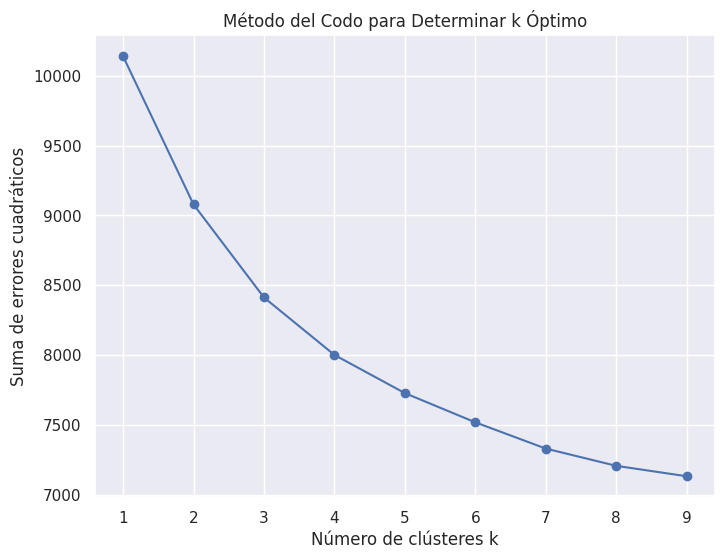

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#eliminar columnas de fechas para hacer analisis

df_scaled_wodates = df_scaled.drop(date_cols, axis=1)

# Determinar el número óptimo de clústeres
sse = []
list_k = range(1, 10)  # probamos de 1 a 10 clústeres

for k in list_k:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled_wodates)
    sse.append(km.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Número de clústeres k')
plt.ylabel('Suma de errores cuadráticos')
plt.title('Método del Codo para Determinar k Óptimo')
plt.show()


Acorde al analisis de codo, el numero de clusters optimo se encuentra alrededor de 5

In [ ]:
# Aplicar KMeans con el número óptimo de clústeres
# Reemplaza 'n_clusters_optimo' con el número de clústeres que has elegido
n_clusters_optimo = 4
km_optimo = KMeans(n_clusters=n_clusters_optimo, random_state=42)
clusters = km_optimo.fit_predict(df_scaled_wodates)

# Añadir la asignación de clústeres al dataframe
df_scaled_wodates['cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
dataoriginal["cluster"] = df_scaled_wodates["cluster"]

## Multi-dimensional scaling (MDS)

Aplicando Multi-dimensional scaling para poder visualizar en dos dimensiones la clusterizacion realizada a las dimensiones del data set

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


<Figure size 1000x800 with 0 Axes>

Text(0.5, 0, 'Dimension 1')

Text(0, 0.5, 'Dimension 2')

Text(0.5, 1.0, 'Visualización de Clústeres')

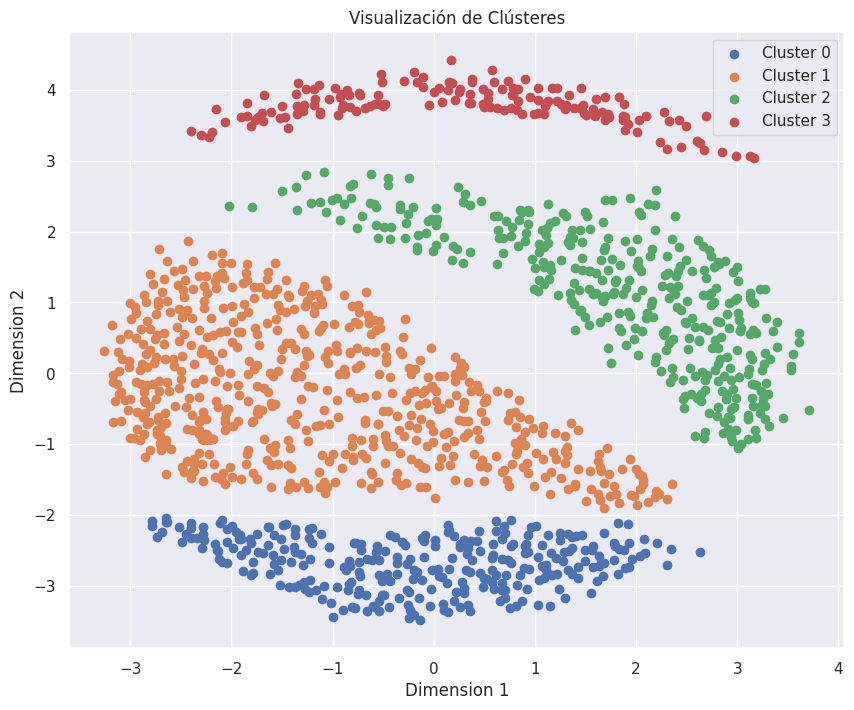

In [ ]:



# Aplicar MDS
mds = MDS(n_components=2, random_state=42)  # n_components puede ser 2 o 3
df_mds = mds.fit_transform(df_scaled_wodates)

# Crear un DataFrame para la visualización
df_visual = pd.DataFrame(df_mds, columns=['Dim1', 'Dim2'])
df_visual['cluster'] = clusters  # Asumiendo que 'clusters' contiene las etiquetas de tus clústeres

# Visualizar los clústeres
plt.figure(figsize=(10, 8))
for i in range(n_clusters_optimo):  # Asumiendo que 'n_clusters_optimo' es 4
    cluster_data = df_visual[df_visual['cluster'] == i]
    plt.scatter(cluster_data['Dim1'], cluster_data['Dim2'], label=f'Cluster {i}')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Visualización de Clústeres')
plt.legend()
plt.show()

In [ ]:
dataoriginal.to_csv("dataClusterizado.csv")

En base a estas clusterizaciones, se decidió hacer un analisis individual de cada uno de estos conjuntos de datos. Este analisis individual se presenta a continuación:

# Codigo perfil de persona 1


##Aqui comienza el analisis desde la carga de el archivo

## EL perfil de empleado 1 consiste en un 21.2 % de los ex-empleados del *dataset*

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataClusterizado.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.info()
# Filtrar el DataFrame
df_filtrado = df[df['cluster'] == 0]

# Mostrar el DataFrame filtrado
df_filtrado.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   posicion               1391 non-null   object 
 1   area                   1391 non-null   object 
 2   a.liq.                 1391 non-null   object 
 3   grupo_de_personal      1391 non-null   object 
 4   codigo_postal          1391 non-null   int64  
 5   motivo_de_la_renuncia  1391 non-null   object 
 6   banda                  1391 non-null   object 
 7   baja                   1391 non-null   object 
 8   reglapht               1391 non-null   object 
 9   alta                   1391 non-null   object 
 10  anos                   1391 non-null   int64  
 11  meses                  1391 non-null   float64
 12  antiguedad             1391 non-null   int64  
 13  clave_de_sexo          1391 non-null   object 
 14  lugar_de_nacimiento    1391 non-null   object 
 15  edad

posicion     area a.liq. grupo_de_personal  codigo_postal  \
954  POS1921      MFS     S5            Direct          32575   
340   POS538  VS9-ABS     S5            Direct          32576   
666  POS1921      MFS     S5            Direct          32599   
834   POS538      VS7     S5            Direct          32580   
81    POS538  VS9-ABS     S5            Direct          32575   

              motivo_de_la_renuncia banda        baja  reglapht        alta  \
954   imp.tra-ausentismos continuos    DO  2022-06-16  JS011500  2019-07-11   
340                 vol-otro empleo    DO  2023-06-13  JT031800  2022-08-09   
666   imp.tra-ausentismos continuos    DO  2022-08-02  JF010600  2019-03-01   
834  imp.pat-terminacion del contra    DO  2022-02-05  JT031800  2020-01-12   
81                  vol-otro empleo    DO  2023-01-31  JF060600  2022-08-09   

     anos      meses  antiguedad clave_de_sexo lugar_de_nacimiento  \
954     3  31.733333         952     masculino              JUAREZ   
340     1   9.266667         278     masculino              JUAREZ   
666     3  37.733333        1132     masculino    CIUDAD DE MEXICO   
834     2  17.233333         517     masculino             DURANGO   
81      1   4.833333         145     masculino              JUAREZ   

     edad_del_empleado estado_civil  hijos  cluster  
954                 20       solter      0        0  
340                 24       u.libr      0        0  
666                 30        casad      2        0  
834                 22       solter      0        0  
81                  24       solter      0        0

## **El perfil de empleado 1** esta conformado por su totalidad de hombres, los cuales conforman el **42.87 %** de los ex-empleados (hombres) de la empresa, todos en este perfil pertenecen a **a.liq. "S5"**, son del **grupo personal "Direct"**, en la **banda "D0"** y estan distribuidos en todos los grupos de **reglapht *con excepcion* del grupo "ADMINIST"**

In [ ]:
print(df_filtrado['a.liq.'].value_counts())
print(df_filtrado['grupo_de_personal'].value_counts())
print(df_filtrado['banda'].value_counts())
print(df_filtrado['clave_de_sexo'].value_counts())

df_filtrado.columns
#a liq, grupo de personal, banda, clave sexo
#df_filtrado['hijos'].value_counts()
#data_p['ReglaPHT'].value_counts()

S5    295
Name: a.liq., dtype: int64
Direct    295
Name: grupo_de_personal, dtype: int64
DO    295
Name: banda, dtype: int64
masculino    295
Name: clave_de_sexo, dtype: int64


Index(['posicion', 'area', 'a.liq.', 'grupo_de_personal', 'codigo_postal',
       'motivo_de_la_renuncia', 'banda', 'baja', 'reglapht', 'alta', 'anos',
       'meses', 'antiguedad', 'clave_de_sexo', 'lugar_de_nacimiento',
       'edad_del_empleado', 'estado_civil', 'hijos', 'cluster'],
      dtype='object')

In [ ]:
#print(df_filtrado['posicion'].value_counts())
#print(df_filtrado['area'].value_counts())
##print(df_filtrado['a.liq.'].value_counts())
##print(df_filtrado['grupo_de_personal'].value_counts())
#print(df_filtrado['codigo_postal'].value_counts())
#print(df_filtrado['motivo_de_la_renuncia'].value_counts())
#print(df_filtrado['banda'].value_counts())
#print(df_filtrado['baja'].value_counts())
#print(df_filtrado['reglapht'].value_counts())
#print(df_filtrado['edad_del_empleado'].value_counts())
#print(df_filtrado['estado_civil'].value_counts())
#print(df_filtrado['hijos'].value_counts())
#print(df_filtrado['clave_de_sexo'].value_counts())
#print(df_filtrado['antiguedad'].value_counts())

## Se extrae el mes de la fecha de baja para comprobar si hay alguna fecha en especifico que salgan mas empleados

In [ ]:
df_filtrado["mes"] = df["baja"].str.split("-").str[1]

<ipython-input-484-1f3c6deea15e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["mes"] = df["baja"].str.split("-").str[1]


In [ ]:
df_filtrado["mes"].value_counts()

05    35
08    34
02    32
06    29
11    26
10    24
07    24
04    22
03    21
01    20
09    17
12    11
Name: mes, dtype: int64

##Como esta distribuido los rangos de edades y antiguedad que alcanzaron los ex-empleados

In [ ]:
rango_ant = [4 ,100, 364, 1228, 1820, 3276, np.inf]
n_ran_ant = ['0-100 dias', '101-364 dias', '2-3 años', '4-5 años', '6-9 años', '10 o + años']
n_ran_ant = ['0-100 dias', '101-364 dias', '2-3 años', '4-5 años', '6-9 años', '10 o + años']
df_filtrado['rango_antiguedad'] = pd.cut(df_filtrado['antiguedad'], bins = rango_ant, labels = n_ran_ant)

rango_edades = [17 ,27, 37, 47, 57, 67]
nombres_rango_edades = ['18-27', '28-37', '38-47', '48-57', '58-67']
df_filtrado['rango_edades'] = pd.cut(df_filtrado['edad_del_empleado'], bins = rango_edades, labels = nombres_rango_edades)

print(df_filtrado['rango_antiguedad'].value_counts(1))

print(df_filtrado['rango_edades'].value_counts(1))

0-100 dias      0.271186
2-3 años        0.271186
101-364 dias    0.213559
6-9 años        0.128814
4-5 años        0.091525
10 o + años     0.023729
Name: rango_antiguedad, dtype: float64
18-27    0.623729
28-37    0.213559
38-47    0.108475
48-57    0.044068
58-67    0.010169
Name: rango_edades, dtype: float64


<ipython-input-486-b06542f35cb7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['rango_antiguedad'] = pd.cut(df_filtrado['antiguedad'], bins = rango_ant, labels = n_ran_ant)
<ipython-input-486-b06542f35cb7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['rango_edades'] = pd.cut(df_filtrado['edad_del_empleado'], bins = rango_edades, labels = nombres_rango_edades)


In [ ]:
#comprobando el df_filtrado
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 4 to 1382
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   posicion               295 non-null    object  
 1   area                   295 non-null    object  
 2   a.liq.                 295 non-null    object  
 3   grupo_de_personal      295 non-null    object  
 4   codigo_postal          295 non-null    int64   
 5   motivo_de_la_renuncia  295 non-null    object  
 6   banda                  295 non-null    object  
 7   baja                   295 non-null    object  
 8   reglapht               295 non-null    object  
 9   alta                   295 non-null    object  
 10  anos                   295 non-null    int64   
 11  meses                  295 non-null    float64 
 12  antiguedad             295 non-null    int64   
 13  clave_de_sexo          295 non-null    object  
 14  lugar_de_nacimiento    295 non-null    ob

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Se realizo una copia del dataset
df_0 = df[df['cluster']==0]

## cuales son los principales motivos de salida de la empresa

In [ ]:
conteo_motivo_renuncia = df_0['motivo_de_la_renuncia'].value_counts().sort_values(ascending=False)

<Axes: xlabel='motivo_de_la_renuncia', ylabel='count'>

Text(0.5, 1.0, 'Conteo de Motivos de salida de la empresa')

Text(0.5, 0, 'Motivos')

Text(0, 0.5, 'Frecuencia')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'vol-no regreso / no dio razon'),
  Text(1, 0, 'vol-otro empleo'),
  Text(2, 0, 'vol-prob personales y/o fam'),
  Text(3, 0, 'vol-transferencia entre planta'),
  Text(4, 0, 'vol-cambio de domicilio'),
  Text(5, 0, 'vol-insatisfaccion personal'),
  Text(6, 0, 'vol-estudios'),
  Text(7, 0, 'imp.tra-ausentismos continuos'),
  Text(8, 0, 'vol-razones medicas'),
  Text(9, 0, 'imp.tra-lft y/o reglamento'),
  Text(10, 0, 'imp.tra-jubilacion'),
  Text(11, 0, 'imp.tra-falsificacion de doctos'),
  Text(12, 0, 'imp.pat-pensionado imss'),
  Text(13, 0, 'imp.pat-terminacion del contra'),
  Text(14, 0, 'vol-ambiente de trabajo'),
  Text(15, 0, 'imp.tra-uso de drogas y/o bebi')])

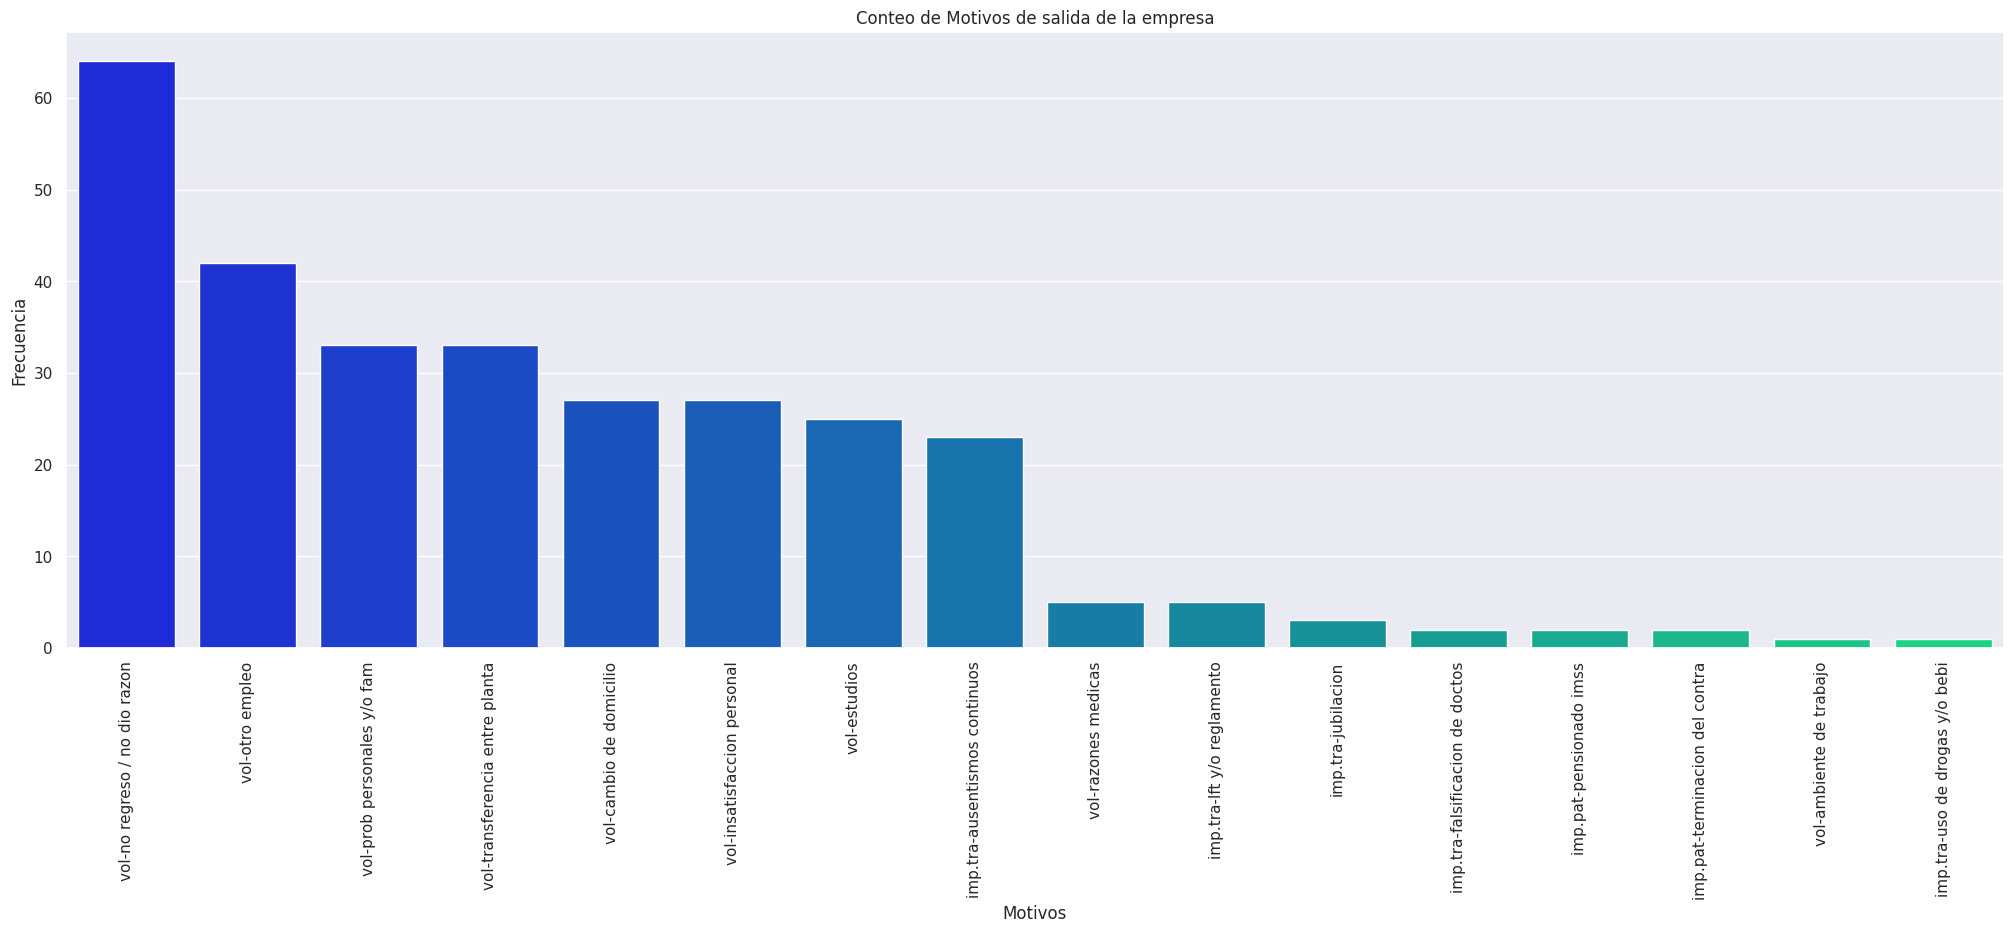

In [ ]:
sns.countplot(x='motivo_de_la_renuncia', data=df_0, order=conteo_motivo_renuncia.index, palette='winter')
plt.title('Conteo de Motivos de salida de la empresa')
plt.xlabel('Motivos')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

## vamos a enfocarnos en los motivos de salida de la empresa con una frecuancia mayor de 10

In [ ]:
valores_con_mas_de_10 = conteo_motivo_renuncia[conteo_motivo_renuncia > 10].index.tolist()

## En el perfil de empleado 1, ~ 83 % de los motivos de abandono son:
- no dio razon/ no regreso
- otro empleo
- prob. personales y/o familiares
- transferencia entre planta
- cambio de domicilio
- insatisfaccion personal
- estudios
- ausentismos continuos

Text(0.5, 1.0, 'Motivos de Renuncia (con más ocurrencias)')

Text(0.5, 0, 'Motivos')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'vol-no regreso / no dio razon'),
  Text(1, 0, 'vol-otro empleo'),
  Text(2, 0, 'vol-prob personales y/o fam'),
  Text(3, 0, 'vol-transferencia entre planta'),
  Text(4, 0, 'vol-cambio de domicilio'),
  Text(5, 0, 'vol-insatisfaccion personal'),
  Text(6, 0, 'vol-estudios'),
  Text(7, 0, 'imp.tra-ausentismos continuos')])

Text(0, 10, '64.0')

Text(0, 10, '42.0')

Text(0, 10, '33.0')

Text(0, 10, '33.0')

Text(0, 10, '27.0')

Text(0, 10, '27.0')

Text(0, 10, '25.0')

Text(0, 10, '23.0')

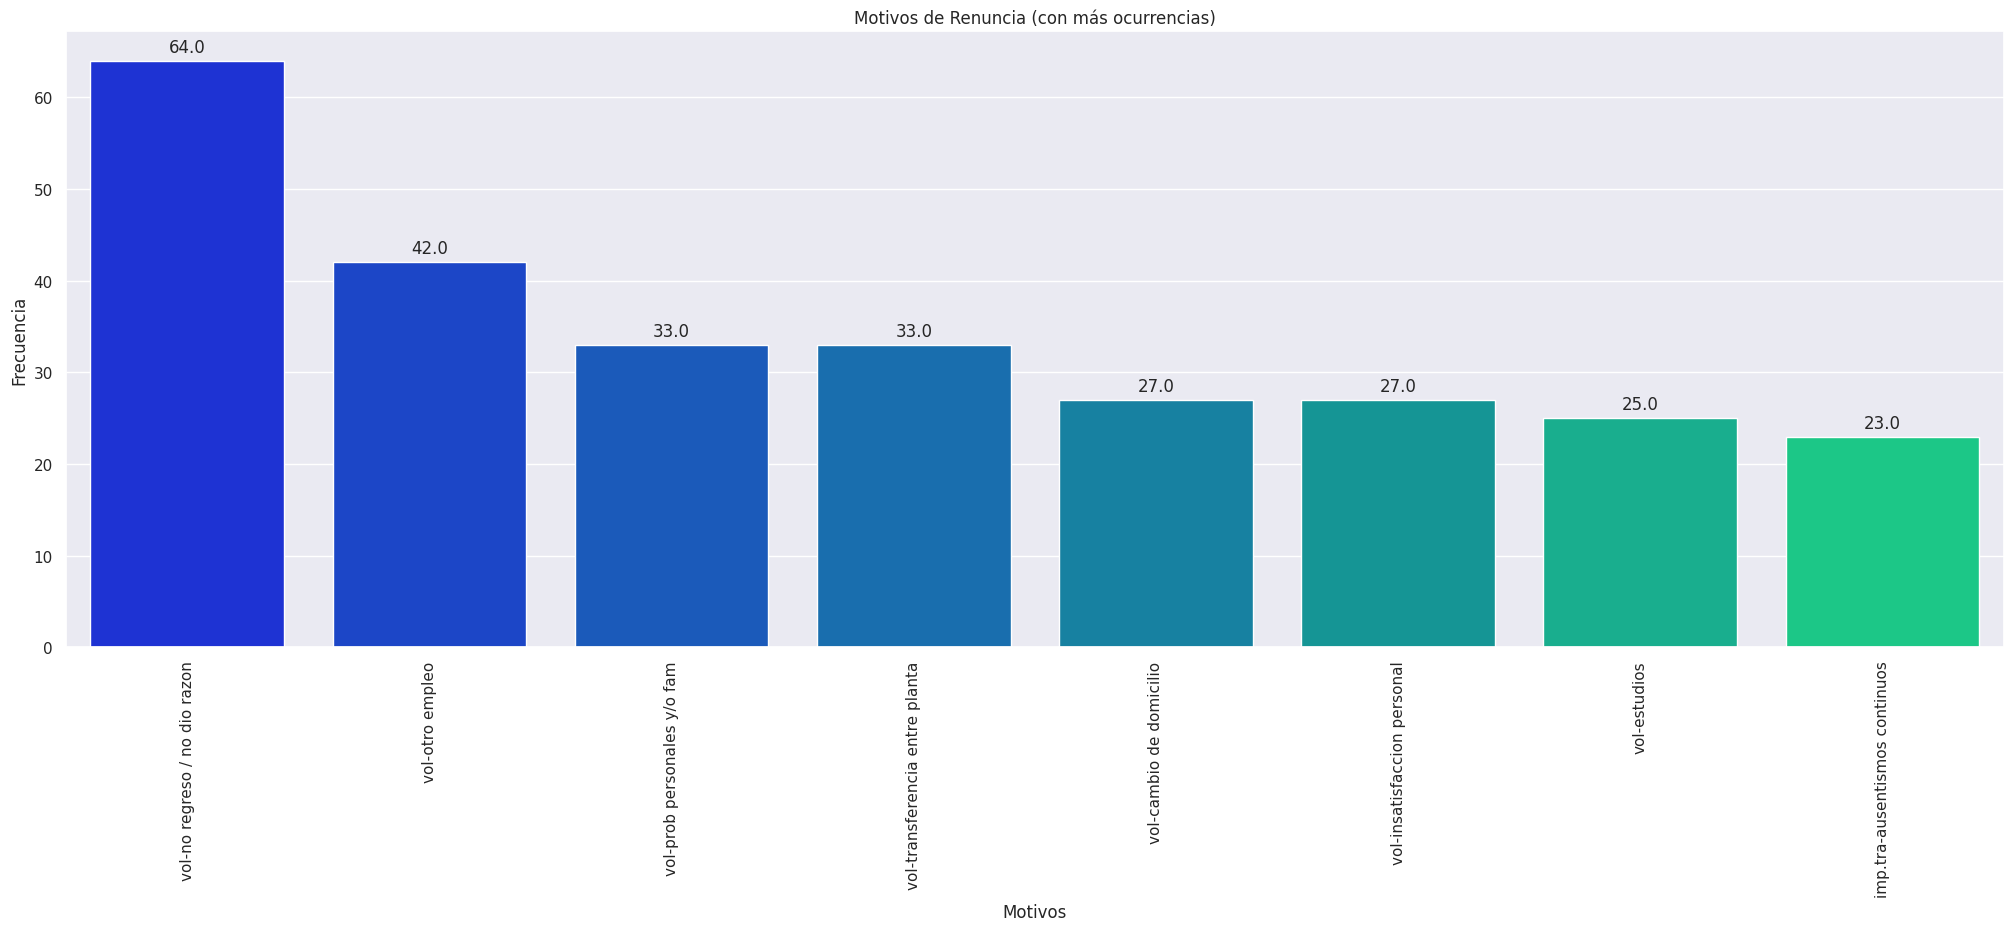

In [ ]:
# Calcular el conteo de cada motivo de renuncia
conteo_motivo_renuncia = df_0['motivo_de_la_renuncia'].value_counts()

# Filtrar los motivos que tienen más de 5 ocurrencias
motivos_con_mas_de_10 = conteo_motivo_renuncia[conteo_motivo_renuncia > 10].index

# Filtrar el DataFrame original
df_filtrado = df_0[df_0['motivo_de_la_renuncia'].isin(motivos_con_mas_de_10)]

ax = sns.countplot(x='motivo_de_la_renuncia', data=df_filtrado, order=motivos_con_mas_de_10, palette='winter')
plt.title('Motivos de Renuncia (con más ocurrencias)')
plt.xlabel('Motivos')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Agregar el número total encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

## se identifica los valores de motivo de renuncia que sumen mas de 20 y se comprueba en que C.P. provienen para asi ver si el area en comun puede ser un factor

In [ ]:
valores_con_mas_de_20 = conteo_motivo_renuncia[conteo_motivo_renuncia > 20].index.tolist()

In [ ]:
cp_por_motivo_de_renuncia_filtrado = df_0[df_0['motivo_de_la_renuncia'].isin(valores_con_mas_de_20)]['codigo_postal'].value_counts().sort_values(ascending=False)
top15_cp = cp_por_motivo_de_renuncia_filtrado.nlargest(16).sort_values()

<Axes: ylabel='codigo_postal'>

Text(0.5, 1.0, 'Codigos postales mas comunes de los principales motivos de renuncia')

Text(0.5, 0, 'Banda')

Text(0, 0.5, 'Frecuencia')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '27000'),
  Text(1, 0, '32500'),
  Text(2, 0, '32563'),
  Text(3, 0, '32570'),
  Text(4, 0, '32574'),
  Text(5, 0, '32575'),
  Text(6, 0, '32576'),
  Text(7, 0, '32583'),
  Text(8, 0, '32590'),
  Text(9, 0, '32594'),
  Text(10, 0, '32598'),
  Text(11, 0, '32599'),
  Text(12, 0, '32600'),
  Text(13, 0, '32690'),
  Text(14, 0, '32695'),
  Text(15, 0, '32696')])

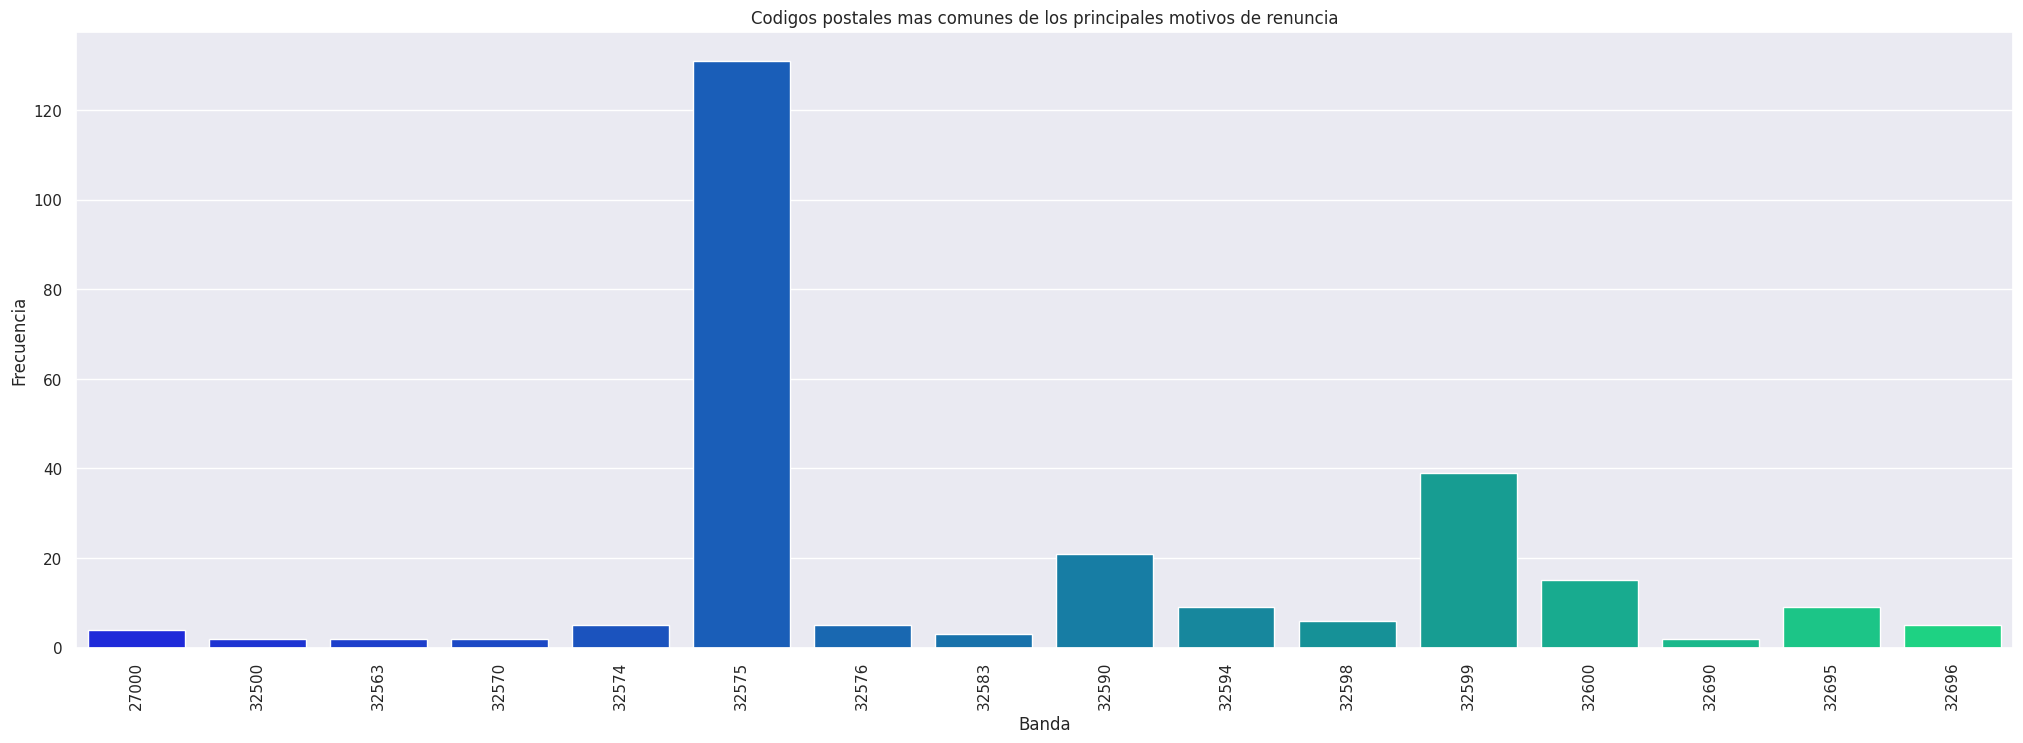

In [ ]:
sns.barplot(x=top15_cp.index,y=top15_cp, palette='winter')
plt.title('Codigos postales mas comunes de los principales motivos de renuncia')
plt.xlabel('Banda')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

In [ ]:
conteo_motivo_renuncia

vol-no regreso / no dio razon      64
vol-otro empleo                    42
vol-prob personales y/o fam        33
vol-transferencia entre planta     33
vol-cambio de domicilio            27
vol-insatisfaccion personal        27
vol-estudios                       25
imp.tra-ausentismos continuos      23
vol-razones medicas                 5
imp.tra-lft y/o reglamento          5
imp.tra-jubilacion                  3
imp.tra-falsificacion de doctos     2
imp.pat-pensionado imss             2
imp.pat-terminacion del contra      2
vol-ambiente de trabajo             1
imp.tra-uso de drogas y/o bebi      1
Name: motivo_de_la_renuncia, dtype: int64

## Para graficar que motivos de renuncia son los principales en los C.P. con mas frecuencias de abandono

In [ ]:
conteo_combinaciones_motivo_cp = df_0.groupby(['motivo_de_la_renuncia', 'codigo_postal']).size().reset_index(name='conteo')
combinaciones_motivo_cp_filtrado = conteo_combinaciones_motivo_cp[conteo_combinaciones_motivo_cp.conteo > 5]
conteo_combinaciones_motivo_cp_filtrado = combinaciones_motivo_cp_filtrado.value_counts()

In [ ]:
conteo_combinaciones_motivo_cp.motivo_de_la_renuncia.value_counts()

vol-no regreso / no dio razon      17
vol-prob personales y/o fam        12
vol-otro empleo                    11
vol-cambio de domicilio             9
vol-estudios                        9
vol-transferencia entre planta      9
vol-insatisfaccion personal         8
imp.tra-ausentismos continuos       7
imp.tra-jubilacion                  3
imp.tra-lft y/o reglamento          3
vol-razones medicas                 3
imp.pat-pensionado imss             2
imp.pat-terminacion del contra      2
imp.tra-falsificacion de doctos     2
imp.tra-uso de drogas y/o bebi      1
vol-ambiente de trabajo             1
Name: motivo_de_la_renuncia, dtype: int64

<Axes: xlabel='codigo_postal', ylabel='conteo'>

Text(0.5, 1.0, 'Codigos postales mas comunes de los principales motivos de renuncia')

Text(0.5, 0, 'Banda')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2]),
 [Text(0, 0, '32575'), Text(1, 0, '32590'), Text(2, 0, '32599')])

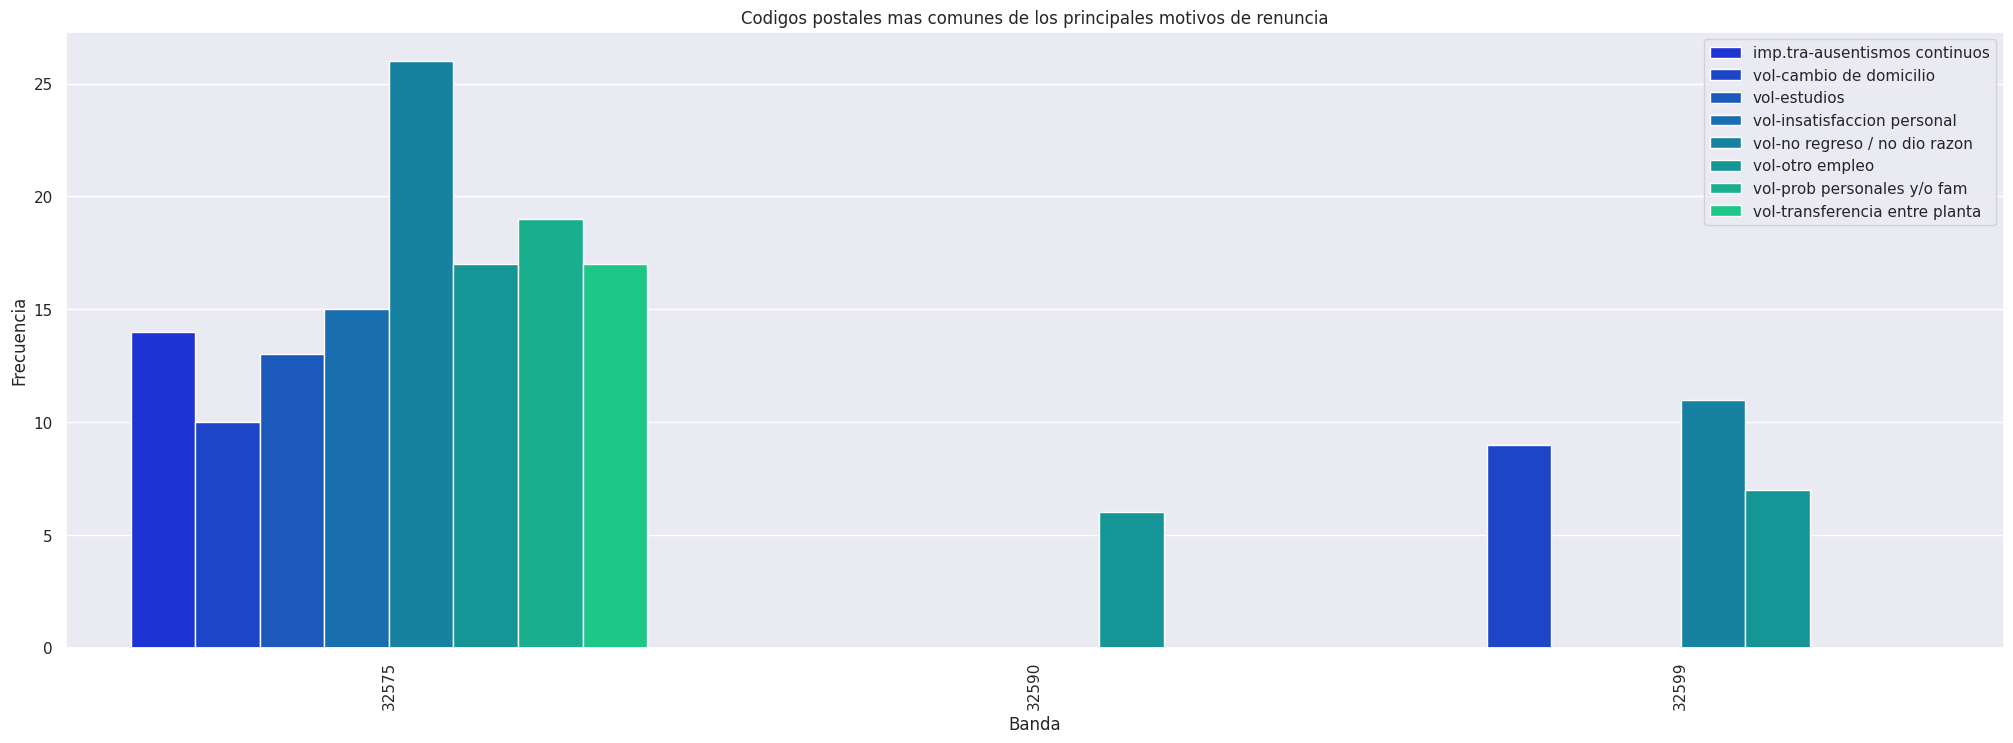

In [ ]:
sns.barplot(x='codigo_postal',y='conteo', data=combinaciones_motivo_cp_filtrado,hue='motivo_de_la_renuncia',  palette='winter')
plt.title('Codigos postales mas comunes de los principales motivos de renuncia')
plt.xlabel('Banda')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

## El perfil de empleado 1 en reglapht se encuentra distribuido de la siguiente forma

In [ ]:
distribucion_reglapht = df_0['reglapht'].value_counts()

<Axes: ylabel='reglapht'>

Text(0.5, 1.0, 'Porcentaje de Distribución de reglapht')

Text(0.5, 0, 'reglapht')

Text(0, 0.5, 'Porcentaje')

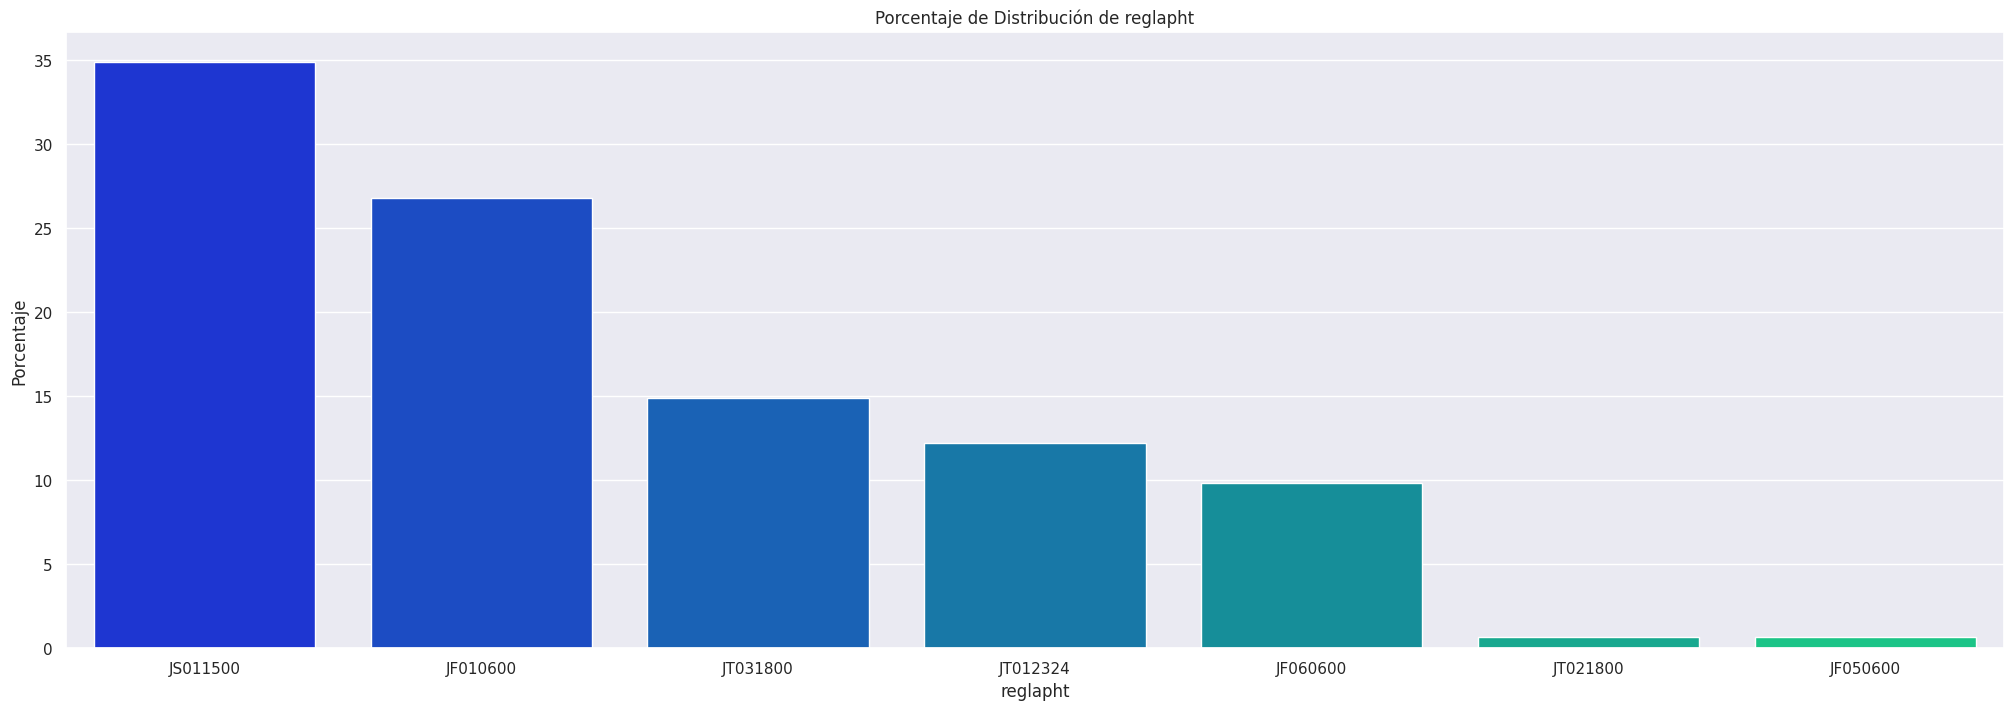

In [ ]:
porcentaje_reglapht = distribucion_reglapht / len(df_0) * 100
# Crear un gráfico de barras del porcentaje
sns.barplot(x=porcentaje_reglapht.index, y=porcentaje_reglapht,  palette='winter')
plt.title('Porcentaje de Distribución de reglapht')
plt.xlabel('reglapht')
plt.ylabel('Porcentaje')
plt.show()

## el perfil de empleado 1 se corresponde principalmente de POS1323 representando este ~37%

In [ ]:
distribucion_posicion = df_0['posicion'].value_counts()

<Axes: ylabel='posicion'>

Text(0.5, 1.0, 'Porcentaje de Distribución de posicion')

Text(0.5, 0, 'reglapht')

Text(0, 0.5, 'Porcentaje')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'POS1323'),
  Text(1, 0, 'POS2939'),
  Text(2, 0, 'POS538'),
  Text(3, 0, 'POS1921'),
  Text(4, 0, 'POS1380'),
  Text(5, 0, 'POS2003'),
  Text(6, 0, 'POS1661')])

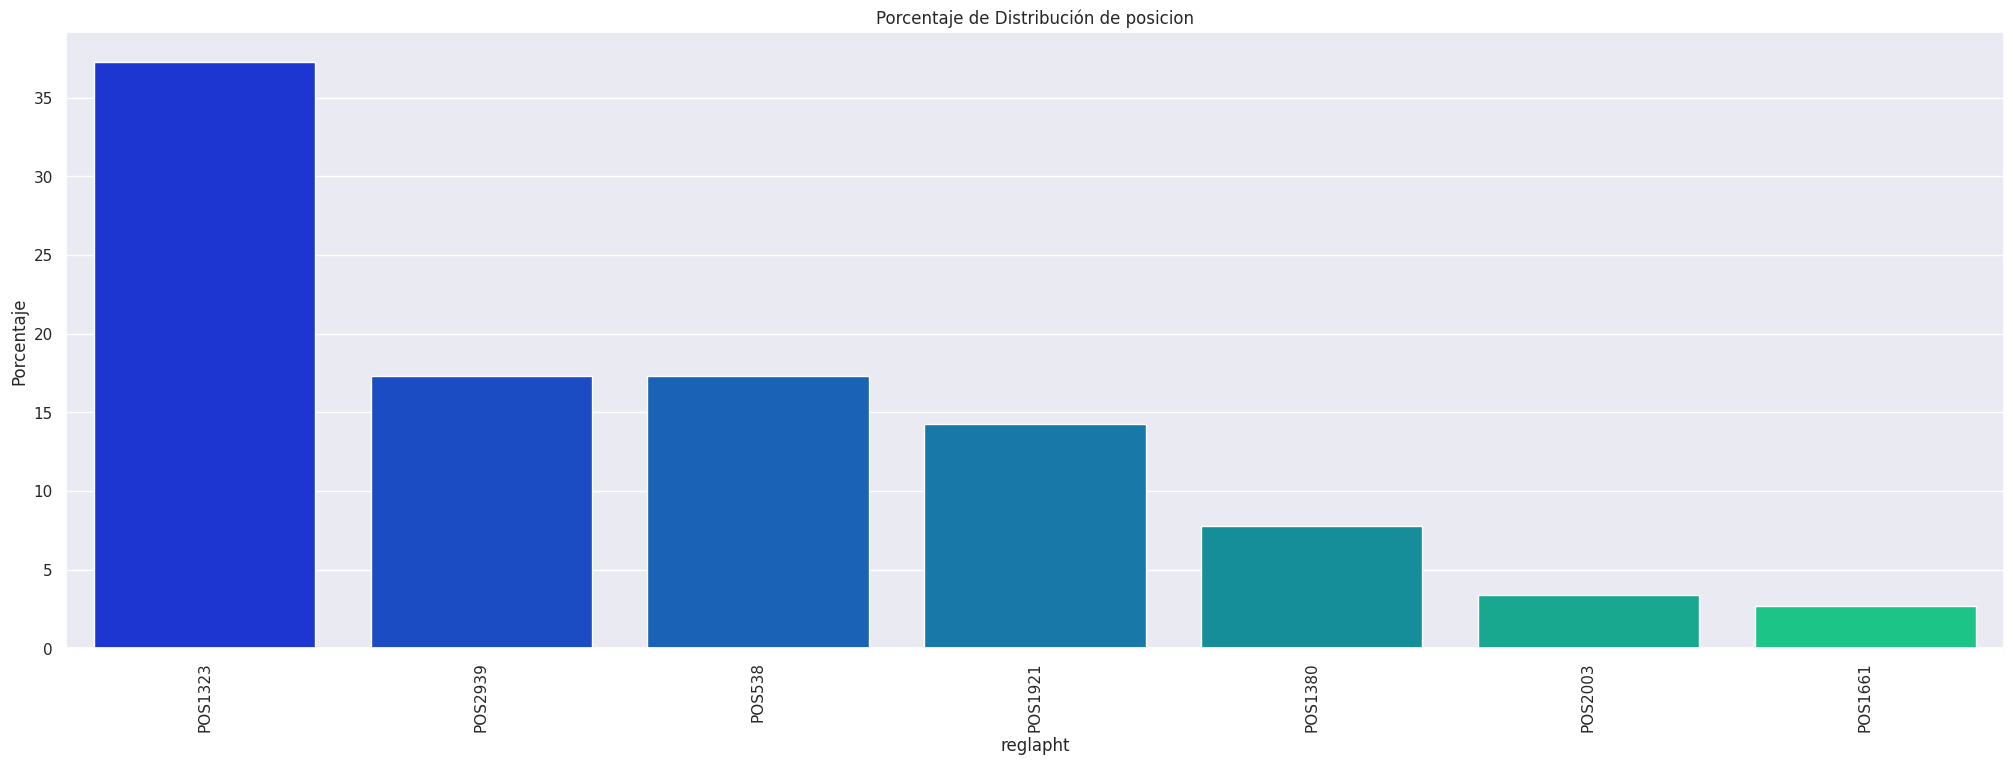

In [ ]:
porcentaje_posicion = distribucion_posicion / len(df_0) * 100
# Crear un gráfico de barras del porcentaje
sns.barplot(x=porcentaje_posicion.index, y=porcentaje_posicion, palette='winter')
plt.title('Porcentaje de Distribución de posicion')
plt.xlabel('reglapht')
plt.ylabel('Porcentaje')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_0['posicion'].value_counts(1)

POS1323    0.372881
POS2939    0.172881
POS538     0.172881
POS1921    0.142373
POS1380    0.077966
POS2003    0.033898
POS1661    0.027119
Name: posicion, dtype: float64

## El perfil de empleado 1 en que meses tiende a abandonar mas, siendo mayo, agosto y febrero los meses que mas frecuencia presentaron, mas no se observo una diferencia significativa en los datos

In [ ]:
df_0["mes"] = df_0["baja"].str.split("-").str[1]
meses_con_bajas = df_0["mes"].value_counts()
meses_con_bajas.index = meses_con_bajas.index.map({
    '01':'Enero',
    '02':'Febrero',
    '03':'Marzo',
    '04':'Abril',
    '05':'Mayo',
    '06':'Junio',
    '07':'Julio',
    '08':'Agosto',
    '09':'Septiembre',
    '10':'Octubre',
    '11':'Noviembre',
    '12':'Diciembre'})

<ipython-input-506-a21d6c766619>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0["mes"] = df_0["baja"].str.split("-").str[1]


<Axes: ylabel='mes'>

Text(0.5, 1.0, 'Relacion de bajas por mes del año')

Text(0.5, 0, 'Mes')

Text(0, 0.5, 'Porcentaje')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Mayo'),
  Text(1, 0, 'Agosto'),
  Text(2, 0, 'Febrero'),
  Text(3, 0, 'Junio'),
  Text(4, 0, 'Noviembre'),
  Text(5, 0, 'Octubre'),
  Text(6, 0, 'Julio'),
  Text(7, 0, 'Abril'),
  Text(8, 0, 'Marzo'),
  Text(9, 0, 'Enero'),
  Text(10, 0, 'Septiembre'),
  Text(11, 0, 'Diciembre')])

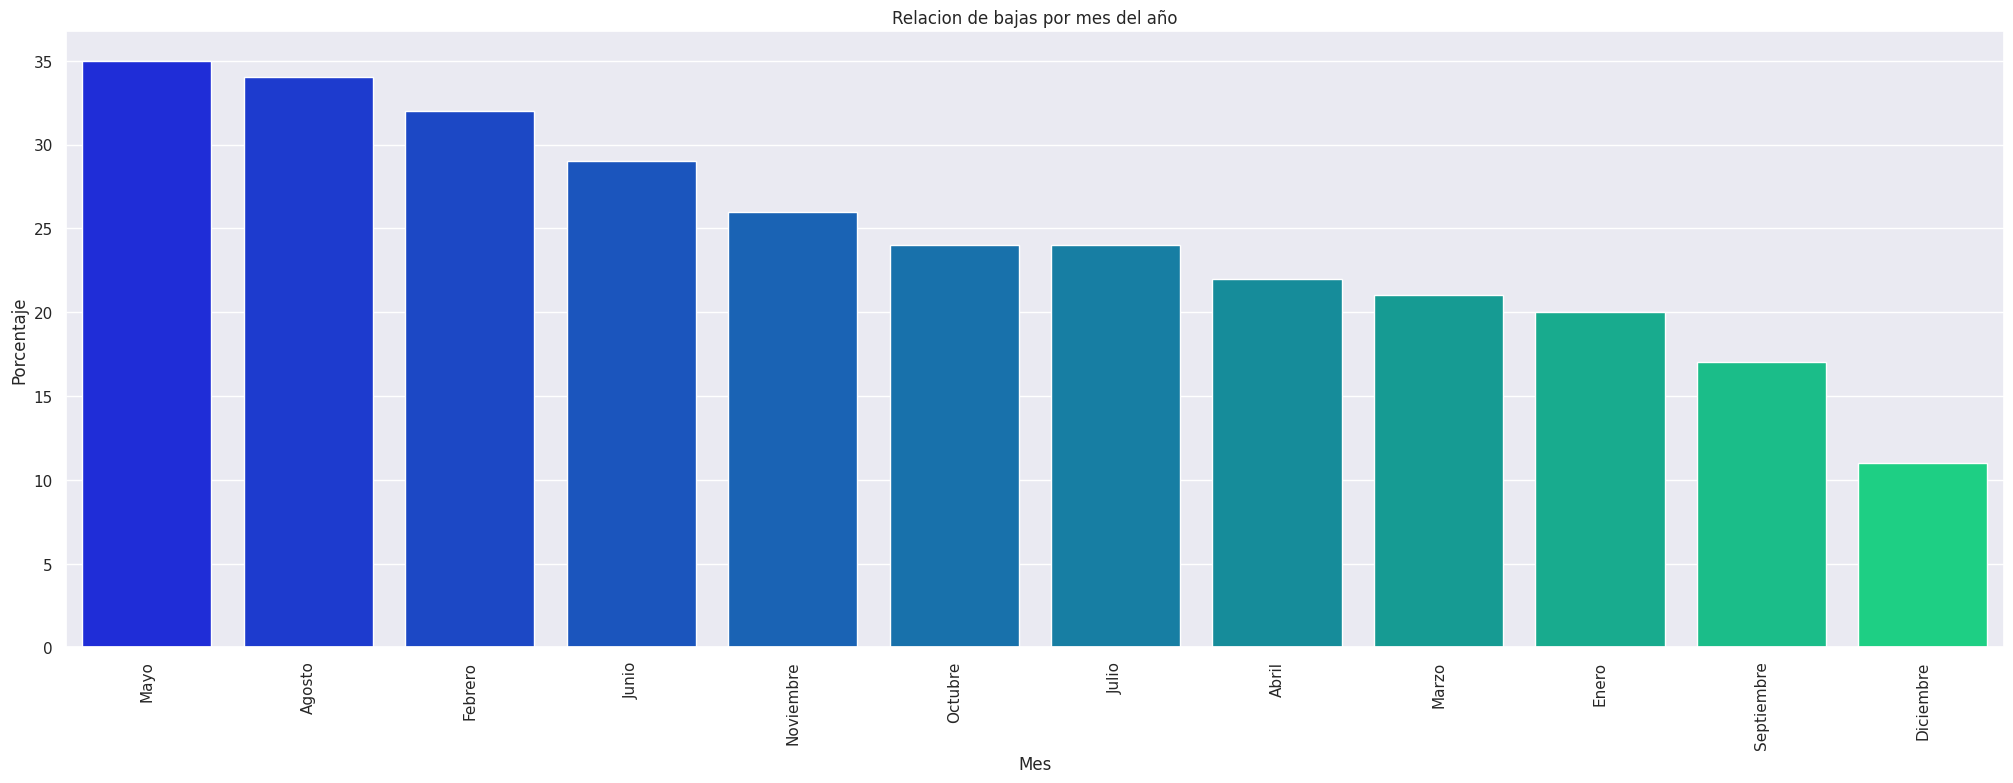

In [ ]:
sns.barplot(x=meses_con_bajas.index, y=meses_con_bajas, palette = 'winter')
plt.title('Relacion de bajas por mes del año')
plt.xlabel('Mes')
plt.ylabel('Porcentaje')
plt.xticks(rotation=90)
plt.show()

## Los C.P. con mas ocurrencias son 32575, 32599, 32590, 32600 , los cuales corresponden a la parte sur de ciudad juarez los cuales representan un ~23% del perfil de empleado 1

Text(0.5, 1.0, 'C.P. (con más de 30 ocurrencias)')

Text(0.5, 0, 'Motivos')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3]),
 [Text(0, 0, '32575'),
  Text(1, 0, '32599'),
  Text(2, 0, '32590'),
  Text(3, 0, '32600')])

Text(0, 10, '139.0')

Text(0, 10, '43.0')

Text(0, 10, '23.0')

Text(0, 10, '15.0')

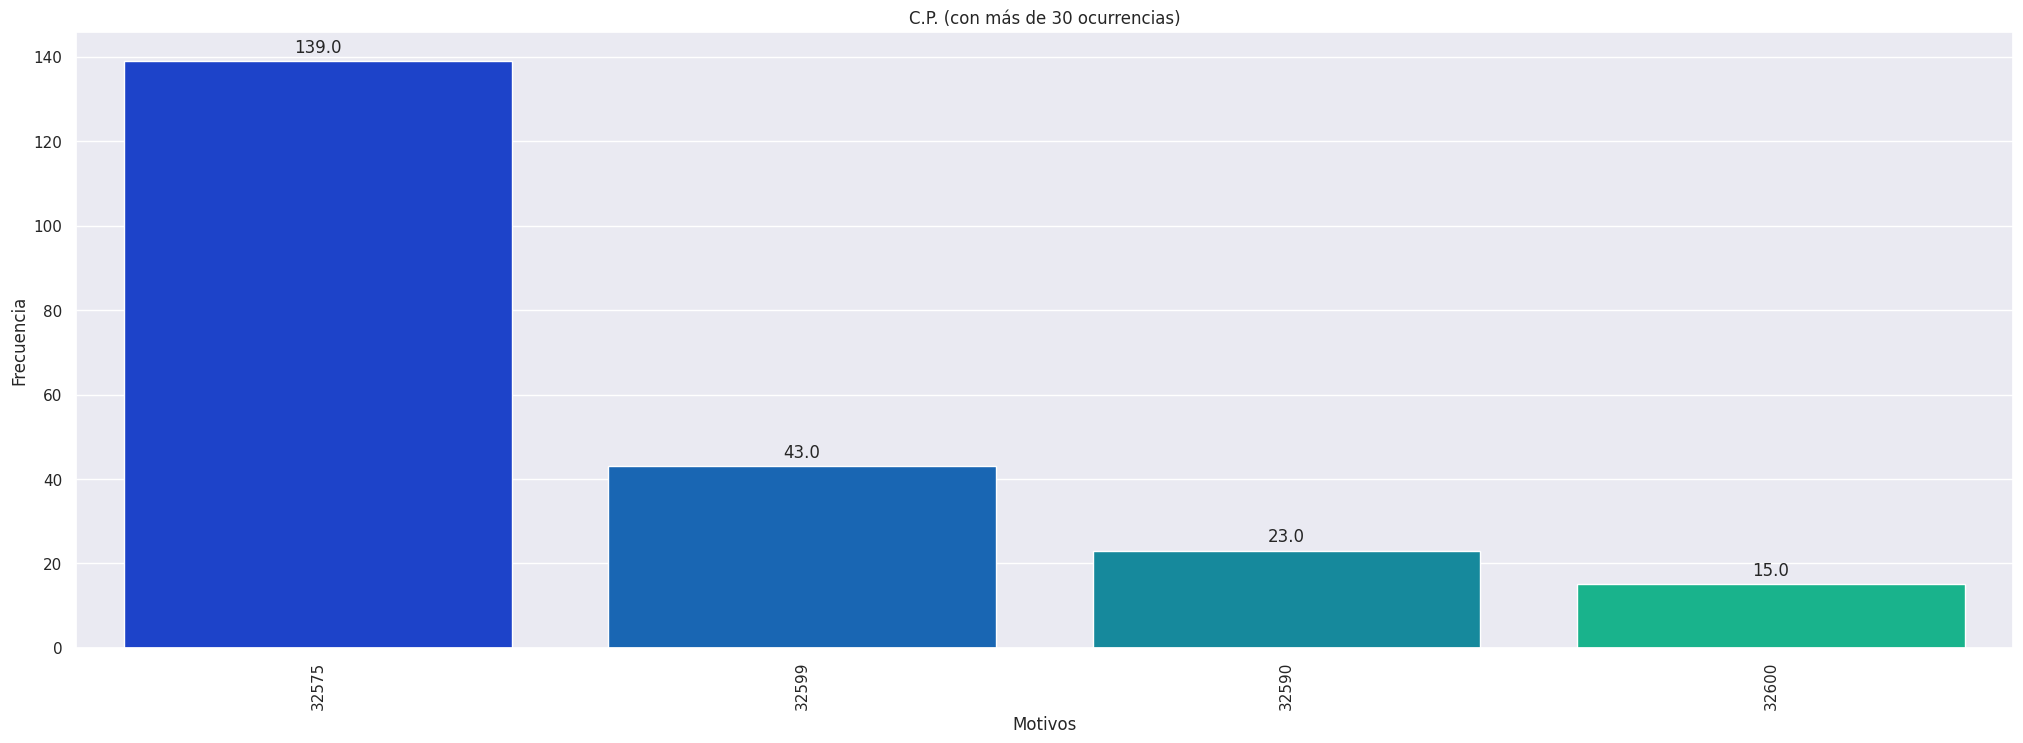

In [ ]:
conteo_cp = df_0['codigo_postal'].value_counts()

# Filtrar los motivos que tienen más de 5 ocurrencias
cp_con_mas_de_30 = conteo_cp[conteo_cp > 10].index

# Filtrar el DataFrame original
df_filtrado = df_0[df_0['codigo_postal'].isin(cp_con_mas_de_30)]

# Crear el gráfico de barras con el DataFrame filtrado
ax = sns.countplot(x='codigo_postal', data=df_filtrado, order=cp_con_mas_de_30, palette='winter')
plt.title('C.P. (con más de 30 ocurrencias)')
plt.xlabel('Motivos')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Agregar el número total encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Mostrar el gráfico
plt.show()

In [ ]:
df.codigo_postal.value_counts(1)

32575    0.375270
32599    0.140906
32590    0.055356
32600    0.038821
32695    0.030913
           ...   
32424    0.000719
32360    0.000719
32687    0.000719
32140    0.000719
32677    0.000719
Name: codigo_postal, Length: 125, dtype: float64

## se cambio las edades a rango de edades para una mejor visualizacion

In [ ]:
rango_edades = [17 ,27, 37, 47, 57, 67]
nombres_rango_edades = ['18-27', '28-37', '38-47', '48-57', '58-67']
df_filtrado['rango_edades'] = pd.cut(df_filtrado['edad_del_empleado'], bins = rango_edades, labels = nombres_rango_edades)

<ipython-input-510-547c191fe70c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['rango_edades'] = pd.cut(df_filtrado['edad_del_empleado'], bins = rango_edades, labels = nombres_rango_edades)


## El rango de edades de los C.P. con mas ocurrencias se encuentran principalmente distribuido en personas de los 18 a los 27 años, siendo estas ~62% del total de personas, seguidos por el el rango de edades de 28 a 37 años siendo estos ~ 22 % del total.

In [ ]:
df_filtrado.rango_edades.value_counts(1)

18-27    0.636364
28-37    0.200000
38-47    0.109091
48-57    0.050000
58-67    0.004545
Name: rango_edades, dtype: float64

Text(0.5, 1.0, 'Edades (con más ocurrencias), en los C.P. con mas ocurrencias')

Text(0.5, 0, 'Motivos')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '18-27'),
  Text(1, 0, '28-37'),
  Text(2, 0, '38-47'),
  Text(3, 0, '48-57'),
  Text(4, 0, '58-67')])

Text(0, 10, '140.0')

Text(0, 10, '44.0')

Text(0, 10, '24.0')

Text(0, 10, '11.0')

Text(0, 10, '1.0')

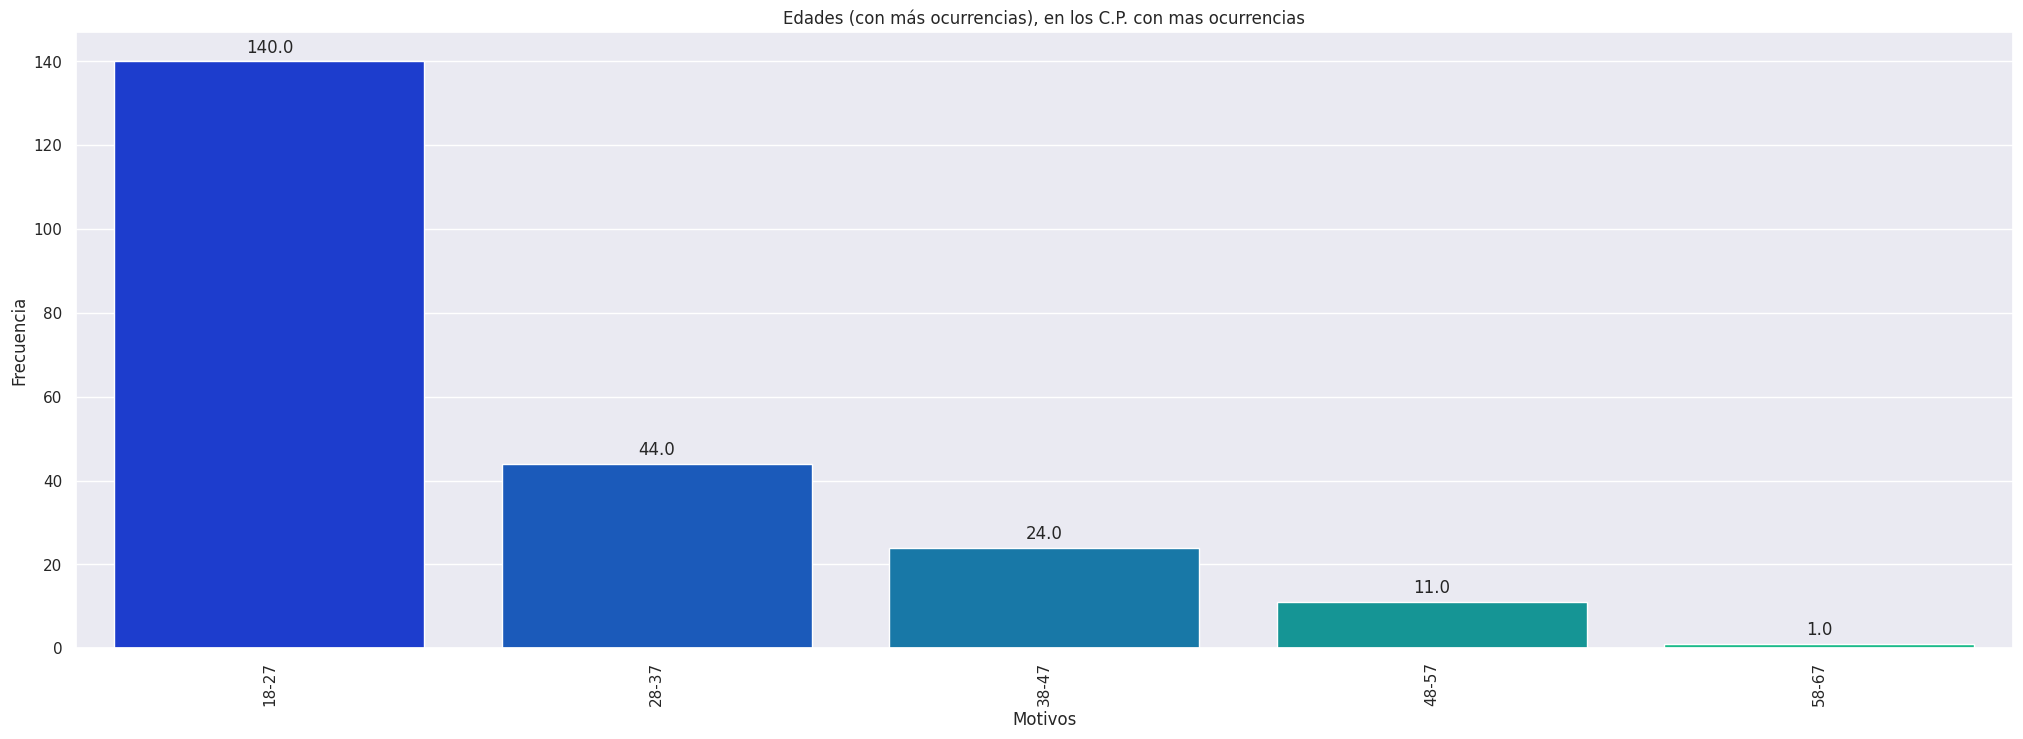

In [ ]:
c_r_e = df_filtrado.rango_edades.value_counts()



ax = sns.countplot(x='rango_edades', data=df_filtrado, order=c_r_e.index, palette='winter')
plt.title('Edades (con más ocurrencias), en los C.P. con mas ocurrencias')
plt.xlabel('Motivos')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Agregar el número total encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

## De los C.P. filtrados se busco el origen de las personas para comprobar si son principalmente foraneos pues las edades son principalmente personas de 18-27 años y 28-37 años

Text(0.5, 1.0, 'Edades (con más ocurrencias), en los C.P. con mas ocurrencias')

Text(0.5, 0, 'Motivos')

Text(0, 0.5, 'Frecuencia')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(0, 0, 'JUAREZ'),
  Text(1, 0, 'CHIHUAHUA'),
  Text(2, 0, 'VERACRUZ'),
  Text(3, 0, 'DURANGO'),
  Text(4, 0, 'OAXACA'),
  Text(5, 0, 'COAHUILA'),
  Text(6, 0, 'TORREON'),
  Text(7, 0, 'TUXTEPEC'),
  Text(8, 0, 'CIUDAD DE MEXICO'),
  Text(9, 0, 'GOMEZ PALACIO'),
  Text(10, 0, 'MINATITLAN'),
  Text(11, 0, 'LERDO'),
  Text(12, 0, 'TABASCO'),
  Text(13, 0, 'ACAYUCAN'),
  Text(14, 0, 'MICHOACAN'),
  Text(15, 0, 'SANTIAGO TUXTLA'),
  Text(16, 0, 'MAPIMI'),
  Text(17, 0, 'VILLAHERMOSA'),
  Text(18, 0, 'IXHUATAN'),
  Text(19, 0, 'PUEBLA'),
  Text(20, 0, 'TIERRA BLANCA'),
  Text(21, 0, 'POZA RICA DE HIDALGO'),
  Text(22, 0, 'QUINTANA ROO'),
  Text(23, 0, 'EJISO NUEVO BENAVIDES'),
  Text(24, 0, 'SAN PEDRO'),
  Text(25, 0, 'MAPASTEPEC'),
  Text(26, 0, 'SAN FRANCISCO IXHUATAN'),
  Text

Text(0, 10, '89.0')

Text(0, 10, '32.0')

Text(0, 10, '24.0')

Text(0, 10, '9.0')

Text(0, 10, '7.0')

Text(0, 10, '6.0')

Text(0, 10, '4.0')

Text(0, 10, '4.0')

Text(0, 10, '3.0')

Text(0, 10, '3.0')

Text(0, 10, '2.0')

Text(0, 10, '2.0')

Text(0, 10, '2.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

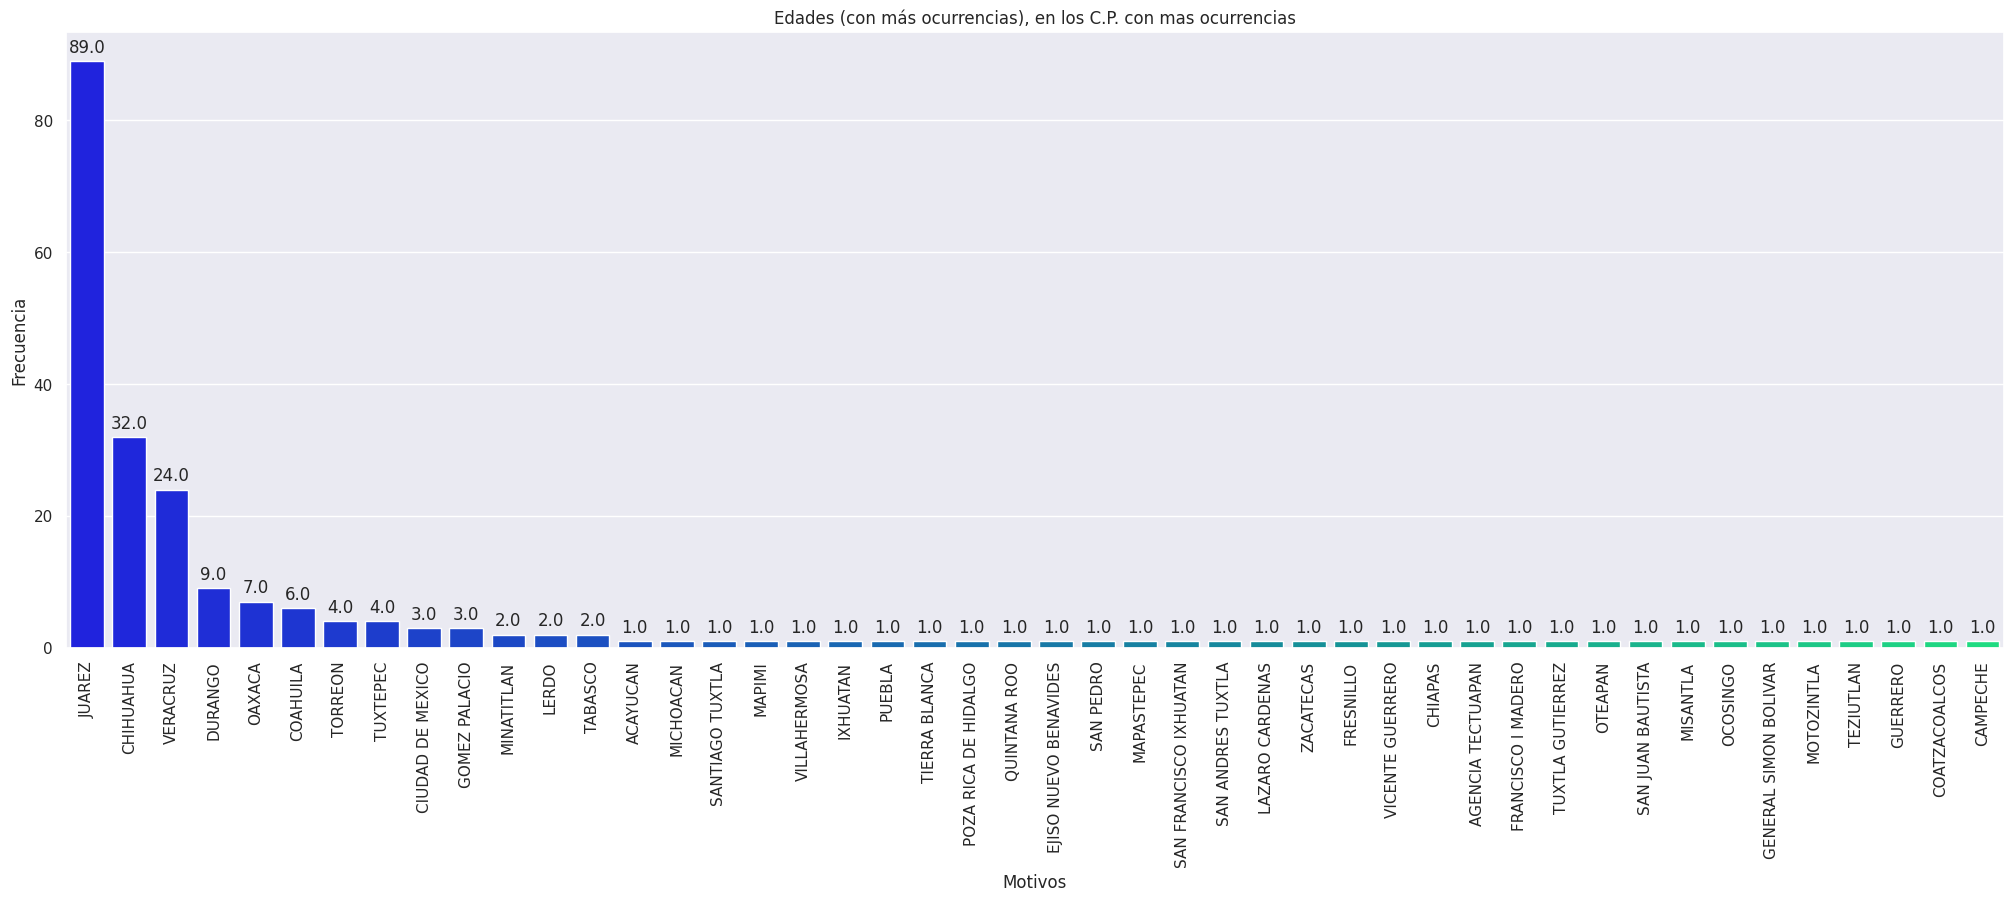

In [ ]:
c_origen = df_filtrado.lugar_de_nacimiento.value_counts()



ax = sns.countplot(x='lugar_de_nacimiento', data=df_filtrado, order=c_origen.index, palette='winter')
sns.set(rc={'figure.figsize':(25,8)})
plt.title('Edades (con más ocurrencias), en los C.P. con mas ocurrencias')
plt.xlabel('Motivos')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Agregar el número total encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [ ]:
#se cambio todo lo que no sea JUAREZ a FORANEO

rem_ciu = {'TUXTLA GUTIERREZ' : 'FORANEO', 'COATZACOALCOS' : 'FORANEO', 'DURANGO' : 'FORANEO',
       'VERACRUZ' : 'FORANEO', 'CHIHUAHUA' : 'FORANEO', 'TABASCO' : 'FORANEO', 'OAXACA' : 'FORANEO', 'GUERRERO' : 'FORANEO',
       'GOMEZ PALACIO' : 'FORANEO', 'LERDO' : 'FORANEO', 'TEZIUTLAN' : 'FORANEO', 'COAHUILA' : 'FORANEO', 'MOTOZINTLA' : 'FORANEO',
       'GENERAL SIMON BOLIVAR' : 'FORANEO', 'MINATITLAN' : 'FORANEO', 'TUXTEPEC' : 'FORANEO', 'TORREON' : 'FORANEO',
       'CIUDAD DE MEXICO' : 'FORANEO', 'ZACATECAS' : 'FORANEO', 'OCOSINGO' : 'FORANEO', 'SAN LUCAS OJITLAN' : 'FORANEO',
       'CARDENAS' : 'FORANEO', 'MISANTLA' : 'FORANEO', 'SAN JUAN BAUTISTA' : 'FORANEO', 'OTEAPAN' : 'FORANEO', 'MOLOACAN' : 'FORANEO',
       'FRANCISCO I MADERO' : 'FORANEO', 'AGENCIA TECTUAPAN' : 'FORANEO', 'CHIAPAS' : 'FORANEO',
       'VICENTE GUERRERO' : 'FORANEO', 'MIGUEL. A.C. CAMPECHE' : 'FORANEO', 'FRESNILLO' : 'FORANEO',
       'SAN FRANCISCO IXHUATAN' : 'FORANEO', 'TAMAULIPAS' : 'FORANEO', 'LAZARO CARDENAS' : 'FORANEO',
       'TECPATAN' : 'FORANEO', 'SANTIAGO TUXTLA' : 'FORANEO', 'MAPIMI' : 'FORANEO', 'VILLAHERMOSA' : 'FORANEO',
       'CUERNAVACA' : 'FORANEO', 'MORELOS' : 'FORANEO', 'IXHUATAN' : 'FORANEO', 'PUEBLA' : 'FORANEO', 'JALTIPAN' : 'FORANEO',
       'TIERRA BLANCA' : 'FORANEO', 'MICHOACAN' : 'FORANEO', 'POZA RICA DE HIDALGO' : 'FORANEO',
       'EJISO NUEVO BENAVIDES' : 'FORANEO', 'SAN ANDRES TUXTLA' : 'FORANEO', 'CAMPECHE' : 'FORANEO',
       'QUINTANA ROO' : 'FORANEO', 'ACAYUCAN' : 'FORANEO', 'MAPASTEPEC' : 'FORANEO', 'SAN PEDRO' : 'FORANEO'}

df_0.lugar_de_nacimiento = df_0.lugar_de_nacimiento.replace(rem_ciu)
df_0.lugar_de_nacimiento.unique()

<ipython-input-514-641f99b8c519>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0.lugar_de_nacimiento = df_0.lugar_de_nacimiento.replace(rem_ciu)


array(['JUAREZ', 'FORANEO'], dtype=object)

In [ ]:
#Comprobando que se hizo bien
df_0.lugar_de_nacimiento.unique()

array(['JUAREZ', 'FORANEO'], dtype=object)

## Se busco si los foraneos tenian una tasa de abandono diferente

In [ ]:
#filtrado para seleccionar un dataframe solo con los cp con mas de 10 ocurrencias

conteo_cp = df_0['codigo_postal'].value_counts()

# Filtrar los motivos que tienen más de 5 ocurrencias
cp_con_mas_de_10 = conteo_cp[conteo_cp > 10].index

# Filtrar el DataFrame original
df_filtrado = df_0[df_0['codigo_postal'].isin(cp_con_mas_de_10)]

#print(df_filtrado.area.value_counts(1))
#print(df_filtrado.lugar_de_nacimiento.value_counts(1))
df_filtrado.lugar_de_nacimiento.unique()


array(['JUAREZ', 'FORANEO'], dtype=object)

In [ ]:
#comprobando la distribucion de personas de juarez contra los foraneos en los cp con mas de 10 ocurrencias
df_filtrado.lugar_de_nacimiento.value_counts(1)

FORANEO    0.595455
JUAREZ     0.404545
Name: lugar_de_nacimiento, dtype: float64

In [ ]:
# en los cp con mas de 10 ocurrencias, se filtraron solamente los foraneos para ver que porcentaje tiene hijos
# para saber si el factor familiar tiene algo que ver

df_filtrado_2 = df_filtrado.loc[df_filtrado['lugar_de_nacimiento'] == 'FORANEO']

# Mostrar el DataFrame resultante
df_filtrado_2.hijos.value_counts(1)

0    0.465649
1    0.198473
2    0.175573
3    0.137405
4    0.022901
Name: hijos, dtype: float64

In [ ]:
meses_con_bajas = df_filtrado_2["mes"].value_counts()
meses_con_bajas.index = meses_con_bajas.index.map({
    '01':'Enero',
    '02':'Febrero',
    '03':'Marzo',
    '04':'Abril',
    '05':'Mayo',
    '06':'Junio',
    '07':'Julio',
    '08':'Agosto',
    '09':'Septiembre',
    '10':'Octubre',
    '11':'Noviembre',
    '12':'Diciembre'})

<Axes: ylabel='mes'>

Text(0.5, 1.0, 'Relacion de bajas por mes del año')

Text(0.5, 0, 'Mes')

Text(0, 0.5, 'Porcentaje')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Julio'),
  Text(1, 0, 'Febrero'),
  Text(2, 0, 'Mayo'),
  Text(3, 0, 'Agosto'),
  Text(4, 0, 'Abril'),
  Text(5, 0, 'Marzo'),
  Text(6, 0, 'Octubre'),
  Text(7, 0, 'Junio'),
  Text(8, 0, 'Noviembre'),
  Text(9, 0, 'Enero'),
  Text(10, 0, 'Septiembre'),
  Text(11, 0, 'Diciembre')])

Text(0, 15, '15.00')

Text(1, 15, '15.00')

Text(2, 14, '14.00')

Text(3, 14, '14.00')

Text(4, 12, '12.00')

Text(5, 12, '12.00')

Text(6, 10, '10.00')

Text(7, 10, '10.00')

Text(8, 10, '10.00')

Text(9, 9, '9.00')

Text(10, 7, '7.00')

Text(11, 3, '3.00')

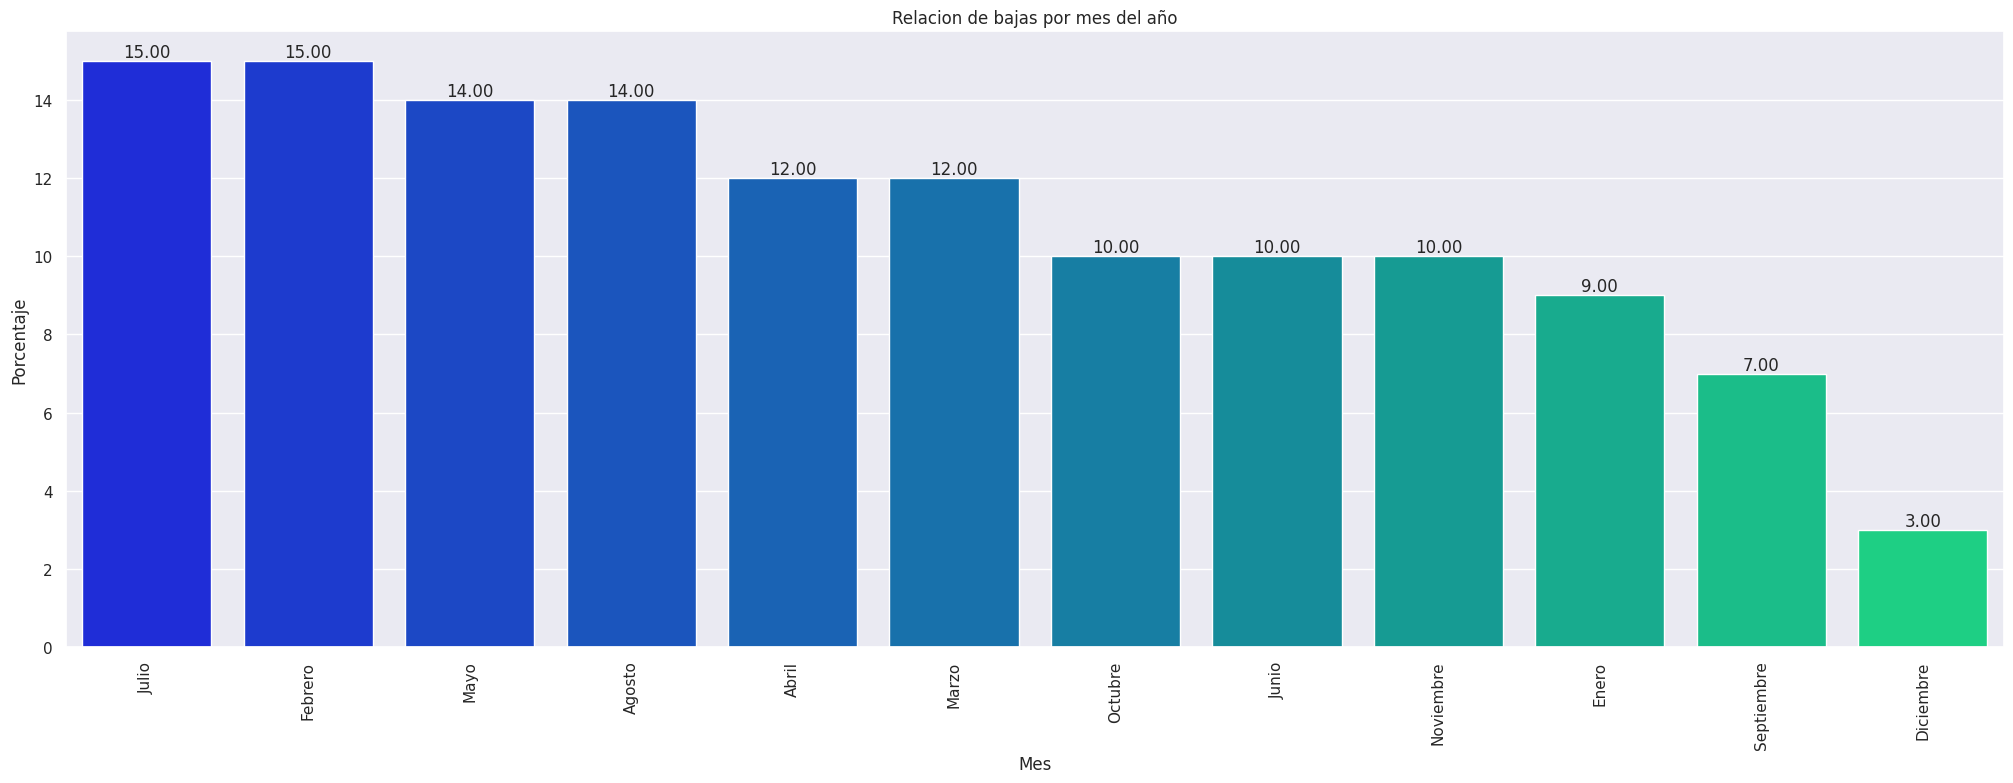

In [ ]:
sns.barplot(x=meses_con_bajas.index, y=meses_con_bajas, palette = 'winter')
plt.title('Relacion de bajas por mes del año')
plt.xlabel('Mes')
plt.ylabel('Porcentaje')
plt.xticks(rotation=90)
# Añadir etiquetas (valores) encima de las barras
for i, v in enumerate(meses_con_bajas):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.show()

## La distribucion de los foraneos ex-empleados, con respecto al numero de hijos y estado civil al momento de abandonar la empresa

<Axes: xlabel='hijos', ylabel='count'>

Text(0.5, 1.0, 'Relacion de bajas de foraneos por hijos y registro civil')

Text(0.5, 0, 'Hijos')

Text(0, 0.5, 'Porcentaje')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

Text(0, 61, '61.00')

Text(1, 26, '26.00')

Text(2, 23, '23.00')

Text(3, 18, '18.00')

Text(4, 3, '3.00')

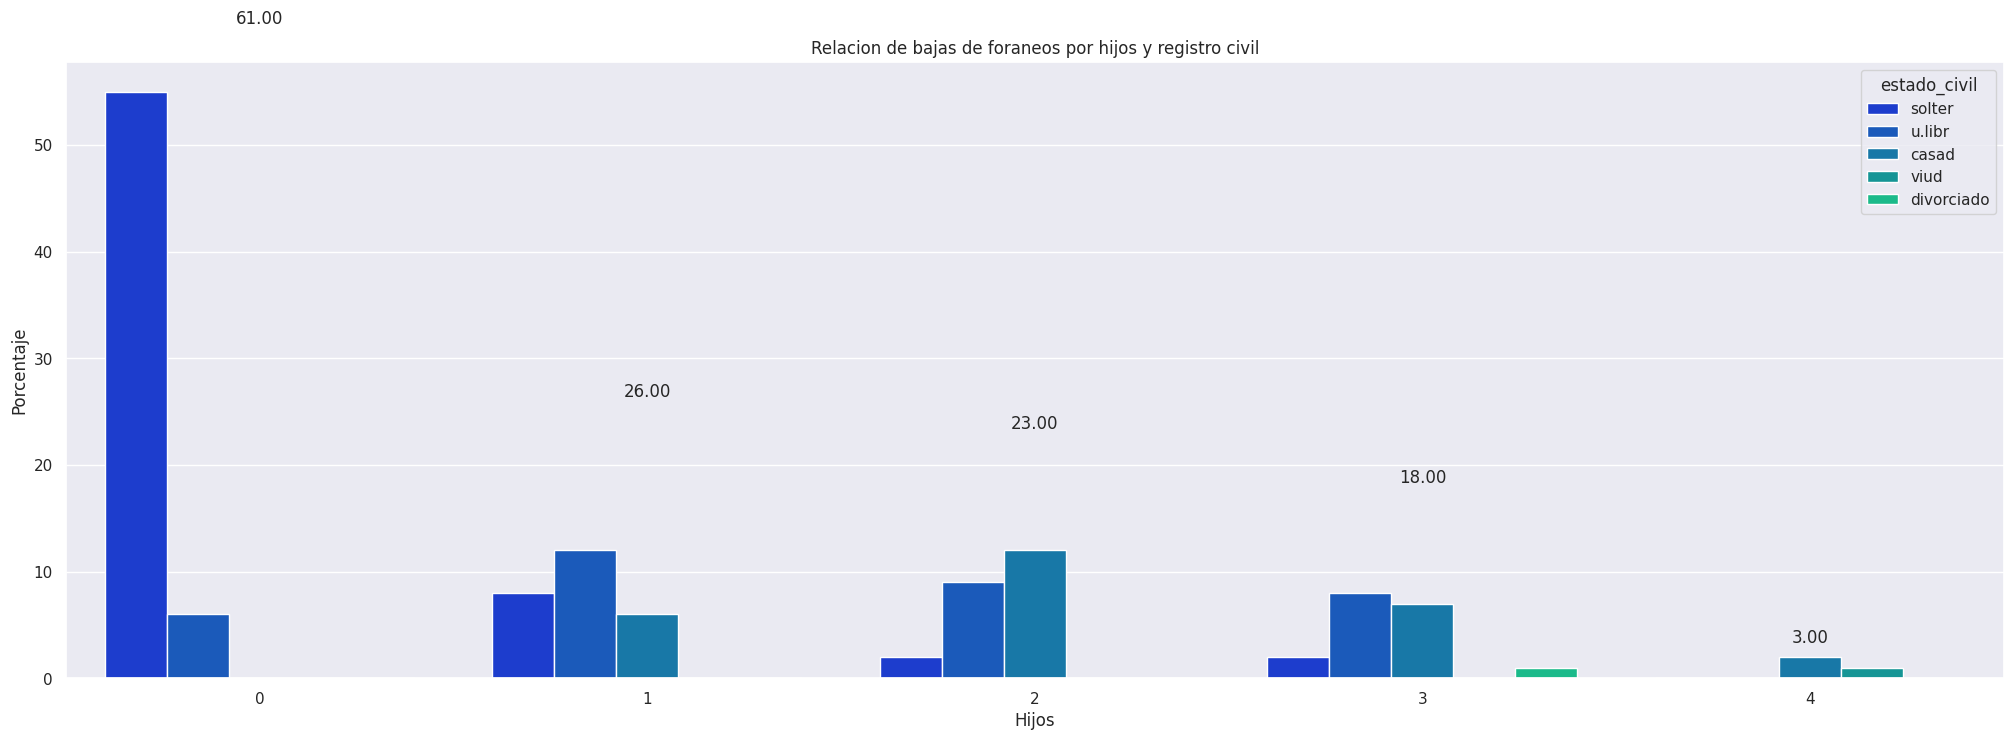

In [ ]:
bajas_hijos = df_filtrado_2["hijos"].value_counts()
sns.countplot(x='hijos',hue='estado_civil', data=df_filtrado_2,palette = 'winter')
plt.title('Relacion de bajas de foraneos por hijos y registro civil')
plt.xlabel('Hijos')
plt.ylabel('Porcentaje')
plt.xticks(rotation=00)
# Añadir etiquetas (valores) encima de las barras
for i, v in enumerate(bajas_hijos):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.show()

In [ ]:
# en los cp con mas de 10 ocurrencias, se filtraron solamente los juarenzes para ver que porcentaje tiene hijos
# para saber si el factor familiar tiene algo que ver

df_filtrado_3 = df_filtrado.loc[df_filtrado['lugar_de_nacimiento'] == 'JUAREZ']

# Mostrar el DataFrame resultante
df_filtrado_3.hijos.value_counts(1)

0    0.831461
1    0.134831
2    0.022472
4    0.011236
Name: hijos, dtype: float64

In [ ]:
meses_con_bajas = df_filtrado_3["mes"].value_counts()
meses_con_bajas.index = meses_con_bajas.index.map({
    '01':'Enero',
    '02':'Febrero',
    '03':'Marzo',
    '04':'Abril',
    '05':'Mayo',
    '06':'Junio',
    '07':'Julio',
    '08':'Agosto',
    '09':'Septiembre',
    '10':'Octubre',
    '11':'Noviembre',
    '12':'Diciembre'})

<Axes: ylabel='mes'>

Text(0.5, 1.0, 'Relacion de bajas por mes del año')

Text(0.5, 0, 'Mes')

Text(0, 0.5, 'Porcentaje')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Febrero'),
  Text(1, 0, 'Mayo'),
  Text(2, 0, 'Junio'),
  Text(3, 0, 'Agosto'),
  Text(4, 0, 'Enero'),
  Text(5, 0, 'Noviembre'),
  Text(6, 0, 'Octubre'),
  Text(7, 0, 'Septiembre'),
  Text(8, 0, 'Diciembre'),
  Text(9, 0, 'Marzo'),
  Text(10, 0, 'Julio'),
  Text(11, 0, 'Abril')])

Text(0, 12, '12.00')

Text(1, 12, '12.00')

Text(2, 12, '12.00')

Text(3, 10, '10.00')

Text(4, 8, '8.00')

Text(5, 7, '7.00')

Text(6, 7, '7.00')

Text(7, 5, '5.00')

Text(8, 5, '5.00')

Text(9, 4, '4.00')

Text(10, 4, '4.00')

Text(11, 3, '3.00')

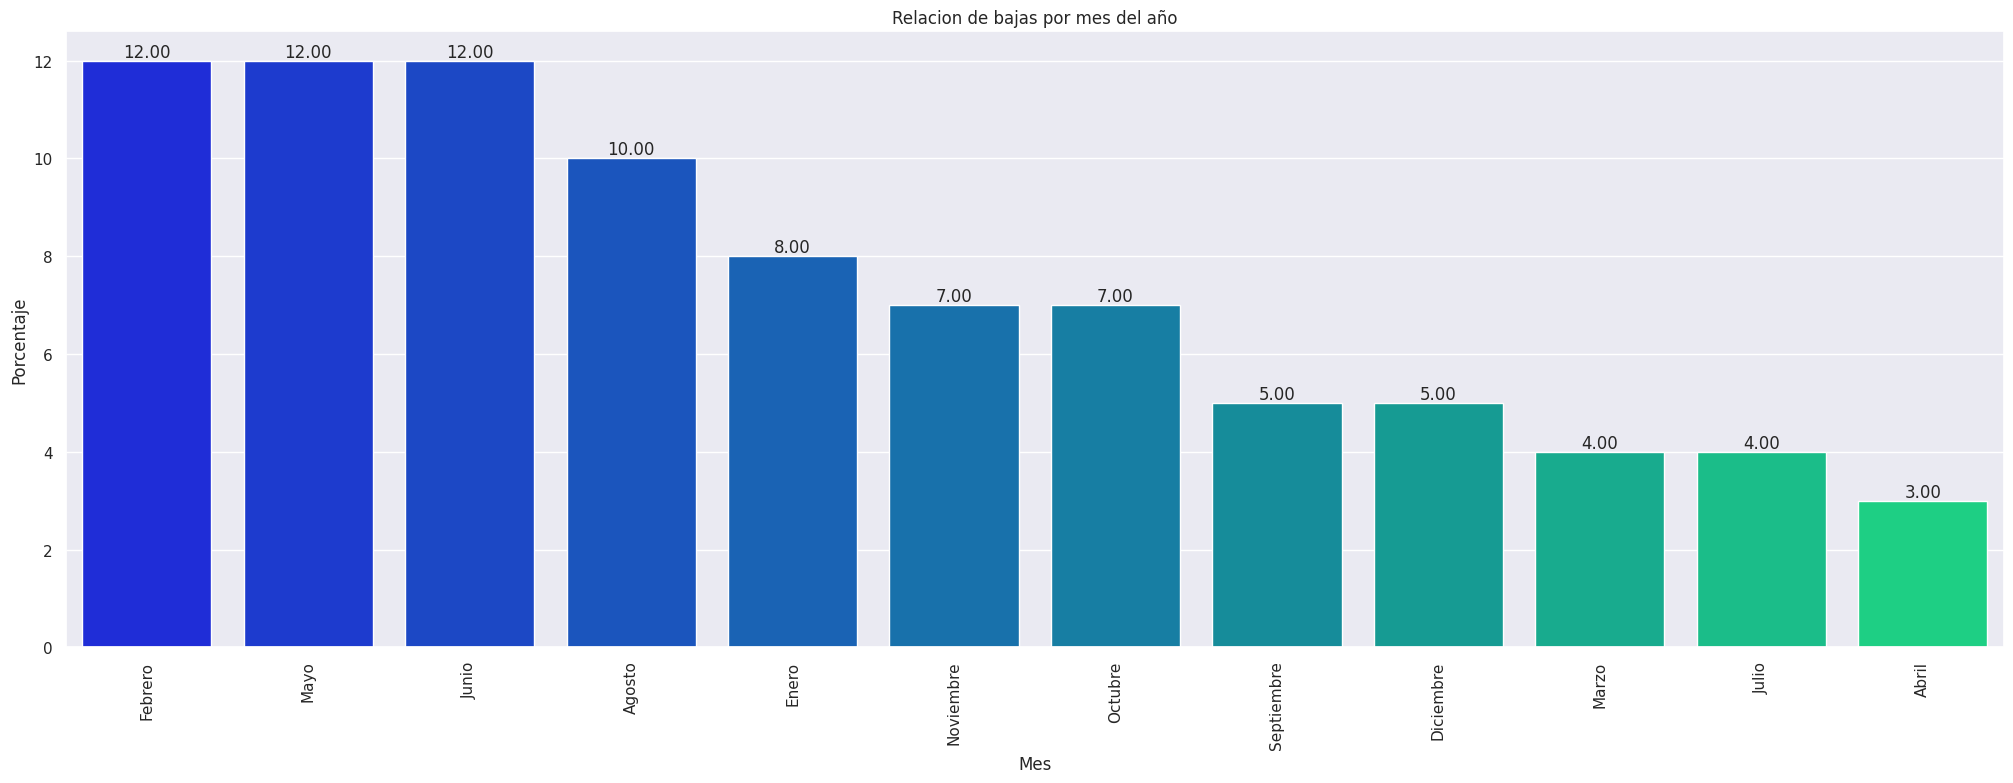

In [ ]:
sns.barplot(x=meses_con_bajas.index, y=meses_con_bajas, palette = 'winter')
plt.title('Relacion de bajas por mes del año')
plt.xlabel('Mes')
plt.ylabel('Porcentaje')
plt.xticks(rotation=90)
# Añadir etiquetas (valores) encima de las barras
for i, v in enumerate(meses_con_bajas):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.show()

<Axes: xlabel='hijos', ylabel='count'>

Text(0.5, 1.0, 'Relacion de bajas de Juarenzes por hijos y registro civil')

Text(0.5, 0, 'Hijos')

Text(0, 0.5, 'Porcentaje')

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '4')])

Text(0, 74, '74.00')

Text(1, 12, '12.00')

Text(2, 2, '2.00')

Text(3, 1, '1.00')

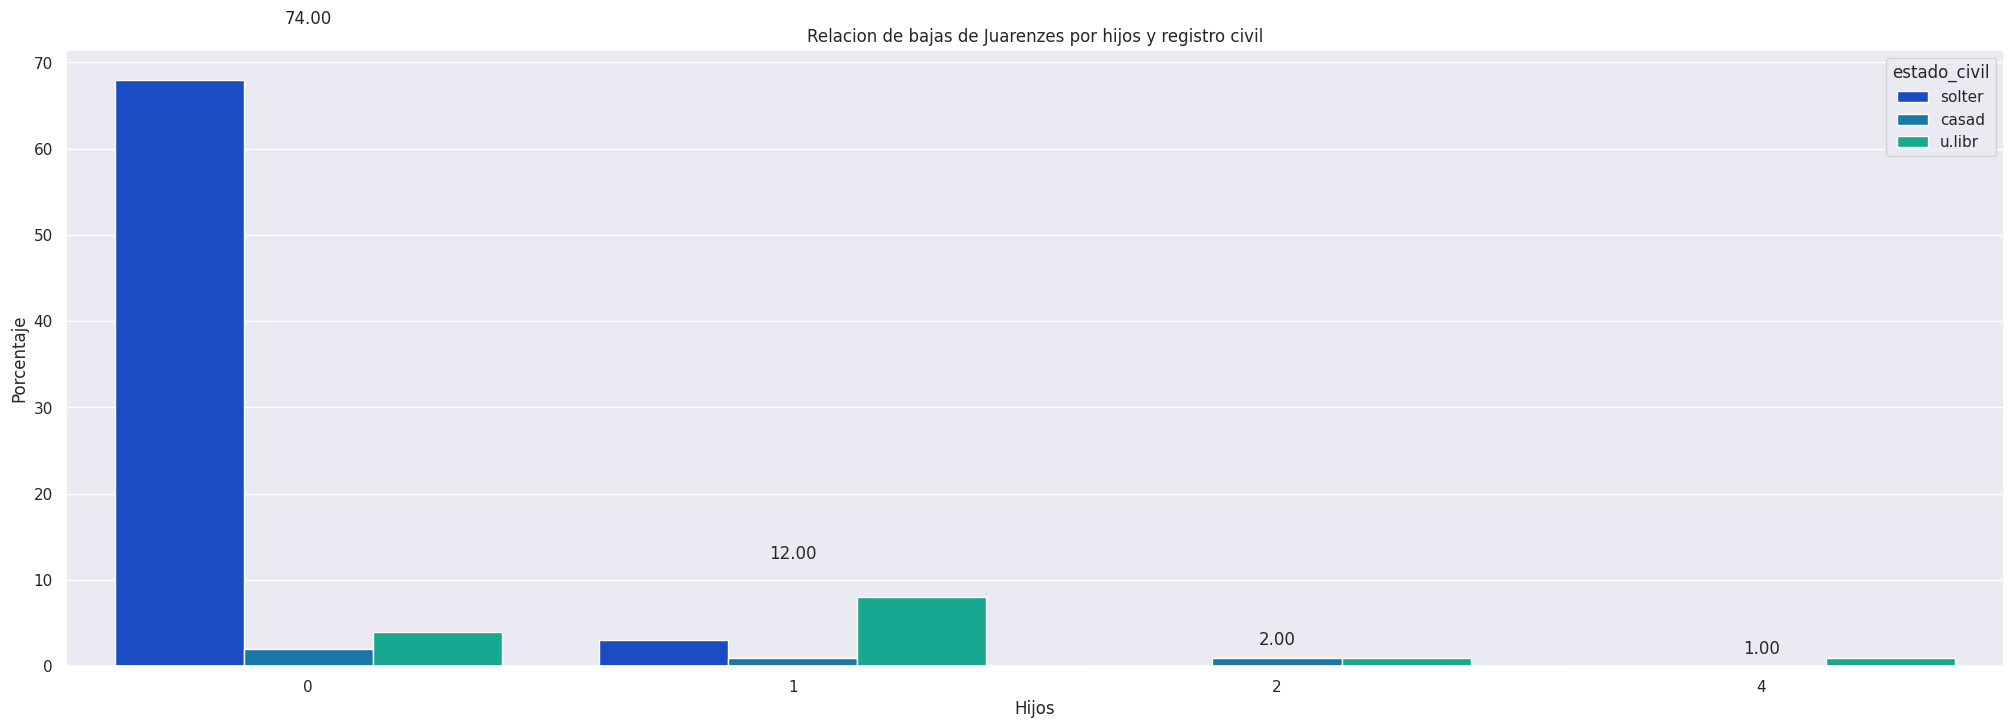

In [ ]:
bajas_hijos = df_filtrado_3["hijos"].value_counts()
sns.countplot(x='hijos', hue='estado_civil', data=df_filtrado_3 ,palette = 'winter')
plt.title('Relacion de bajas de Juarenzes por hijos y registro civil')
plt.xlabel('Hijos')
plt.ylabel('Porcentaje')
plt.xticks(rotation=00)
# Añadir etiquetas (valores) encima de las barras
for i, v in enumerate(bajas_hijos):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.show()

In [ ]:
df_0.antiguedad.unique()

rango_ant = [4 ,100, 364, 1228, 1820, 3276, np.inf]
n_ran_ant = ['0-100 dias', '101-364 dias', '2-3 años', '4-5 años', '6-9 años', '10 o + años']
df_0['rango_antiguedad'] = pd.cut(df_0['antiguedad'], bins = rango_ant, labels = n_ran_ant)

array([ 2133,    76,   118,    32,    95,   152,    99,    40,   782,
         131,  1870,   145,  1979,   103,  1860,   124,  2820,   130,
          25,  2042,    75,   180,    26,    41,    18,  1223,    89,
        1881,  2189,   225,    19,   155,   117,   110,   159,    97,
          34,   173,    70,    12,  2253,    82,   215,    96,   810,
          33,  2224,   203,   138,    68,   214,    83,   891,   127,
         102,   250,   957,   194,    48,  2769,  2329,   133,   222,
        2974,  4437,   292,   278,  1769,   285,   187,  1993,  6458,
          39,  1384,   201,  3184,   299,   243,  2014,  2680,   137,
          22,    60,   348,    61,    47,   376,   264,  1671,   323,
         148,    78,  1321,   876,   369,   306,    35,   316,   204,
         109,    81,    20,   246,  1874,  1055,   342,  1083,  5570,
         684,   425,   413,  1027,   915,   705,   404,   341,  1734,
         439,   834,  5135,  1258,  1132,  1650,  1762,  1657,   395,
        1217,   832,

<ipython-input-526-1f922b646ad5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['rango_antiguedad'] = pd.cut(df_0['antiguedad'], bins = rango_ant, labels = n_ran_ant)


In [ ]:
conteo_ant = df_0['rango_antiguedad'].value_counts().sort_values(ascending=False)
df_0['rango_antiguedad'].value_counts(1)

0-100 dias      0.271186
2-3 años        0.271186
101-364 dias    0.213559
6-9 años        0.128814
4-5 años        0.091525
10 o + años     0.023729
Name: rango_antiguedad, dtype: float64

<Axes: xlabel='rango_antiguedad', ylabel='count'>

Text(0.5, 1.0, 'Conteo de rangos de antiguedad')

Text(0.5, 0, 'Antiguedad')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0-100 dias'),
  Text(1, 0, '2-3 años'),
  Text(2, 0, '101-364 dias'),
  Text(3, 0, '6-9 años'),
  Text(4, 0, '4-5 años'),
  Text(5, 0, '10 o + años')])

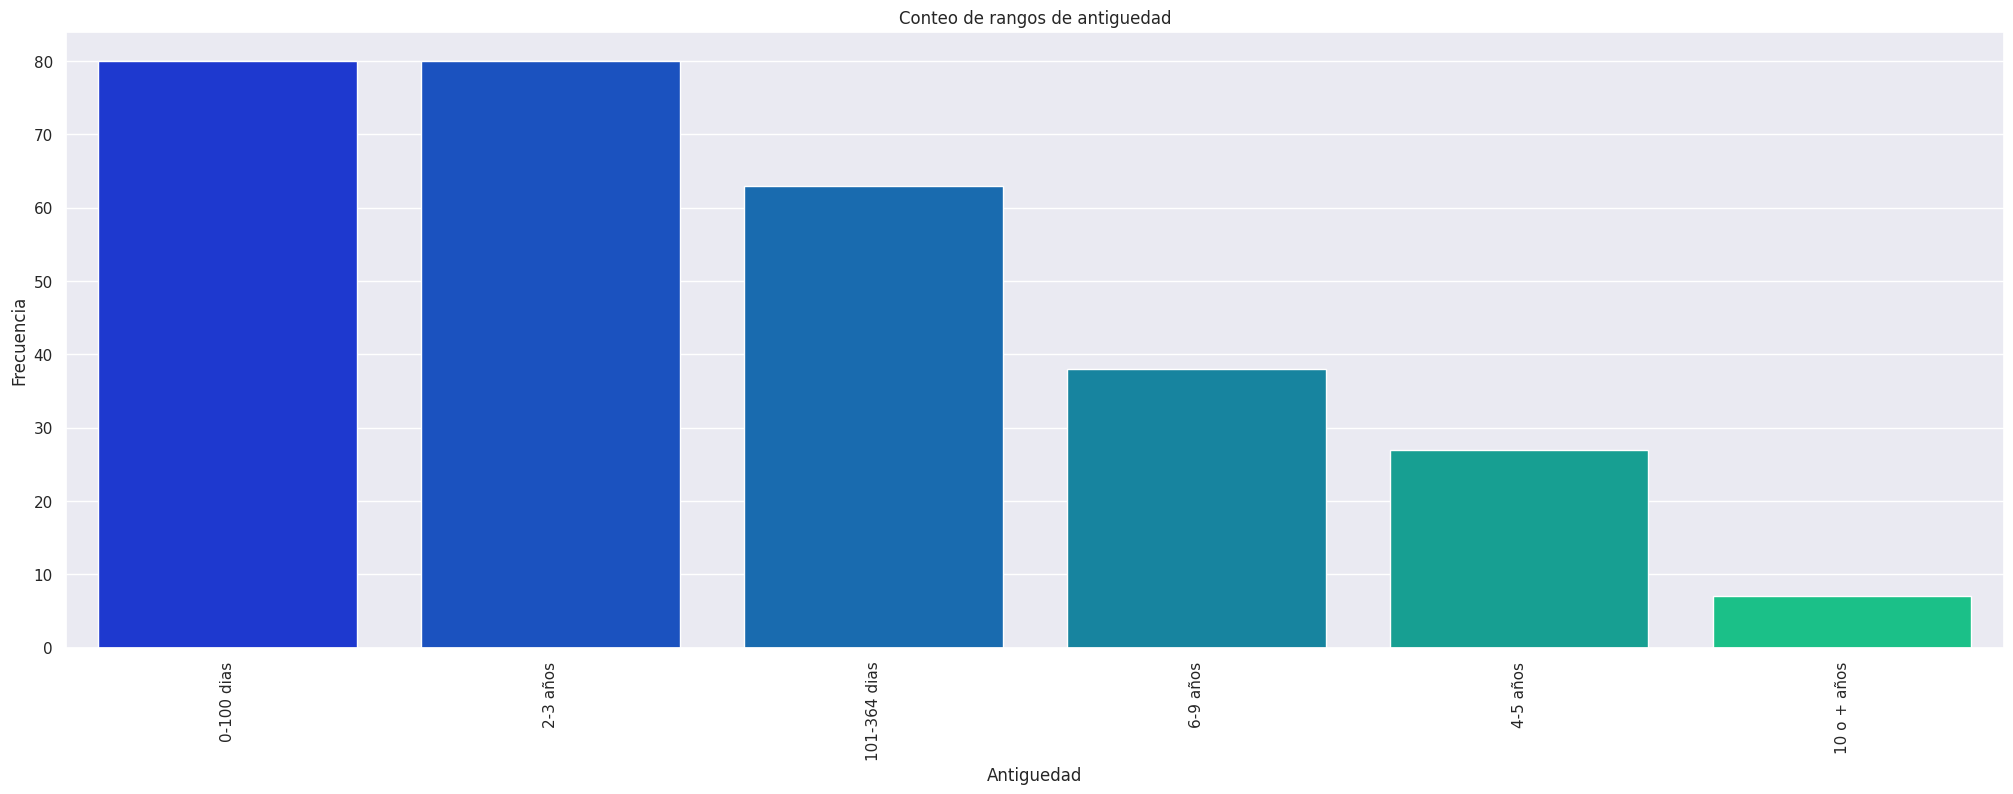

In [ ]:
sns.countplot(x='rango_antiguedad', data=df_0, order=conteo_ant.index, palette='winter')
plt.title('Conteo de rangos de antiguedad')
plt.xlabel('Antiguedad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 4 to 1382
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   posicion               295 non-null    object  
 1   area                   295 non-null    object  
 2   a.liq.                 295 non-null    object  
 3   grupo_de_personal      295 non-null    object  
 4   codigo_postal          295 non-null    int64   
 5   motivo_de_la_renuncia  295 non-null    object  
 6   banda                  295 non-null    object  
 7   baja                   295 non-null    object  
 8   reglapht               295 non-null    object  
 9   alta                   295 non-null    object  
 10  anos                   295 non-null    int64   
 11  meses                  295 non-null    float64 
 12  antiguedad             295 non-null    int64   
 13  clave_de_sexo          295 non-null    object  
 14  lugar_de_nacimiento    295 non-null    ob

In [ ]:
#filtrado para seleccionar un dataframe solo con los cp con mas de 10 ocurrencias

conteo_cp = df_0['codigo_postal'].value_counts()

# Filtrar los motivos que tienen más de 5 ocurrencias
cp_con_mas_de_10 = conteo_cp[conteo_cp > 10].index

# Filtrar el DataFrame original
df_filtrado = df_0[df_0['codigo_postal'].isin(cp_con_mas_de_10)]

#print(df_filtrado.area.value_counts(1))
#print(df_filtrado.lugar_de_nacimiento.value_counts(1))
df_filtrado.codigo_postal.unique()

array([32575, 32599, 32600, 32590])

<Axes: xlabel='rango_antiguedad', ylabel='count'>

Text(0.5, 1.0, 'Relacion de bajas de Juarenzes por hijos y registro civil')

Text(0.5, 0, 'Antiguedad')

Text(0, 0.5, 'Porcentaje')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0-100 dias'),
  Text(1, 0, '101-364 dias'),
  Text(2, 0, '2-3 años'),
  Text(3, 0, '4-5 años'),
  Text(4, 0, '6-9 años'),
  Text(5, 0, '10 o + años')])

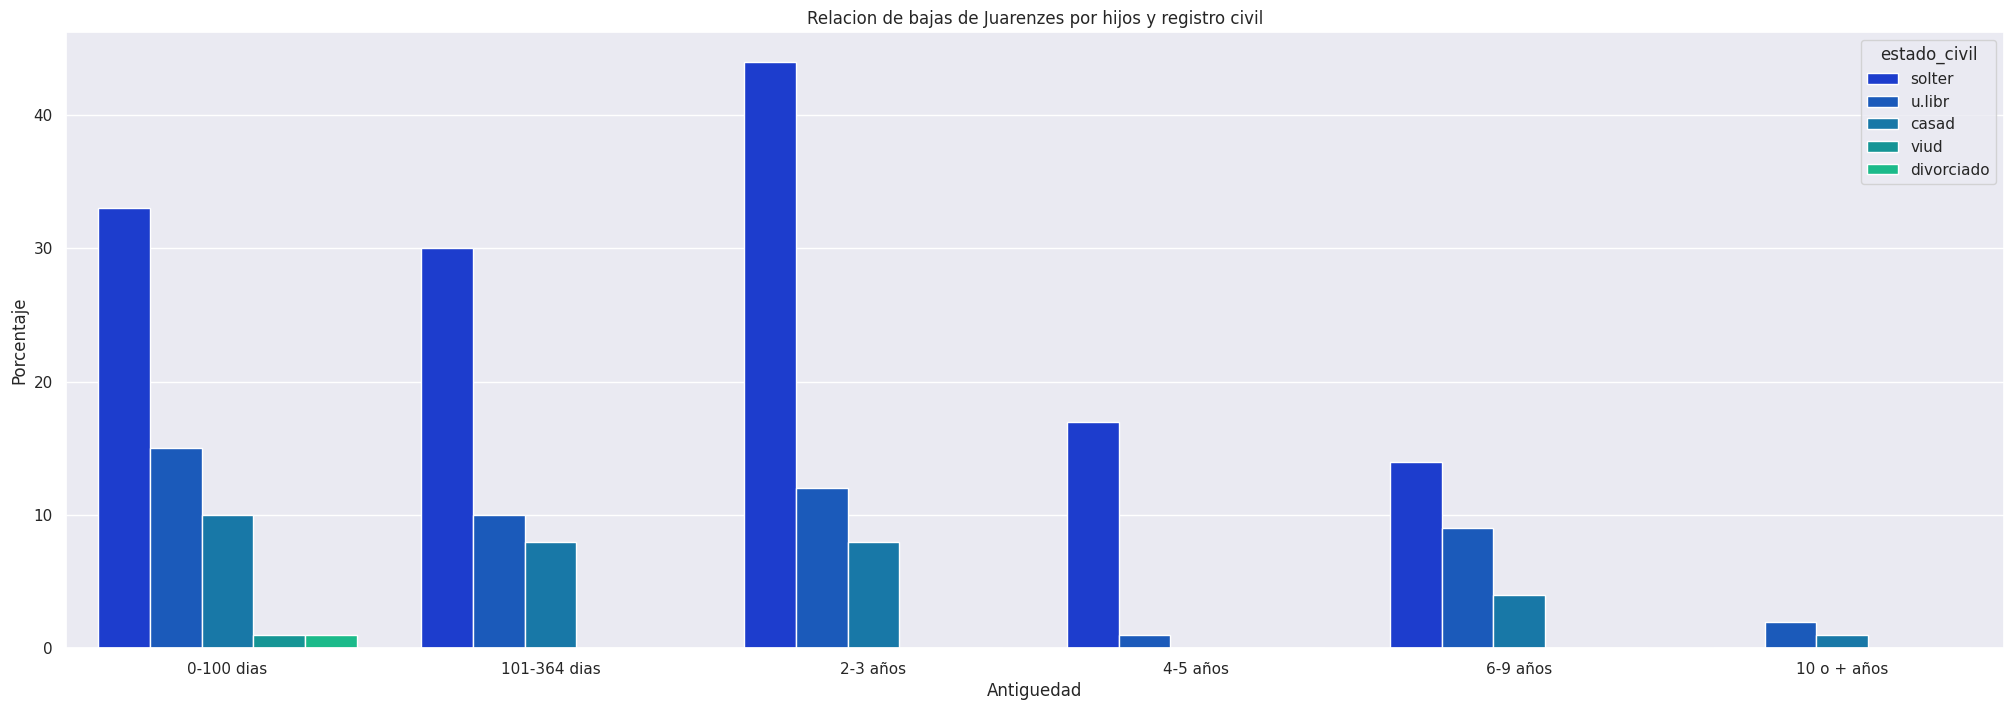

In [ ]:
bajas_hijos = df_filtrado["rango_antiguedad"].value_counts()
sns.countplot(x='rango_antiguedad', hue='estado_civil', data=df_filtrado ,palette = 'winter')
plt.title('Relacion de bajas de Juarenzes por hijos y registro civil')
plt.xlabel('Antiguedad')
plt.ylabel('Porcentaje')
plt.xticks(rotation=00)

plt.show()

<Axes: xlabel='hijos', ylabel='count'>

Text(0.5, 1.0, 'Relacion de bajas de Juarenzes por hijos y registro civil')

Text(0.5, 0, 'Antiguedad')

Text(0, 0.5, 'Porcentaje')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

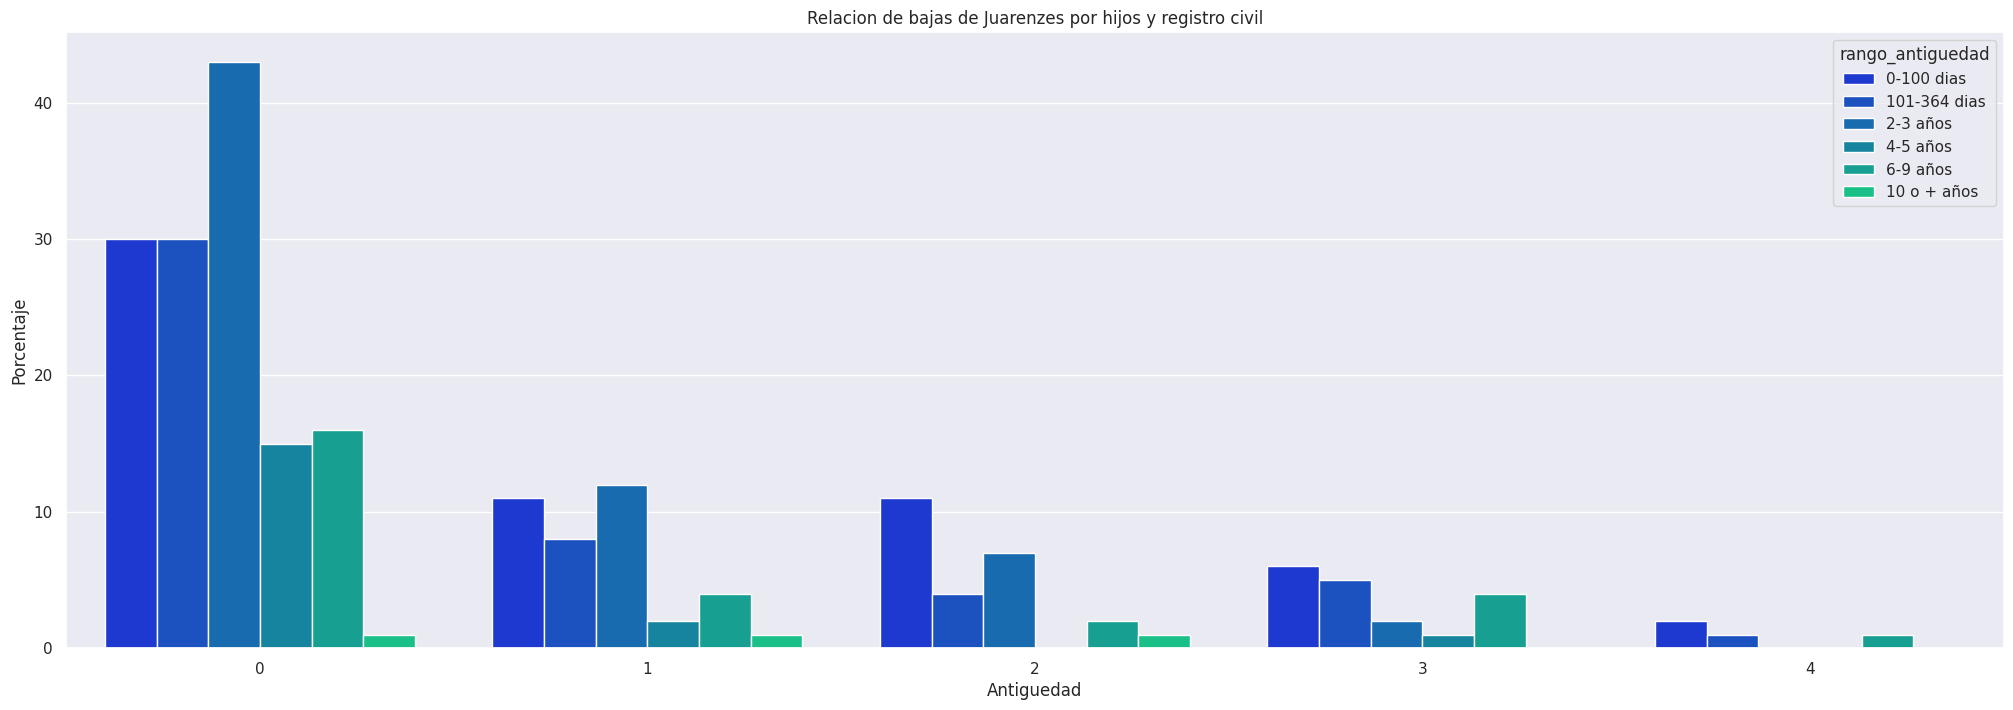

In [ ]:
bajas_hijos = df_filtrado["hijos"].value_counts()
sns.countplot(x='hijos', hue='rango_antiguedad', data=df_filtrado ,palette = 'winter')
plt.title('Relacion de bajas de Juarenzes por hijos y registro civil')
plt.xlabel('Antiguedad')
plt.ylabel('Porcentaje')
plt.xticks(rotation=00)

plt.show()

In [ ]:
df_0.rango_antiguedad.value_counts(1)

0-100 dias      0.271186
2-3 años        0.271186
101-364 dias    0.213559
6-9 años        0.128814
4-5 años        0.091525
10 o + años     0.023729
Name: rango_antiguedad, dtype: float64

# Analisis perfil persona 1

## Conclusiones
1. El perfil demografico esta conformado en su totalidad por hombres solteros, de una alig de **S5**, grupo de trabajo **Directo**, con todas las categorias de **reglaPHT a excepcion de  ADMINIST**, la mayoria en edades de 18 -37 años *~63%*, sin hijos *~67*, los cuales se ubican en la zona sur-este de ciudad juarez, el rango de tiempo que este perfil de empleado en su mayoria no consta de mas de 3 años, los cuales tienen una distribucion uniforme de 0 - 100 dias *~27%*, 1-2 años *~27%* y 2-3 años *~21%*.
2. Las principales razones de abandono de la empresa es que consiguen otro empleo y dado que la principal razon que encontramos para buscar un empleo diferente es la diferencia salarial o mayores oportunidades de crecimiento en la empresa, lo cual un dato faltante que nos pudiera dar mas luz de si esta fue la razon seria la escolaridad, tambien por la zona y el trafico pueden ser factores que ayudaran a la decision de los ex-empleados de abandonar la empresa.
3. No se encontro una tendencia diferente entre las personas originarias de ciudad juarez y los foraneos en cuanto a motivos de abandono de la empresa, estado civil, hijos.

##Recomendaciones
- En base a lo encontrado en el analisis se recomendaria hacer un estudio de mercado para ver si el sueldo que se ofrece es competivo con otras empresas de la ciudad y si es posible realizar algo con respecto al transporte

In [ ]:
#posiciones
#area de trabajo
#distribucion segun el turno de trabajo
#antiguedad
#mencionar de los hijos

# Codigo perfil de persona 2

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("dataClusterizado.csv")

In [ ]:
df.banda.value_counts()

DO     876
DNO    358
E3      96
E4      48
SL1     13
Name: banda, dtype: int64

In [ ]:
cluster1 = df[df["cluster"] == 1]

In [ ]:
cluster1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 3 to 1389
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             583 non-null    int64  
 1   posicion               583 non-null    object 
 2   area                   583 non-null    object 
 3   a.liq.                 583 non-null    object 
 4   grupo_de_personal      583 non-null    object 
 5   codigo_postal          583 non-null    int64  
 6   motivo_de_la_renuncia  583 non-null    object 
 7   banda                  583 non-null    object 
 8   baja                   583 non-null    object 
 9   reglapht               583 non-null    object 
 10  alta                   583 non-null    object 
 11  anos                   583 non-null    int64  
 12  meses                  583 non-null    float64
 13  antiguedad             583 non-null    int64  
 14  clave_de_sexo          583 non-null    object 
 15  lugar

## Distribucion por genero

In [ ]:
cluster1.clave_de_sexo.value_counts()

femenino    583
Name: clave_de_sexo, dtype: int64

**El 100%** de los integrantes del cluster 1 se conforma por **mujeres**

## Distribucion por a. liq.

In [ ]:
cluster1["a.liq."].value_counts()

S5    583
Name: a.liq., dtype: int64

El **100%** de las empleadas pertenecen al area de **S5**

## Distribucion por Grupo de personal

In [ ]:
cluster1.grupo_de_personal.value_counts()

Direct    583
Name: grupo_de_personal, dtype: int64

El **100%** de las empleadas pertenece al grupo de **Directo**


## Distribucion por banda Salarial

<Axes: xlabel='banda', ylabel='count'>

Text(0.5, 1.0, 'Perfil 2: Banda Salarial')

Text(0.5, 0, 'Banda salarial')

Text(0, 0.5, 'Frecuencia')

(array([0, 1]), [Text(0, 0, 'DO'), Text(1, 0, 'DNO')])

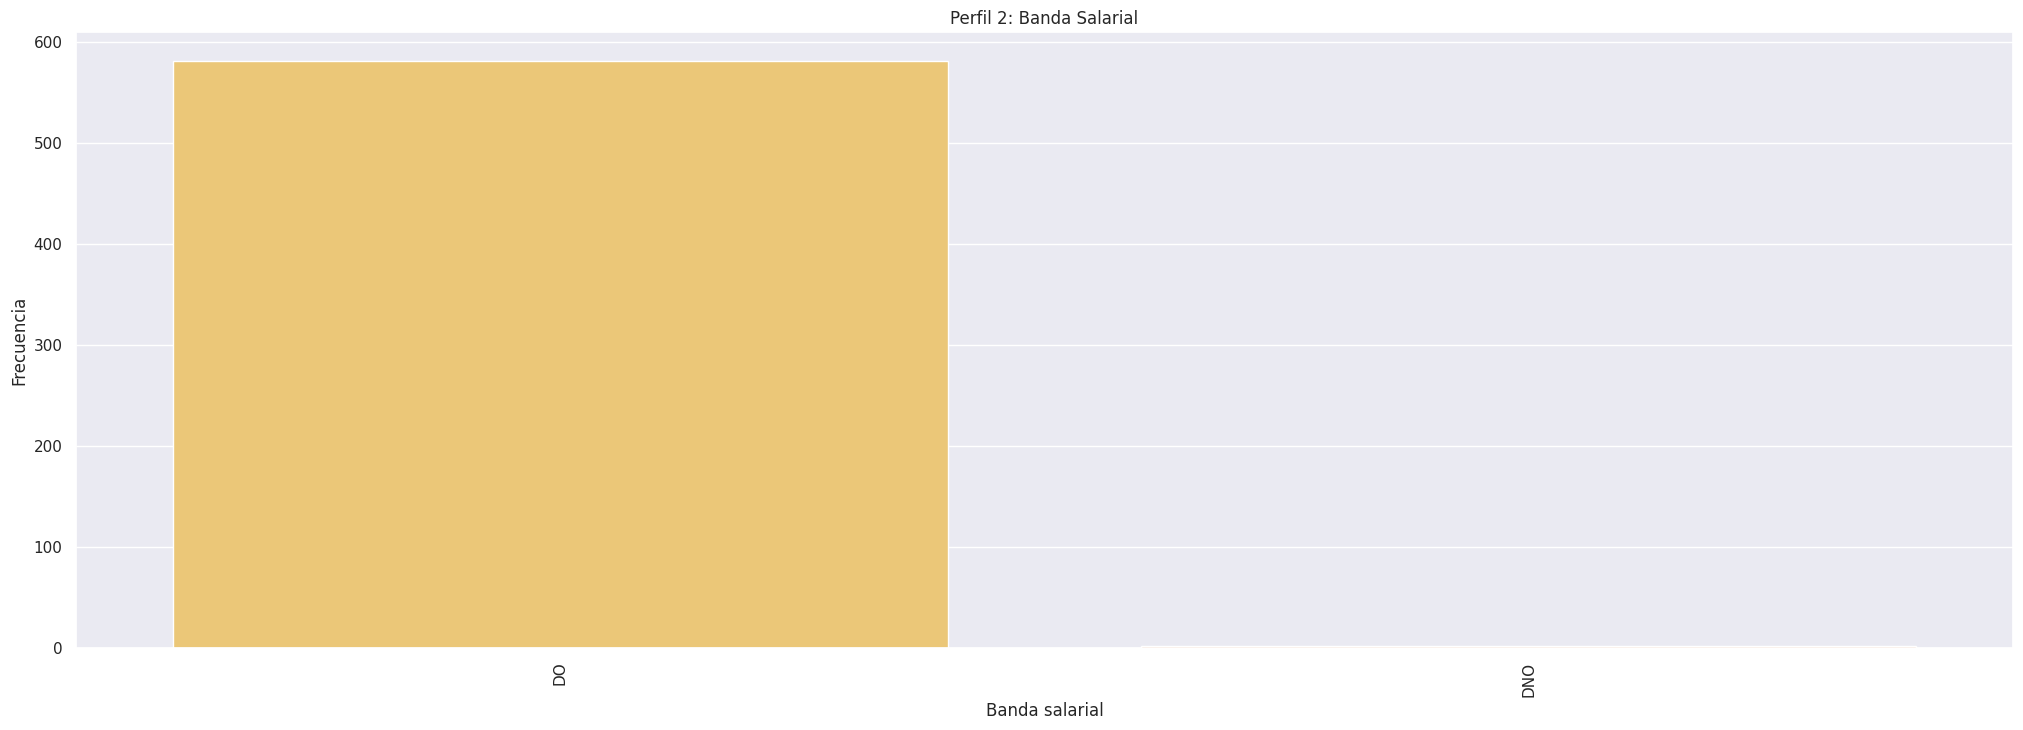

In [ ]:
conteo_banda = cluster1['banda'].value_counts().sort_values(ascending=False)
sns.countplot(x='banda', data=cluster1, order=conteo_banda.index, palette="YlOrBr")
plt.title('Perfil 2: Banda Salarial')
plt.xlabel('Banda salarial')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

plt.show()

In [ ]:
cluster1.banda.value_counts()

DO     581
DNO      2
Name: banda, dtype: int64

Un **99.6%** de las empleadas pertenecen a la banda salarial **DO**

## Distribucion por posicion en la empresa

<Axes: xlabel='posicion', ylabel='count'>

Text(0.5, 1.0, 'Perfil 2: Posicion en la empresa')

Text(0.5, 0, 'Posicion')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'POS1323'),
  Text(1, 0, 'POS538'),
  Text(2, 0, 'POS2939'),
  Text(3, 0, 'POS1921'),
  Text(4, 0, 'POS1380'),
  Text(5, 0, 'POS1661'),
  Text(6, 0, 'POS2003')])

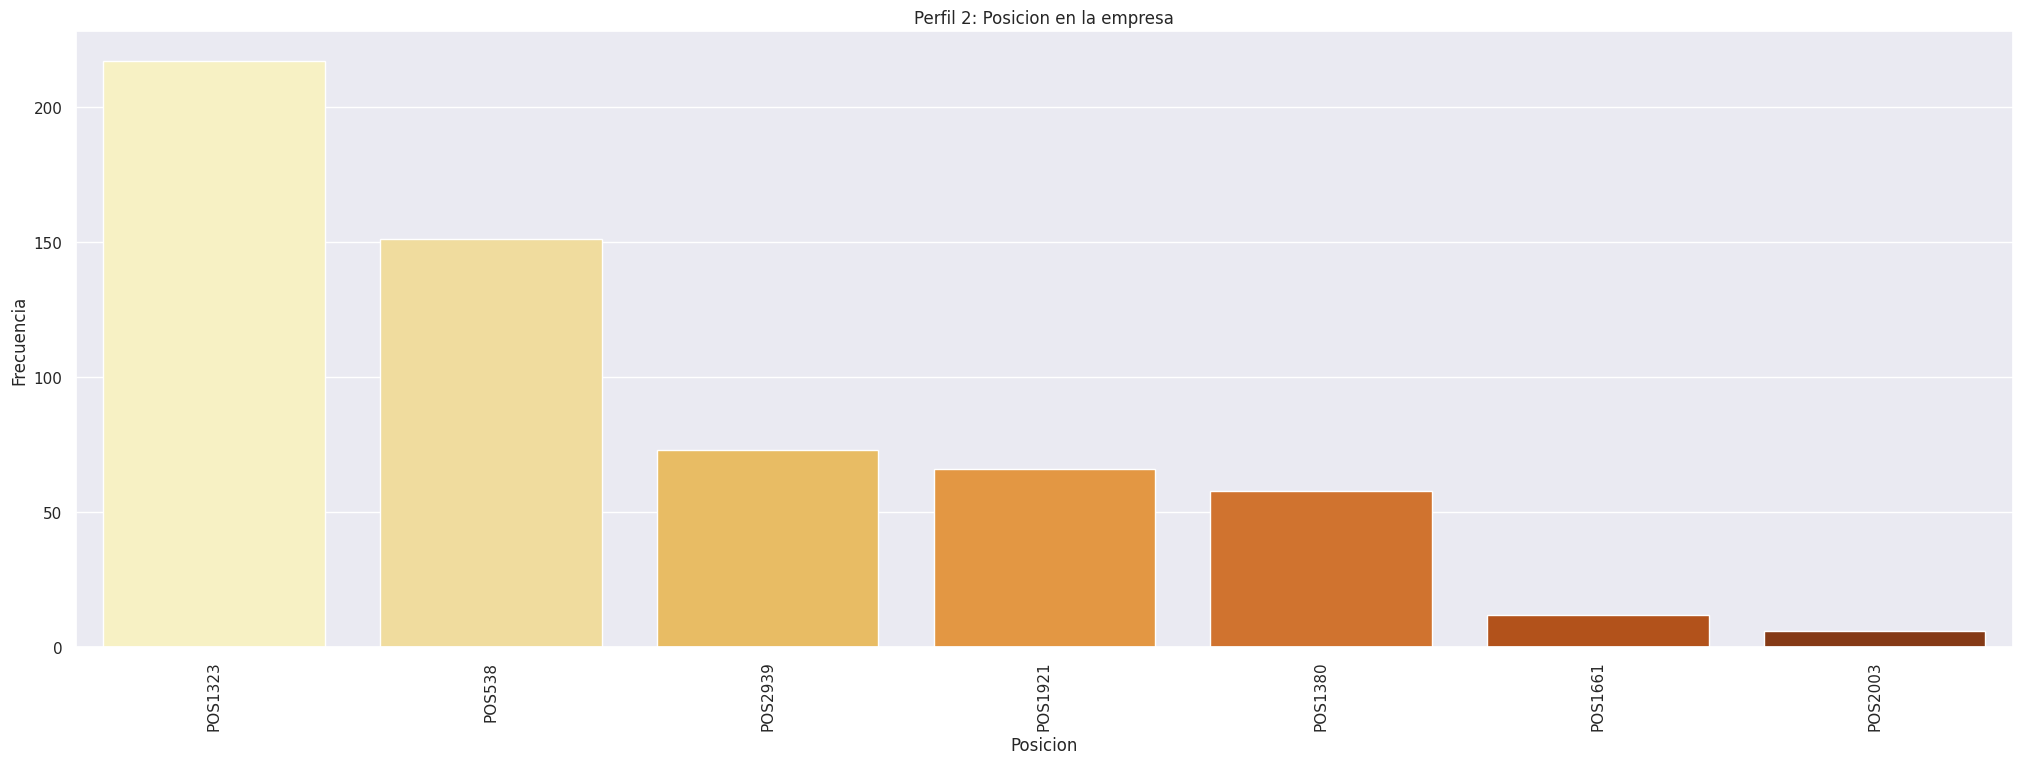

In [ ]:
conteo_posicion = cluster1['posicion'].value_counts().sort_values(ascending=False)
sns.countplot(x='posicion', data=cluster1, order=conteo_posicion.index, palette="YlOrBr")
plt.title('Perfil 2: Posicion en la empresa')
plt.xlabel('Posicion')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

plt.show()

El **63%** de las empleadas se ubicaron en las posiciones: **POS1323 y POS538**

## Distribucion por area dentro de la empresa

<Axes: xlabel='area', ylabel='count'>

Text(0.5, 1.0, 'Perfil 2: Area de trabajo en la empresa')

Text(0.5, 0, 'Area')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'VS9-ABS'),
  Text(1, 0, 'MFS'),
  Text(2, 0, 'VS7'),
  Text(3, 0, 'VS1'),
  Text(4, 0, 'VS5'),
  Text(5, 0, 'VS4'),
  Text(6, 0, 'VS1-HOUS')])

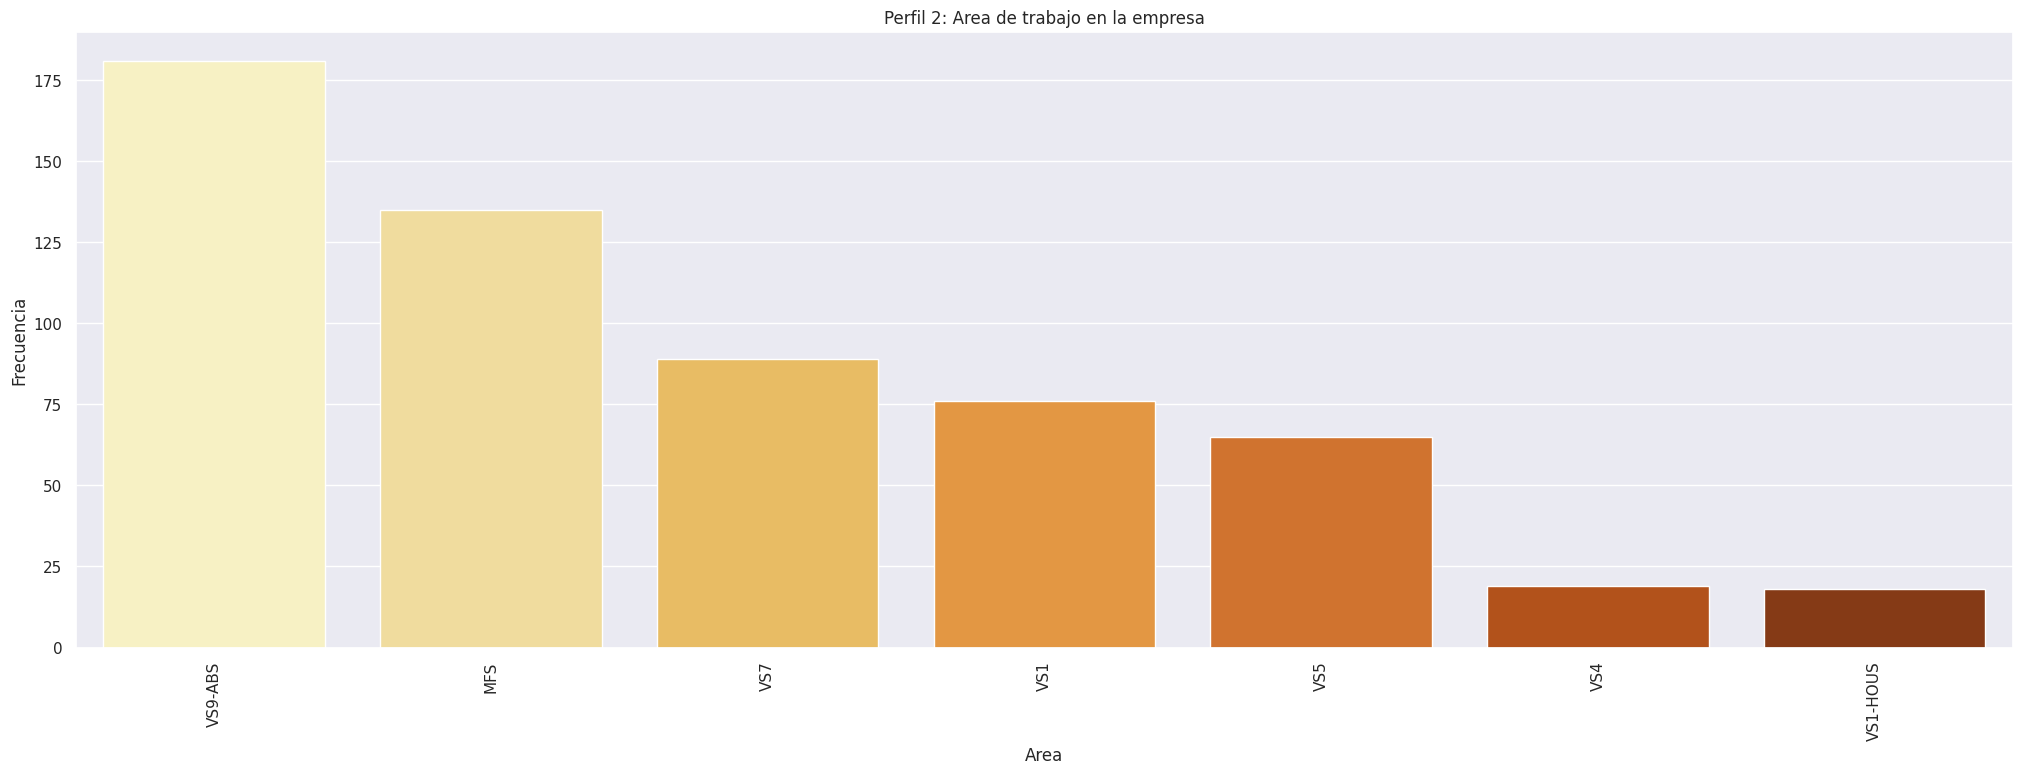

In [ ]:
conteo_area = cluster1['area'].value_counts().sort_values(ascending=False)
sns.countplot(x='area', data=cluster1, order=conteo_area.index, palette="YlOrBr")
plt.title('Perfil 2: Area de trabajo en la empresa')
plt.xlabel('Area')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

plt.show()

El **54%** de las empleadas se ubicaron en las areas: **VS9-ABS y MFS**

## Distribucion por codigo postal

<Axes: xlabel='codigo_postal', ylabel='count'>

Text(0.5, 1.0, 'Perfil 2: Por codigo postal')

Text(0.5, 0, 'Codigo postal')

Text(0, 0.5, 'Frecuencia')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '32575'),
  Text(1, 0, '32599'),
  Text(2, 0, '32590'),
  Text(3, 0, '32696'),
  Text(4, 0, '32695'),
  Text(5, 0, '32540'),
  Text(6, 0, '32584'),
  Text(7, 0, '32543'),
  Text(8, 0, '32570'),
  Text(9, 0, '32563'),
  Text(10, 0, '32573'),
  Text(11, 0, '3720'),
  Text(12, 0, '32424'),
  Text(13, 0, '32600'),
  Text(14, 0, '32107'),
  Text(15, 0, '32576'),
  Text(16, 0, '32660'),
  Text(17, 0, '32654')])

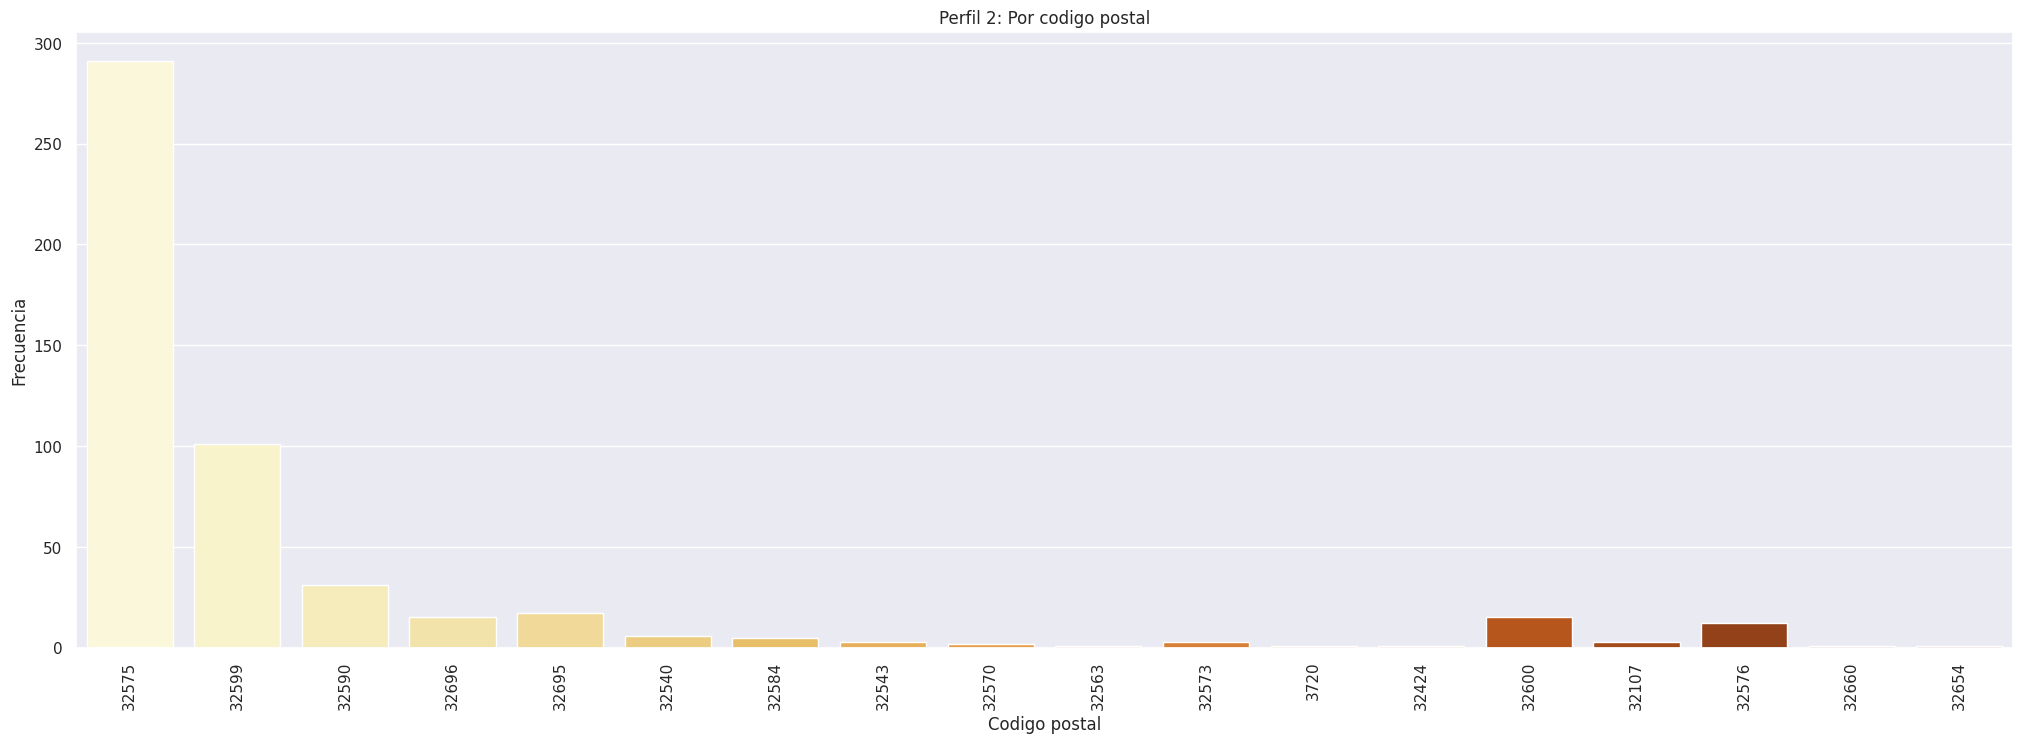

In [ ]:
conteo_cp = cluster1['codigo_postal'][:100].value_counts().sort_values(ascending=False)
sns.countplot(x='codigo_postal', data=cluster1, order=conteo_cp.index, palette="YlOrBr")
plt.title('Perfil 2: Por codigo postal')
plt.xlabel('Codigo postal')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

plt.show()

El **49.9%** de los datos proviene del codigo postal **32575** mientras que el **17.3%** proviene del CP **32599**

## Distribucion segun el turno de trabajo

<Axes: xlabel='reglapht', ylabel='count'>

Text(0.5, 1.0, 'Perfil 2: Por turno de trabajo')

Text(0.5, 0, 'Turno de trabajo')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'JF010600'),
  Text(1, 0, 'JS011500'),
  Text(2, 0, 'JT031800'),
  Text(3, 0, 'JT012324'),
  Text(4, 0, 'JF060600'),
  Text(5, 0, 'JF050600')])

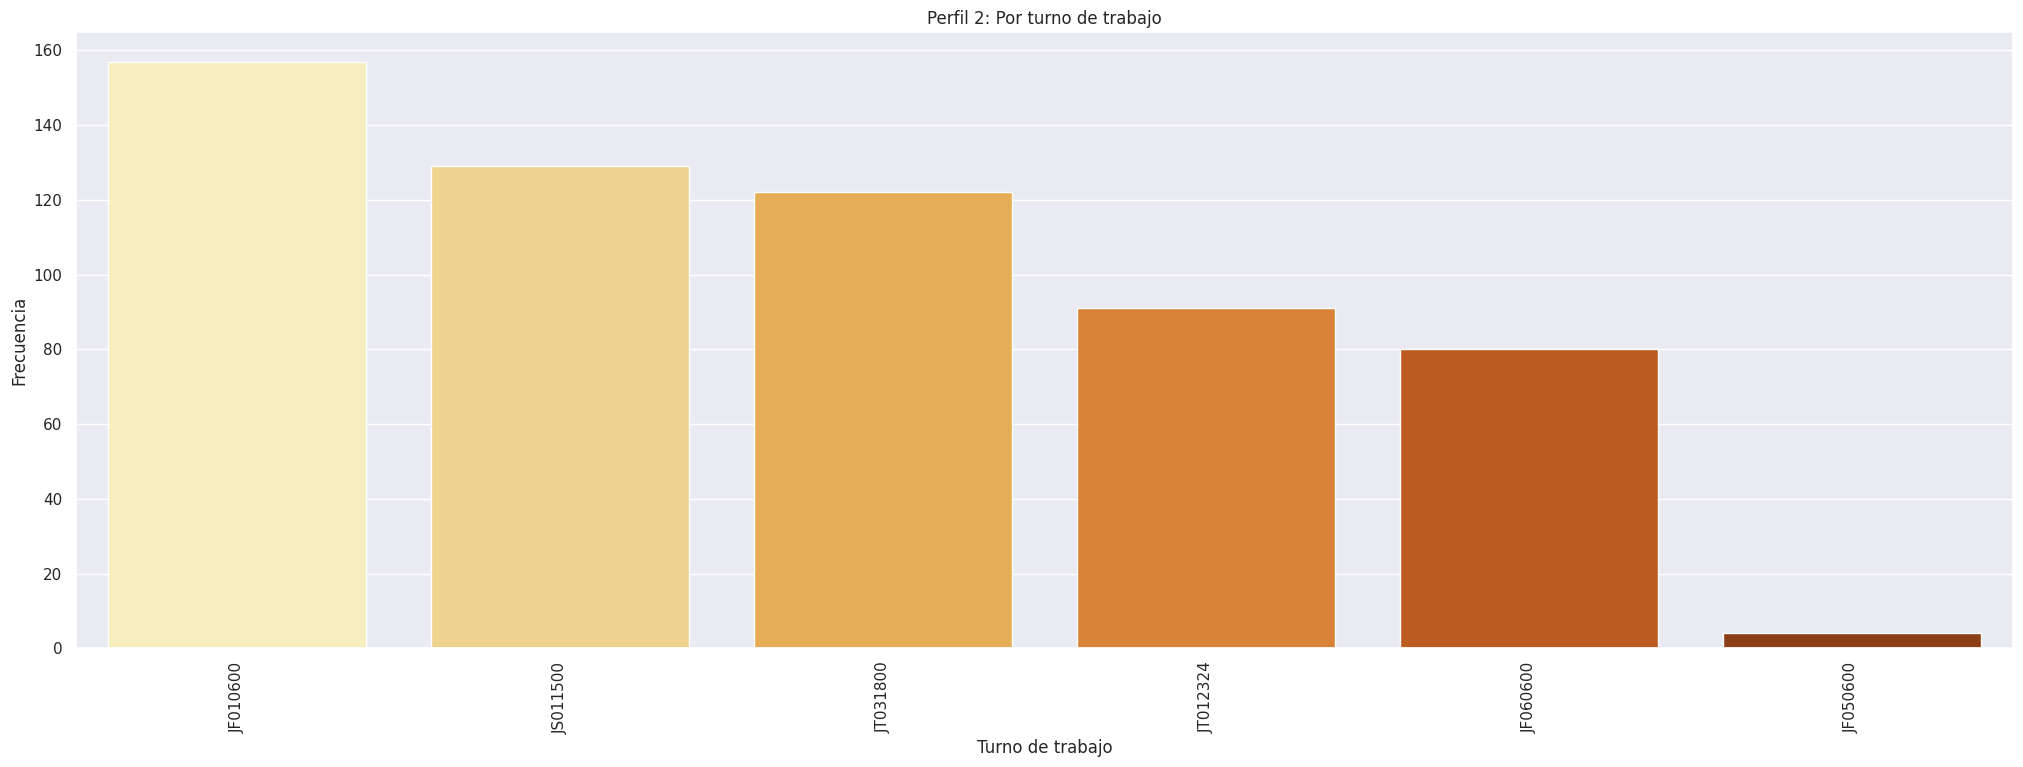

In [ ]:
conteo_reglapht = cluster1['reglapht'].value_counts().sort_values(ascending=False)
sns.countplot(x='reglapht', data=cluster1, order=conteo_reglapht.index, palette="YlOrBr")
plt.title('Perfil 2: Por turno de trabajo')
plt.xlabel('Turno de trabajo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

plt.show()

**El 27%** se registro en el **turno JF010600**, mientras que el **22%** fue en el turno **JS011500** y **21% en JT031800**. En contraste el **JF050600** CASI **NO tiene presencia**

## Distribucion segun antiguedad en el empleo

<ipython-input-549-b32411a2e9e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1['rango_antiguedad'] = pd.cut(cluster1['antiguedad'], bins = rango_ant, labels = n_ran_ant)


<Axes: xlabel='rango_antiguedad', ylabel='count'>

Text(0.5, 1.0, 'Perfil 2: Por Antiguedad en el empleo')

Text(0.5, 0, 'Antiguedad (dias)')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2-3 años'),
  Text(1, 0, '0-100 dias'),
  Text(2, 0, '101-364 dias'),
  Text(3, 0, '6-9 años'),
  Text(4, 0, '4-5 años'),
  Text(5, 0, '10 o + años')])

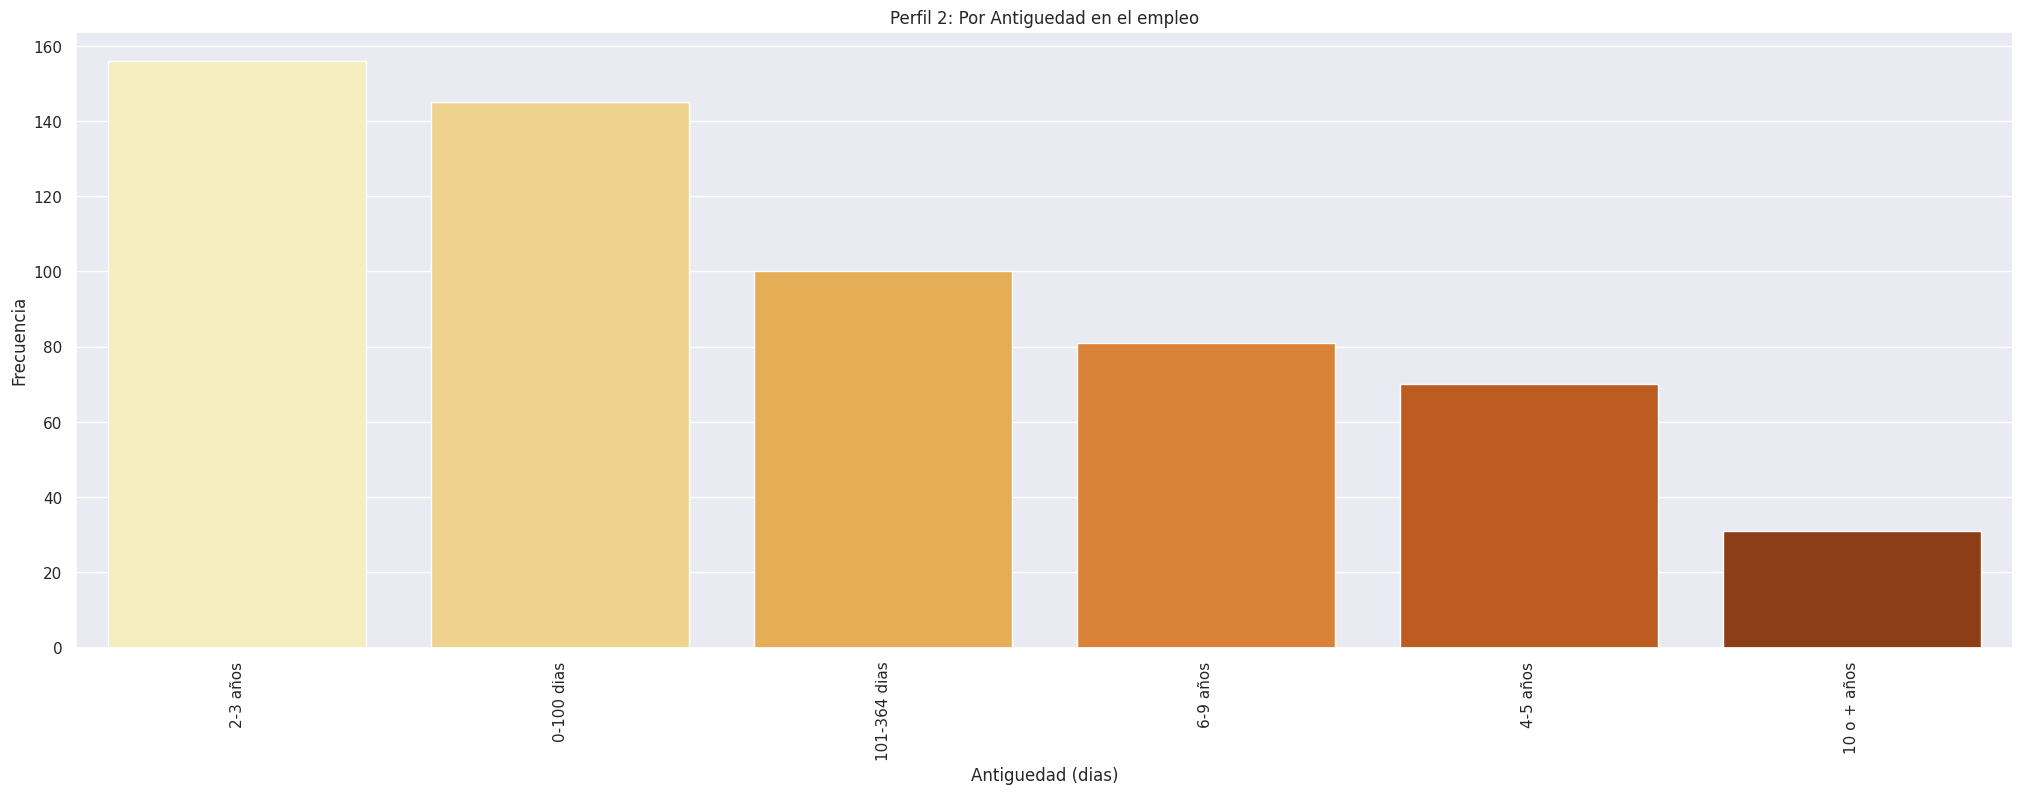

In [ ]:
rango_ant = [4 ,100, 364, 1228, 1820, 3276, np.inf]
n_ran_ant = ['0-100 dias', '101-364 dias', '2-3 años', '4-5 años', '6-9 años', '10 o + años']
cluster1['rango_antiguedad'] = pd.cut(cluster1['antiguedad'], bins = rango_ant, labels = n_ran_ant)
conteo_antiguedad = cluster1['rango_antiguedad'].value_counts().sort_values(ascending=False)
sns.countplot(x='rango_antiguedad', data=cluster1, order=conteo_antiguedad.index, palette="YlOrBr")
plt.title('Perfil 2: Por Antiguedad en el empleo')
plt.xlabel('Antiguedad (dias)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

plt.show()


Las personas con una temporada de **0 a 3 año**s laborando se encuentran entre el mayor porcentaje, con un **70% de ocurrencia**

## Distribucion segun rango de edades

<ipython-input-550-23a32053e132>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1['rango_edades'] = pd.cut(cluster1['edad_del_empleado'], bins = rango_edades, labels = nombres_rango_edades)


<Axes: xlabel='rango_edades', ylabel='count'>

Text(0.5, 1.0, 'Perfil 2: Por rango de edades')

Text(0.5, 0, 'Rango de edad')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '18-27'),
  Text(1, 0, '28-37'),
  Text(2, 0, '38-47'),
  Text(3, 0, '48-57'),
  Text(4, 0, '58-67')])

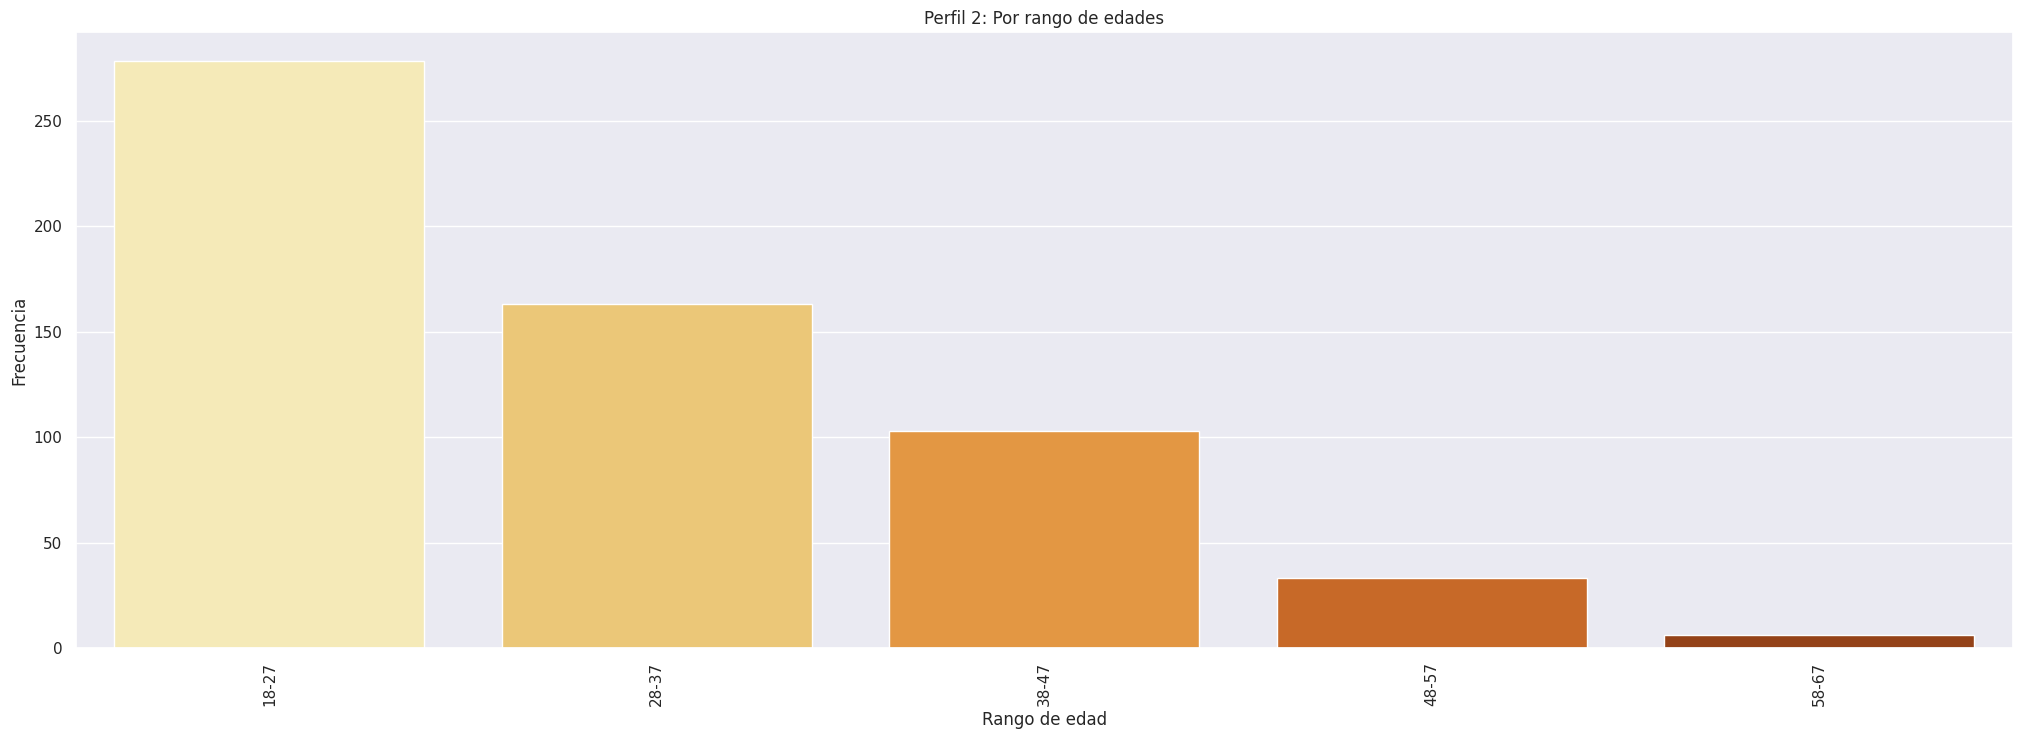

In [ ]:
rango_edades = [17 ,27, 37, 47, 57, 67]
nombres_rango_edades = ['18-27', '28-37', '38-47', '48-57', '58-67']
cluster1['rango_edades'] = pd.cut(cluster1['edad_del_empleado'], bins = rango_edades, labels = nombres_rango_edades)

conteo_edades = cluster1['rango_edades'].value_counts().sort_values(ascending=False)
sns.countplot(x='rango_edades', data=cluster1, order=conteo_edades.index, palette="YlOrBr")
plt.title('Perfil 2: Por rango de edades')
plt.xlabel('Rango de edad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

plt.show()

Las jovenes entre **18 y 27** representan la mayoria en el dataset con un 48% de ocurrencia

In [ ]:
cluster1['rango_edades'].value_counts(1)

18-27    0.476844
28-37    0.279588
38-47    0.176672
48-57    0.056604
58-67    0.010292
Name: rango_edades, dtype: float64

## Distribucion segun estado civil

<Axes: xlabel='estado_civil', ylabel='count'>

Text(0.5, 1.0, 'Perfil 2: Por Estado civil')

Text(0.5, 0, 'Estado Civil')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'solter'),
  Text(1, 0, 'u.libr'),
  Text(2, 0, 'casad'),
  Text(3, 0, 'divorciado'),
  Text(4, 0, 'viud'),
  Text(5, 0, 'sep')])

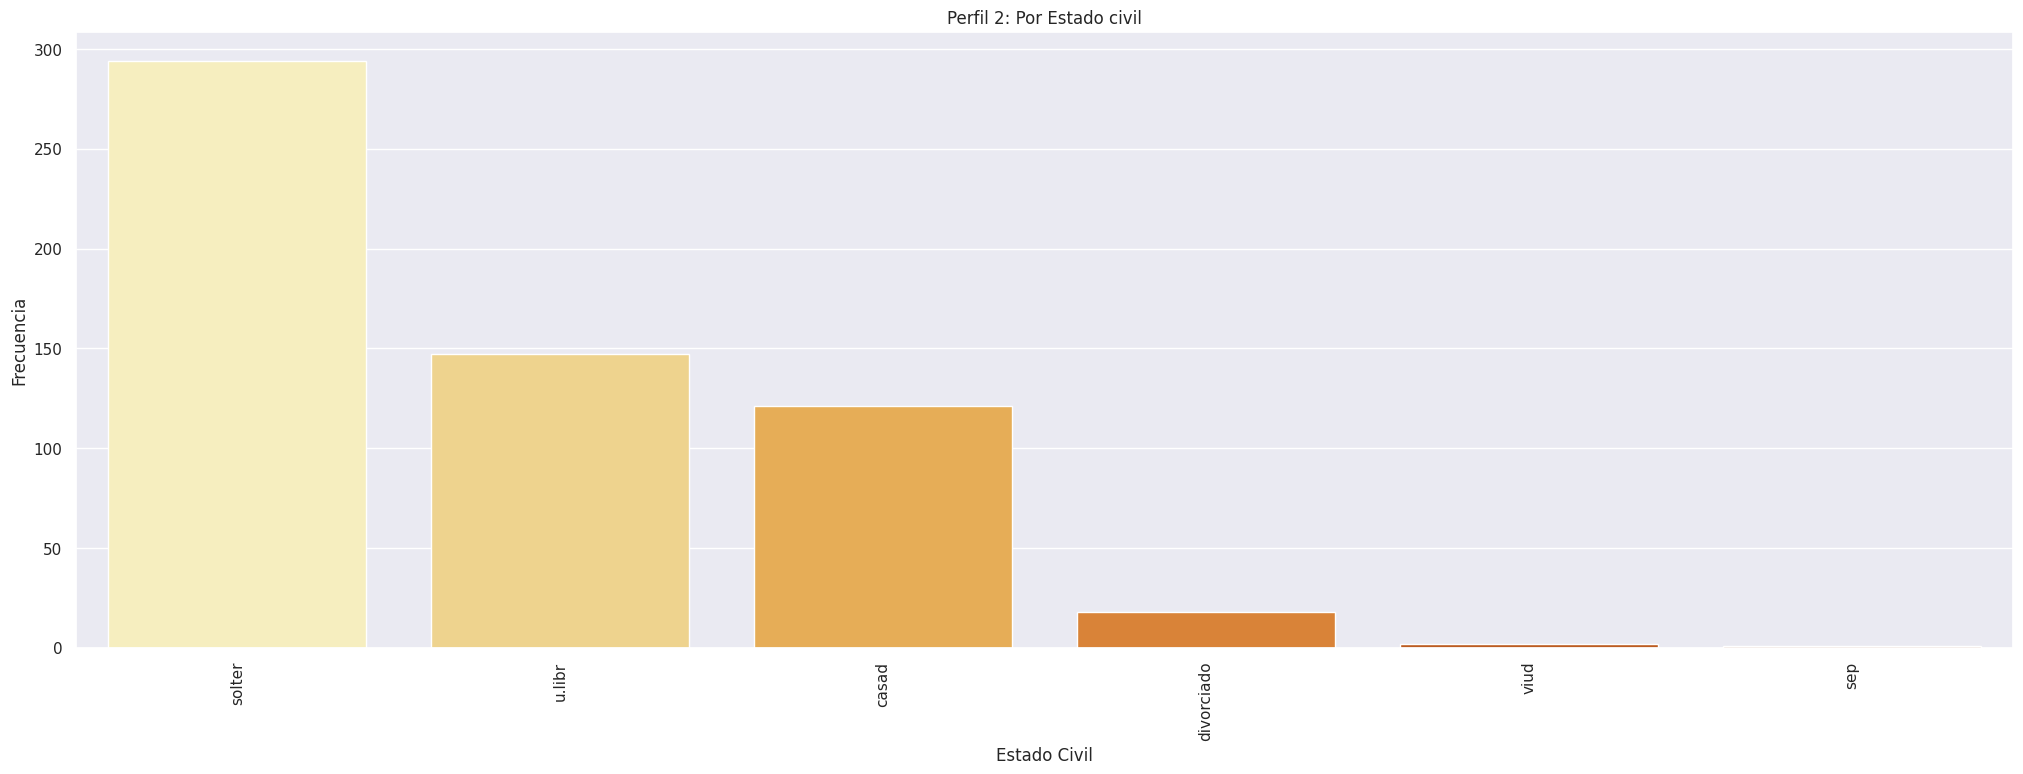

In [ ]:
conteo_edo_civil = cluster1['estado_civil'].value_counts().sort_values(ascending=False)
sns.countplot(x='estado_civil', data=cluster1, order=conteo_edo_civil.index, palette="YlOrBr")
plt.title('Perfil 2: Por Estado civil')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

plt.show()

Alrededor de **50.4%** de las empleadas se encuentran en un estado de **solteras**

## Distribucion segun hijos

<Axes: xlabel='hijos', ylabel='count'>

Text(0.5, 1.0, 'Perfil 2: Por numero de hijos')

Text(0.5, 0, 'Cantidad de hijos')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '2'),
  Text(2, 0, '1'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

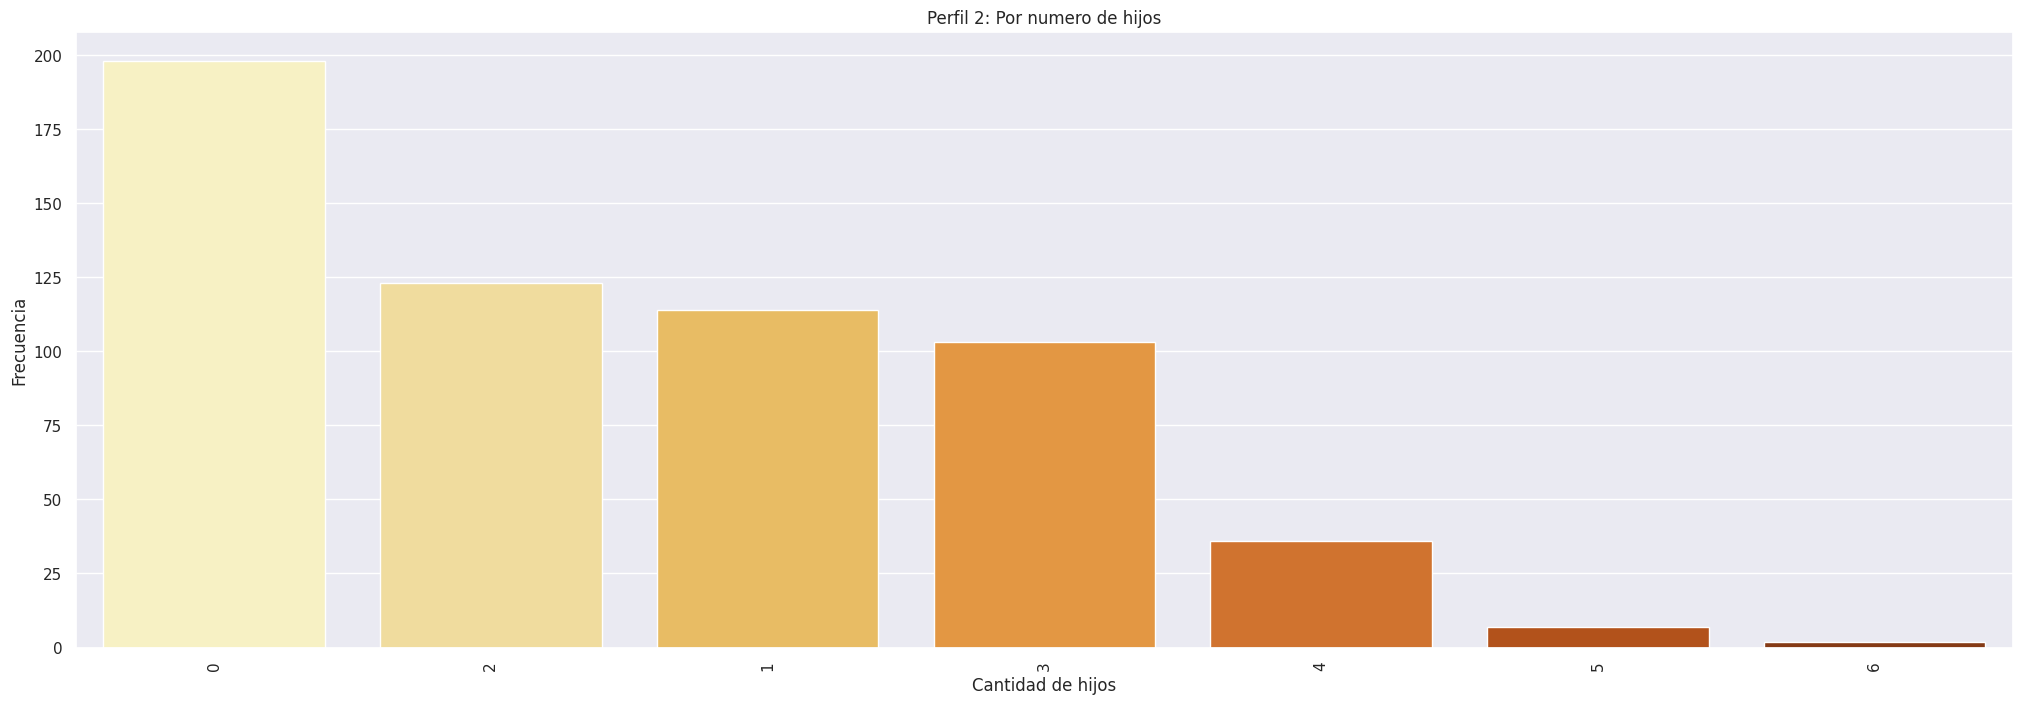

In [ ]:
conteo_hijos = cluster1['hijos'].value_counts().sort_values(ascending=False)
sns.countplot(x='hijos', data=cluster1, order=conteo_hijos.index, palette="YlOrBr")
plt.title('Perfil 2: Por numero de hijos')
plt.xlabel('Cantidad de hijos')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

plt.show()

Un **34% no tienen hijos**, mientras que un **58.1%** **tienen de 1 a 3 hijos**

<Axes: xlabel='estado_civil', ylabel='count'>

Text(0.5, 1.0, 'Perfil 2: Hijos por edo. Civil')

Text(0.5, 0, 'Estado Civil')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'solter'),
  Text(1, 0, 'u.libr'),
  Text(2, 0, 'casad'),
  Text(3, 0, 'divorciado'),
  Text(4, 0, 'viud'),
  Text(5, 0, 'sep')])

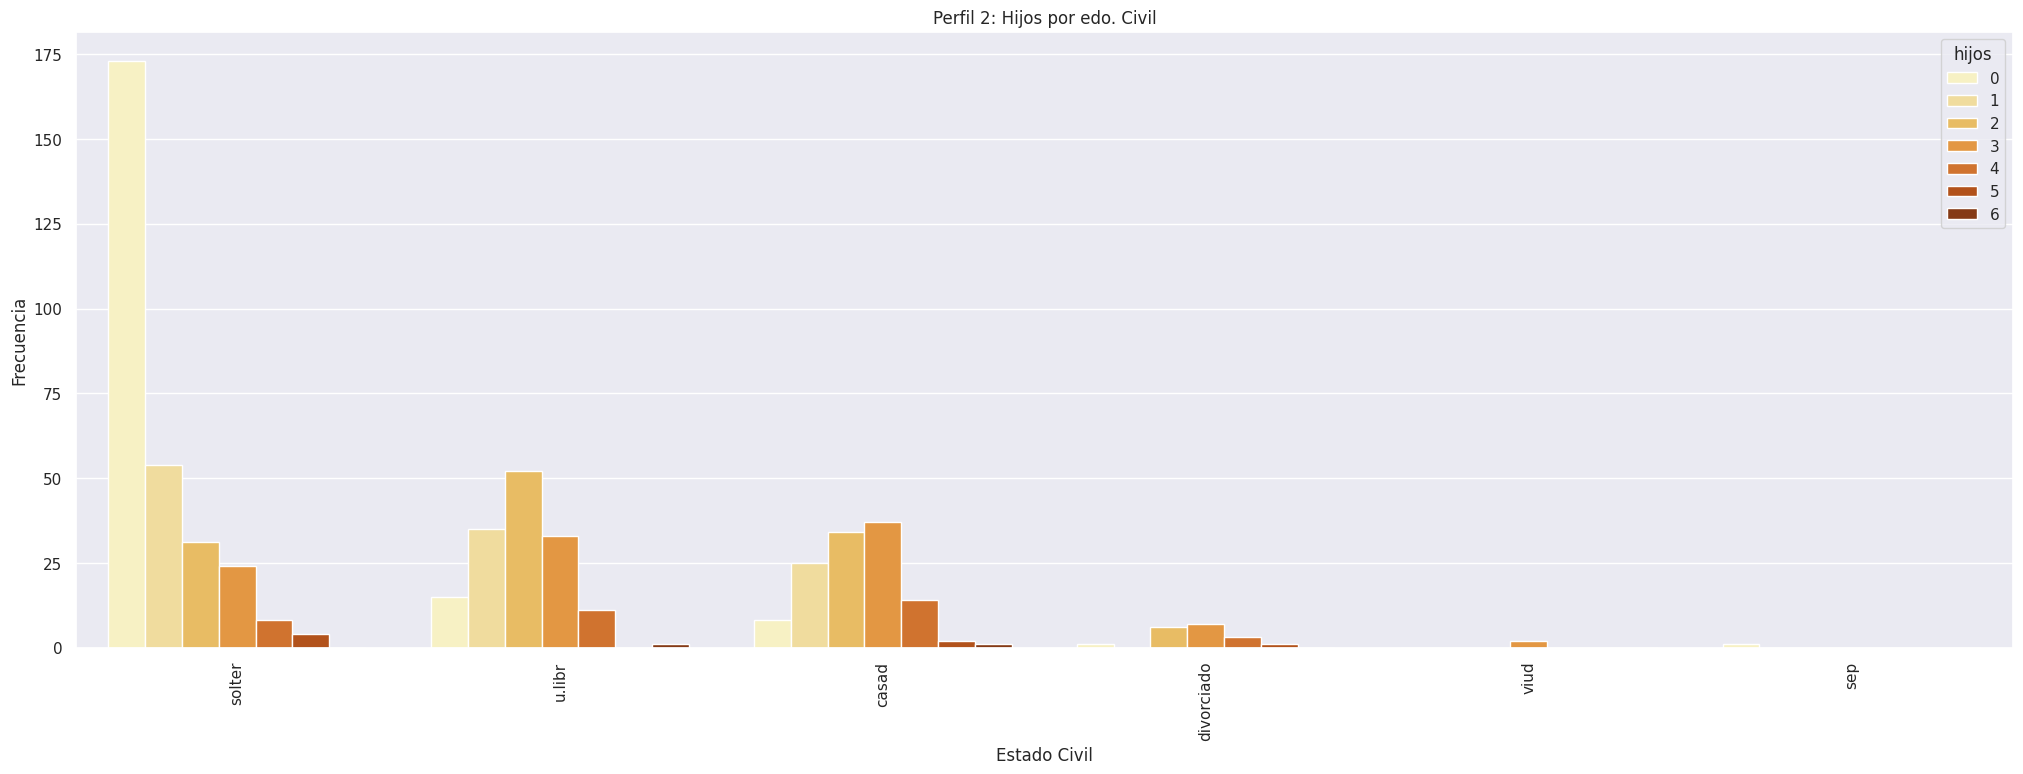

In [ ]:
conteo_edo_civil = cluster1['estado_civil'].value_counts().sort_values(ascending=False)
sns.countplot(x='estado_civil', data=cluster1, hue="hijos", order=conteo_edo_civil.index, palette="YlOrBr")
plt.title('Perfil 2: Hijos por edo. Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

plt.show()

## Motivos de salida del trabajo

<Axes: xlabel='motivo_de_la_renuncia', ylabel='count'>

Text(0.5, 1.0, 'Perfil 2: Motivos de salida')

Text(0.5, 0, 'Motivos')

Text(0, 0.5, 'Frecuencia')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'vol-no regreso / no dio razon'),
  Text(1, 0, 'vol-prob personales y/o fam'),
  Text(2, 0, 'vol-transferencia entre planta'),
  Text(3, 0, 'imp.tra-ausentismos continuos'),
  Text(4, 0, 'vol-insatisfaccion personal'),
  Text(5, 0, 'vol-cambio de domicilio'),
  Text(6, 0, 'vol-otro empleo'),
  Text(7, 0, 'vol-estudios'),
  Text(8, 0, 'vol-razones medicas'),
  Text(9, 0, 'imp.tra-jubilacion'),
  Text(10, 0, 'imp.tra-lft y/o reglamento'),
  Text(11, 0, 'vol-maternidad'),
  Text(12, 0, 'imp.pat-pensionado imss'),
  Text(13, 0, 'muerte natural'),
  Text(14, 0, 'vol-matrimonio'),
  Text(15, 0, 'imp.tra-falsificacion de doctos'),
  Text(16, 0, 'muerte accidental')])

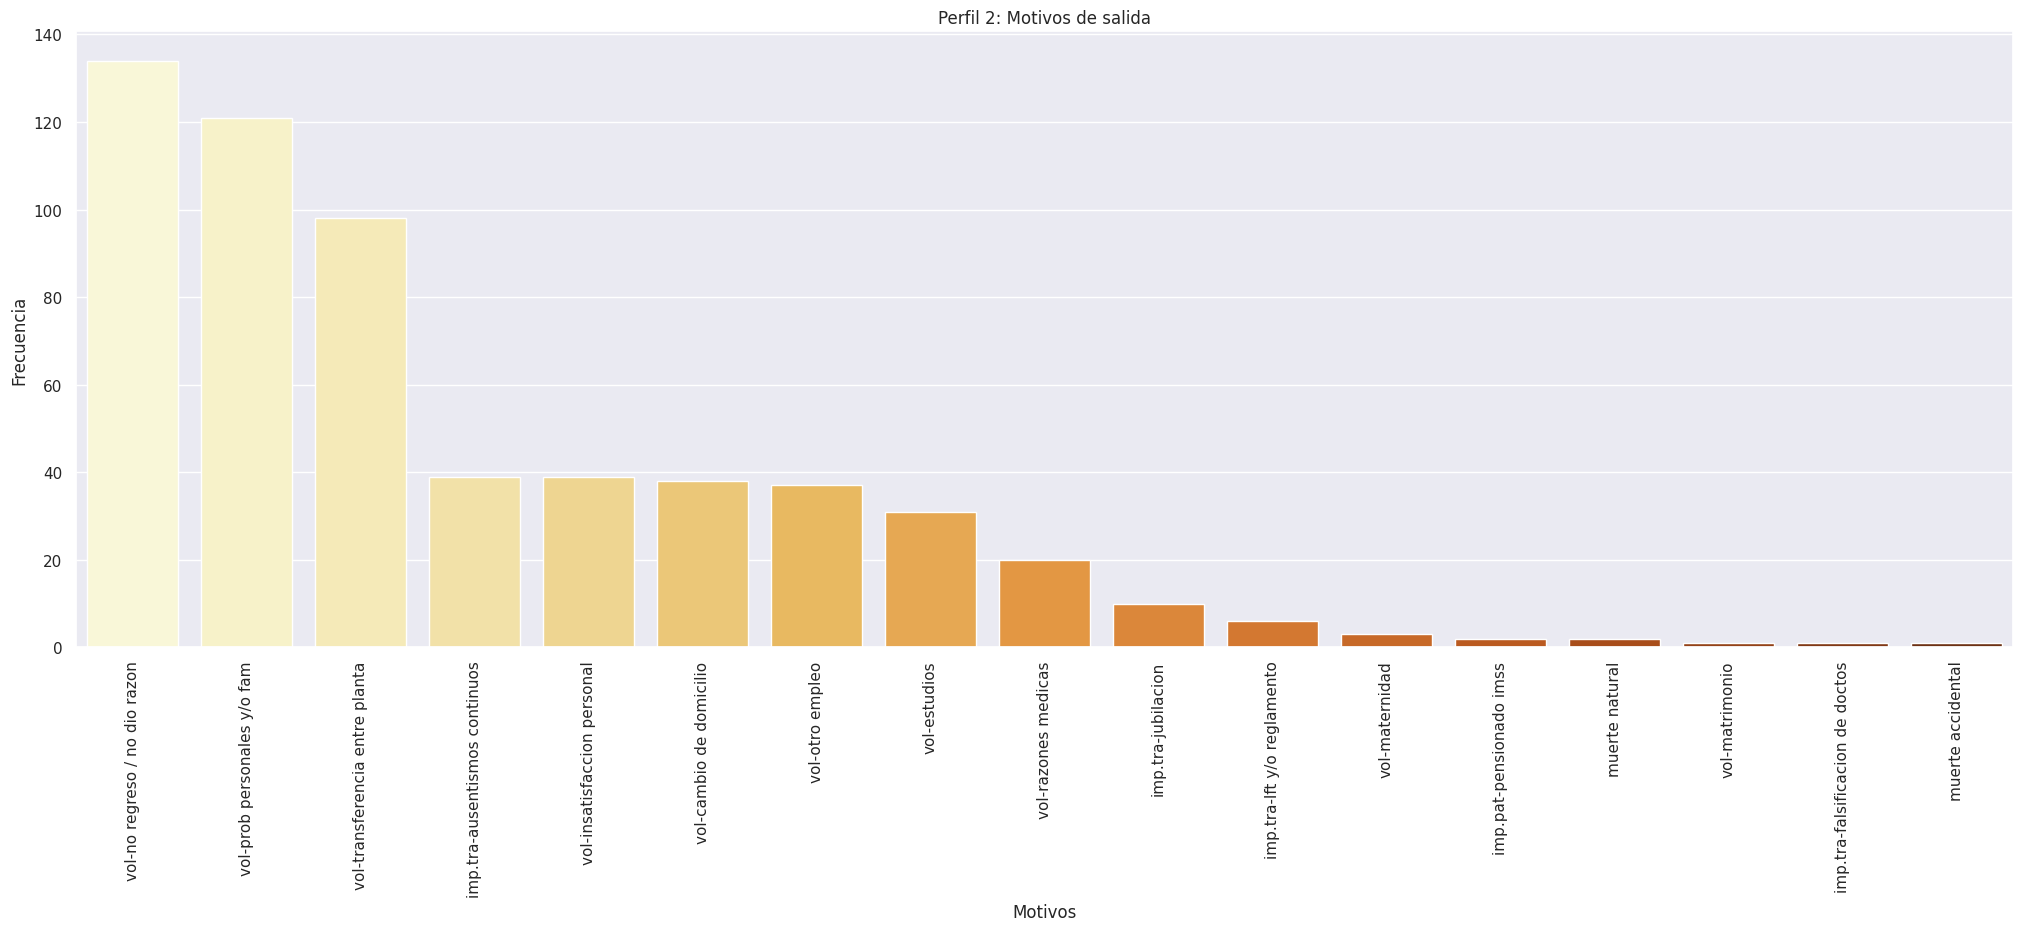

In [ ]:
conteo_motivo = cluster1['motivo_de_la_renuncia'].value_counts().sort_values(ascending=False)
sns.countplot(x='motivo_de_la_renuncia', data=cluster1, order=conteo_motivo.index, palette="YlOrBr")
plt.title('Perfil 2: Motivos de salida')
plt.xlabel('Motivos')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

plt.show()

Alrededor de **61%** de los motivos se enfocaron en 3 categorias de salida voluntaria: **No regreso, problemas personales y/o familiares y transferencia entre planta**.

# Analisis perfil de empleado 2

En este perfil se concentran el **42% de la totalidad de las incidencias**. En este grupo se encuentran personas del **genero Femenino** siendo asi el **83% de todo el genero femenino** en el set de datos, jovenes con edades de **18 a 27 años** (48% del grupo) y de **28 a 37** años (en un 28%).

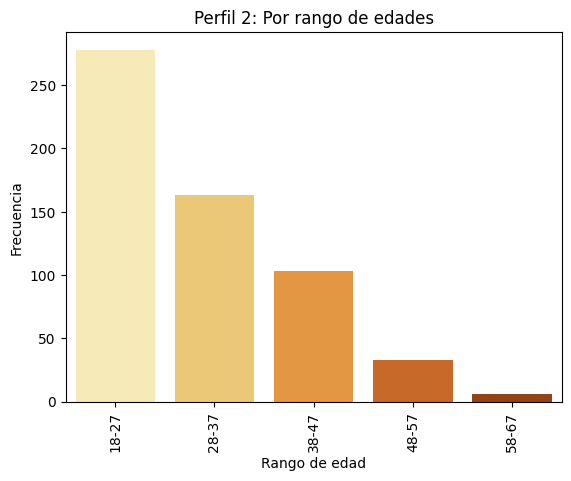

Laboralmente, pertenecen al grupo **S5** y es personal del tipo **Directo**. En cuestion de banda salarial, se concentra en el **tipo DO** casi en su totalidad (con un 99.6% del grupo). Además, del conjunto de datos total, este perfil corresponde a **66.3% del total DO** incidente en el set de datos. En las posiciones **POS1323 y POS538** se conjunta un **63% de los datos** de este grupo.

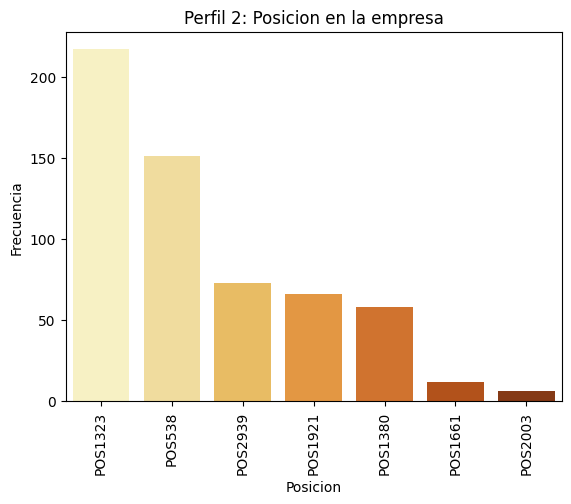

Además, el 54% de los datos se ubicaron en las areas: VS9-ABS y MFS

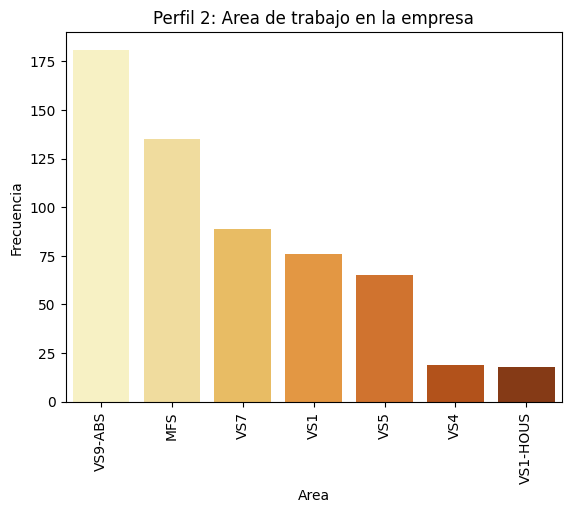

En lo correspondiente a los turnos de trabajo, **el 27%** se registro en el **turno JF010600**, mientras que el **22%** fue en el turno **JS011500** y **21% en JT031800**. En contraste el **JF050600** CASI **NO tiene presencia**

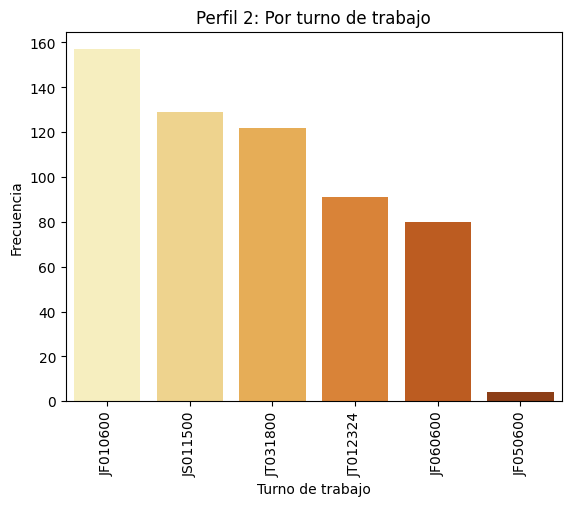


Las personas con una temporada de **0 a 3 año**s laborando se encuentran entre el mayor porcentaje, con un **70% de ocurrencia**

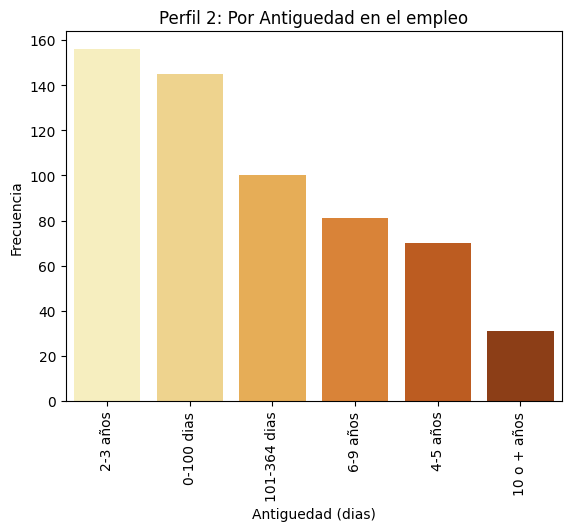

La gran mayoria, equivalente a un 50%, se encuentran habitando el codigo postal 32575.

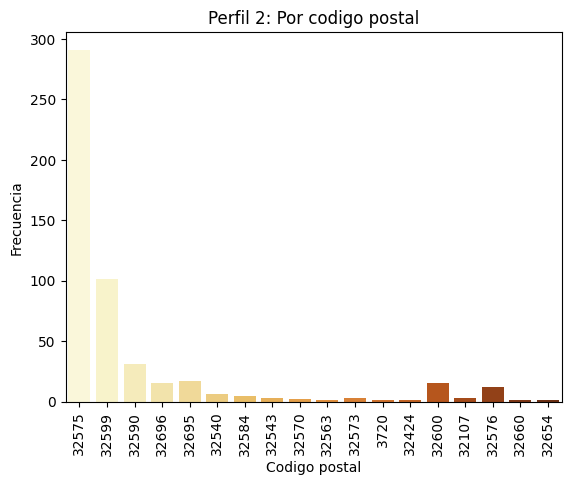



De forma general, alrededor de **50.4%** de las personas del grupo se encuentran en un estado de **soltero** y un **34% no tienen hijos**, mientras que un **58.1% tienen de 1 a 3 hijos**. De forma particular, en el **estado civil soltero se observa una prevalencia** mayoritaria de no tener hijos, situación **contraria a lo observado en las demas categorias**.

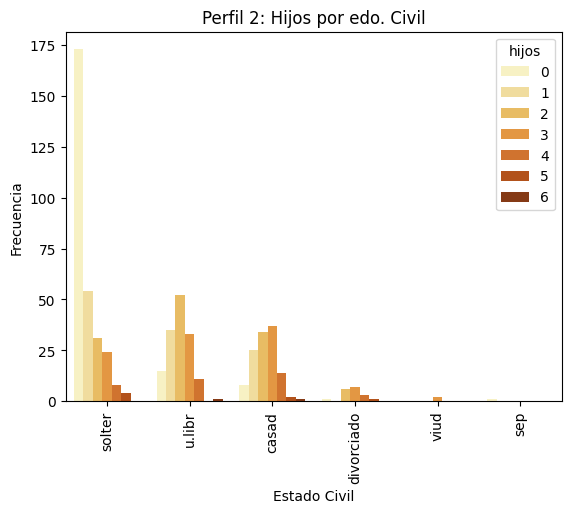

Finalmente, alrededor de 61% de los motivos de salida de planta se enfocaron en 3 categorias de salida **voluntaria**: **No regreso, problemas personales y/o familiares y transferencia entre planta.**

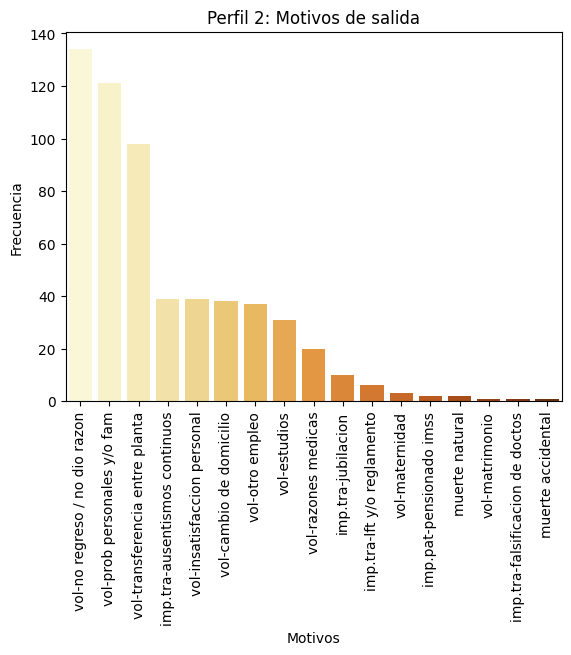


### Conclusiones:
1. **Perfil Demográfico Dominante**: Mujeres jóvenes (18-37 años) constituyen la mayoría en este cluster. Esto sugiere una tendencia de alta rotación entre las empleadas más jóvenes.
2. **Concentración en Ciertas Áreas y Posiciones**: Una gran proporción se encuentra en áreas específicas (VS9-ABS y MFS) y posiciones (POS1323 y POS538). Esto podría indicar problemas específicos en estas áreas o roles.
3. **Banda Salarial y Antigüedad**: La mayoría pertenece a la banda salarial DO y tiene una antigüedad de 0 a 3 años, lo que sugiere una posible correlación entre salario inicial y rotación.
4. **Aspectos Personales**: Muchas incidencias recaen en personas solteras y sin hijos o con 1 a 3 hijos, lo que podría influir en sus decisiones laborales.
5. **Motivos de Salida**: Las principales razones de salida voluntaria son problemas personales/familiares, transferencia entre plantas y no regreso.

### Recomendaciones:
1. **Estrategias de Retención Focalizadas**: Desarrollar programas de retención específicos para mujeres jóvenes, especialmente en las áreas y posiciones con mayor rotación.
2. **Mejoras en el Entorno Laboral**: Investigar las condiciones de trabajo en las áreas y posiciones críticas (VS9-ABS, MFS, POS1323, POS538) para identificar y abordar posibles factores de insatisfacción.
3. **Revisión de Políticas Salariales**: Analizar la estructura salarial, especialmente en la banda DO, para evaluar si los niveles de salario están influyendo en la rotación.
4. **Programas de Apoyo para Empleadas con Familia**: Ofrecer mayor apoyo a las empleadas con hijos, como flexibilidad horaria o facilidades de guardería, podría ayudar a reducir la rotación.
5. **Feedback y Salidas Entrevistas**: Implementar entrevistas de salida detalladas para entender mejor los motivos específicos de la salida de los empleados y obtener retroalimentación valiosa.
6. **Estrategias de Desarrollo de Carrera**: Ofrecer oportunidades de desarrollo y ascenso puede mejorar la retención, especialmente entre empleadas más jóvenes.
7. **Análisis de Turnos de Trabajo**: Investigar las diferencias entre los turnos de trabajo para entender por qué ciertos turnos tienen menos presencia y cómo esto afecta la satisfacción y retención del personal.



# Codigo perfil De Empleado 3

En este perfil de empleado se concentran un total de 361 empleados, 26% de los datos totales se encuentran categorizados en este segmento. el 43 % de los hombres totales se encuentran aqui.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('dataClusterizado.csv')

In [ ]:
df.sample(20)

Unnamed: 0 posicion     area a.liq. grupo_de_personal  codigo_postal  \
1379        1379  POS1376      MFS     S5            Direct          32575   
136          136   POS907      VS4     S6            Exempt          32350   
1122        1122  POS1323      VS7     S5            Direct          32599   
658          658   POS538      VS5     S5            Direct          32583   
839          839  POS1376      MFS     S5            Direct          32575   
666          666  POS1921      MFS     S5            Direct          32599   
1112        1112  POS1323      VS7     S5            Direct          32575   
447          447  POS2939      VS7     S5            Direct          27000   
630          630  POS2803      VS4     S5            Direct          32583   
796          796  POS1819      LOG     S5            Direct          32599   
119          119   POS347      LOG     S5            Direct          32575   
131          131  POS2939      VS5     S5            Direct          32600   
331          331  POS1323  VS9-ABS     S5            Direct          32575   
365          365   POS538  VS9-ABS     S5            Direct          32551   
500          500  POS1323  VS9-ABS     S5            Direct          32575   
661          661  POS1921      MFS     S5            Direct          32220   
1196        1196   POS581      LOG     S6            Exempt          32540   
276          276   POS538  VS9-ABS     S5            Direct          32590   
1020        1020  POS1323      VS7     S5            Direct          32575   
625          625  POS1323  VS9-ABS     S5            Direct          32575   

                motivo_de_la_renuncia banda        baja  reglapht        alta  \
1379      vol-prob personales y/o fam   DNO  2022-12-20  JF010600  2008-06-10   
136    vol-transferencia entre planta    E3  2023-02-28  ADMINIST  2014-01-12   
1122    imp.tra-ausentismos continuos    DO  2022-08-09  JF010600  2009-11-11   
658                      vol-estudios    DO  2022-01-02  JF060600  2020-11-19   
839                   vol-otro empleo   DNO  2022-03-05  JT012324  2015-01-21   
666     imp.tra-ausentismos continuos    DO  2022-08-02  JF010600  2019-03-01   
1112                     vol-estudios    DO  2022-06-09  JS011500  2020-05-03   
447   imp.tra-falsificacion de doctos    DO  2023-04-08  JS011500  2023-06-22   
630                imp.tra-jubilacion   DNO  2022-01-17  JS011500  2005-12-31   
796                   vol-otro empleo   DNO  2022-12-04  JS011500  2014-02-19   
119       vol-insatisfaccion personal   DNO  2023-02-21  JS011500  2021-03-25   
131     vol-no regreso / no dio razon    DO  2023-02-27  JS011500  2023-09-02   
331     vol-no regreso / no dio razon    DO  2023-06-06  JS011500  2022-08-12   
365     vol-no regreso / no dio razon    DO  2023-06-26  JT031800  2023-05-01   
500       vol-prob personales y/o fam    DO  2023-05-09  JF010600  2022-03-11   
661                    muerte natural    DO  2022-02-02  JT012324  1993-06-09   
1196           imp.tra-bajo desempeno    E3  2022-10-21  JF010600  2021-07-22   
276    vol-transferencia entre planta    DO  2023-05-16  JF060600  2022-12-29   
1020    vol-no regreso / no dio razon    DO  2022-07-18  JS011500  2020-05-03   
625     vol-no regreso / no dio razon    DO  2022-12-01  JF010600  2019-11-21   

      anos       meses  antiguedad clave_de_sexo lugar_de_nacimiento  \
1379    14  172.933333        5188      femenino            DELICIAS   
136      9  100.366667        3011     masculino              JUAREZ   
1122    13  156.133333        4684      femenino            ACAPULCO   
658      2   14.633333         439     masculino           CHIHUAHUA   
839      7   88.633333        2659     masculino              JUAREZ   
666      3   37.733333        1132     masculino    CIUDAD DE MEXICO   
1112     2   30.500000         915     masculino              JUAREZ   
447      0    1.433333          43      femenino           CHIHUAHUA   
630     17  195.3

In [ ]:
df_2 = df[df['cluster']==2]

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 1 to 1387
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             361 non-null    int64  
 1   posicion               361 non-null    object 
 2   area                   361 non-null    object 
 3   a.liq.                 361 non-null    object 
 4   grupo_de_personal      361 non-null    object 
 5   codigo_postal          361 non-null    int64  
 6   motivo_de_la_renuncia  361 non-null    object 
 7   banda                  361 non-null    object 
 8   baja                   361 non-null    object 
 9   reglapht               361 non-null    object 
 10  alta                   361 non-null    object 
 11  anos                   361 non-null    int64  
 12  meses                  361 non-null    float64
 13  antiguedad             361 non-null    int64  
 14  clave_de_sexo          361 non-null    object 
 15  lugar

In [ ]:
df_2.drop(['Unnamed: 0','cluster'],axis=1,inplace=True)

<ipython-input-561-8520dbb6c2a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop(['Unnamed: 0','cluster'],axis=1,inplace=True)


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 1 to 1387
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   posicion               361 non-null    object 
 1   area                   361 non-null    object 
 2   a.liq.                 361 non-null    object 
 3   grupo_de_personal      361 non-null    object 
 4   codigo_postal          361 non-null    int64  
 5   motivo_de_la_renuncia  361 non-null    object 
 6   banda                  361 non-null    object 
 7   baja                   361 non-null    object 
 8   reglapht               361 non-null    object 
 9   alta                   361 non-null    object 
 10  anos                   361 non-null    int64  
 11  meses                  361 non-null    float64
 12  antiguedad             361 non-null    int64  
 13  clave_de_sexo          361 non-null    object 
 14  lugar_de_nacimiento    361 non-null    object 
 15  edad_

In [ ]:
conteo_motivo_renuncia = df_2['motivo_de_la_renuncia'].value_counts().sort_values(ascending=False)


<Axes: xlabel='motivo_de_la_renuncia', ylabel='count'>

Text(0.5, 1.0, 'Conteo de Motivos de Renuncia')

Text(0.5, 0, 'Motivos')

Text(0, 0.5, 'Frecuencia')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'vol-otro empleo'),
  Text(1, 0, 'vol-transferencia entre planta'),
  Text(2, 0, 'vol-prob personales y/o fam'),
  Text(3, 0, 'vol-insatisfaccion personal'),
  Text(4, 0, 'vol-no regreso / no dio razon'),
  Text(5, 0, 'vol-cambio de domicilio'),
  Text(6, 0, 'imp.tra-jubilacion'),
  Text(7, 0, 'imp.tra-lft y/o reglamento'),
  Text(8, 0, 'vol-estudios'),
  Text(9, 0, 'imp.tra-ausentismos continuos'),
  Text(10, 0, 'vol-razones medicas'),
  Text(11, 0, 'imp.pat-pensionado imss'),
  Text(12, 0, 'muerte natural'),
  Text(13, 0, 'vol-problemas con transporte'),
  Text(14, 0, 'imp.tra-bajo desempeno'),
  Text(15, 0, 'imp.tra-falsificacion de doctos'),
  Text(16, 0, 'imp.pat-terminacion del contra')])

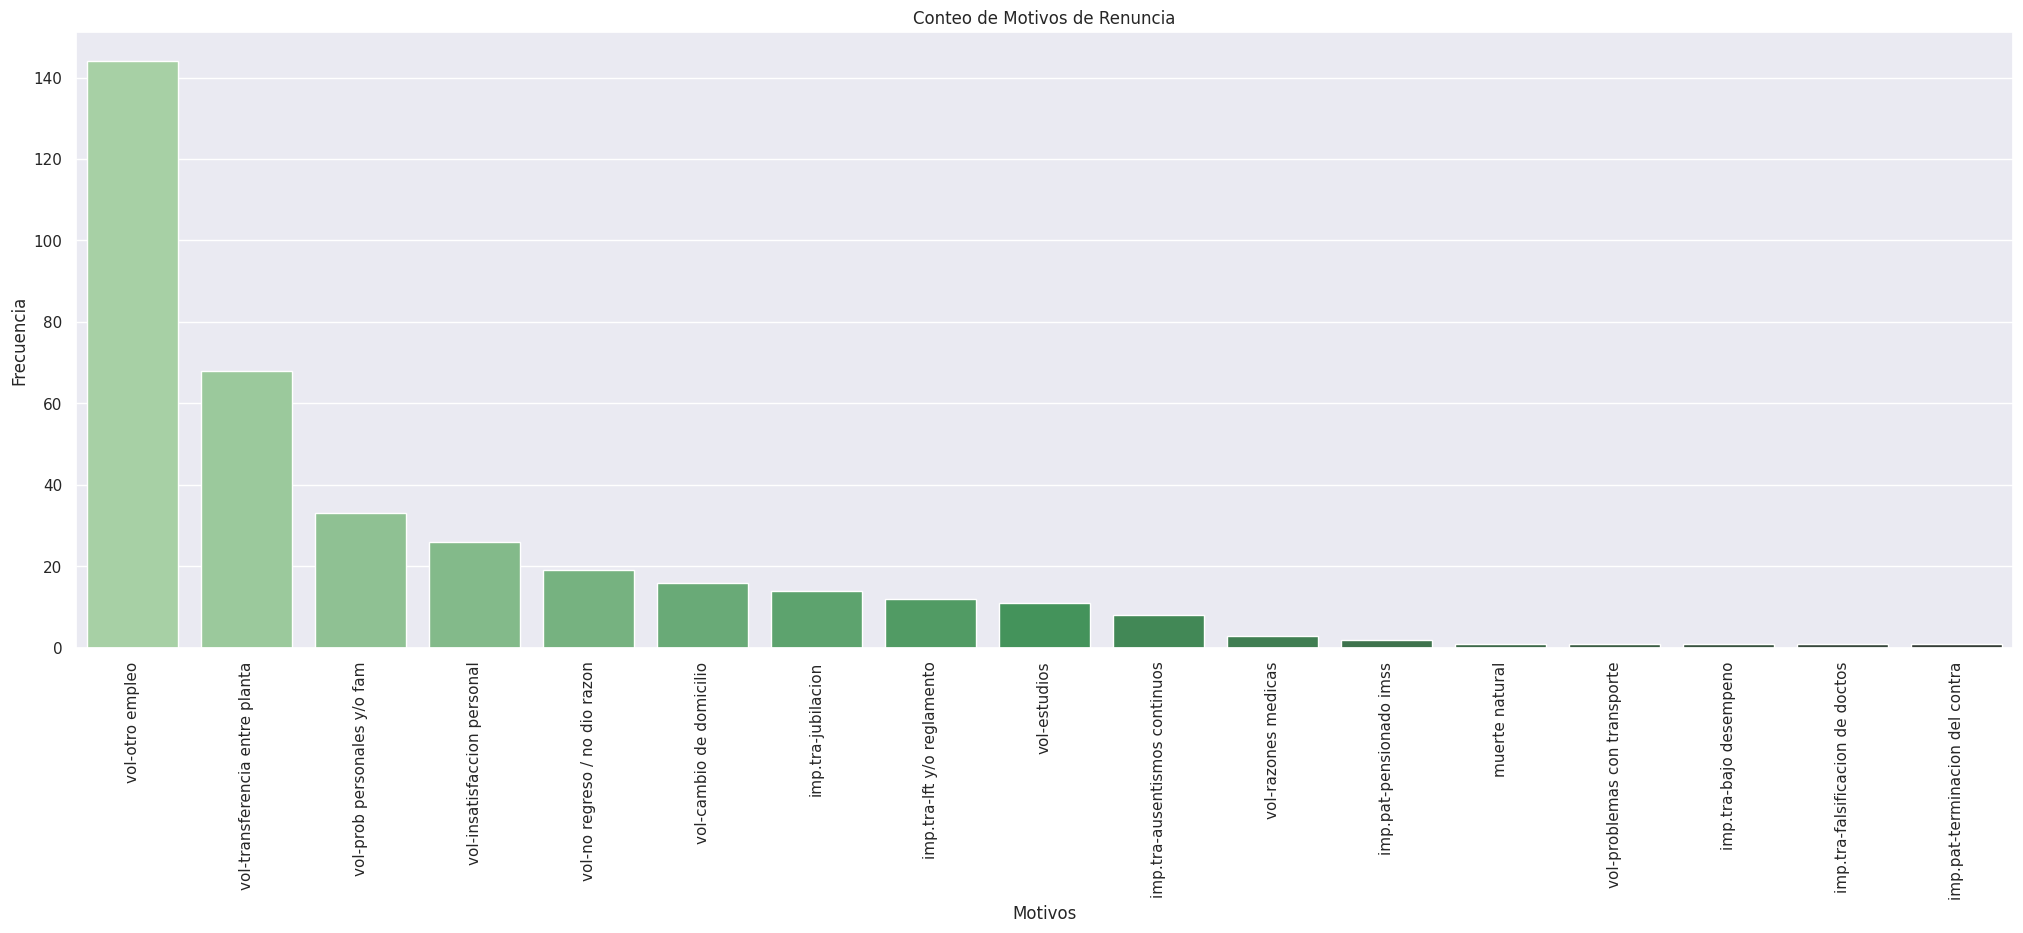

In [ ]:
sns.countplot(x='motivo_de_la_renuncia', data=df_2, order=conteo_motivo_renuncia.index,palette='Greens_d')
plt.title('Conteo de Motivos de Renuncia')
plt.xlabel('Motivos')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='motivo_de_la_renuncia'>

Text(0.5, 1.0, 'Distribucion por area')

Text(0.5, 0, 'Distribucion por area')

Text(0, 0.5, 'Frecuencia')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'vol-otro empleo'),
  Text(1, 0, 'vol-transferencia entre planta'),
  Text(2, 0, 'vol-prob personales y/o fam'),
  Text(3, 0, 'vol-insatisfaccion personal'),
  Text(4, 0, 'vol-no regreso / no dio razon'),
  Text(5, 0, 'vol-cambio de domicilio'),
  Text(6, 0, 'imp.tra-jubilacion'),
  Text(7, 0, 'imp.tra-lft y/o reglamento'),
  Text(8, 0, 'vol-estudios'),
  Text(9, 0, 'imp.tra-ausentismos continuos'),
  Text(10, 0, 'vol-razones medicas'),
  Text(11, 0, 'imp.pat-pensionado imss'),
  Text(12, 0, 'muerte natural'),
  Text(13, 0, 'vol-problemas con transporte'),
  Text(14, 0, 'imp.tra-bajo desempeno'),
  Text(15, 0, 'imp.tra-falsificacion de doctos'),
  Text(16, 0, 'imp.pat-terminacion del contra')])

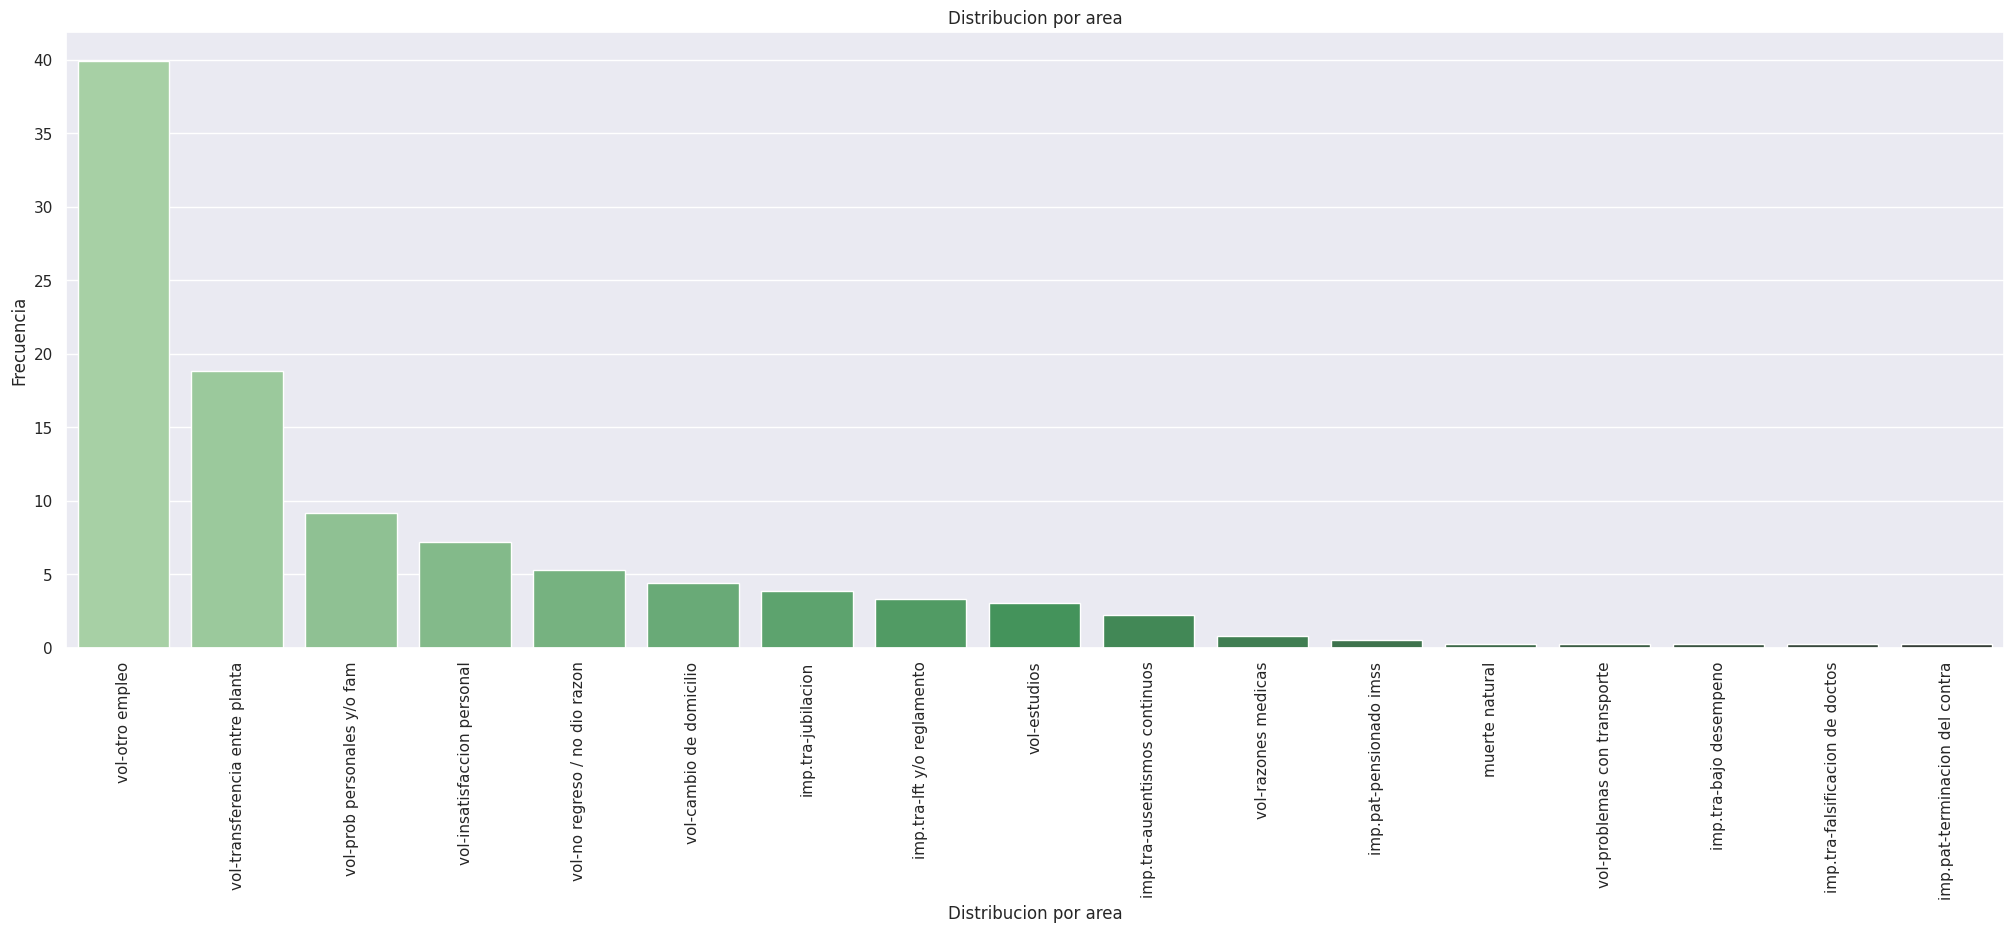

In [ ]:
porcentaje_motivo = conteo_motivo_renuncia / len(df_2) * 100
sns.barplot(x=porcentaje_motivo.index,y=porcentaje_motivo,palette='Greens_d')
plt.title('Distribucion por area')
plt.xlabel('Distribucion por area')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

In [ ]:
valores_con_mas_de_10 = conteo_motivo_renuncia[conteo_motivo_renuncia > 10].index.tolist()

In [ ]:
valores_con_mas_de_10

['vol-otro empleo',
 'vol-transferencia entre planta',
 'vol-prob personales y/o fam',
 'vol-insatisfaccion personal',
 'vol-no regreso / no dio razon',
 'vol-cambio de domicilio',
 'imp.tra-jubilacion',
 'imp.tra-lft y/o reglamento',
 'vol-estudios']

### Cuales fueron las bandas salariales de los principales motivos de renuncia?

In [ ]:
bandas_por_motivo_de_renuncia = df_2[df_2['motivo_de_la_renuncia'].isin(valores_con_mas_de_10)]['banda'].value_counts().sort_values(ascending=False)

<Axes: xlabel='banda', ylabel='count'>

Text(0.5, 1.0, 'Bandas salariales mas comunes de los principales motivos de renuncia')

Text(0.5, 0, 'Banda')

Text(0, 0.5, 'Frecuencia')

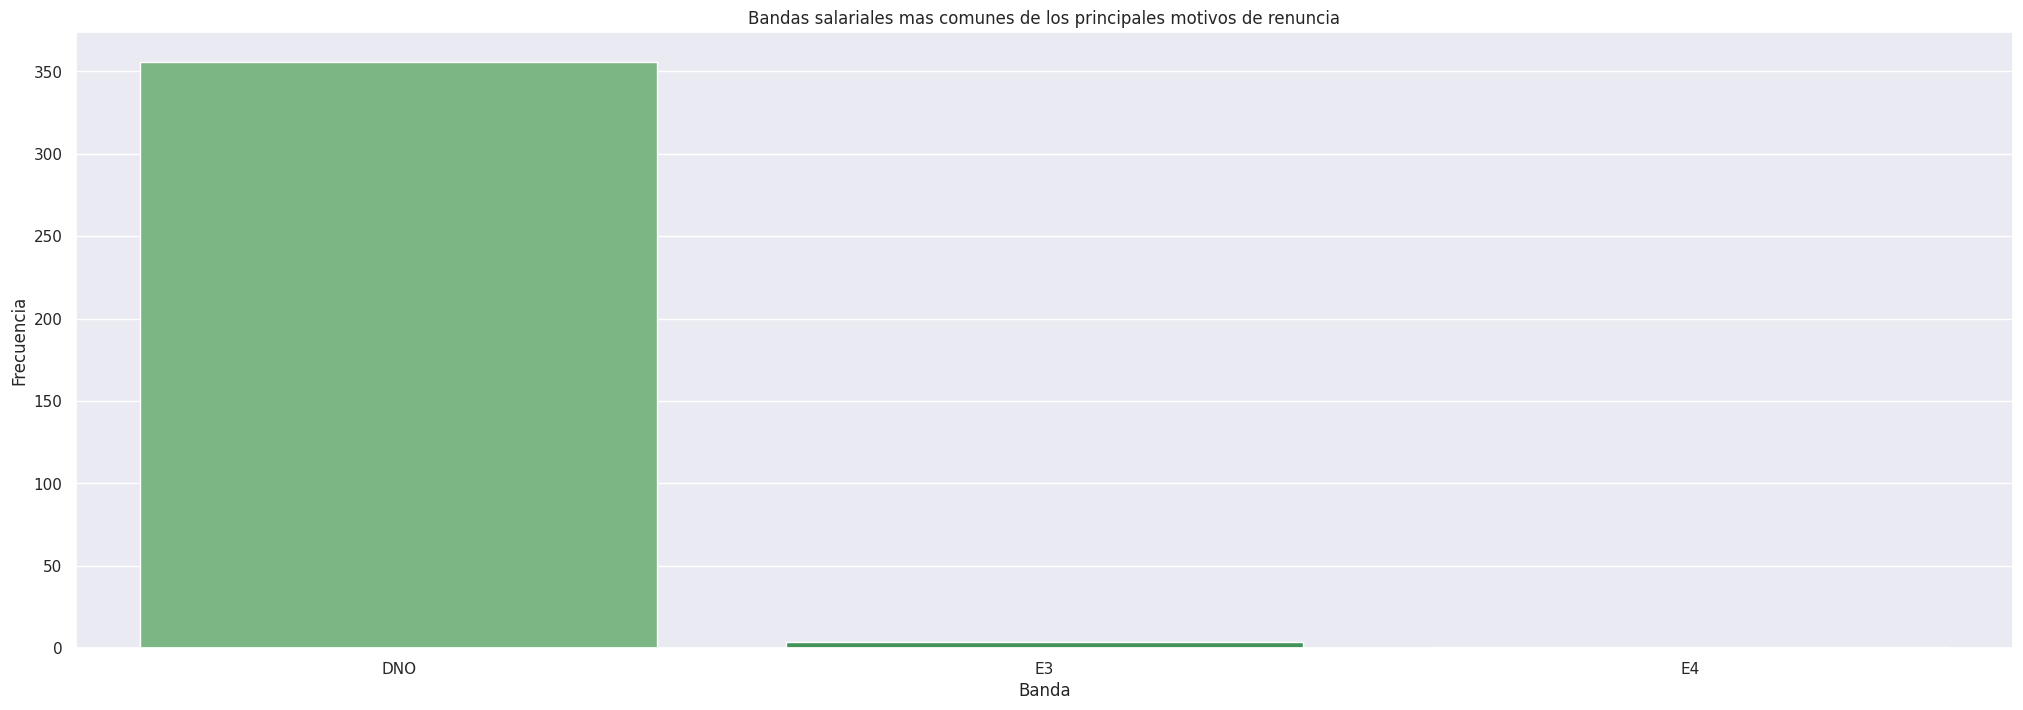

In [ ]:
sns.countplot(x='banda', data=df_2, order=bandas_por_motivo_de_renuncia.index,palette='Greens_d')
plt.title('Bandas salariales mas comunes de los principales motivos de renuncia')
plt.xlabel('Banda')
plt.ylabel('Frecuencia')
plt.show()

### Cuales son los coigos postales mas comunes de los principales motivos de renuncia?

In [ ]:
cp_por_motivo_de_renuncia_filtrado = df_2[df_2['motivo_de_la_renuncia'].isin(valores_con_mas_de_10)]['codigo_postal'].value_counts().sort_values(ascending=False)
top15_cp = cp_por_motivo_de_renuncia_filtrado.nlargest(16).sort_values()

<Axes: ylabel='codigo_postal'>

Text(0.5, 1.0, 'Codigos postales mas comunes de los principales motivos de renuncia')

Text(0.5, 0, 'Banda')

Text(0, 0.5, 'Frecuencia')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '32100'),
  Text(1, 0, '32500'),
  Text(2, 0, '32540'),
  Text(3, 0, '32573'),
  Text(4, 0, '32575'),
  Text(5, 0, '32576'),
  Text(6, 0, '32580'),
  Text(7, 0, '32583'),
  Text(8, 0, '32590'),
  Text(9, 0, '32594'),
  Text(10, 0, '32599'),
  Text(11, 0, '32600'),
  Text(12, 0, '32674'),
  Text(13, 0, '32695'),
  Text(14, 0, '32696'),
  Text(15, 0, '32699')])

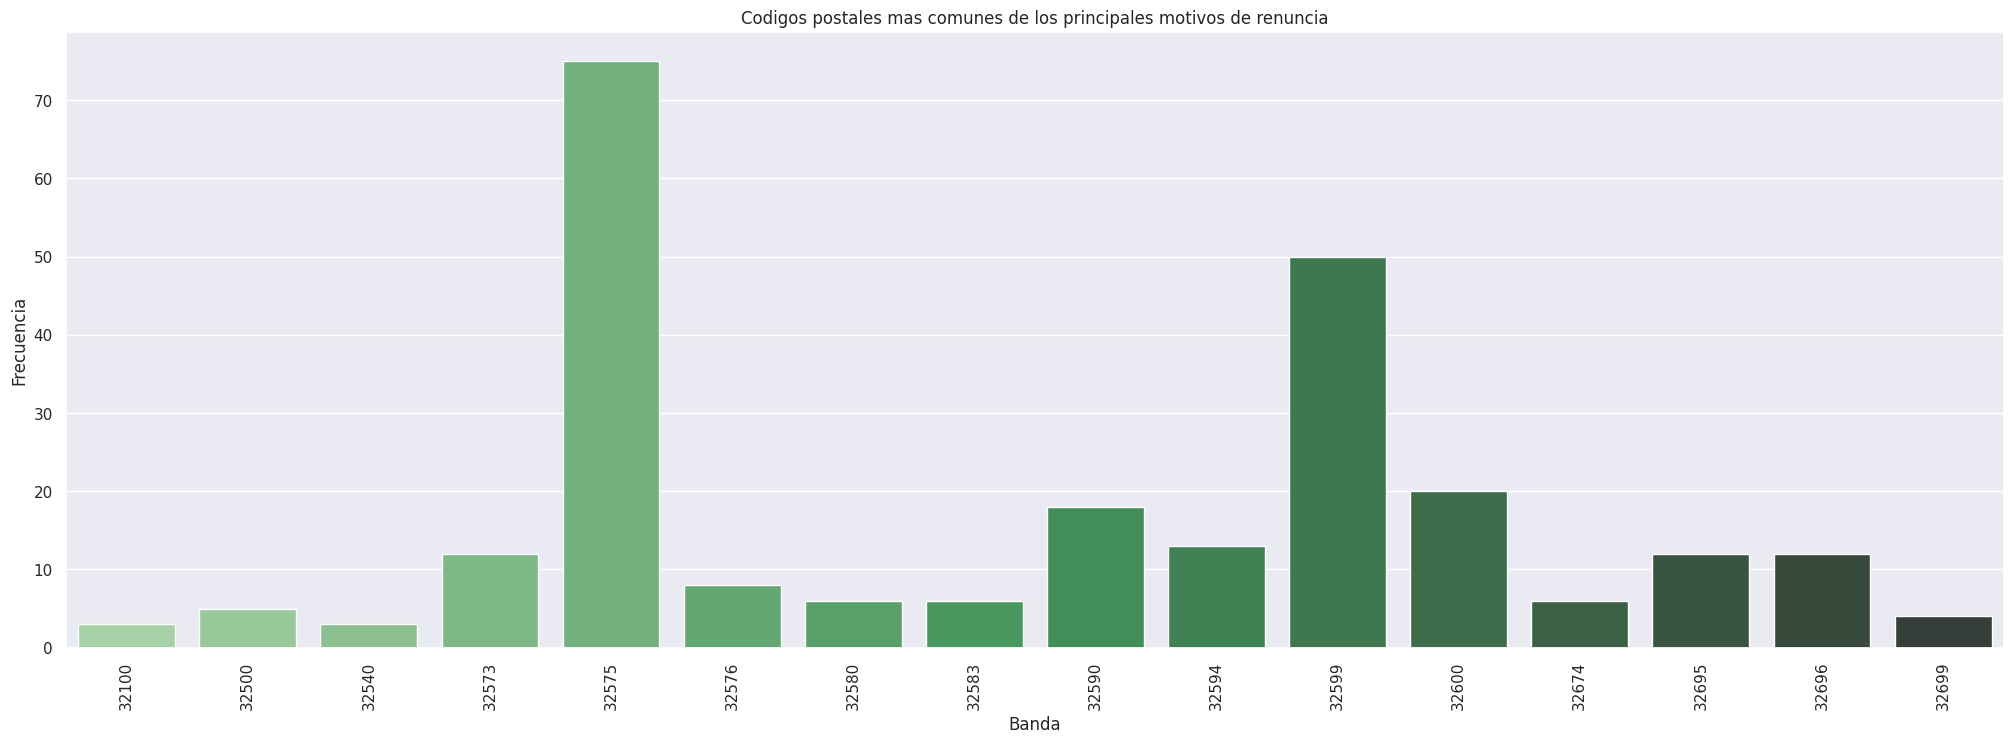

In [ ]:
sns.barplot(x=top15_cp.index,y=top15_cp,palette='Greens_d')
plt.title('Codigos postales mas comunes de los principales motivos de renuncia')
plt.xlabel('Banda')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

### Como se puede observar, existen 2 principales codigos postales con la mayor cantidad de motivos de renuncia

In [ ]:
conteo_combinaciones_motivo_cp = df_2.groupby(['motivo_de_la_renuncia', 'codigo_postal']).size().reset_index(name='conteo')
combinaciones_motivo_cp_filtrado = conteo_combinaciones_motivo_cp[conteo_combinaciones_motivo_cp.conteo > 3]
conteo_combinaciones_motivo_cp_filtrado = combinaciones_motivo_cp_filtrado.value_counts()

In [ ]:
conteo_combinaciones_motivo_cp

motivo_de_la_renuncia  codigo_postal  conteo
0           imp.pat-pensionado imss          32590       1
1           imp.pat-pensionado imss          32696       1
2    imp.pat-terminacion del contra          32100       1
3     imp.tra-ausentismos continuos          32573       1
4     imp.tra-ausentismos continuos          32575       6
..                              ...            ...     ...
162  vol-transferencia entre planta          32695       1
163  vol-transferencia entre planta          32696       3
164  vol-transferencia entre planta          32697       1
165  vol-transferencia entre planta          32699       1
166  vol-transferencia entre planta          32720       1

[167 rows x 3 columns]

<Axes: xlabel='codigo_postal', ylabel='conteo'>

Text(0.5, 1.0, 'Codigos postales mas comunes de los principales motivos de renuncia')

Text(0.5, 0, 'Banda')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '32573'),
  Text(1, 0, '32575'),
  Text(2, 0, '32580'),
  Text(3, 0, '32583'),
  Text(4, 0, '32590'),
  Text(5, 0, '32594'),
  Text(6, 0, '32599'),
  Text(7, 0, '32600'),
  Text(8, 0, '32695')])

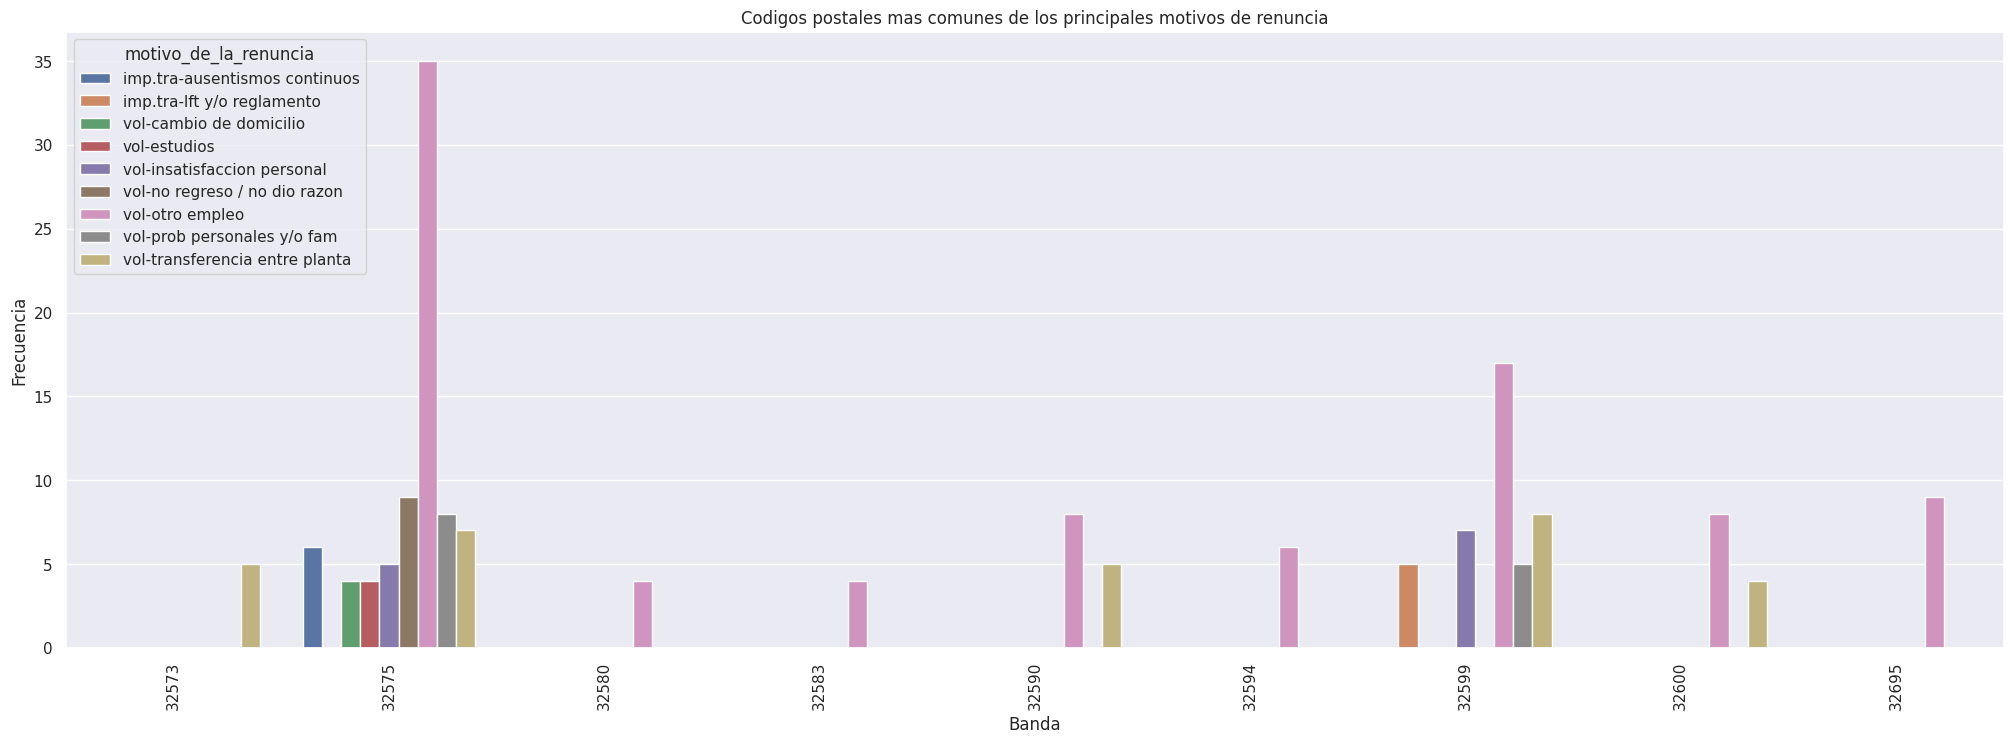

In [ ]:
sns.barplot(x='codigo_postal',y='conteo', data=combinaciones_motivo_cp_filtrado,hue='motivo_de_la_renuncia')
plt.title('Codigos postales mas comunes de los principales motivos de renuncia')
plt.xlabel('Banda')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

### Distribucion por sexo

In [ ]:
distribucion_sexo = df_2.clave_de_sexo.value_counts()

In [ ]:
distribucion_sexo

masculino    294
femenino      67
Name: clave_de_sexo, dtype: int64

<Axes: ylabel='clave_de_sexo'>

Text(0.5, 1.0, 'Distribucion de Sexo')

Text(0.5, 0, 'Sexo')

Text(0, 0.5, 'Frecuencia')

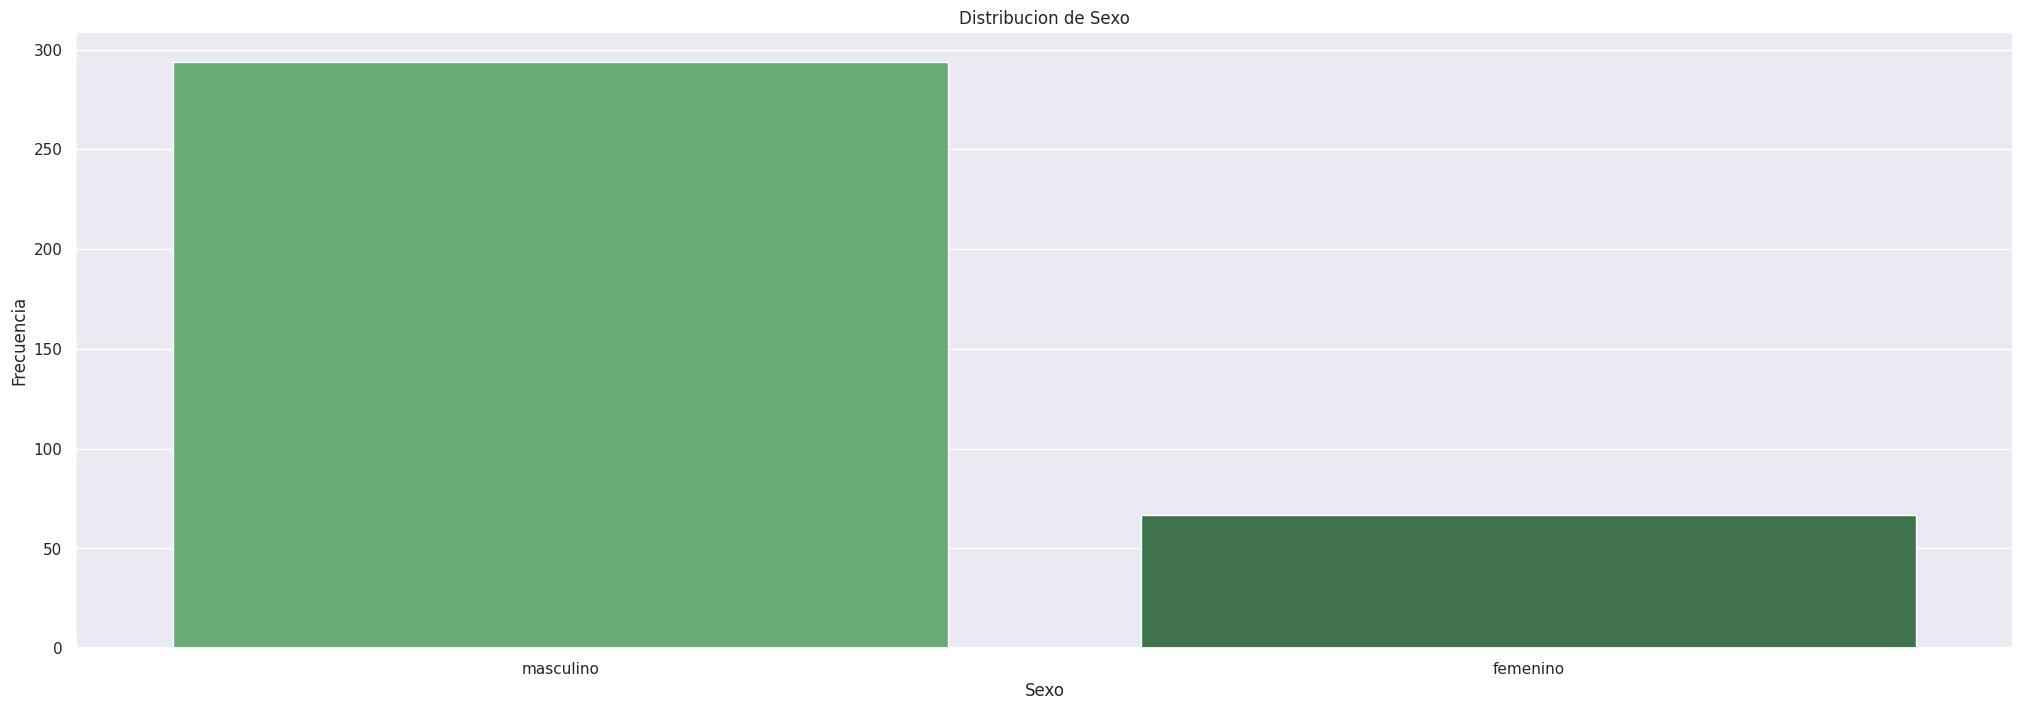

In [ ]:
sns.barplot(x=distribucion_sexo.index,y=distribucion_sexo,palette='Greens_d')
plt.title('Distribucion de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()

### Distribucion por grupo de personal

In [ ]:
distribucion_gpo_de_personal = df_2.grupo_de_personal.value_counts()

<Axes: ylabel='grupo_de_personal'>

Text(0.5, 1.0, 'Distribucion de Grupo de personal')

Text(0.5, 0, 'Grupo de personal')

Text(0, 0.5, 'Frecuencia')

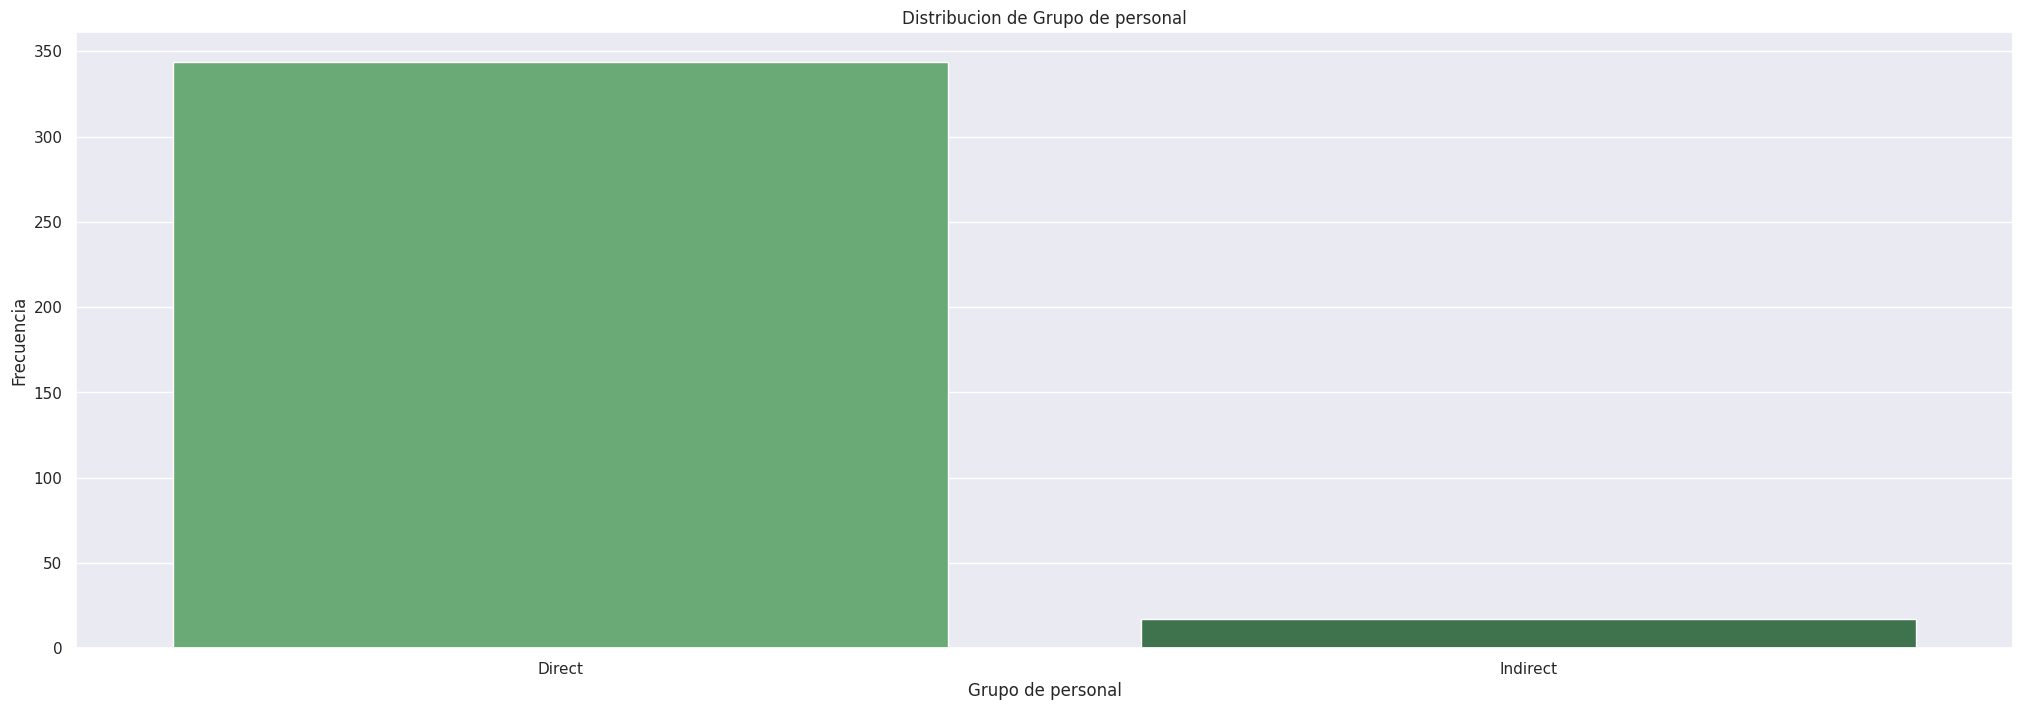

In [ ]:
sns.barplot(x=distribucion_gpo_de_personal.index,y=distribucion_gpo_de_personal,palette='Greens_d')
plt.title('Distribucion de Grupo de personal')
plt.xlabel('Grupo de personal')
plt.ylabel('Frecuencia')
plt.show()

### Distribucion por a.liq.

In [ ]:
distribucion_aliq = df_2['a.liq.'].value_counts()

<Axes: ylabel='a.liq.'>

Text(0.5, 1.0, 'Distribucion de a.liq.')

Text(0.5, 0, 'a.liq.')

Text(0, 0.5, 'Frecuencia')

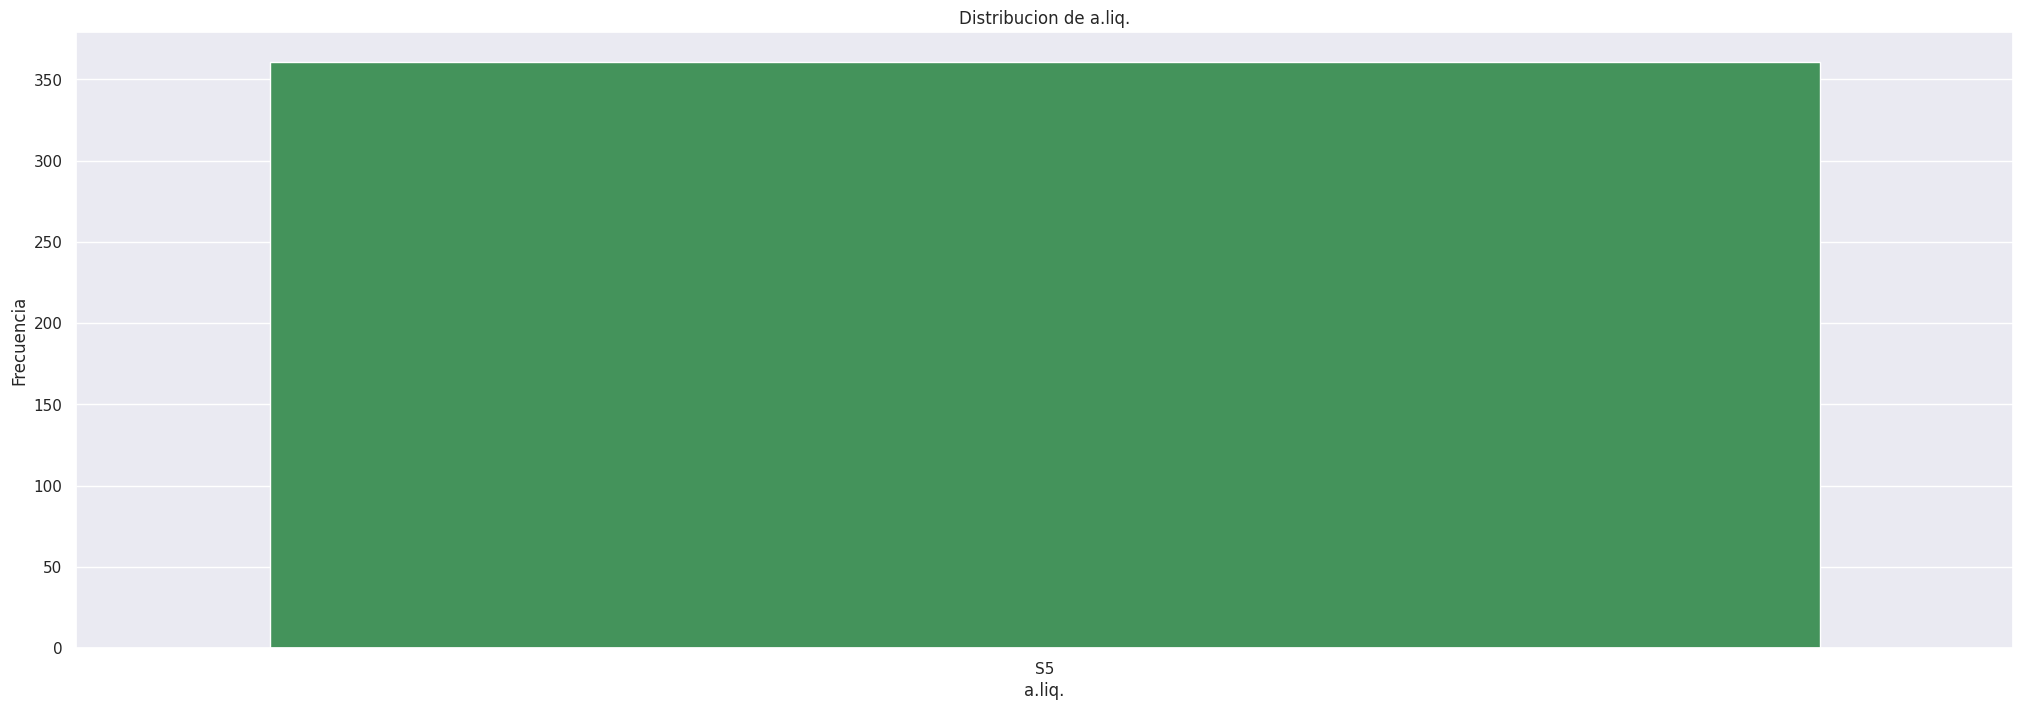

In [ ]:
sns.barplot(x=distribucion_aliq.index,y=distribucion_aliq,palette='Greens_d')
plt.title('Distribucion de a.liq.')
plt.xlabel('a.liq.')
plt.ylabel('Frecuencia')
plt.show()

### Distribucion por reglapht

In [ ]:
distribucion_reglapht = df_2['reglapht'].value_counts()

<Axes: ylabel='reglapht'>

Text(0.5, 1.0, 'Porcentaje de Distribución de reglapht')

Text(0.5, 0, 'reglapht')

Text(0, 0.5, 'Porcentaje')

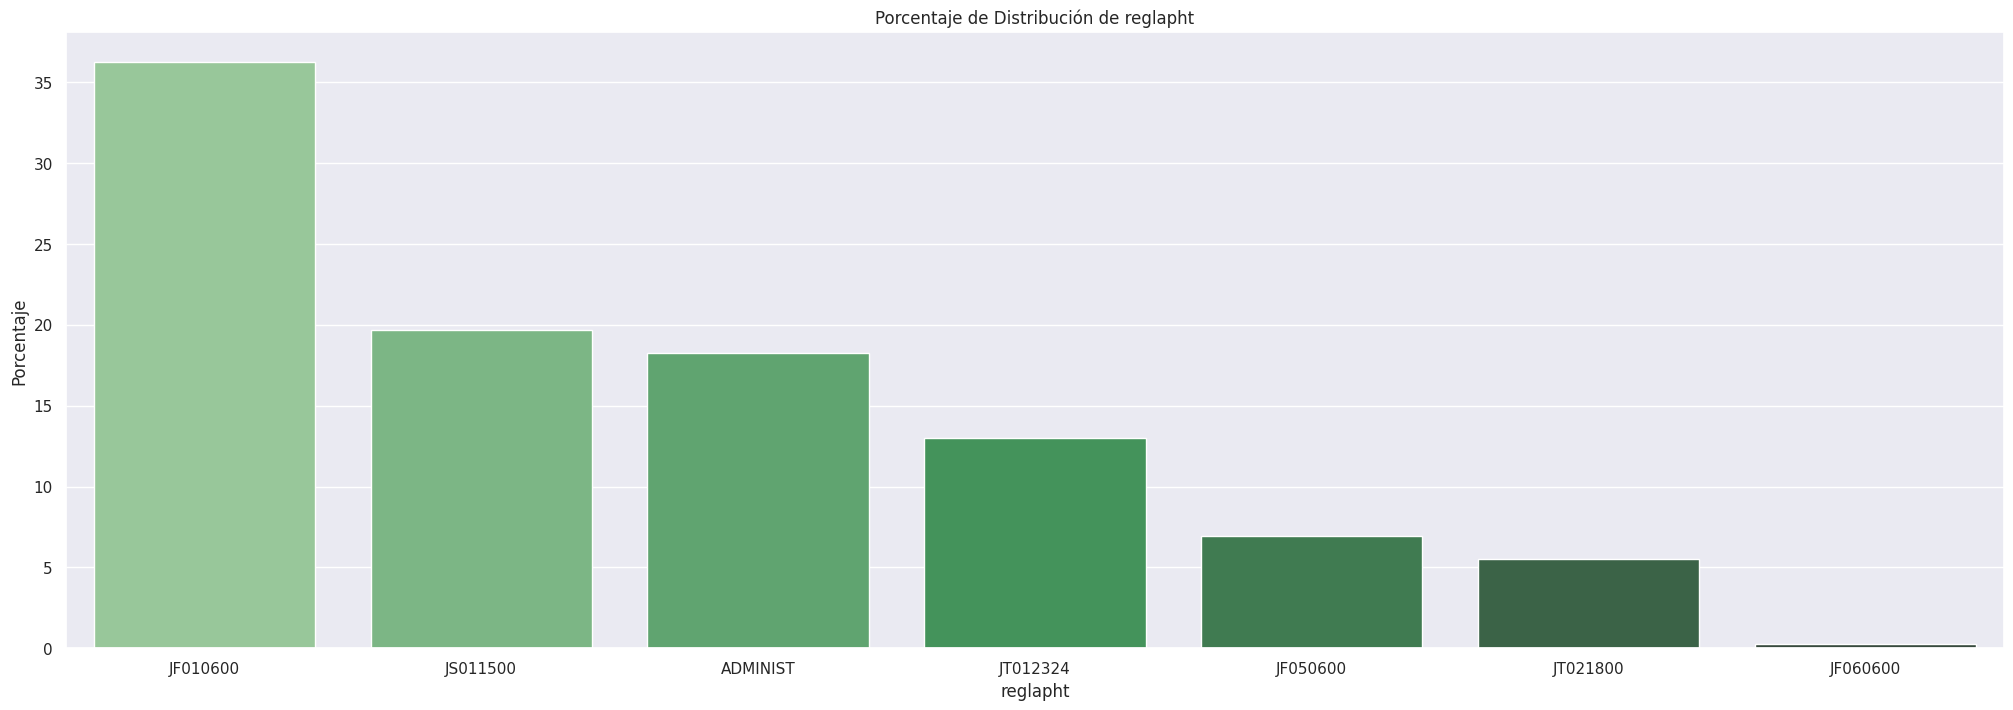

In [ ]:
porcentaje_reglapht = distribucion_reglapht / len(df_2) * 100
# Crear un gráfico de barras del porcentaje
sns.barplot(x=porcentaje_reglapht.index, y=porcentaje_reglapht,palette='Greens_d')
plt.title('Porcentaje de Distribución de reglapht')
plt.xlabel('reglapht')
plt.ylabel('Porcentaje')
plt.show()

### Distribucion por posicion

In [ ]:
distribucion_posicion = df_2['posicion'].value_counts()

<Axes: ylabel='posicion'>

Text(0.5, 1.0, 'Porcentaje de Distribución de reglapht')

Text(0.5, 0, 'reglapht')

Text(0, 0.5, 'Porcentaje')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'POS1230'),
  Text(1, 0, 'POS347'),
  Text(2, 0, 'POS1559'),
  Text(3, 0, 'POS1376'),
  Text(4, 0, 'POS2803'),
  Text(5, 0, 'POS1748'),
  Text(6, 0, 'POS750'),
  Text(7, 0, 'POS2456'),
  Text(8, 0, 'POS2802'),
  Text(9, 0, 'POS2094'),
  Text(10, 0, 'POS2718'),
  Text(11, 0, 'POS1111'),
  Text(12, 0, 'POS1745'),
  Text(13, 0, 'POS2003'),
  Text(14, 0, 'POS2915'),
  Text(15, 0, 'POS2553'),
  Text(16, 0, 'POS2384'),
  Text(17, 0, 'POS2698'),
  Text(18, 0, 'POS2756'),
  Text(19, 0, 'POS454'),
  Text(20, 0, 'POS1410'),
  Text(21, 0, 'POS1365'),
  Text(22, 0, 'POS2224'),
  Text(23, 0, 'POS2988'),
  Text(24, 0, 'POS1819'),
  Text(25, 0, 'POS1373'),
  Text(26, 0, 'POS1702'),
  Text(27, 0, 'POS581'),
  Text(28, 0, 'POS1845'),
  Text(29, 0, 'POS1657'),
  Text(30, 0, 'POS2622'),
  Text(31, 0, 'POS1448'),
  Text(3

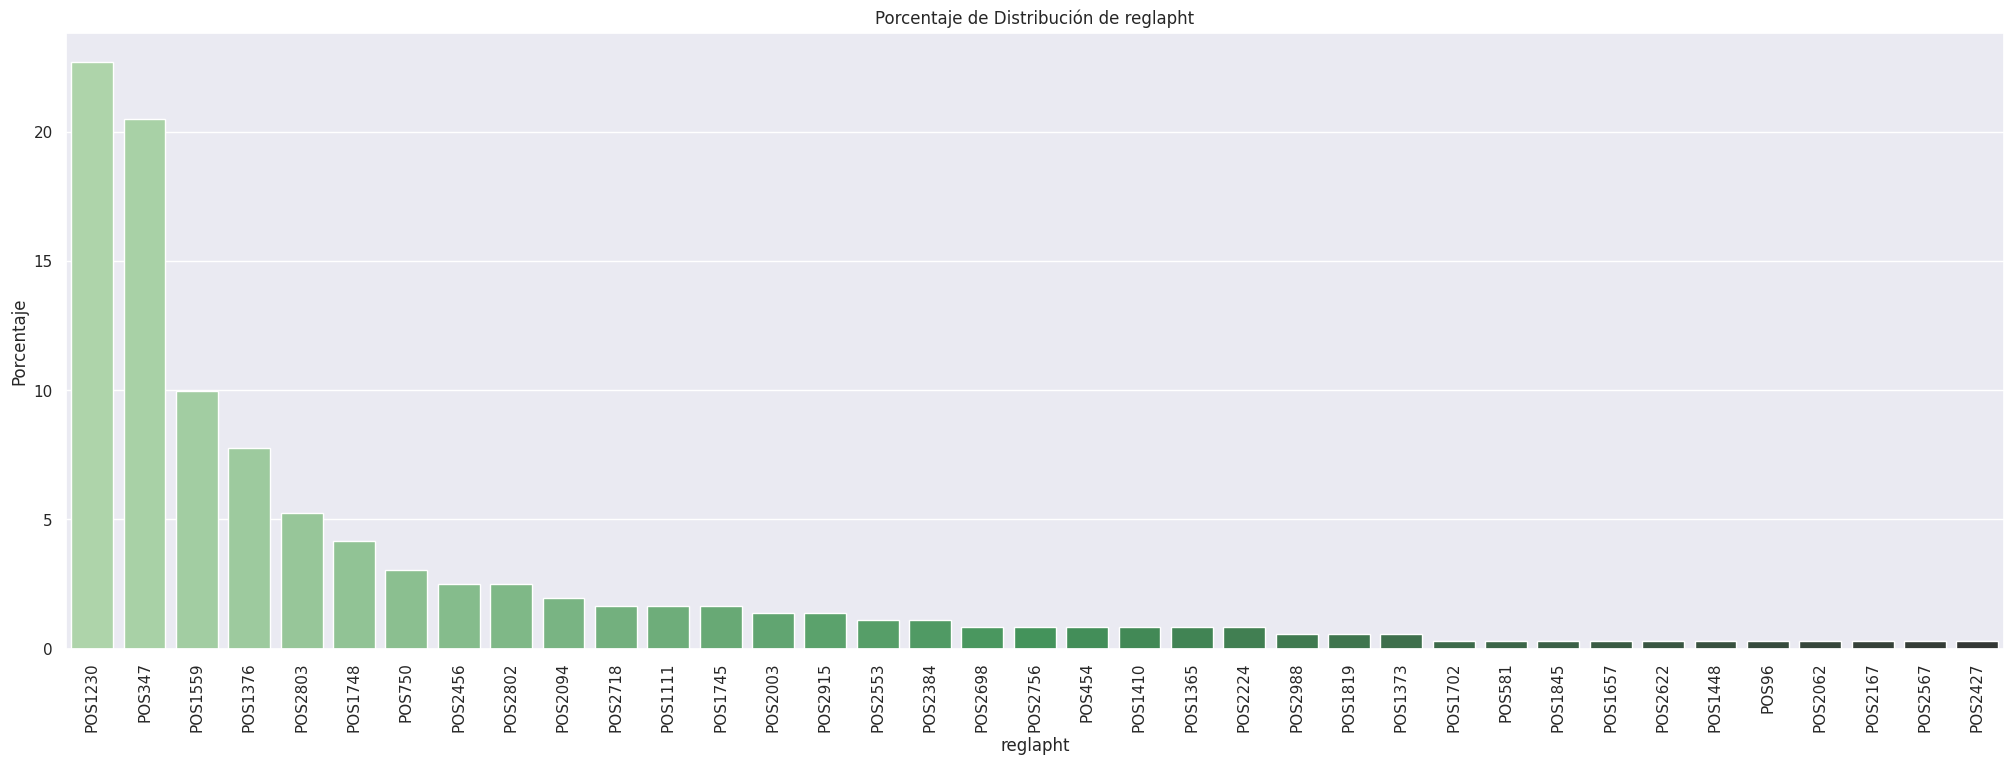

In [ ]:
porcentaje_posicion = distribucion_posicion / len(df_2) * 100
# Crear un gráfico de barras del porcentaje
sns.barplot(x=porcentaje_posicion.index, y=porcentaje_posicion,palette='Greens_d')
plt.title('Porcentaje de Distribución de reglapht')
plt.xlabel('reglapht')
plt.ylabel('Porcentaje')
plt.xticks(rotation=90)
plt.show()

### Relacion de bajas por mes del anio

In [ ]:
df_2["mes"] = df_2["baja"].str.split("-").str[1]
meses_con_bajas = df_2["mes"].value_counts()
meses_con_bajas.index = meses_con_bajas.index.map({
    '01':'Enero',
    '02':'Febrero',
    '03':'Marzo',
    '04':'Abril',
    '05':'Mayo',
    '06':'Junio',
    '07':'Julio',
    '08':'Agosto',
    '09':'Septiembre',
    '10':'Octubre',
    '11':'Noviembre',
    '12':'Diciembre'})

<ipython-input-586-2a93b6af3913>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["mes"] = df_2["baja"].str.split("-").str[1]


<Axes: ylabel='mes'>

Text(0.5, 1.0, 'Relacion de bajas por mes del anio')

Text(0.5, 0, 'Mes')

Text(0, 0.5, 'Porcentaje')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Marzo'),
  Text(1, 0, 'Septiembre'),
  Text(2, 0, 'Mayo'),
  Text(3, 0, 'Julio'),
  Text(4, 0, 'Octubre'),
  Text(5, 0, 'Junio'),
  Text(6, 0, 'Febrero'),
  Text(7, 0, 'Diciembre'),
  Text(8, 0, 'Agosto'),
  Text(9, 0, 'Abril'),
  Text(10, 0, 'Noviembre'),
  Text(11, 0, 'Enero')])

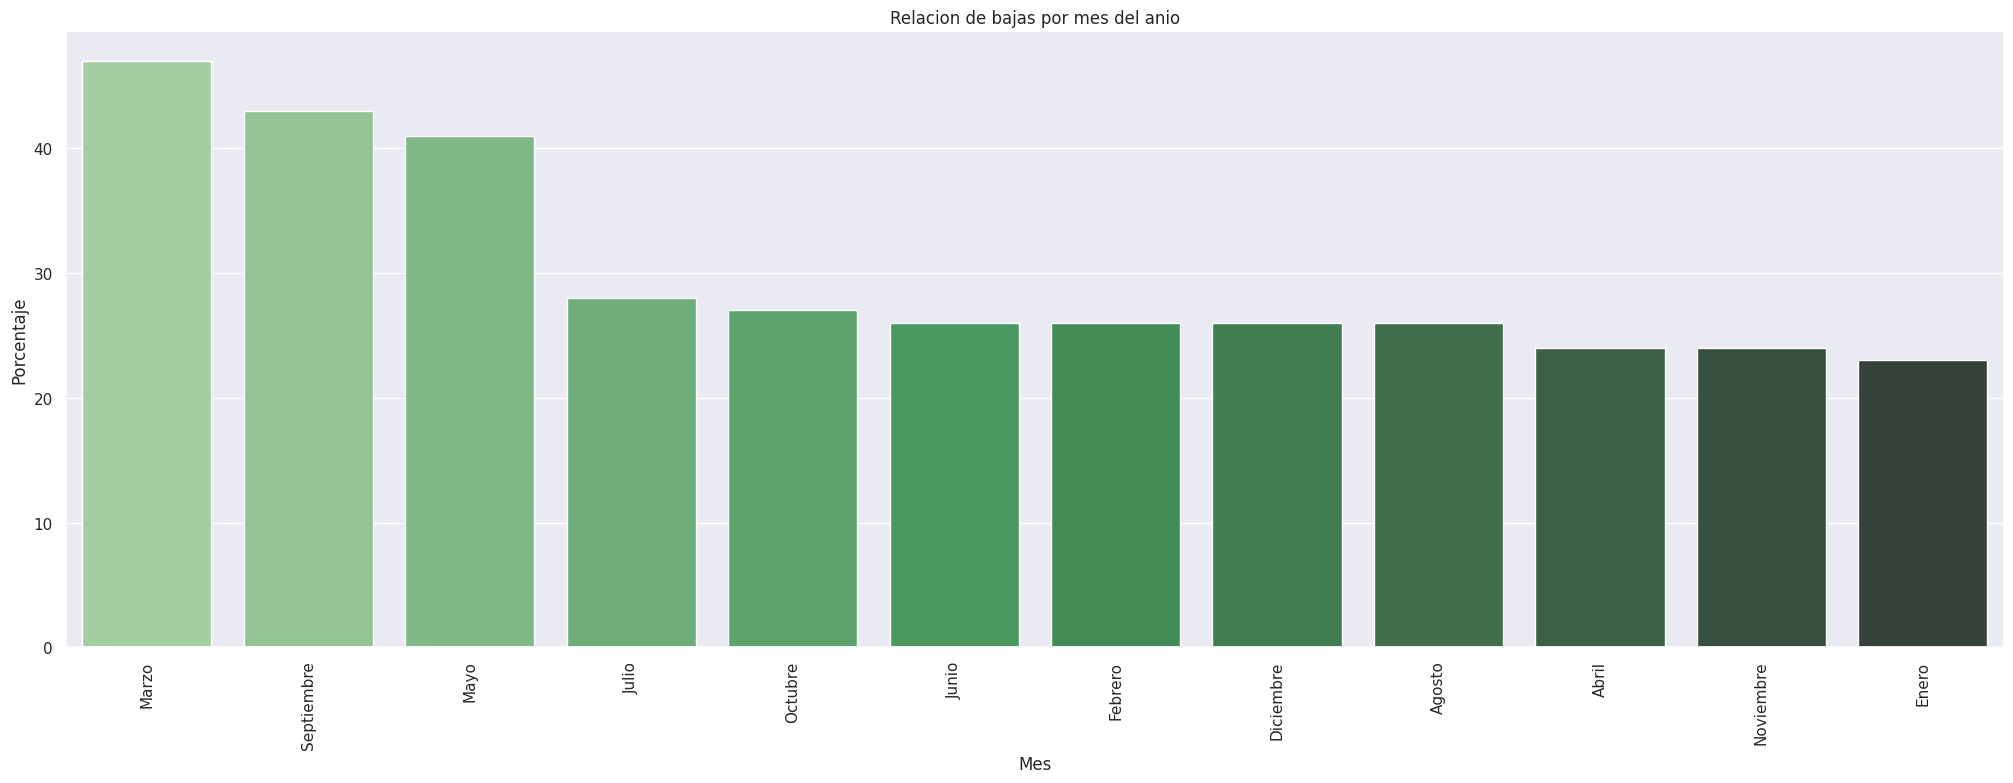

In [ ]:
sns.barplot(x=meses_con_bajas.index, y=meses_con_bajas,palette='Greens_d')
plt.title('Relacion de bajas por mes del anio')
plt.xlabel('Mes')
plt.ylabel('Porcentaje')
plt.xticks(rotation=90)
plt.show()

### Distribucion de estado civil

In [ ]:
distribucion_estado_civil = df_2['estado_civil'].value_counts()

<Axes: ylabel='estado_civil'>

Text(0.5, 1.0, 'Distribucion de estado civil')

Text(0.5, 0, 'Distribucion de estado civil')

Text(0, 0.5, 'Frecuencia')

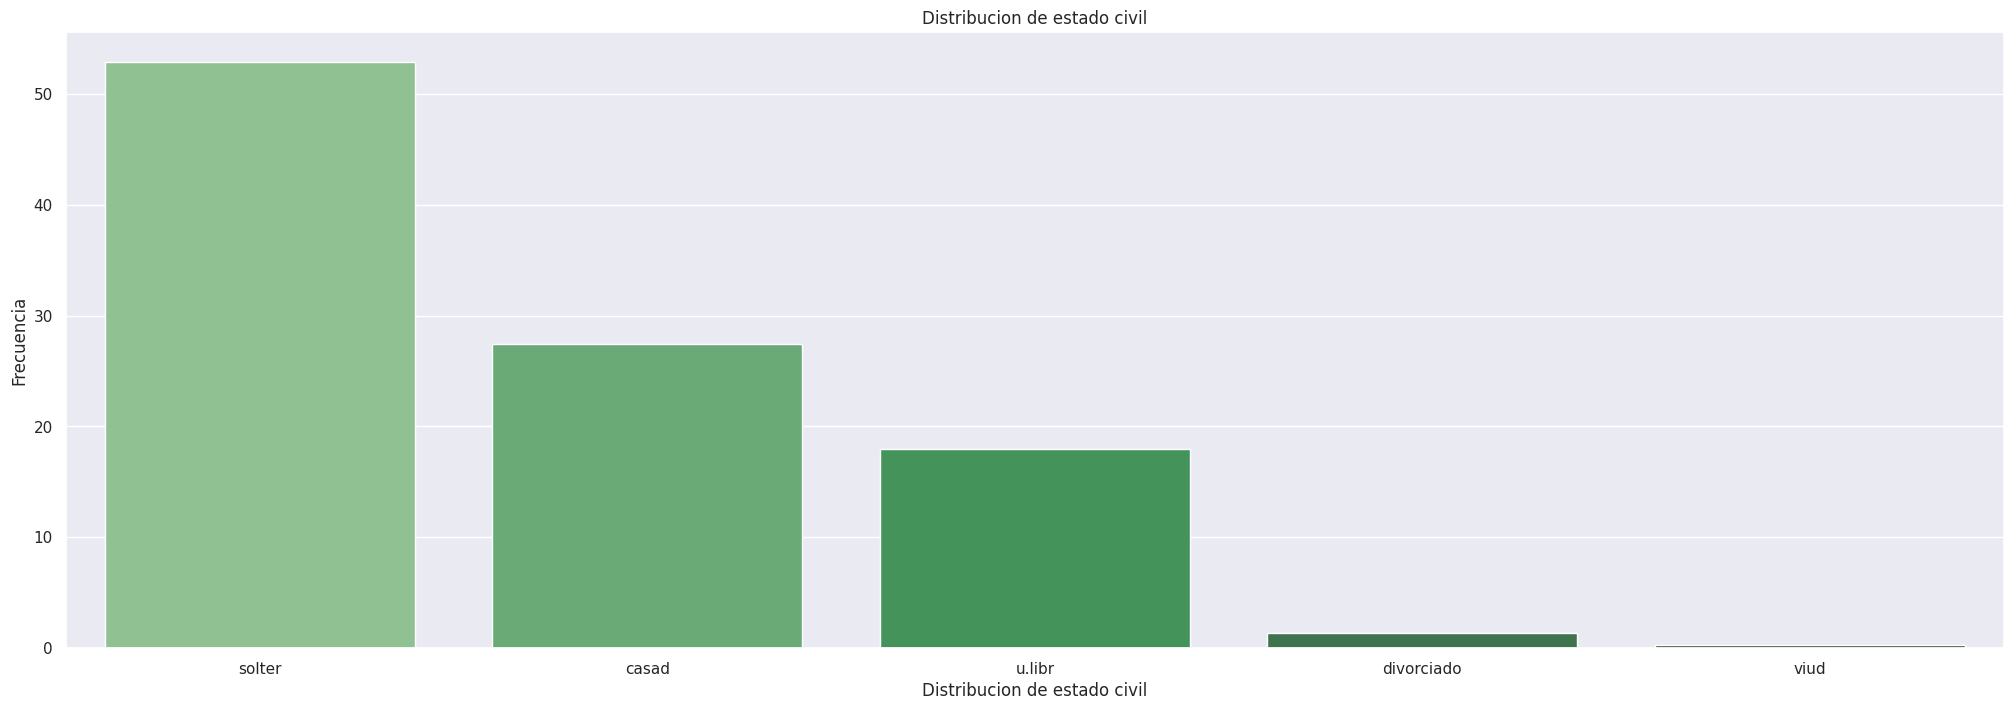

In [ ]:
porcentaje_estado_civil = distribucion_estado_civil / len(df_2) * 100
sns.barplot(x=porcentaje_estado_civil.index,y=porcentaje_estado_civil,palette='Greens_d')
plt.title('Distribucion de estado civil')
plt.xlabel('Distribucion de estado civil')
plt.ylabel('Frecuencia')
plt.show()

### Distribucion por Area

In [ ]:
distribucion_area = df_2['area'].value_counts()

<Axes: ylabel='area'>

Text(0.5, 1.0, 'Distribucion por area')

Text(0.5, 0, 'Distribucion por area')

Text(0, 0.5, 'Frecuencia')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'LOG'),
  Text(1, 0, 'MFS'),
  Text(2, 0, 'TEF'),
  Text(3, 0, 'VS7'),
  Text(4, 0, 'VS4'),
  Text(5, 0, 'VS5'),
  Text(6, 0, 'VS9-ABS'),
  Text(7, 0, 'VS1'),
  Text(8, 0, 'QMM'),
  Text(9, 0, 'VS1-HOUS'),
  Text(10, 0, 'DBE'),
  Text(11, 0, 'CTG')])

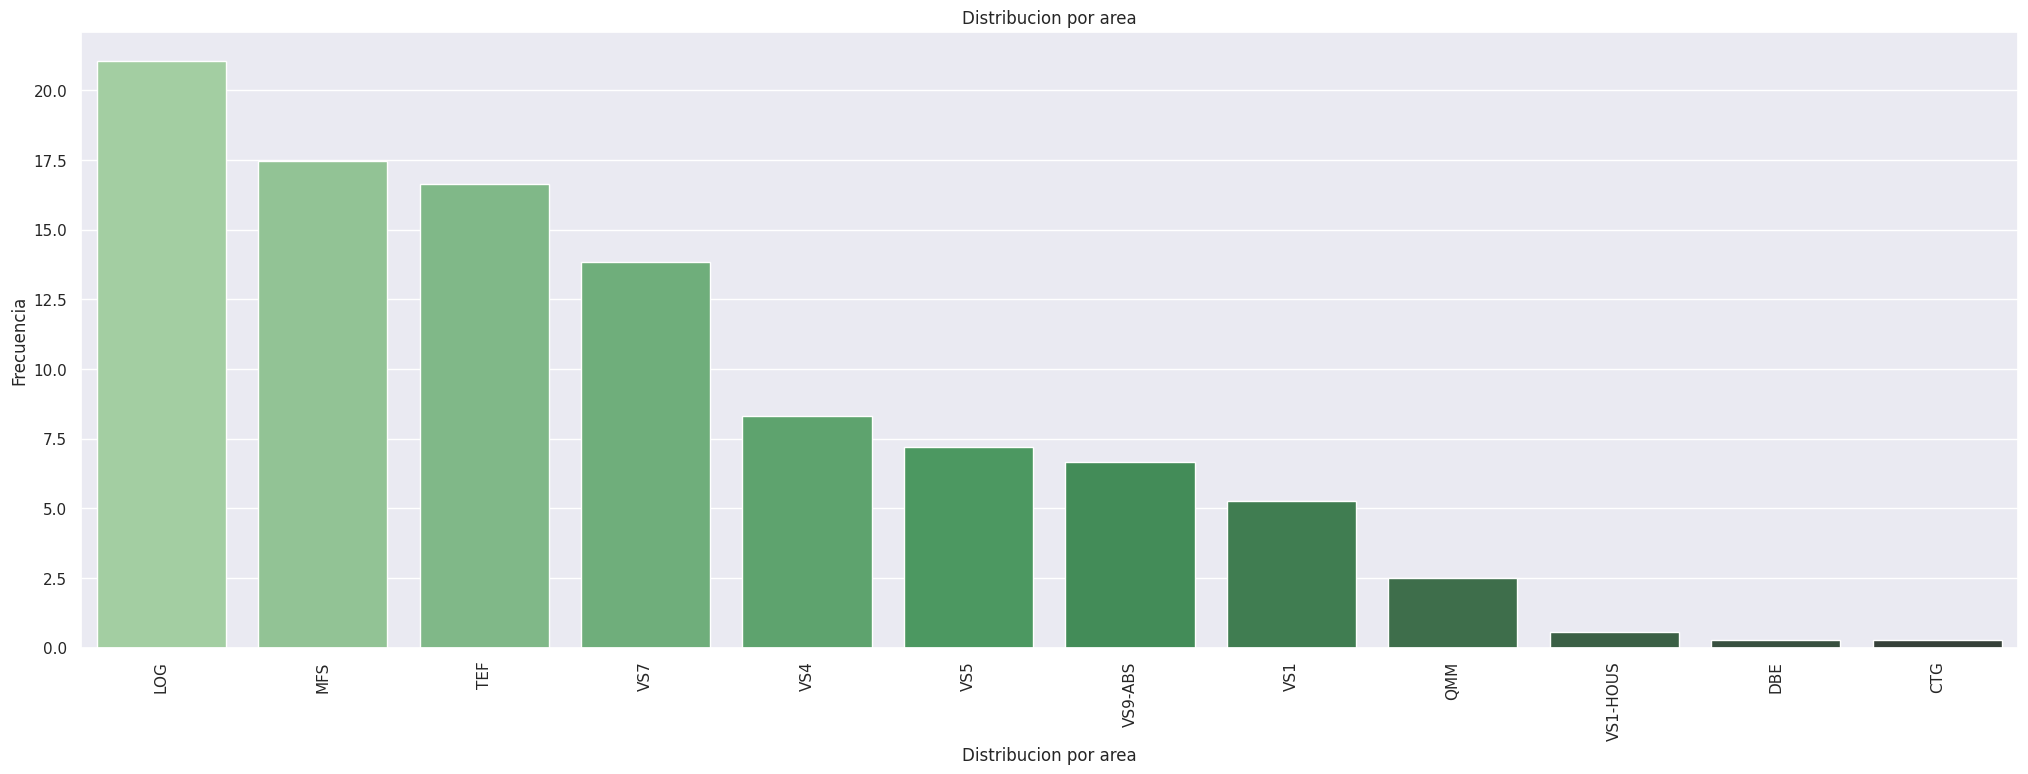

In [ ]:
porcentaje_area = distribucion_area / len(df_2) * 100
sns.barplot(x=porcentaje_area.index,y=porcentaje_area,palette='Greens_d')
plt.title('Distribucion por area')
plt.xlabel('Distribucion por area')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

## Datos Numericos

### Relacion motivo de renuncia por Edad

In [ ]:
rango_edades = [17 ,27, 37, 47, 57, 67]
nombres_rango_edades = ['18-27', '28-37', '38-47', '48-57', '58-67']
df_2['rango_edades'] = pd.cut(df_2['edad_del_empleado'], bins = rango_edades, labels = nombres_rango_edades)

<ipython-input-592-0ac13d730901>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['rango_edades'] = pd.cut(df_2['edad_del_empleado'], bins = rango_edades, labels = nombres_rango_edades)


In [ ]:
conteo_combinaciones_motivo_edades = df_2.groupby(['motivo_de_la_renuncia', 'rango_edades']).size().reset_index(name='conteo')
combinaciones_motivo_edades_filtrado = conteo_combinaciones_motivo_edades[conteo_combinaciones_motivo_edades.conteo > 5]
conteo_combinaciones_motivo_edades_filtrado = combinaciones_motivo_edades_filtrado.value_counts()

In [ ]:
combinaciones_motivo_edades_filtrado

motivo_de_la_renuncia rango_edades  conteo
28              imp.tra-jubilacion        48-57       8
29              imp.tra-jubilacion        58-67       6
41         vol-cambio de domicilio        28-37       6
45                    vol-estudios        18-27       9
50     vol-insatisfaccion personal        18-27       7
51     vol-insatisfaccion personal        28-37      16
55   vol-no regreso / no dio razon        18-27       8
56   vol-no regreso / no dio razon        28-37       8
60                 vol-otro empleo        18-27      78
61                 vol-otro empleo        28-37      50
62                 vol-otro empleo        38-47      16
65     vol-prob personales y/o fam        18-27       9
66     vol-prob personales y/o fam        28-37      14
80  vol-transferencia entre planta        18-27      38
81  vol-transferencia entre planta        28-37      21
82  vol-transferencia entre planta        38-47       9

<Axes: xlabel='rango_edades', ylabel='conteo'>

Text(0.5, 1.0, 'Rango de edades mas comunes de los principales motivos de renuncia')

Text(0.5, 0, 'Edades')

Text(0, 0.5, 'Frecuencia')

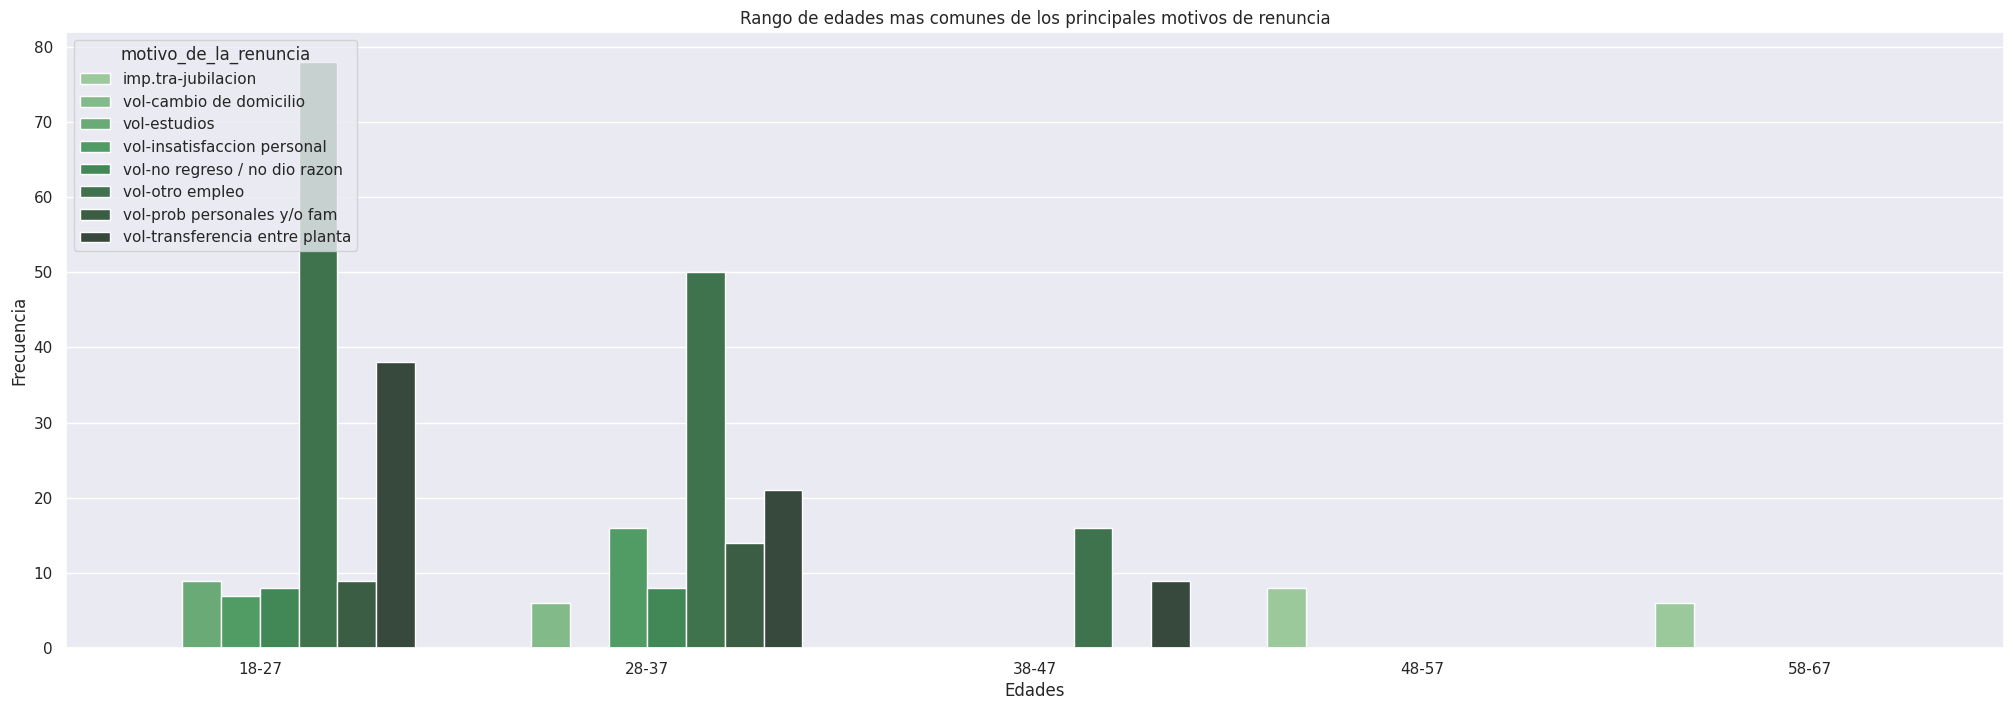

In [ ]:
sns.barplot(x='rango_edades',y='conteo', data=combinaciones_motivo_edades_filtrado,hue='motivo_de_la_renuncia',palette='Greens_d')
plt.title('Rango de edades mas comunes de los principales motivos de renuncia')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.show()

<Axes: xlabel='rango_edades', ylabel='count'>

Text(0.5, 1.0, 'Distribucion de Hijos por edades')

Text(0.5, 0, 'Rango de edades')

Text(0, 0.5, 'Frecuencia')

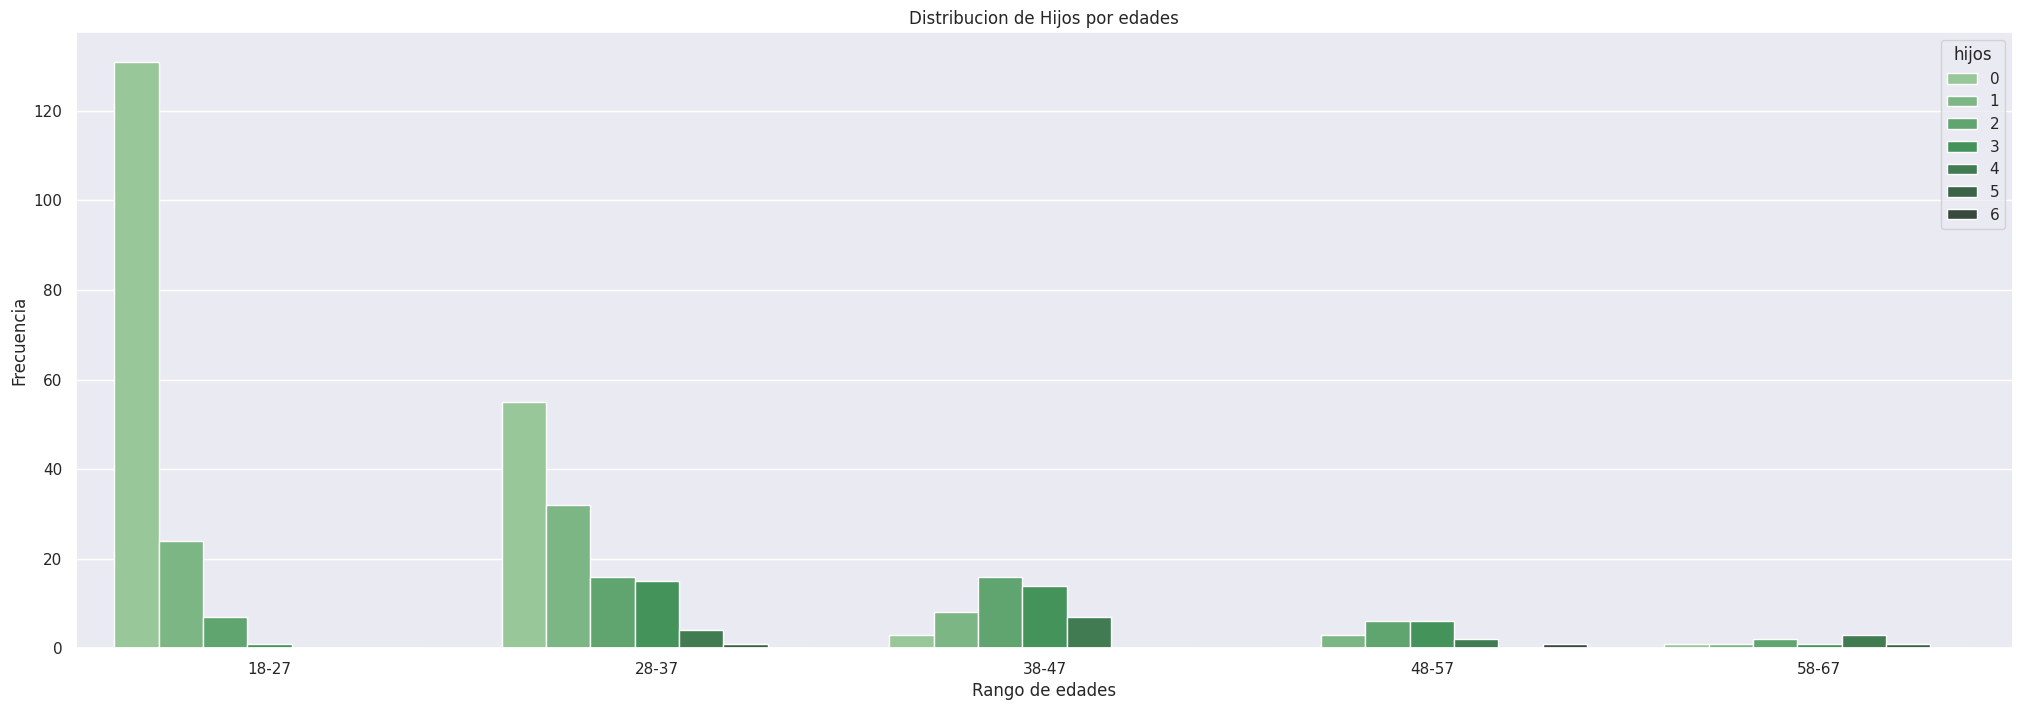

In [ ]:
sns.countplot(x='rango_edades',hue='hijos',data=df_2,palette='Greens_d')
plt.title('Distribucion de Hijos por edades')
plt.xlabel('Rango de edades')
plt.ylabel('Frecuencia')
plt.show()

<Axes: xlabel='rango_edades', ylabel='antiguedad'>

Text(0.5, 1.0, 'Rango de edades segun antiguedad')

Text(0.5, 0, 'Rango de edades')

Text(0, 0.5, 'Antiguedad')

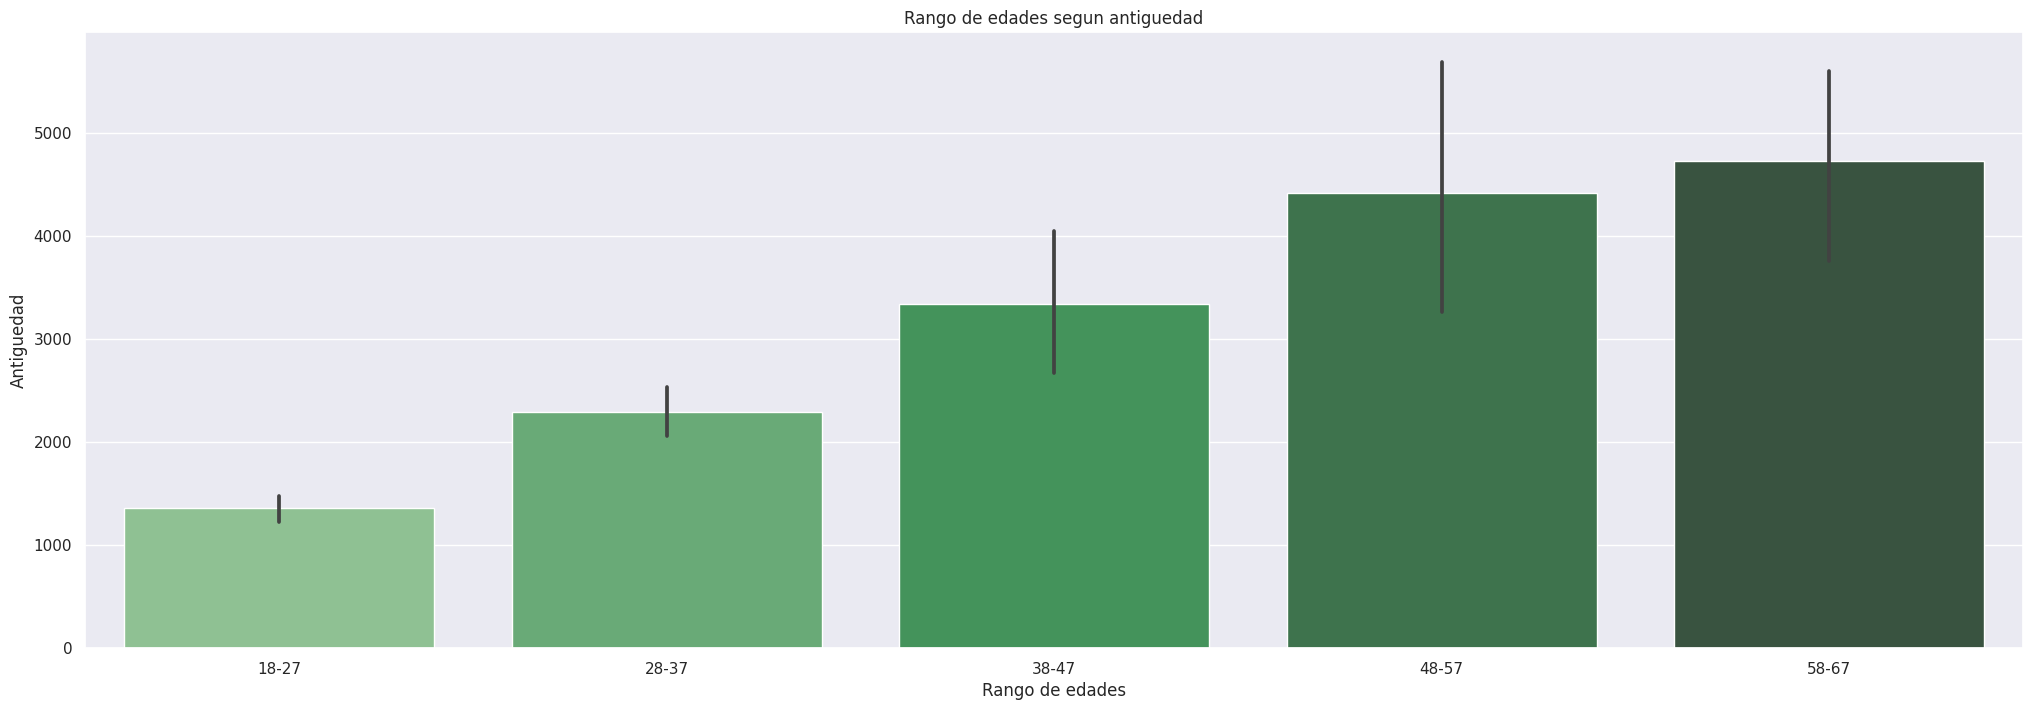

In [ ]:
sns.barplot(x='rango_edades',y='antiguedad',data=df_2,palette='Greens_d')
plt.title('Rango de edades segun antiguedad')
plt.xlabel('Rango de edades')
plt.ylabel('Antiguedad')
plt.show()

### Relacion motivo de renuncia por anos trabajados

In [ ]:
rango_ant = [4 ,100, 364, 1228, 1820, 3276, np.inf]
n_ran_ant = ['0-100 dias', '101-364 dias', '2-3 años', '4-5 años', '6-9 años', '10 o + años']
df_2['rango_antiguedad'] = pd.cut(df_2['anos'], bins = rango_ant, labels = n_ran_ant)

<ipython-input-598-ddf8da13e202>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['rango_antiguedad'] = pd.cut(df_2['anos'], bins = rango_ant, labels = n_ran_ant)


In [ ]:
conteo_combinaciones_motivo_antiguedad = df_2.groupby(['motivo_de_la_renuncia', 'rango_antiguedad']).size().reset_index(name='conteo')
combinaciones_motivo_antiguedad_filtrado = conteo_combinaciones_motivo_antiguedad[conteo_combinaciones_motivo_antiguedad.conteo > 2]
conteo_combinaciones_motivo_antiguedad_filtrado = combinaciones_motivo_antiguedad_filtrado.value_counts()

In [ ]:
combinaciones_motivo_antiguedad_filtrado

motivo_de_la_renuncia rango_antiguedad  conteo
30              imp.tra-jubilacion       0-100 dias      14
36      imp.tra-lft y/o reglamento       0-100 dias       9
48         vol-cambio de domicilio       0-100 dias      10
54                    vol-estudios       0-100 dias       5
60     vol-insatisfaccion personal       0-100 dias      14
66   vol-no regreso / no dio razon       0-100 dias       8
72                 vol-otro empleo       0-100 dias      91
78     vol-prob personales y/o fam       0-100 dias      21
90             vol-razones medicas       0-100 dias       3
96  vol-transferencia entre planta       0-100 dias      30

<Axes: xlabel='rango_antiguedad', ylabel='conteo'>

Text(0.5, 1.0, 'Rango de antiguedad trabajada mas comunes de los principales motivos de renuncia')

Text(0.5, 0, 'Antiguedad')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0-100 dias'),
  Text(1, 0, '101-364 dias'),
  Text(2, 0, '2-3 años'),
  Text(3, 0, '4-5 años'),
  Text(4, 0, '6-9 años'),
  Text(5, 0, '10 o + años')])

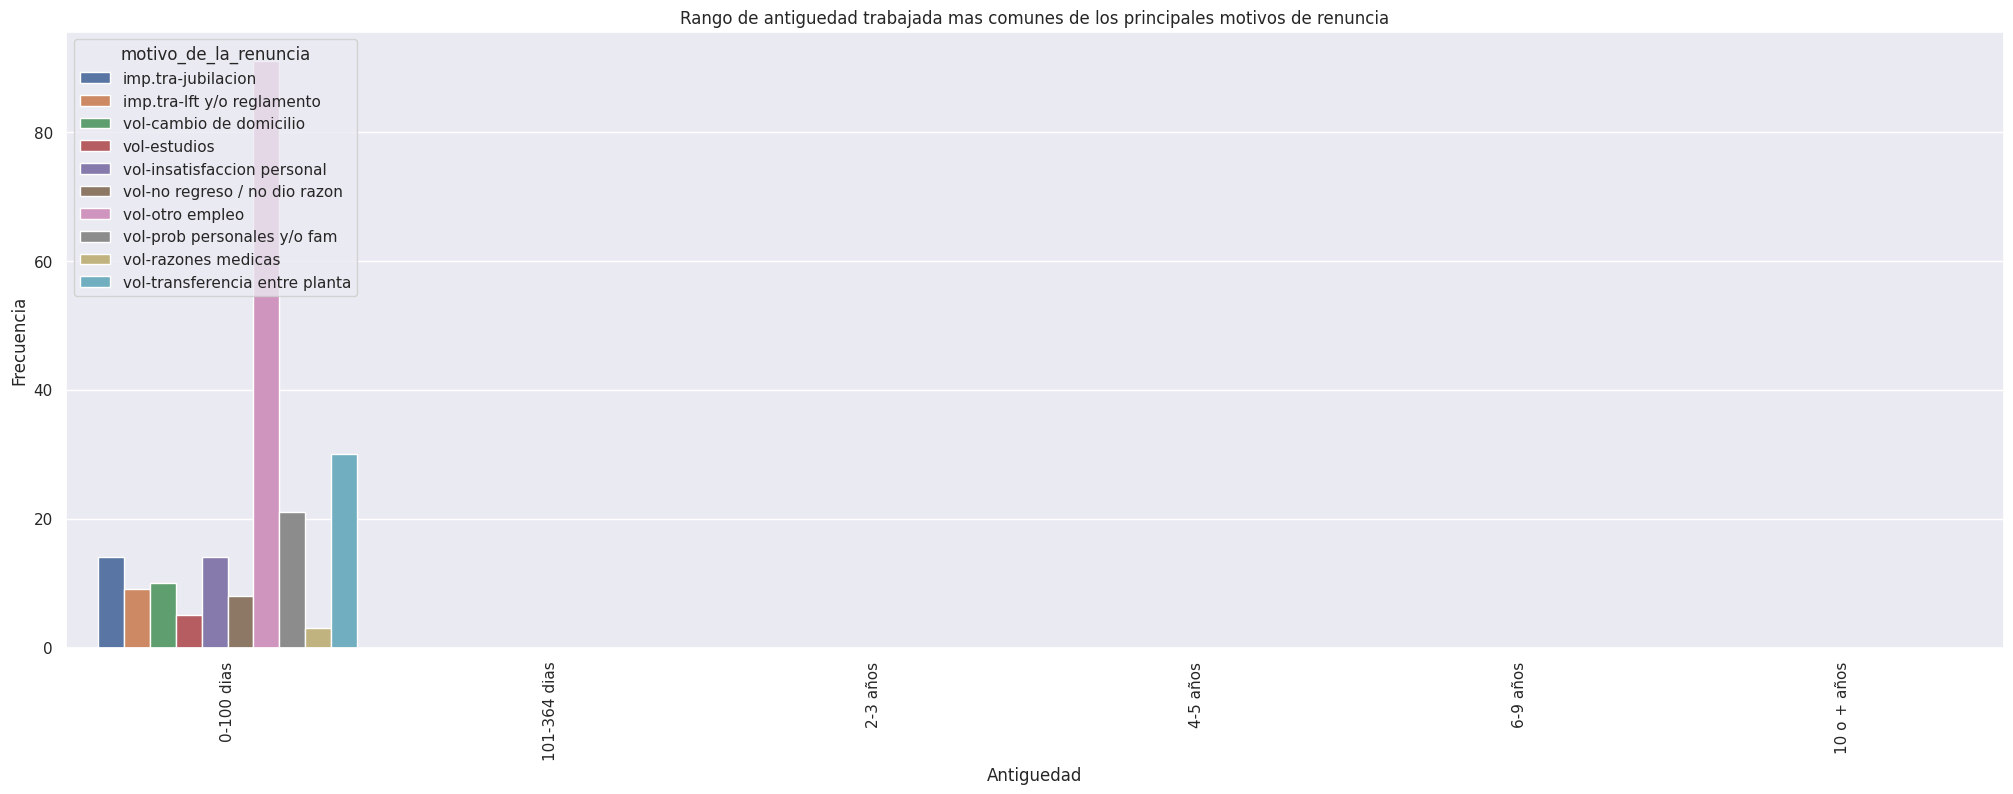

In [ ]:
sns.barplot(x='rango_antiguedad',y='conteo', data=combinaciones_motivo_antiguedad_filtrado,hue='motivo_de_la_renuncia')
plt.title('Rango de antiguedad trabajada mas comunes de los principales motivos de renuncia')
plt.xlabel('Antiguedad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

### Relacion motivo de despido con cantidad hijos

<Axes: xlabel='motivo_de_la_renuncia', ylabel='hijos'>

Text(0.5, 1.0, 'Motivo de Renuncia vs. Cantidad de Hijos')

Text(0.5, 0, 'Motivo de Renuncia')

Text(0, 0.5, 'Cantidad de Hijos')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'vol-otro empleo'),
  Text(1, 0, 'vol-no regreso / no dio razon'),
  Text(2, 0, 'vol-insatisfaccion personal'),
  Text(3, 0, 'vol-transferencia entre planta'),
  Text(4, 0, 'imp.tra-lft y/o reglamento'),
  Text(5, 0, 'imp.tra-ausentismos continuos'),
  Text(6, 0, 'vol-prob personales y/o fam'),
  Text(7, 0, 'vol-cambio de domicilio'),
  Text(8, 0, 'imp.tra-jubilacion'),
  Text(9, 0, 'vol-estudios'),
  Text(10, 0, 'muerte natural'),
  Text(11, 0, 'imp.pat-pensionado imss'),
  Text(12, 0, 'vol-razones medicas'),
  Text(13, 0, 'vol-problemas con transporte'),
  Text(14, 0, 'imp.tra-bajo desempeno'),
  Text(15, 0, 'imp.tra-falsificacion de doctos'),
  Text(16, 0, 'imp.pat-terminacion del contra')])

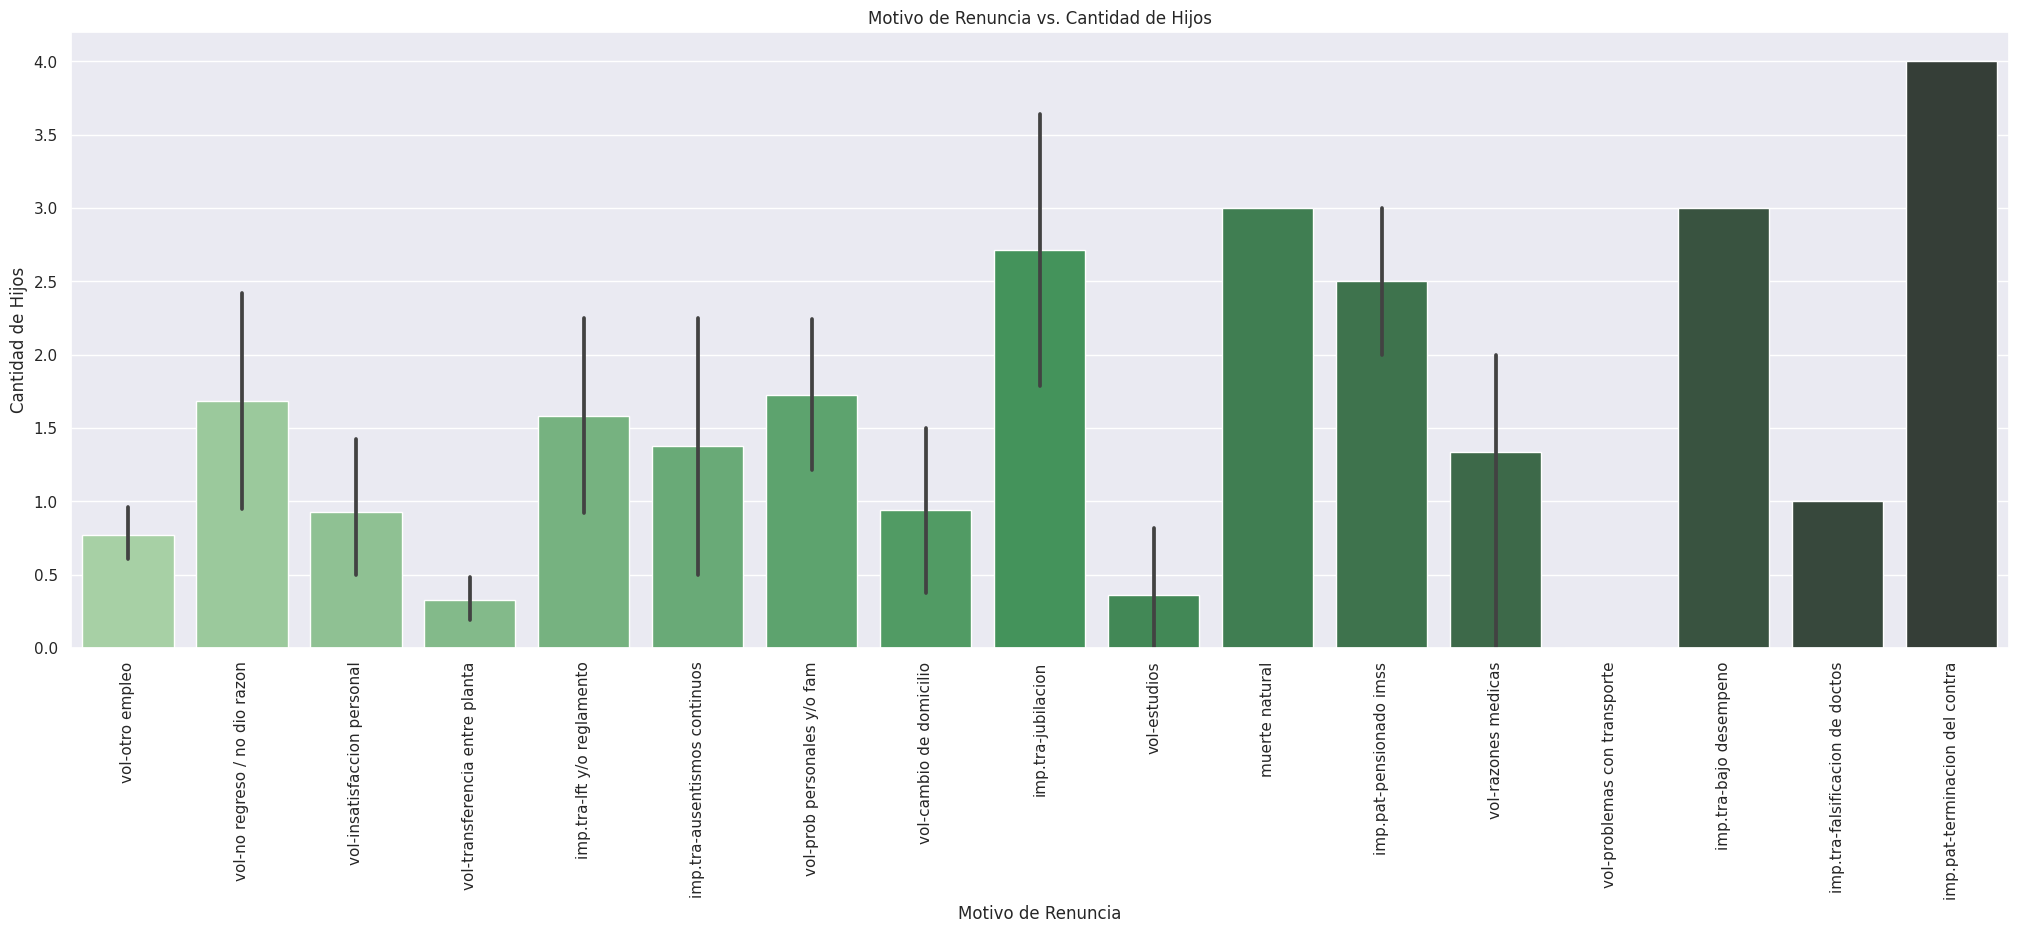

In [ ]:
sns.barplot(x='motivo_de_la_renuncia', y='hijos', data=df_2,palette='Greens_d')
plt.title('Motivo de Renuncia vs. Cantidad de Hijos')
plt.xlabel('Motivo de Renuncia')
plt.ylabel('Cantidad de Hijos')
plt.xticks(rotation=90)
plt.show()

# Analisis perfil de empleado 3

En el análisis del perfil de empleados, se han identificado las siguientes causas principales de desvinculación dentro de este grupo:

1. **Voluntario: Encuentro de otra oportunidad laboral**
2. **Voluntario: Transferencia a otra ubicación**
3. **Voluntario: Problemas personales**
4. **Voluntario: Insatisfacción personal**

Estas conclusiones resaltan las razones predominantes que han llevado a la salida de empleados, proporcionando una visión clara de los factores determinantes en la retención de talento en la organización.


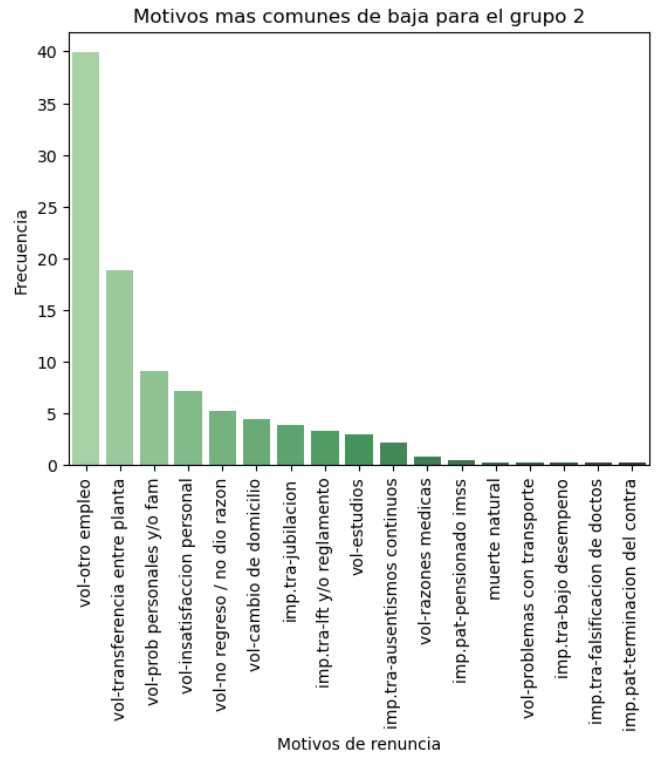

Podemos inferir que este grupo muestra un elevado **interés en el desarrollo de su carrera**, evidenciado por el hecho de que la segunda razón más común de desvinculación fue la transferencia de planta.

A continuación, continuaremos explorando más información sobre este segmento.



### Ahora se visualizara cual banda salarial, area y grupo de personal que se encontraban antes de su baja:

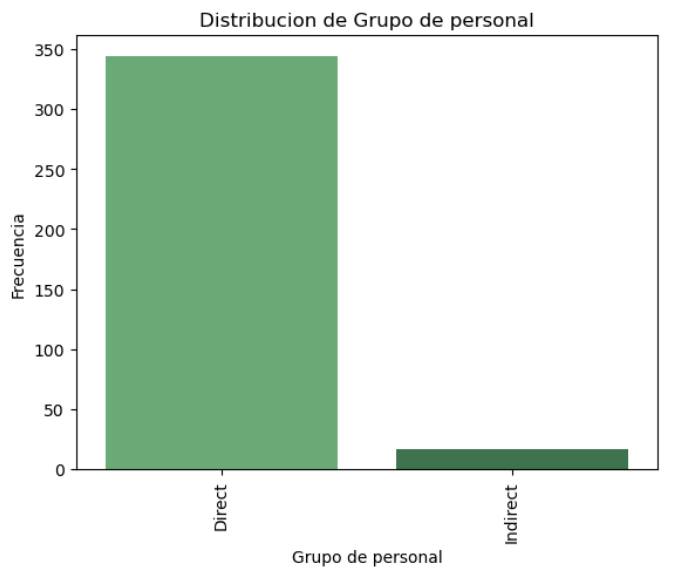
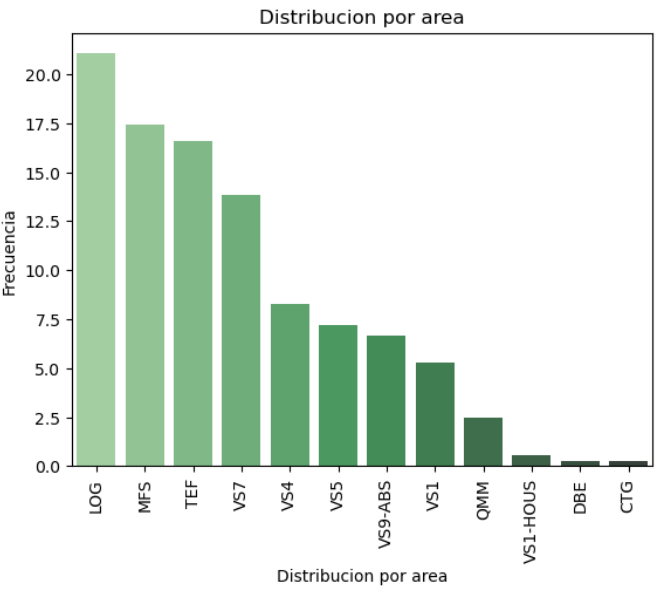

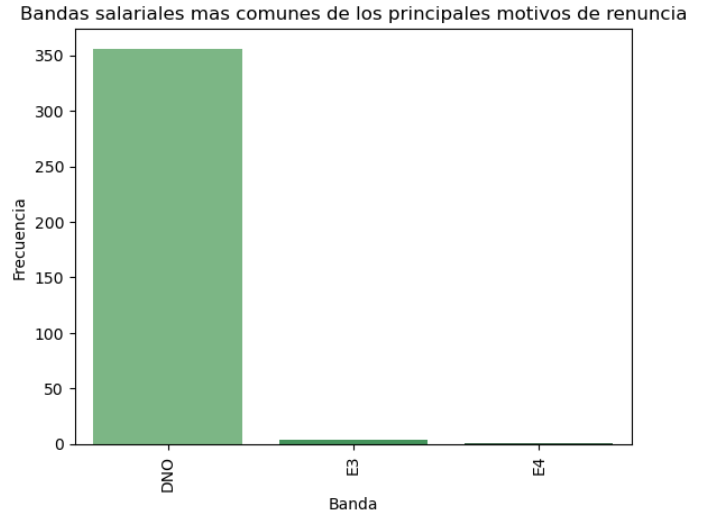


Como se puede demostrar a través de los gráficos, el perfil de los empleados es **en su mayor parte administrativo, con una banda salarial específica**.

## Analisis demografico de la categoria

En este apartado se analizarán los datos demográficos de la población, incluyendo el código postal, sexo, estado civil, cantidad de hijos, rango de edades y antigüedad.

### Codigos postales de los principales motivos de renuncia

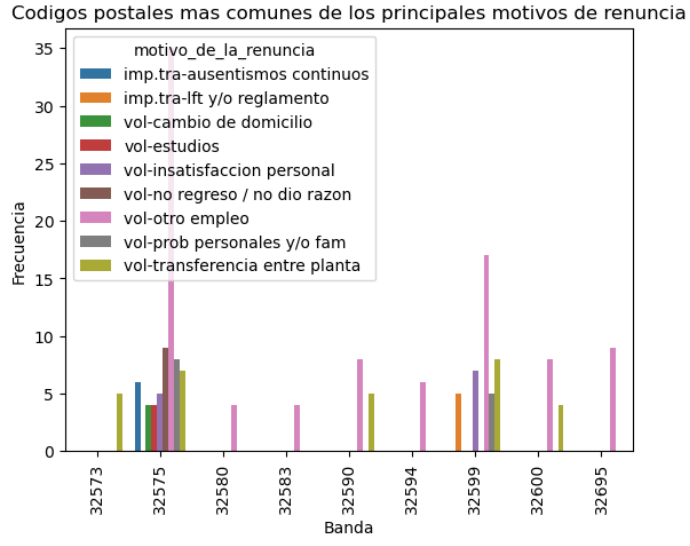
Se puede observar la distribución de los motivos de baja junto con su código postal. A continuación, se mostrará un mapa en donde se destacan los códigos postales con mayor número de bajas.

Según nuestros análisis, nuestros datos apuntan a que este tipo de usuarios son **jóvenes profesionistas que buscan impulsar su carrera**. Para confirmar esta hipótesis de manera más concreta, analizaremos más adelante los rangos de edad, la presencia de hijos y los estados civiles.


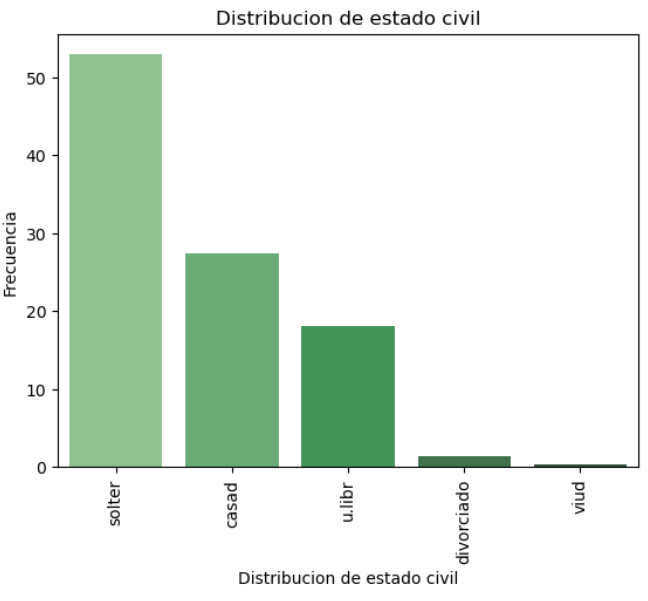

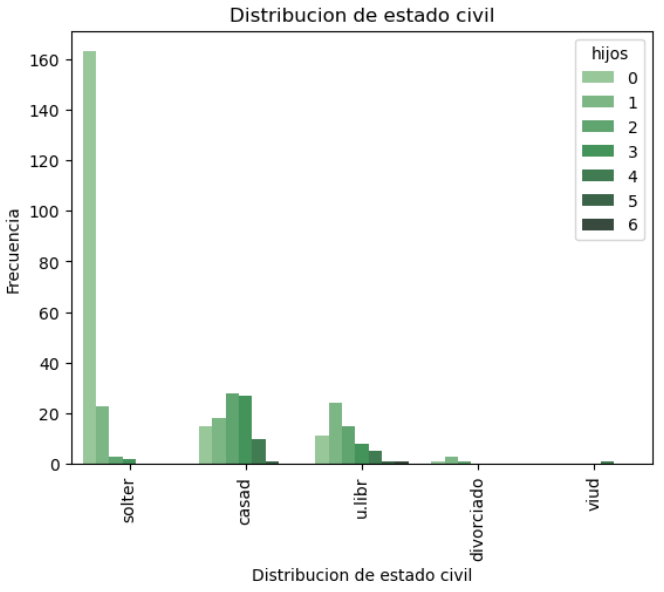

Los rangos de edad dejan en claro el perfil de empleado, construyendo con la información que los datos han revelado. Podemos concluir que, en este caso, las bajas son principalmente resultado de **jóvenes de 18-27 años, en su mayoría solteros, hombres sin hijos, que buscan mejorar sus condiciones de vida ya sea al buscar nuevos empleos de mejor paga o escalando dentro de Robert Bosch**.


## Plan de accion

## Plan de Acción para Mejorar la Retención de Empleados

### Análisis de Descubrimientos:
En base a nuestro análisis de datos, identificamos un patrón de desvinculación predominantemente asociado con jóvenes profesionales de 18 a 27 años. Estos empleados, en su mayoría solteros, hombres sin hijos, muestran un interés en construir una carrera y tienden a dejar la empresa en busca de oportunidades de mejor remuneración o crecimiento dentro de Robert Bosch.

### Recomendaciones:

1. **Programa de Desarrollo Profesional:**
   - Implementar un programa estructurado de desarrollo profesional que brinde oportunidades de crecimiento y capacitación continua a los empleados dentro de la empresa.

2. **Revisión Salarial y Beneficios:**
   - Realizar una revisión de la estructura salarial y beneficios para garantizar que estén alineados con las expectativas del mercado y las necesidades de los empleados.

3. **Mentoría y Acompañamiento:**
   - Establecer programas de mentoría para los empleados más jóvenes, brindándoles orientación y apoyo en su desarrollo profesional.

4. **Flexibilidad Laboral:**
   - Introducir políticas de flexibilidad laboral para adaptarse a las necesidades cambiantes de los empleados, especialmente aquellos que buscan equilibrar trabajo y vida personal.

5. **Comunicación Transparente:**
   - Mejorar la comunicación interna, proporcionando una visión clara de las oportunidades de carrera y los beneficios disponibles.

6. **Encuestas de Satisfacción:**
   - Implementar encuestas regulares de satisfacción para comprender mejor las preocupaciones y expectativas de los empleados, permitiendo ajustes proactivos.

7. **Programas de Bienestar:**
   - Introducir programas de bienestar que aborden aspectos físicos y mentales, promoviendo un ambiente de trabajo saludable.

### Evaluación Continua:

El éxito de estas medidas se evaluará mediante indicadores clave como la retención de empleados, el feedback en encuestas de satisfacción y el seguimiento de la participación en programas de desarrollo. Se realizarán ajustes según sea necesario para garantizar la efectividad a largo plazo.


# Código Perfil de Empleado 4


En esta primera sección se muestra el código utilizado para la obtención de resultados, al final del documento se plantea el análisis con las respectivas propuestas de solución.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# df = pd.read_csv("DATA.csv")
df_cluster = pd.read_csv("dataClusterizado.csv")

In [ ]:
#esta celda se utiliza para verificar valores únicos en el conjunto de datos y contarlos
# df_cluster
check = "posicion"
print("Unique values: ",len(set(df_cluster[check])))
# df_cluster[check].unique()
# Counter(df_cluster[check])
df_cluster[check].value_counts()

Unique values:  97


POS1323    327
POS538     202
POS2939    124
POS1921    108
POS1230     82
          ... 
POS2046      1
POS1488      1
POS780       1
POS1210      1
POS2562      1
Name: posicion, Length: 97, dtype: int64

In [ ]:
#limitar set al cluster 3
cluster_3 = df_cluster[df_cluster["cluster"] == 3]
cluster_3

Unnamed: 0 posicion area a.liq. grupo_de_personal  codigo_postal  \
0              0   POS514  LOG     S6            Exempt          32520   
23            23   POS581  LOG     S6            Exempt          32433   
43            43  POS2076  HRL     S6            Exempt          32695   
45            45  POS2046  VS4     S6            Exempt          32410   
46            46  POS2856  VS5     S6            Exempt          32587   
...          ...      ...  ...    ...               ...            ...   
1342        1342  POS2446  VS4     S6            Exempt          32543   
1343        1343  POS2062  VS1     S6            Exempt          32423   
1383        1383  POS1974  MFS     S6            Exempt          32618   
1386        1386   POS790  QMM     S6            Exempt          32585   
1390        1390  POS2562  TEF     S6            Exempt          32574   

               motivo_de_la_renuncia banda        baja  reglapht        alta  \
0                    vol-otro empleo    E3  2023-02-01  ADMINIST  2018-06-21   
23                   vol-otro empleo    E3  2023-06-01  JF010600  2021-05-27   
43           imp.pat-pensionado imss    E3  2023-01-13  ADMINIST  2006-01-23   
45    vol-transferencia entre planta    E4  2023-01-13  ADMINIST  2006-05-15   
46                   vol-otro empleo    E3  2023-01-13  ADMINIST  2014-04-23   
...                              ...   ...         ...       ...         ...   
1342                 vol-otro empleo    E4  2022-12-13  ADMINIST  2012-07-23   
1343                 vol-otro empleo    E3  2022-12-13  ADMINIST  2022-02-17   
1383     vol-prob personales y/o fam    E4  2022-12-21  ADMINIST  2014-03-02   
1386  vol-transferencia entre planta    E4  2022-12-31  ADMINIST  2011-12-09   
1390      imp.tra-lft y/o reglamento    E3  2022-09-14  JF010600  2014-05-03   

      anos       meses  antiguedad clave_de_sexo  lugar_de_nacimiento  \
0        5   55.200000        1656      femenino               JUAREZ   
23       2   19.633333         589     masculino            CHIHUAHUA   
43      17  206.633333        6199      femenino  NUEVO CASAS GRANDES   
45      17  202.900000        6087      femenino           CUAUHTEMOC   
46       9  106.233333        3187     masculino               JUAREZ   
...    ...         ...         ...           ...                  ...   
1342    10  126.500000        3795     masculino             VERACRUZ   
1343     0    9.966667         299     masculino               JUAREZ   
1383     8  108.100000        3243     masculino               JUAREZ   
1386    11  137.600000        4128     masculino     CIUDAD DE MEXICO   
1390     8  103.833333        3115     masculino               JUAREZ   

      edad_del_empleado estado_civil  hijos  cluster  
0                    31       solter      0        3  
23                   30       solter      0        3  
43                   42       solter      1        3  
45                   42       solter      2        3  
46                   28       solter      0        3  
...                 ...          ...    ...      ...  
1342                 37        casad      2        3  
1343                 23       solter      0        3  
1383                 62        casad      3        3  
1386                 44        casad      0        3  
1390                 46        casad      4        3  

[152 rows x 20 columns]

In [ ]:
cluster_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 1390
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             152 non-null    int64  
 1   posicion               152 non-null    object 
 2   area                   152 non-null    object 
 3   a.liq.                 152 non-null    object 
 4   grupo_de_personal      152 non-null    object 
 5   codigo_postal          152 non-null    int64  
 6   motivo_de_la_renuncia  152 non-null    object 
 7   banda                  152 non-null    object 
 8   baja                   152 non-null    object 
 9   reglapht               152 non-null    object 
 10  alta                   152 non-null    object 
 11  anos                   152 non-null    int64  
 12  meses                  152 non-null    float64
 13  antiguedad             152 non-null    int64  
 14  clave_de_sexo          152 non-null    object 
 15  lugar

In [ ]:
#creación de columna de rangos de antiguedad
rango_ant = [4 ,100, 364, 1228, 1820, 3276, np.inf]
n_ran_ant = ['0-100 dias', '101-364 dias', '2-3 años', '4-5 años', '6-9 años', '10 o + años']
cluster_3['rango_antiguedad'] = pd.cut(cluster_3['antiguedad'], bins = rango_ant, labels = n_ran_ant)

<ipython-input-608-5df1347bd5a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_3['rango_antiguedad'] = pd.cut(cluster_3['antiguedad'], bins = rango_ant, labels = n_ran_ant)


In [ ]:
#creación de columna de rango de edades
rango_edades = [17 ,27, 37, 47, 57, 67]
nombres_rango_edades = ['18-27', '28-37', '38-47', '48-57', '58-67']
cluster_3['rango_edades'] = pd.cut(cluster_3['edad_del_empleado'], bins = rango_edades, labels = nombres_rango_edades)

<ipython-input-609-bbc14e451168>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_3['rango_edades'] = pd.cut(cluster_3['edad_del_empleado'], bins = rango_edades, labels = nombres_rango_edades)


In [ ]:
#nombre de la columna a analizar
column = "area"

In [ ]:
#analizador de la columna
contador = Counter(cluster_3[column])
# contador
cluster_3[column].value_counts()

TEF           24
LOG           21
VS4           19
VS9-ABS       13
MFS           13
HRL           10
QMM           10
VS7           10
CTG            7
VS5            6
VS1            6
HSE            5
DBE            4
Admin MSE2     2
Admin MSE1     1
VS1-HOUS       1
Name: area, dtype: int64

posicion: no clear relation
area: no clear relation
grupo_de_personal: 'Exempt': 137, 'Managers': 13, 'Non-Exempt': 2
codig_postal: no clear relation
motivo_de_la_renuncia: 'vol-otro empleo': 84/152, 'vol-transferencia entre planta': 31/152
banda: 'E3': 92, 'E4': 47, 'SL1': 13
reglapht: 'ADMINIST': 137, 'JF010600': 8, 'JF050600': 3, 'JS011500': 4
lugar_de_nacimiento: 'JUAREZ': 67,'CHIHUAHUA': 28
clave_de_sexo: 'femenino': 53, 'masculino': 99
estado_civil: 'solter': 71, 'casad': 67
hijos: 0: 77, 1: 24, 2: 32
fecha de baja: no clear relation
rango_edades: '28-37': 75, '38-47': 29, '18-27': 27, '48-57': 15, '58-67': 6
rango_antiguedad: '4-5 años': 24,'2-3 años': 20,'10 o + años': 39,'6-9 años': 54,'101-364 dias': 11,'0-100 dias': 4
area: 'TEF': 24, 'LOG': 21, 'HRL': 10, 'VS4': 19, ...

In [ ]:
#análisis del porcentaje de renuncia por mes
cluster_3["mes"] = cluster_3["baja"].str.split("-").str[1]
cluster_3["mes"].value_counts(1)

<ipython-input-612-1d88d3538f32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_3["mes"] = cluster_3["baja"].str.split("-").str[1]


01    0.131579
04    0.111842
03    0.105263
05    0.105263
08    0.085526
06    0.078947
10    0.078947
11    0.072368
09    0.065789
07    0.065789
02    0.059211
12    0.039474
Name: mes, dtype: float64

In [ ]:
#generador de plots
def plotter(df_cluster,columna,xlabel):
    namefig = 'images/'+xlabel+'.svg'
    conteo = df_cluster[columna].value_counts().sort_values(ascending=False)
    sns.countplot(x=columna, data=df_cluster, order=conteo.index,palette='rocket')
    plt.title('Conteo de '+xlabel)
    plt.xlabel(xlabel)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=90)
#     plt.savefig(namefig,bbox_inches="tight",facecolor='white')#,dpi=200)
    plt.show()

In [ ]:
#creación de subsets para un análisis más profundo
cluster_3_admin = cluster_3[cluster_3["reglapht"] == 'ADMINIST']
admin_otroempleo = cluster_3_admin[cluster_3_admin['motivo_de_la_renuncia'] == 'vol-otro empleo']
admin_exempt = cluster_3_admin[cluster_3_admin['grupo_de_personal'] == 'Exempt']
admin_otroempleo_e3 = admin_otroempleo[admin_otroempleo['banda'] == 'E3']
cambioplanta = cluster_3[cluster_3['motivo_de_la_renuncia'] == 'vol-transferencia entre planta']
jovenes = cluster_3[cluster_3['rango_edades'] == '18-27']
mujeres = cluster_3[cluster_3['clave_de_sexo'] == 'femenino']
hombres = cluster_3[cluster_3['clave_de_sexo'] == 'masculino']
# mujeres['banda'].value_counts()
# hombres['banda'].value_counts()
# jovenes.info()
# admin_otroempleo_e3.info()
# admin_otroempleo.info()
# admin_exempt.info()

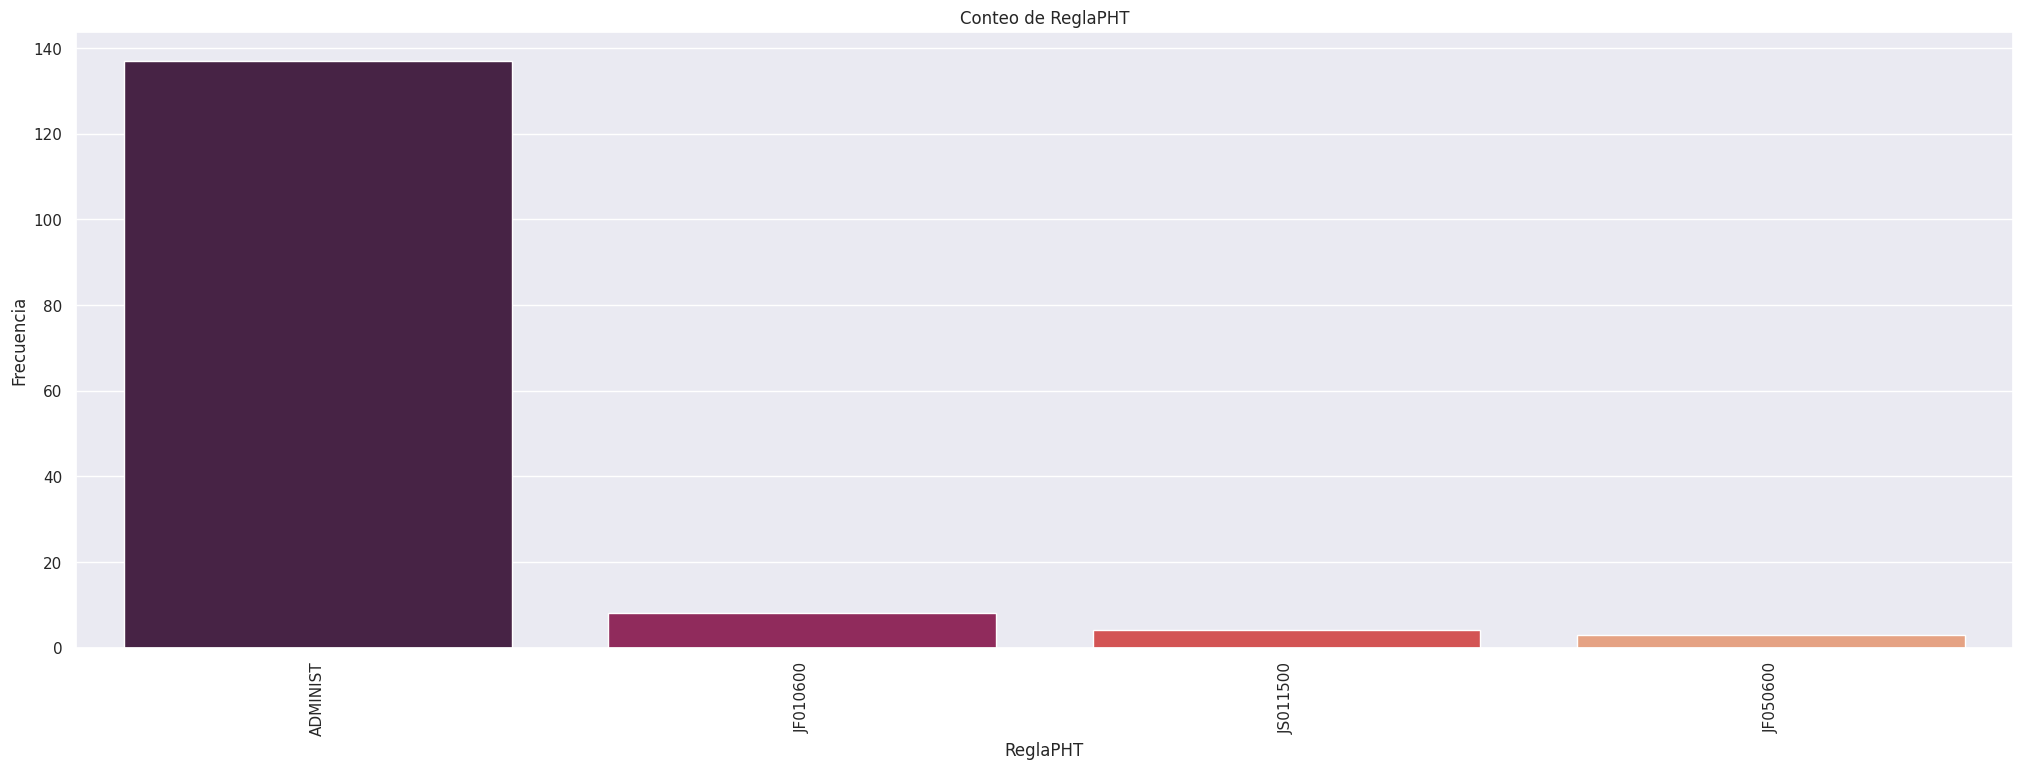

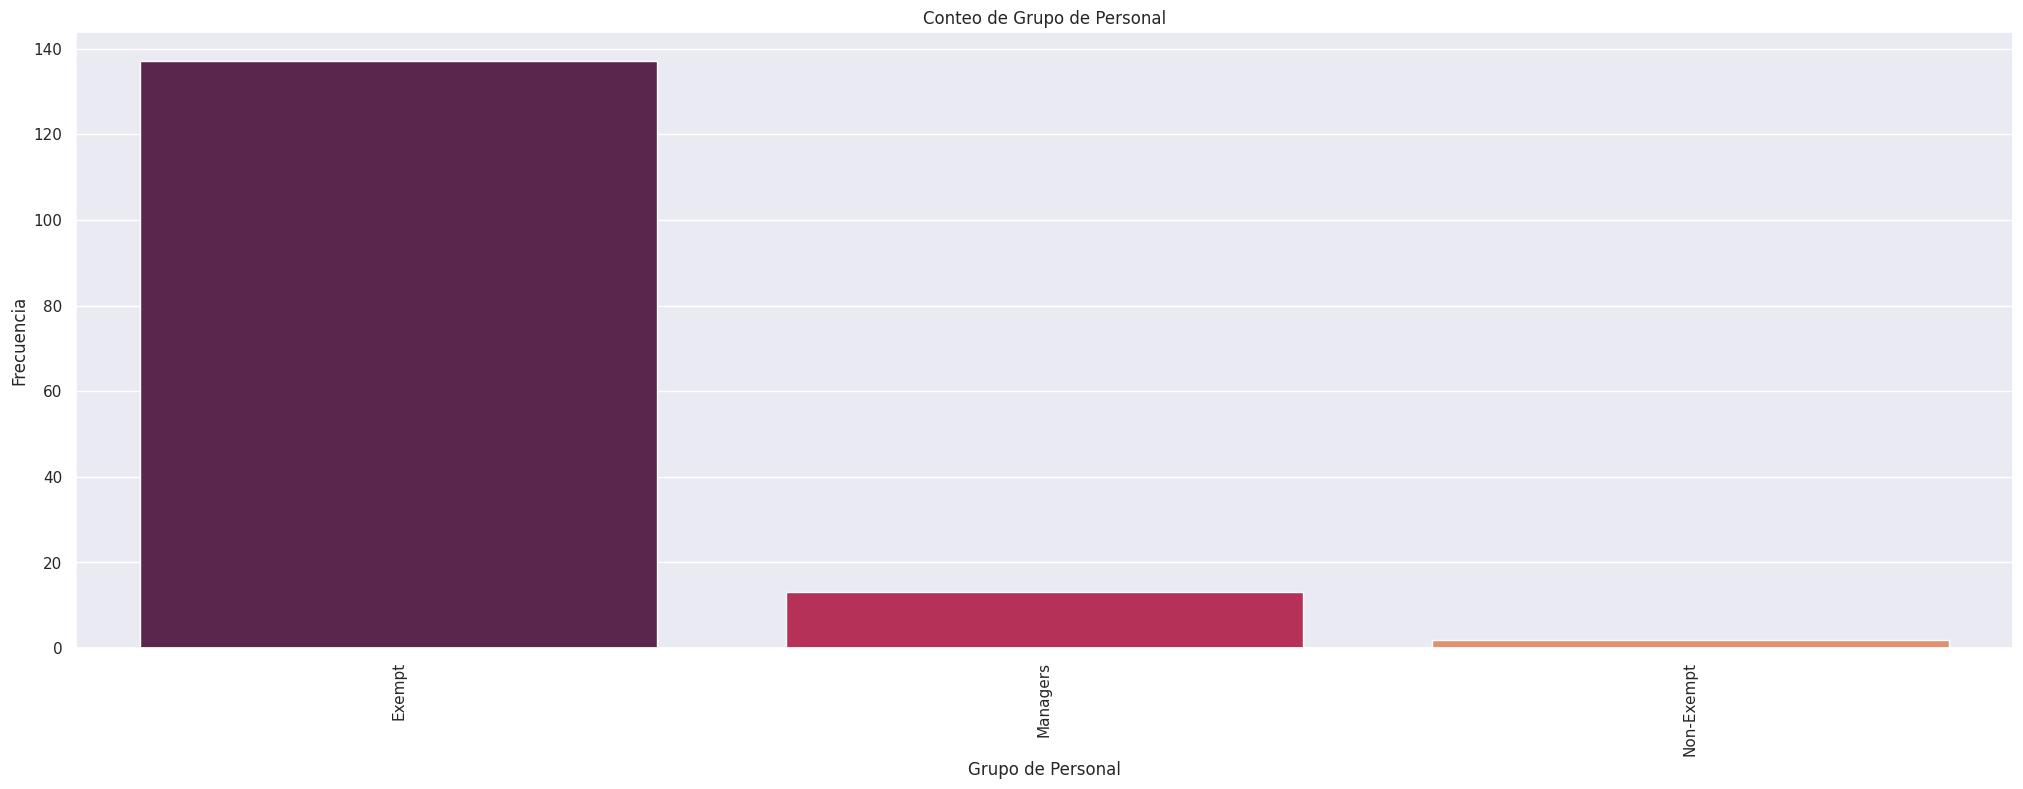

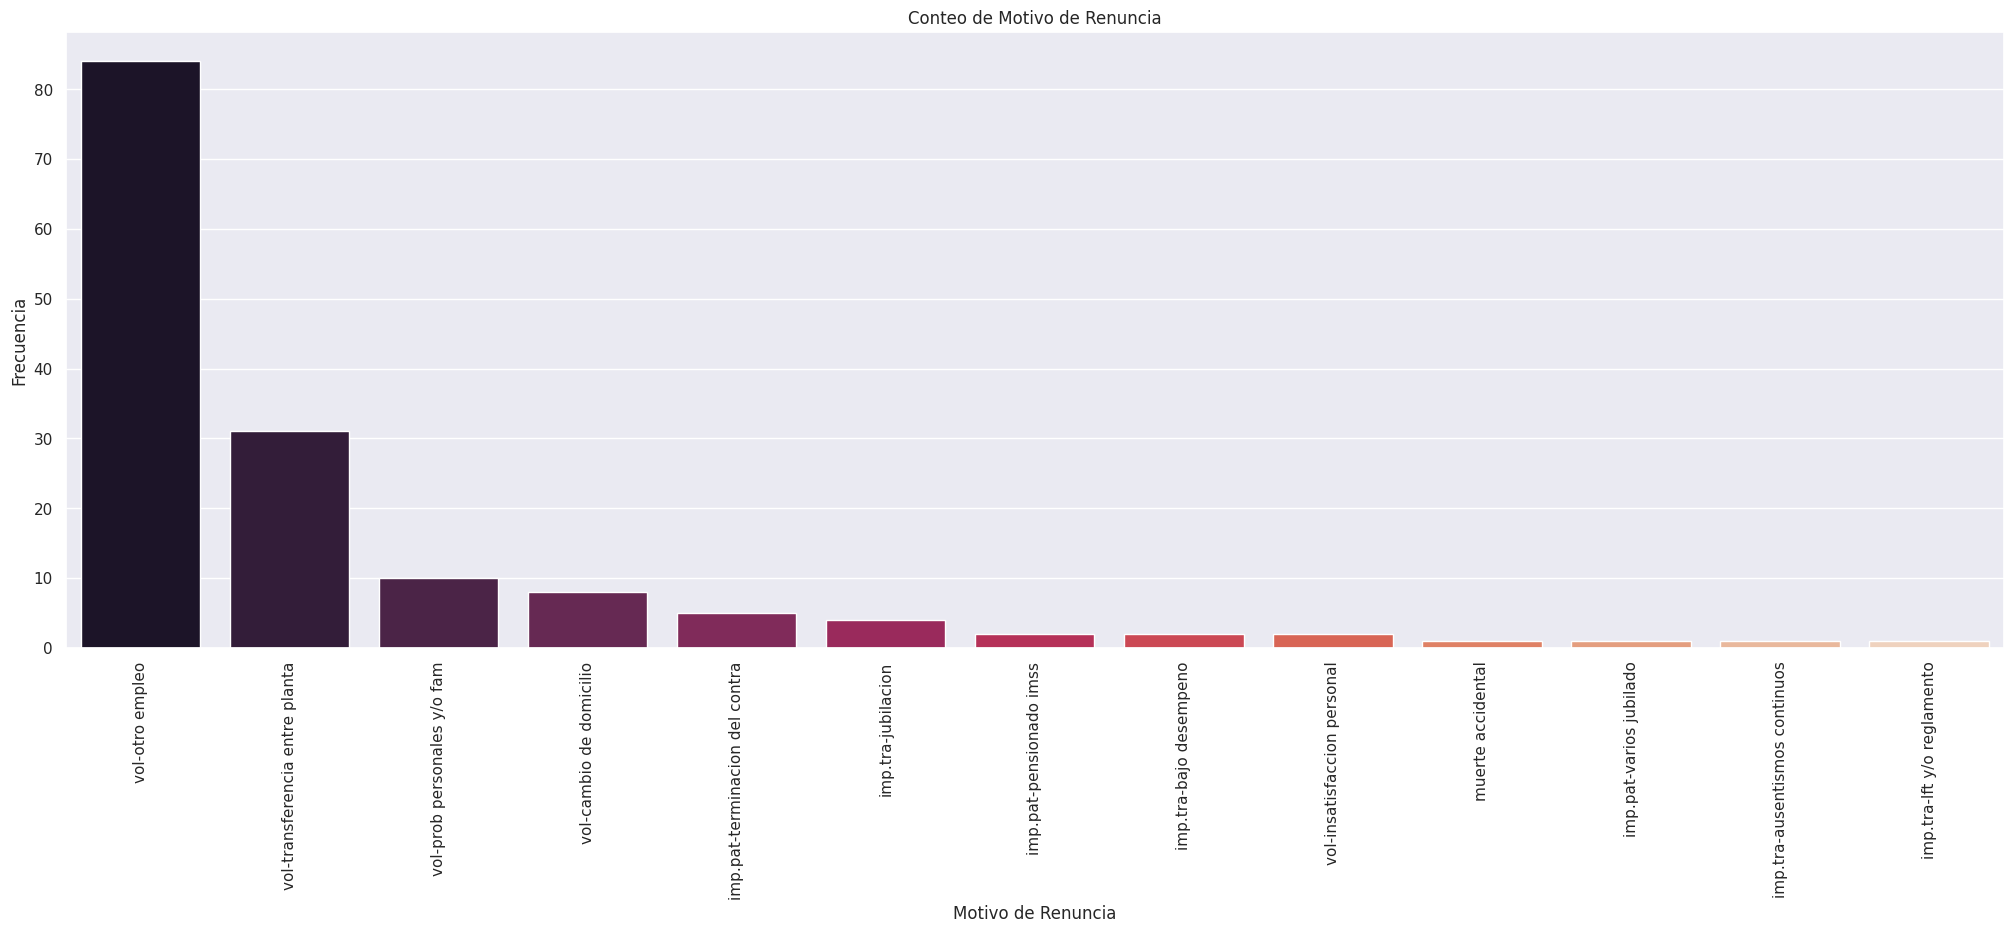

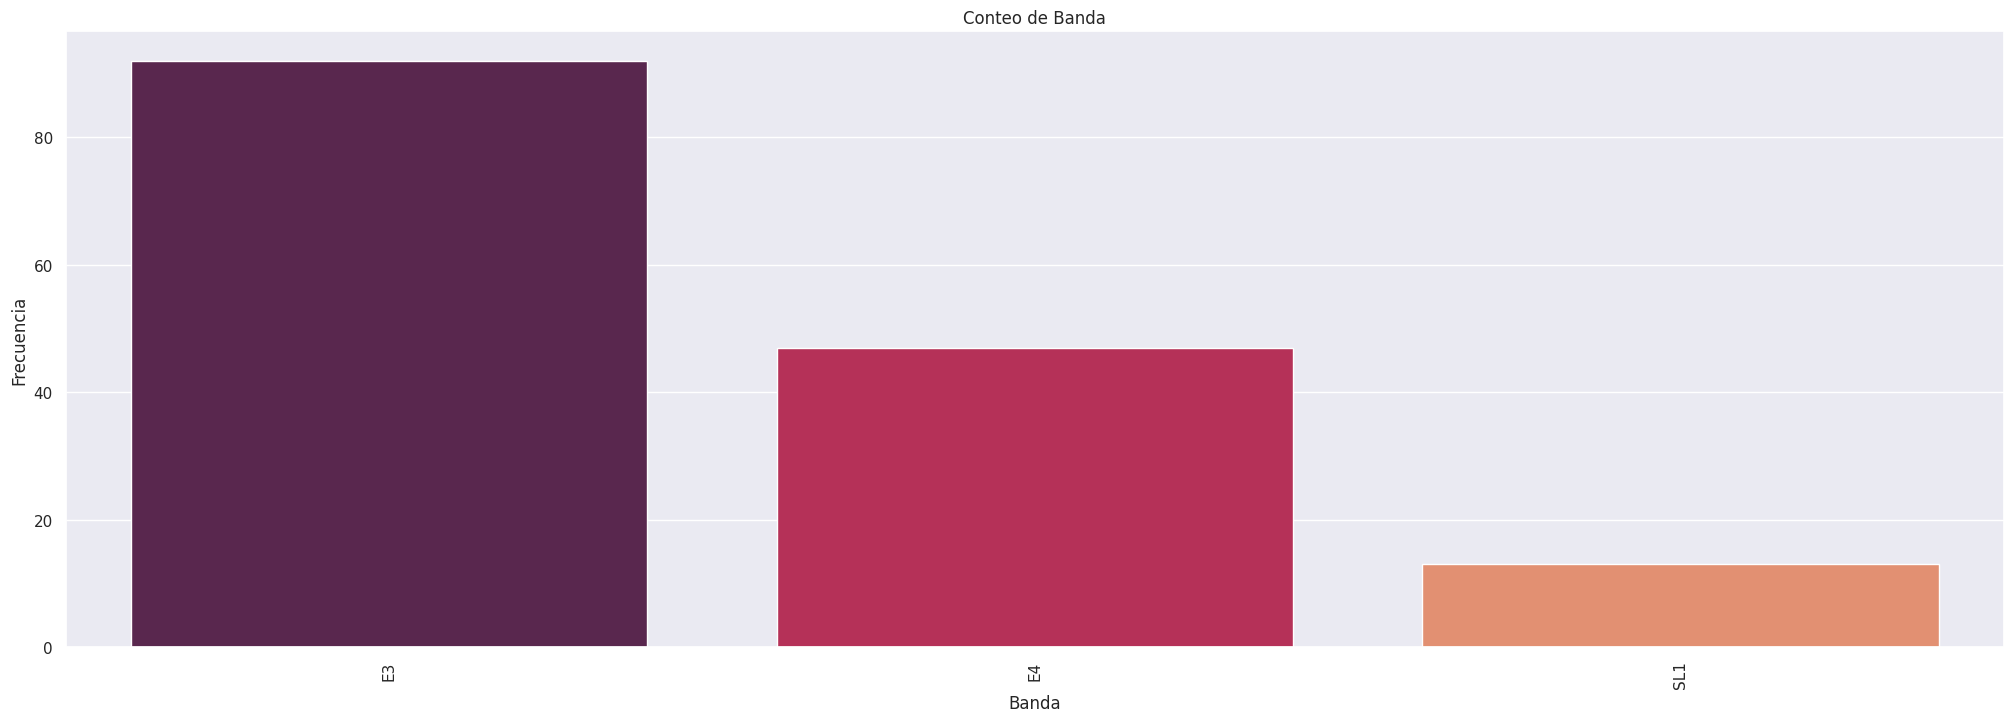

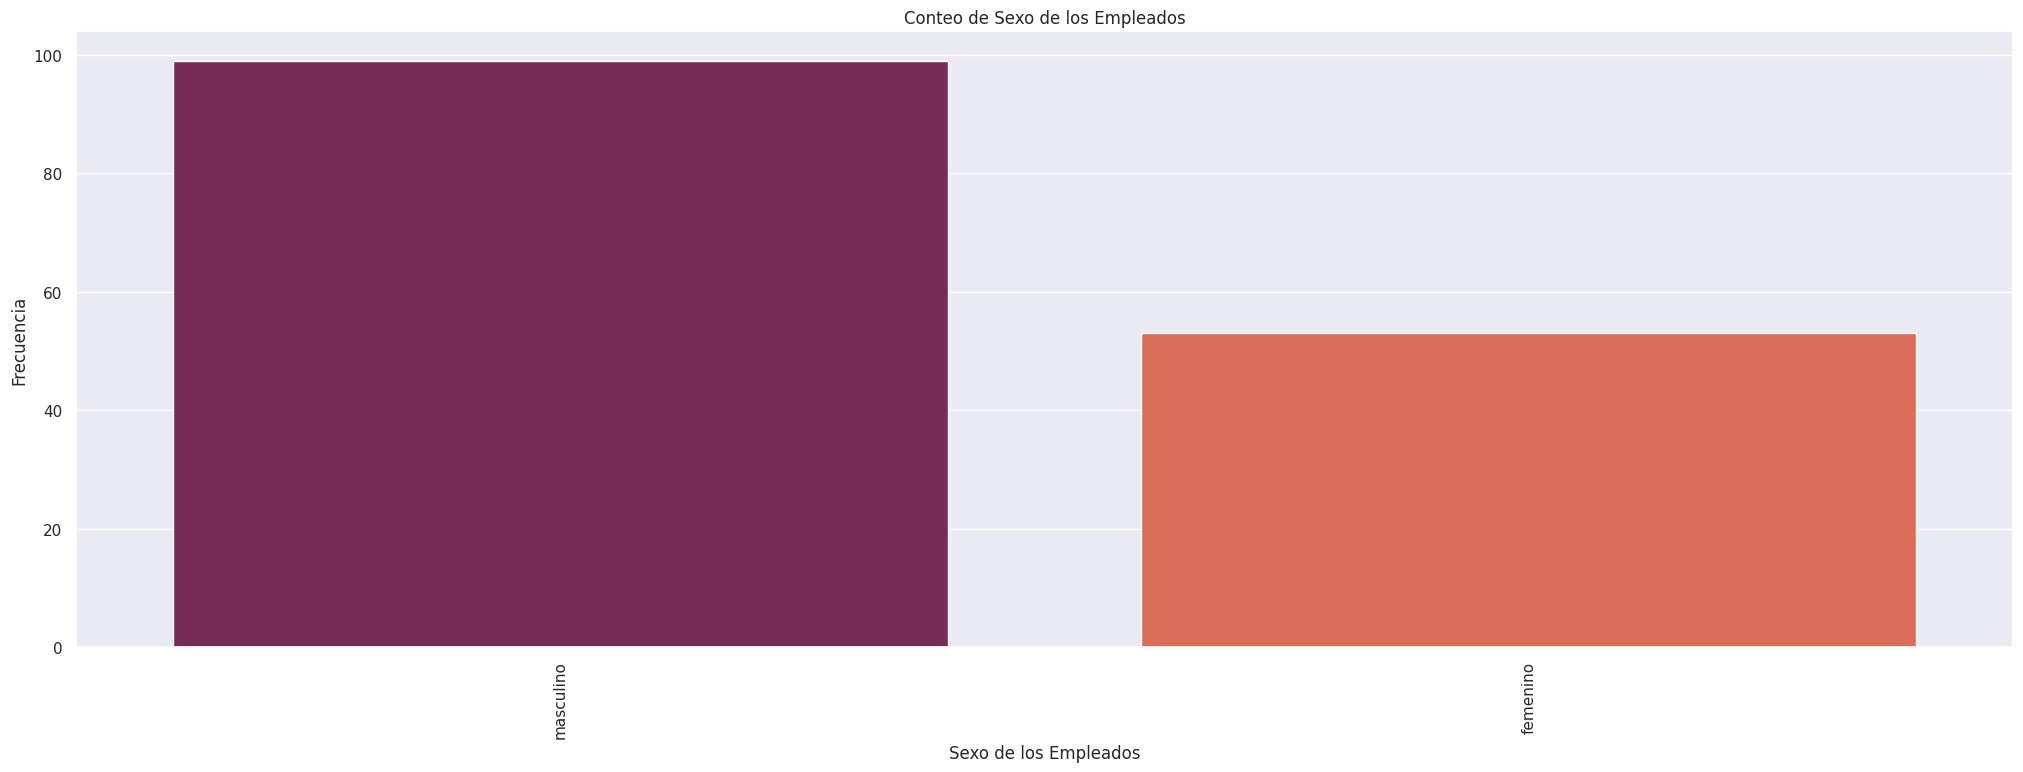

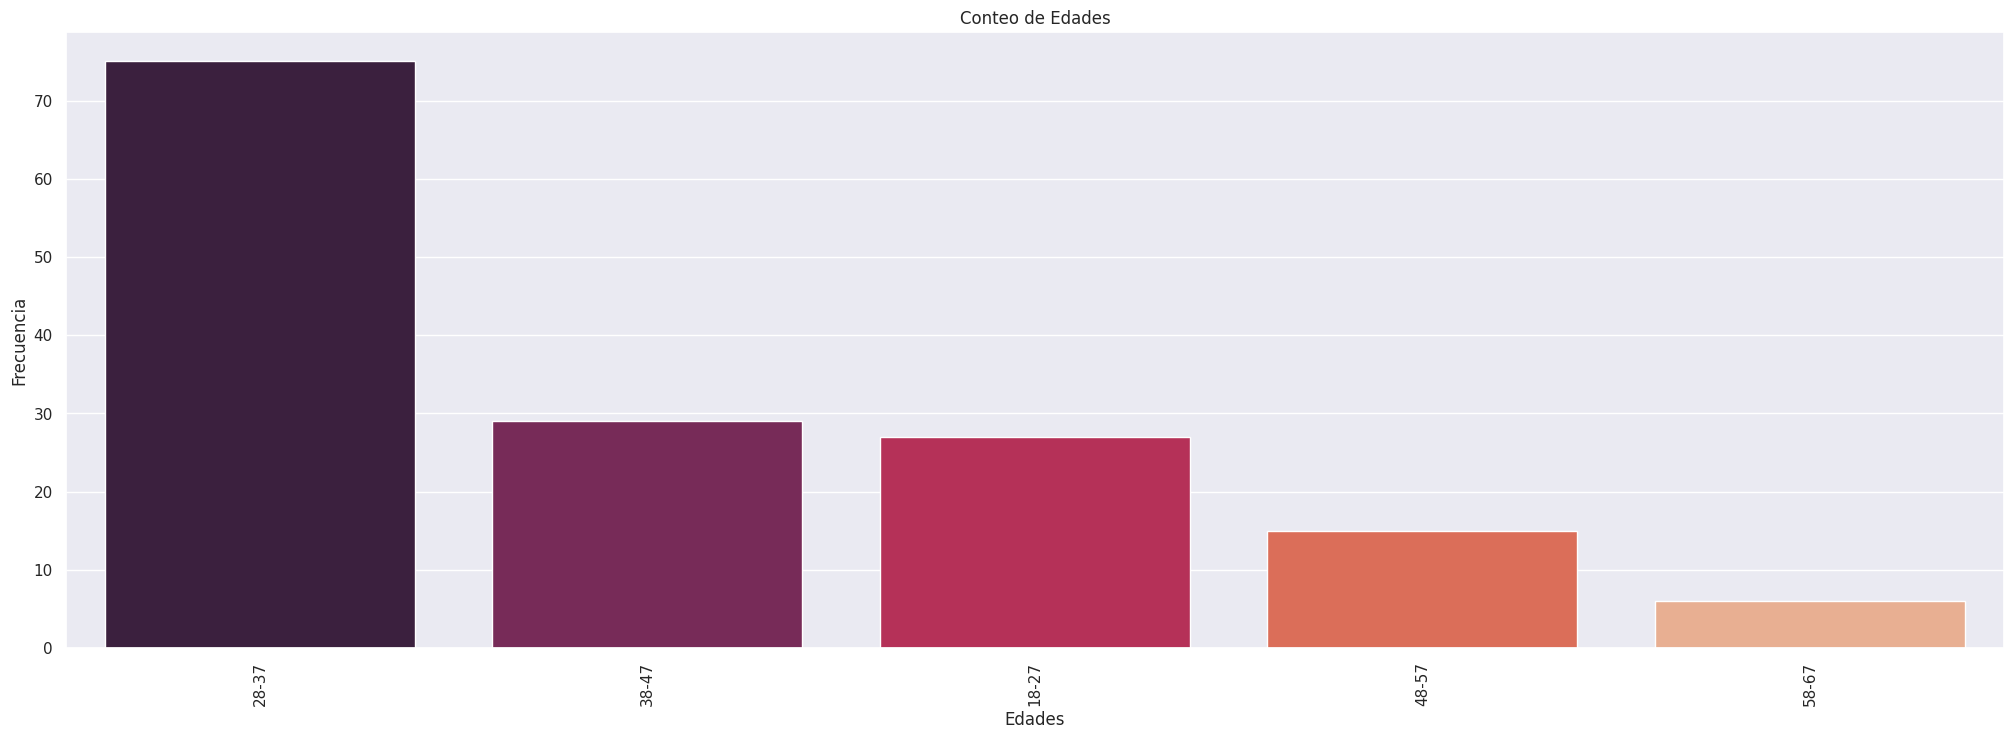

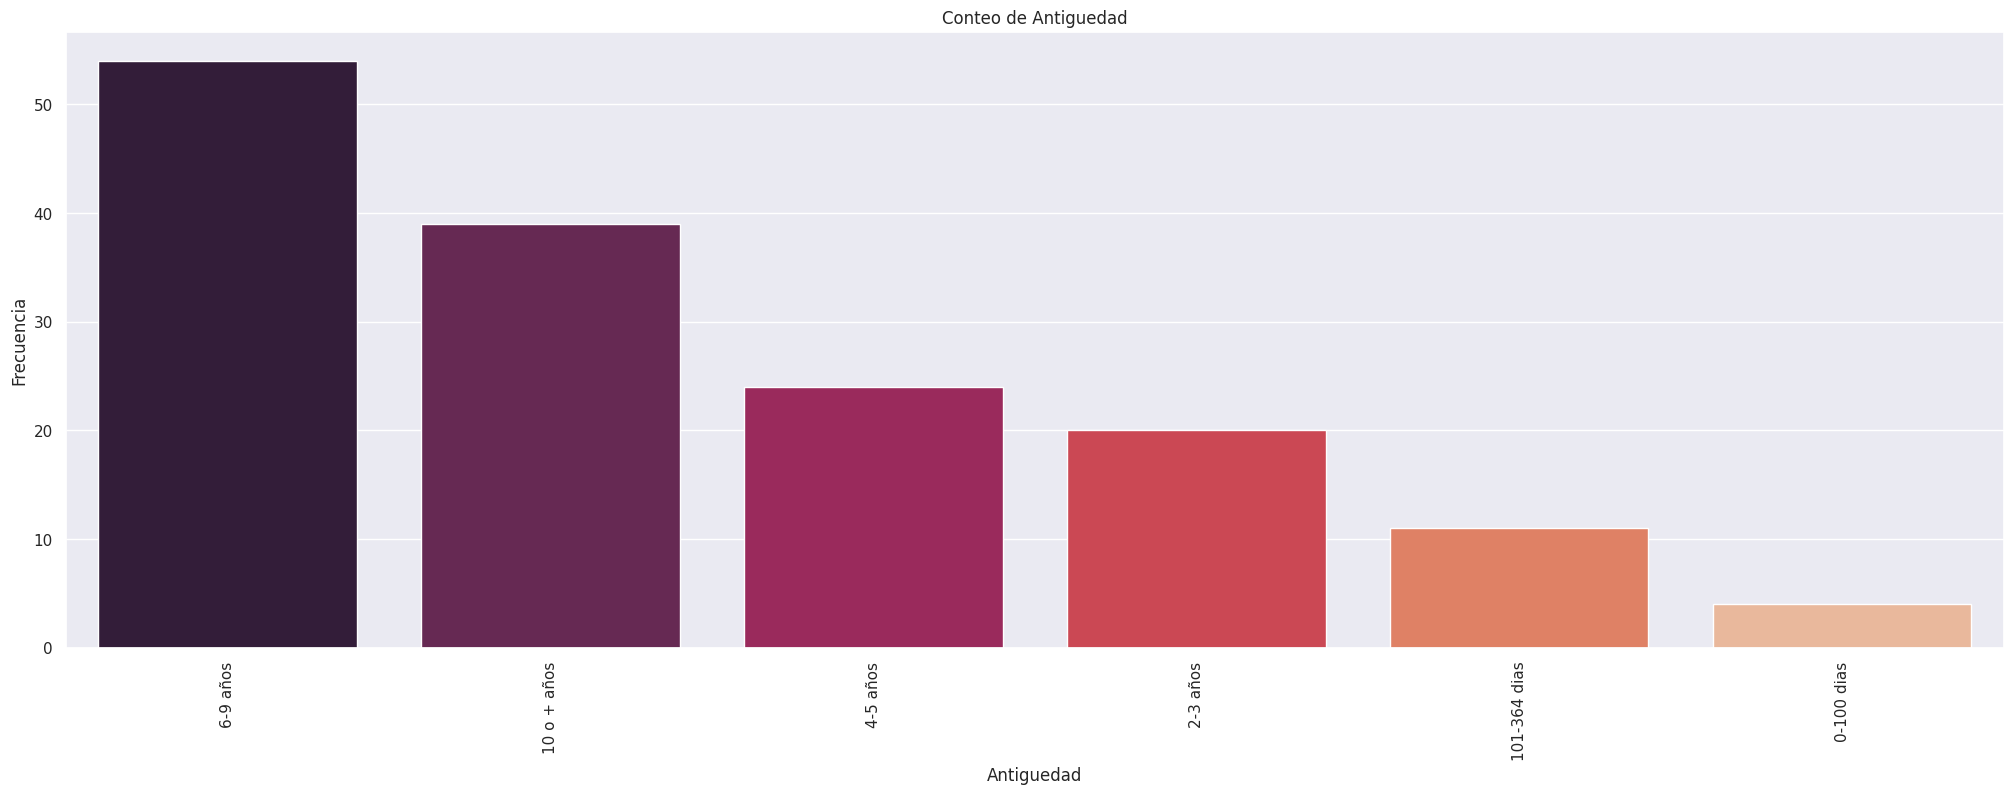

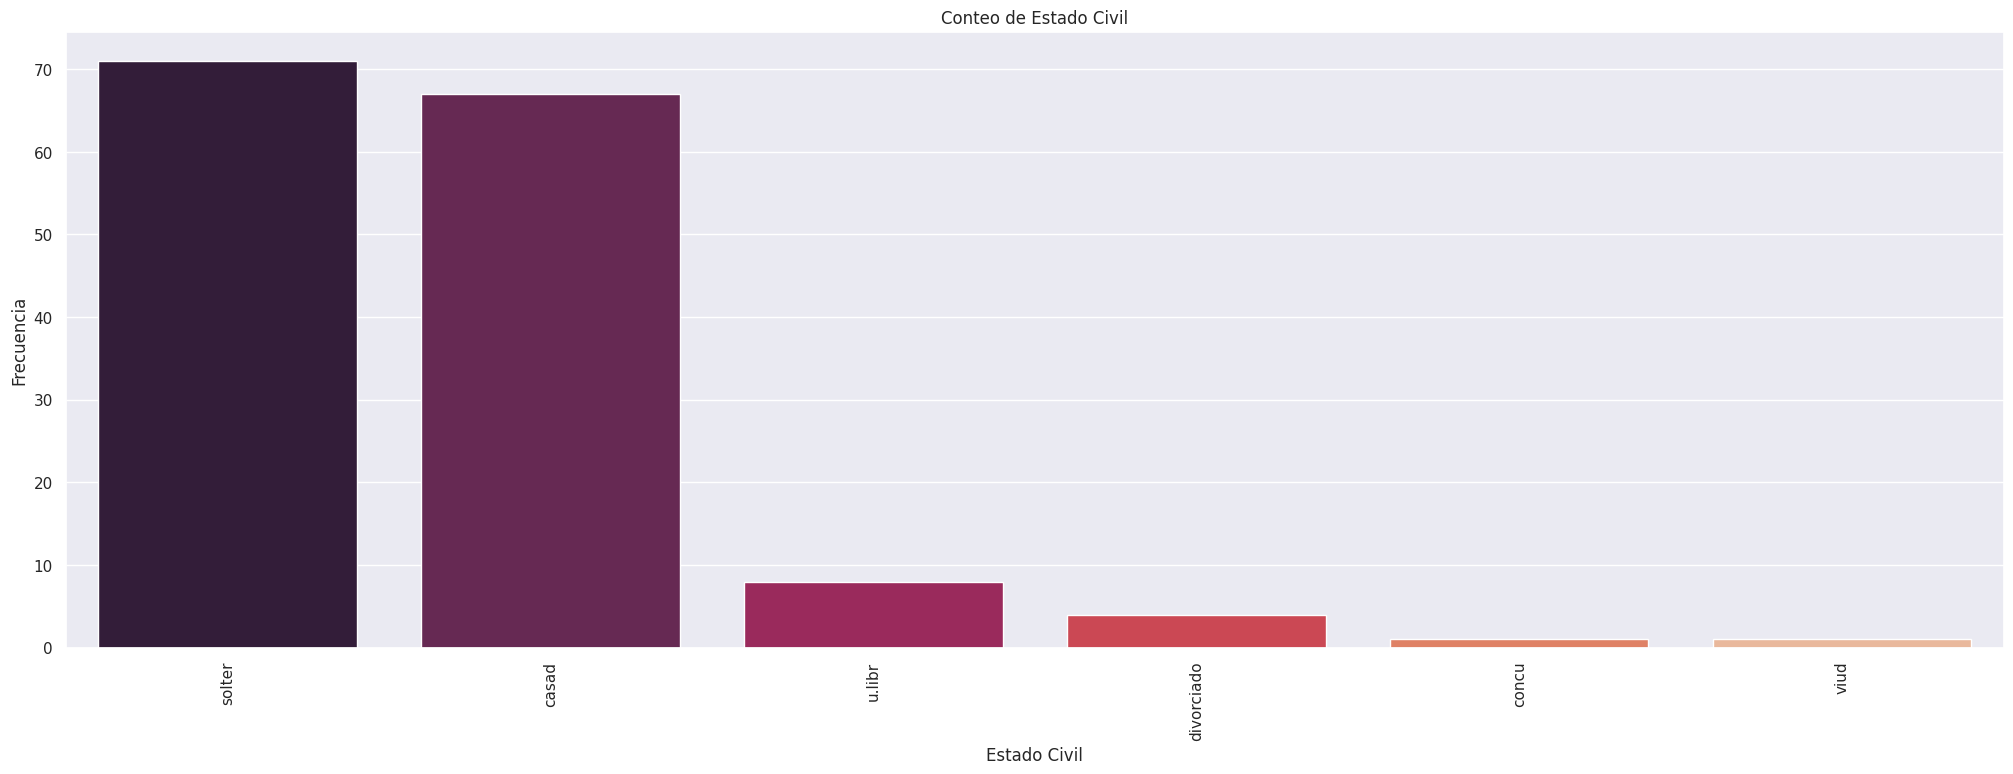

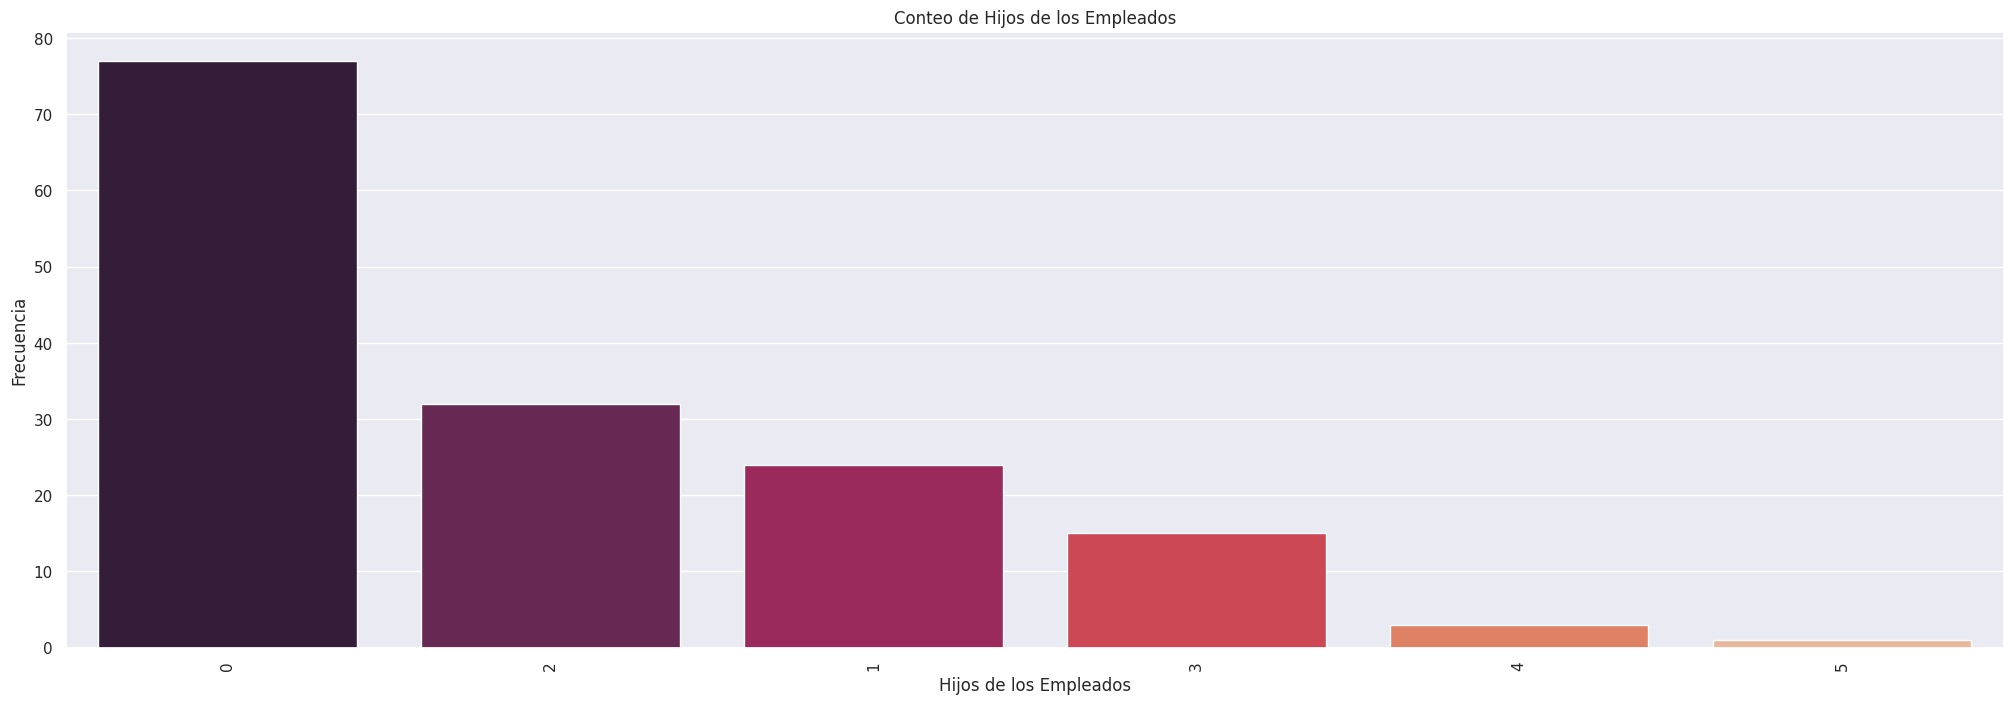

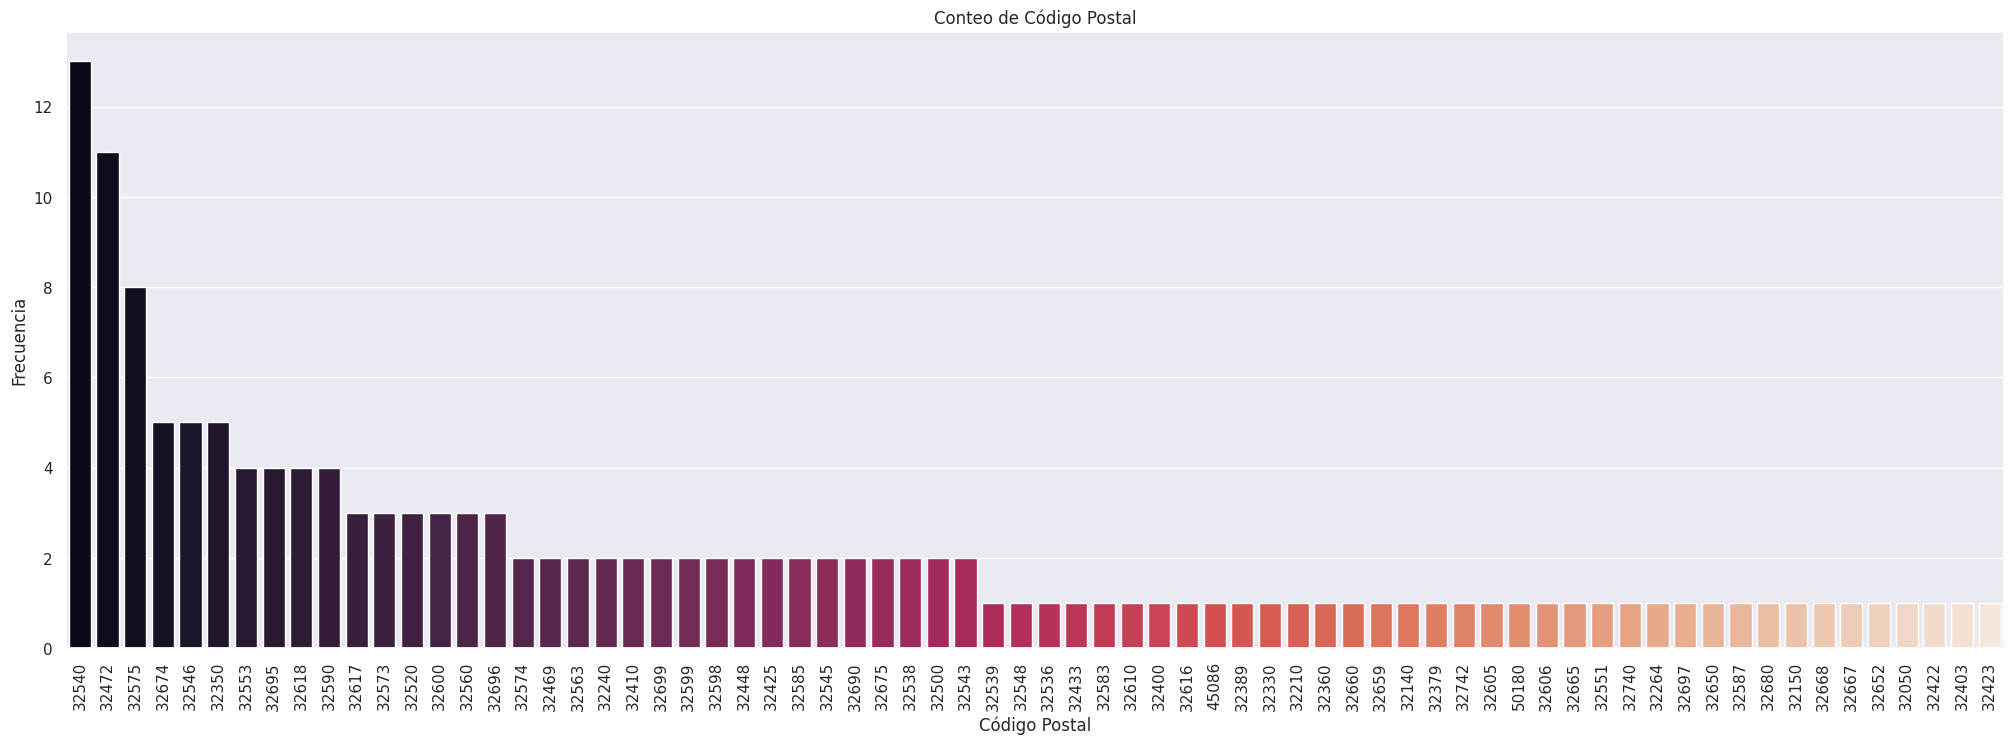

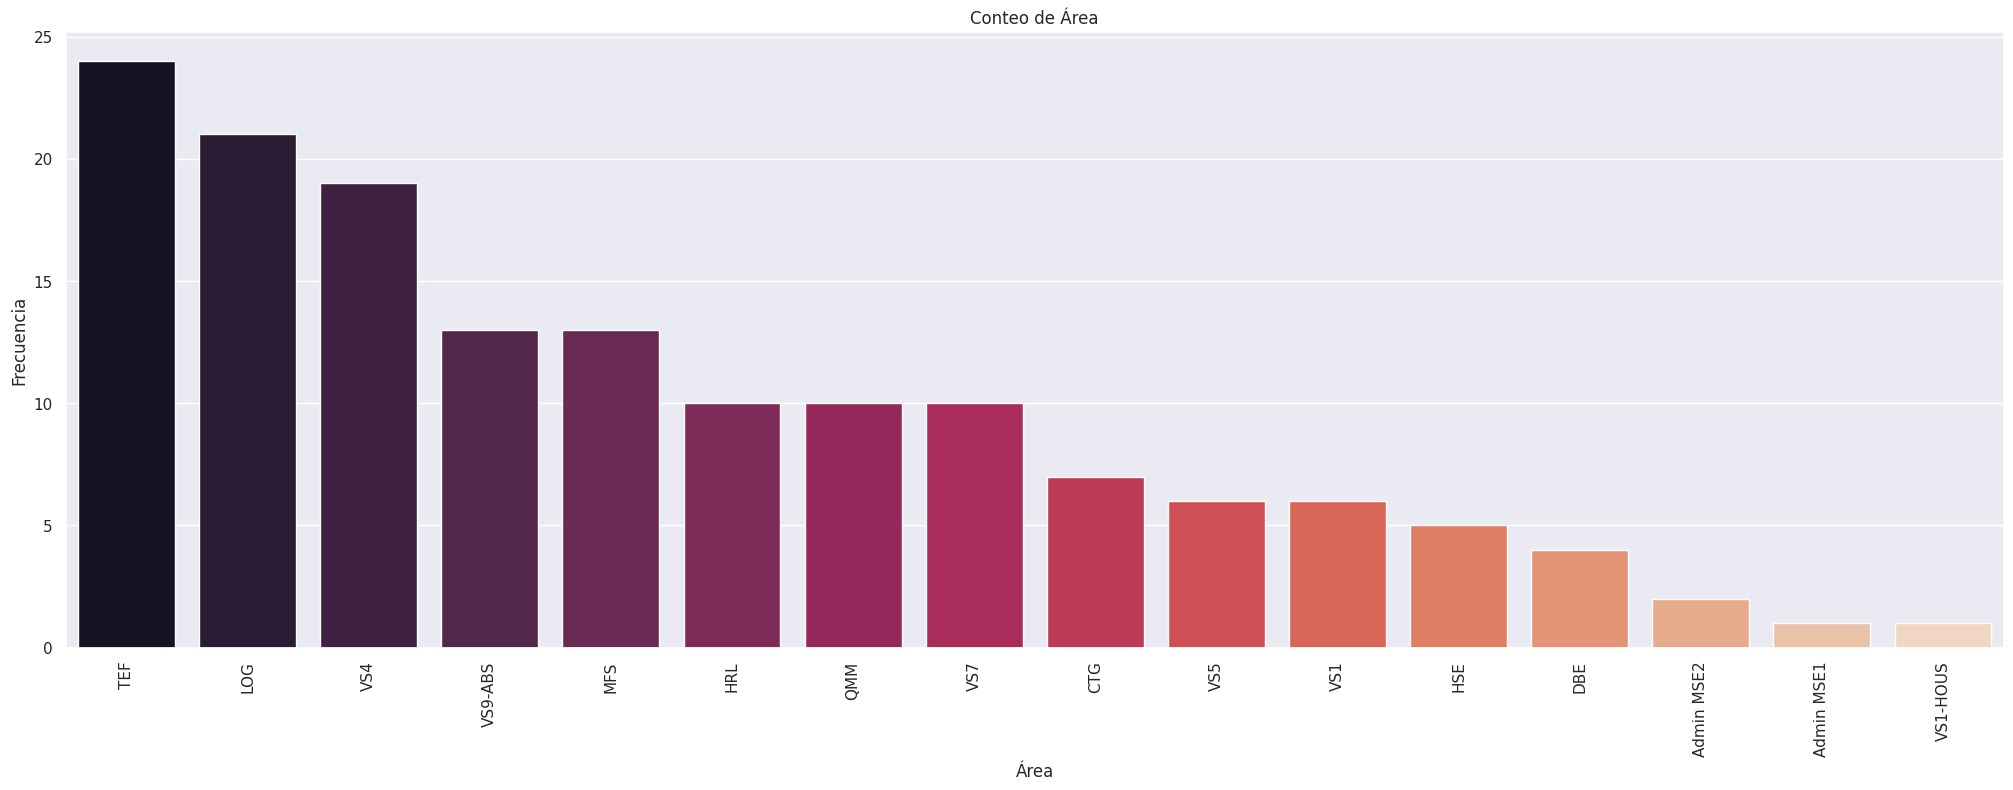

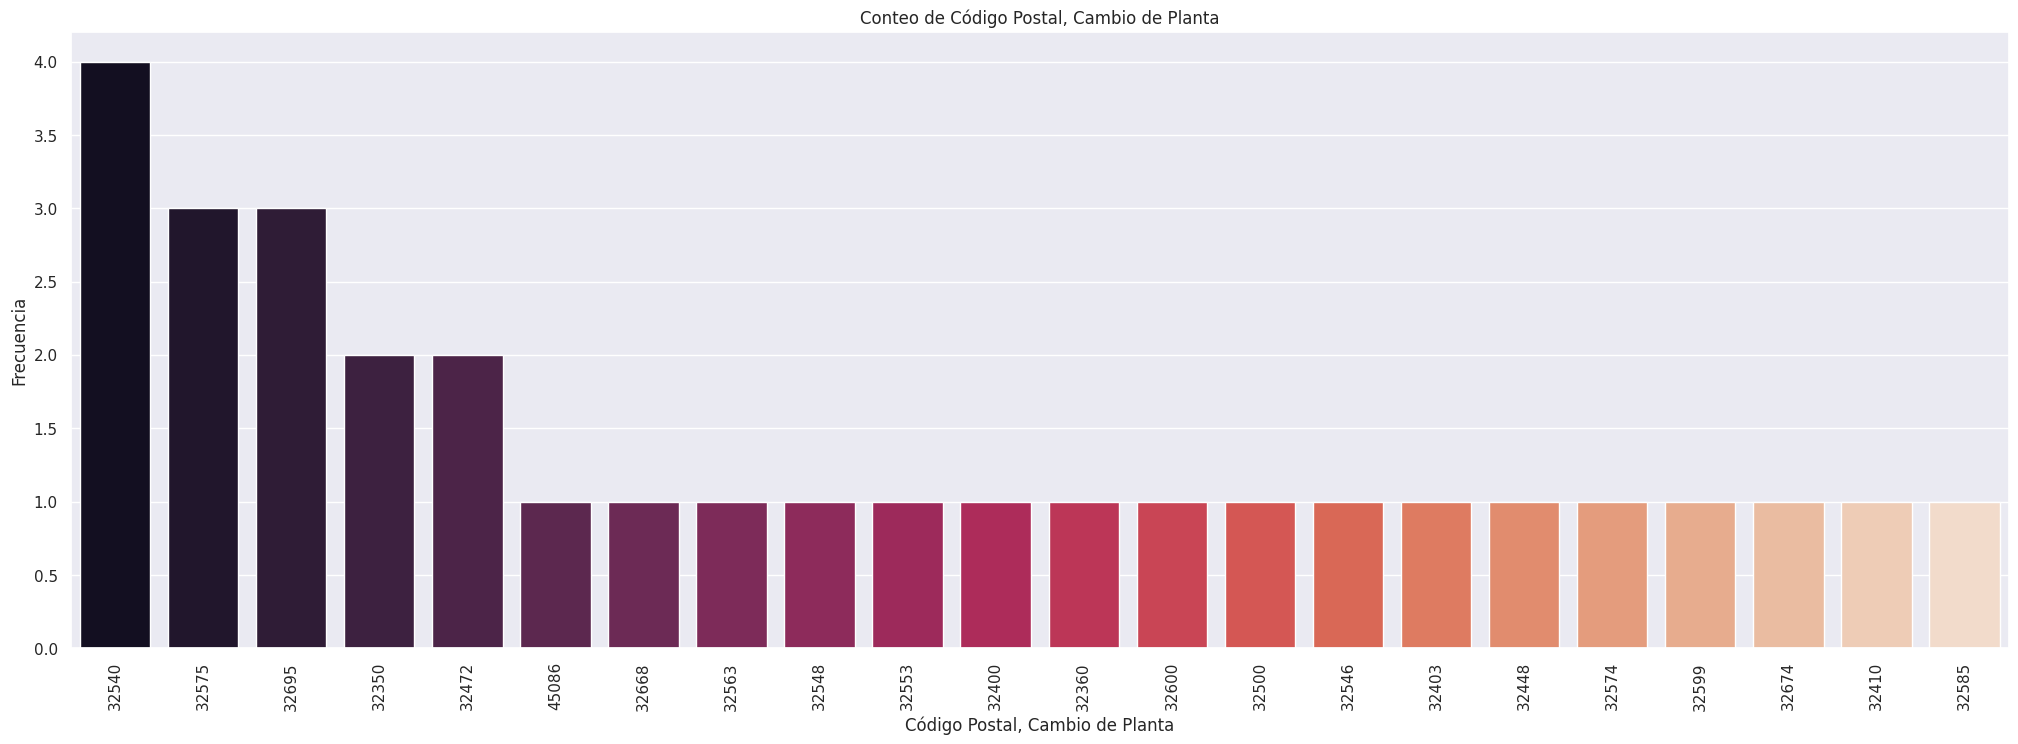

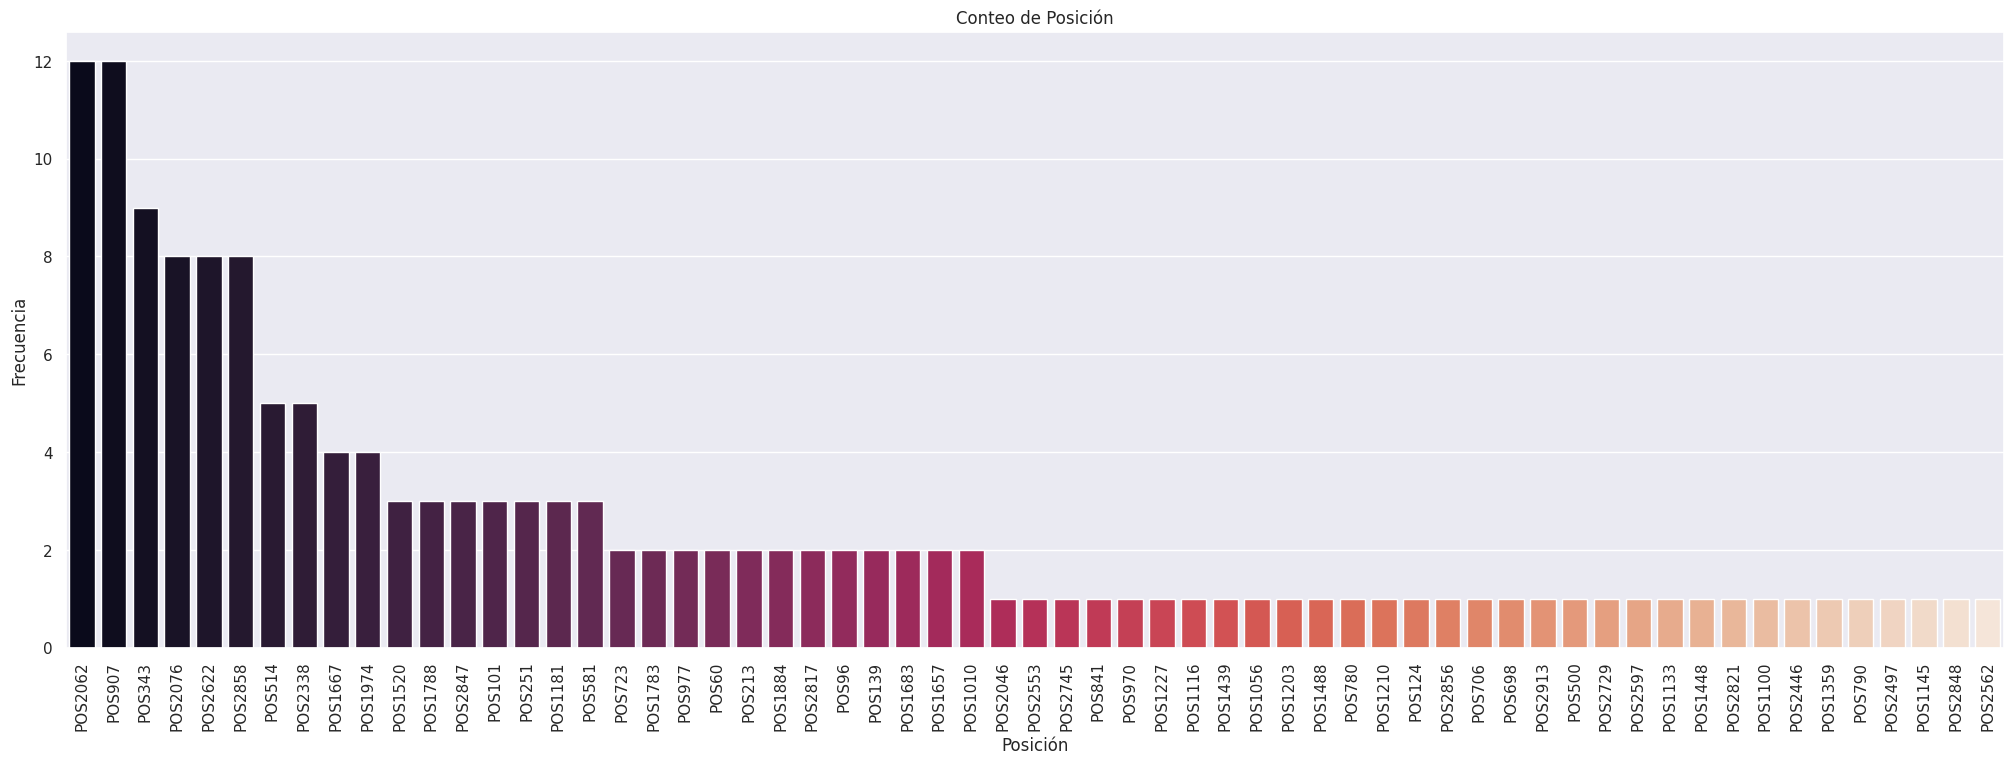

In [ ]:
plotter(cluster_3,'reglapht','ReglaPHT')
plotter(cluster_3,'grupo_de_personal','Grupo de Personal')
plotter(cluster_3,'motivo_de_la_renuncia',"Motivo de Renuncia")
plotter(cluster_3,'banda','Banda')
plotter(cluster_3,'clave_de_sexo','Sexo de los Empleados')
plotter(cluster_3,'rango_edades','Edades')
plotter(cluster_3,'rango_antiguedad','Antiguedad')
plotter(cluster_3,'estado_civil','Estado Civil')
plotter(cluster_3,'hijos','Hijos de los Empleados')
plotter(cluster_3,'codigo_postal','Código Postal')
plotter(cluster_3,'area','Área')
plotter(cambioplanta,'codigo_postal','Código Postal, Cambio de Planta')
plotter(cluster_3,'posicion','Posición')
# plotter(cluster_3,,)

<Axes: xlabel='motivo_de_la_renuncia', ylabel='count'>

Text(0.5, 1.0, 'Banda Salarial de los Principales Motivos de Renuncia de Administradores')

Text(0.5, 0, 'Banda')

Text(0, 0.5, 'Frecuencia')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'vol-otro empleo'),
  Text(1, 0, 'imp.pat-pensionado imss'),
  Text(2, 0, 'vol-transferencia entre planta'),
  Text(3, 0, 'muerte accidental'),
  Text(4, 0, 'imp.pat-terminacion del contra'),
  Text(5, 0, 'imp.tra-bajo desempeno'),
  Text(6, 0, 'imp.tra-jubilacion'),
  Text(7, 0, 'vol-prob personales y/o fam'),
  Text(8, 0, 'vol-cambio de domicilio'),
  Text(9, 0, 'vol-insatisfaccion personal'),
  Text(10, 0, 'imp.pat-varios jubilado'),
  Text(11, 0, 'imp.tra-ausentismos continuos')])

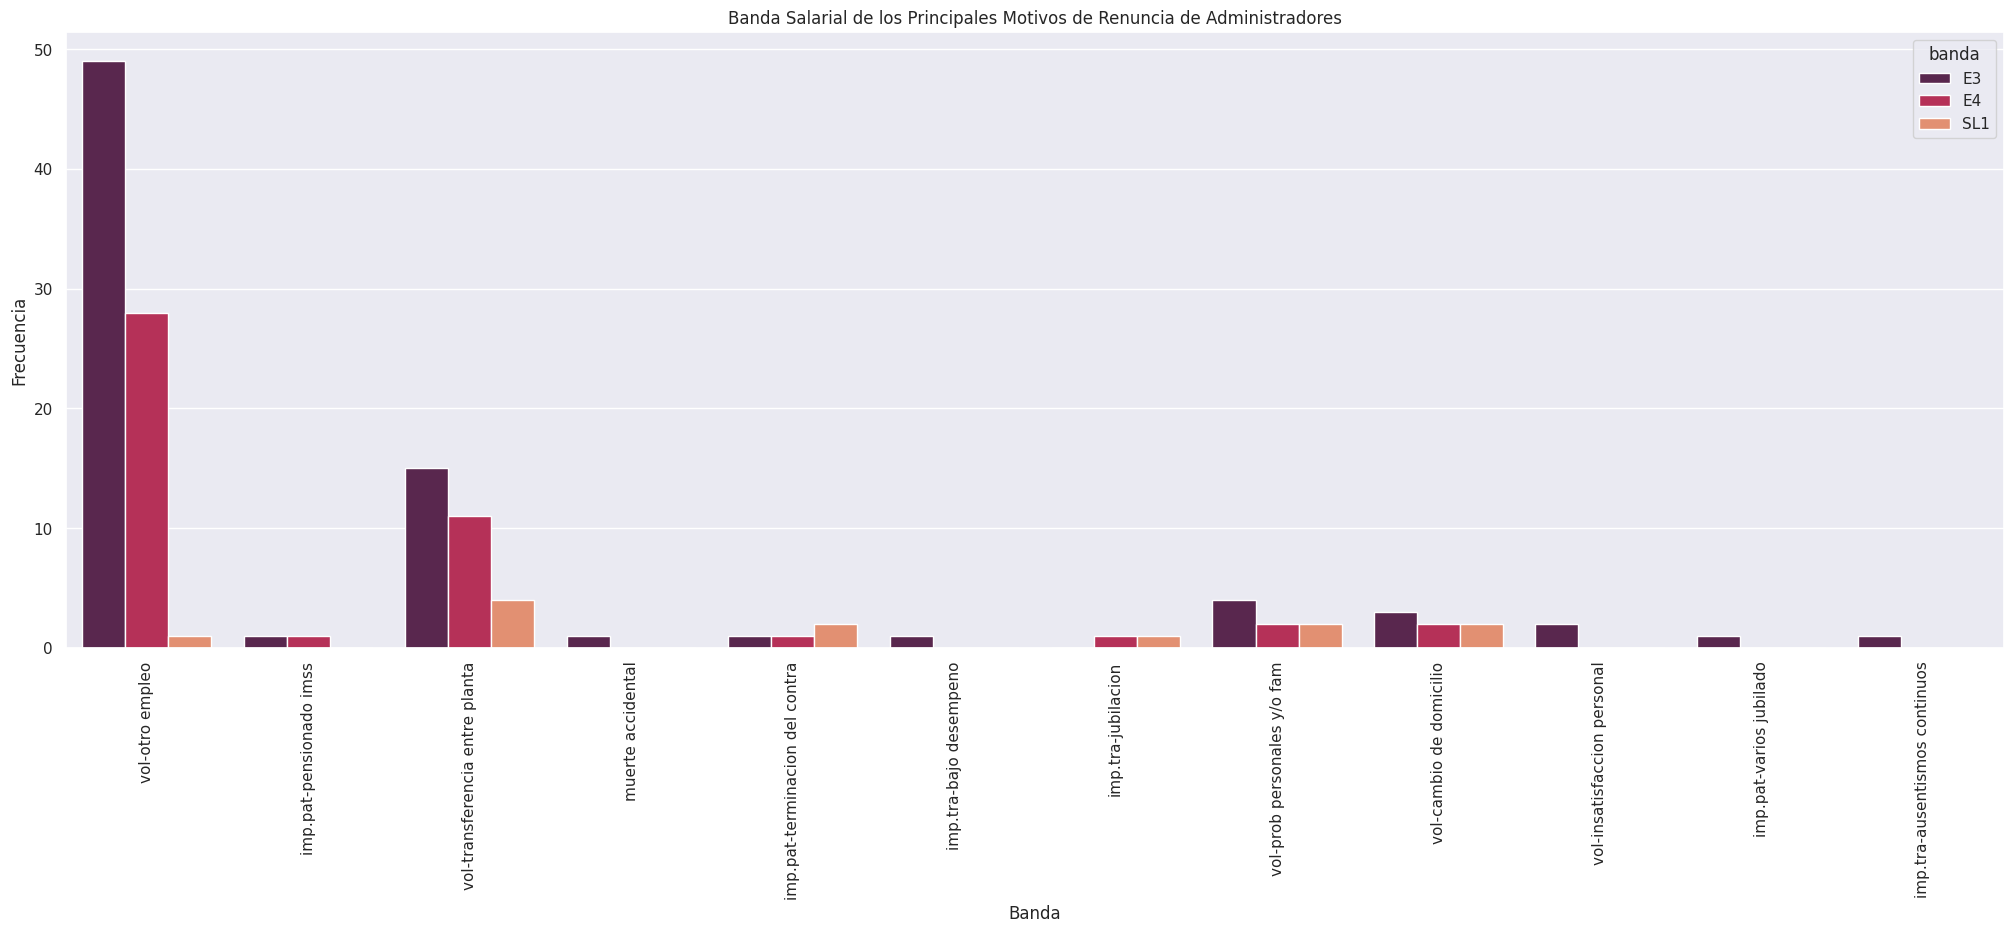

In [ ]:
sns.countplot(x='motivo_de_la_renuncia',hue='banda',data=cluster_3_admin,palette='rocket')
plt.title('Banda Salarial de los Principales Motivos de Renuncia de Administradores')
plt.xlabel('Banda')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

<Axes: xlabel='clave_de_sexo', ylabel='count'>

Text(0.5, 1.0, 'Banda Salarial por Sexo')

Text(0.5, 0, 'Banda')

Text(0, 0.5, 'Frecuencia')

(array([0, 1]), [Text(0, 0, 'femenino'), Text(1, 0, 'masculino')])

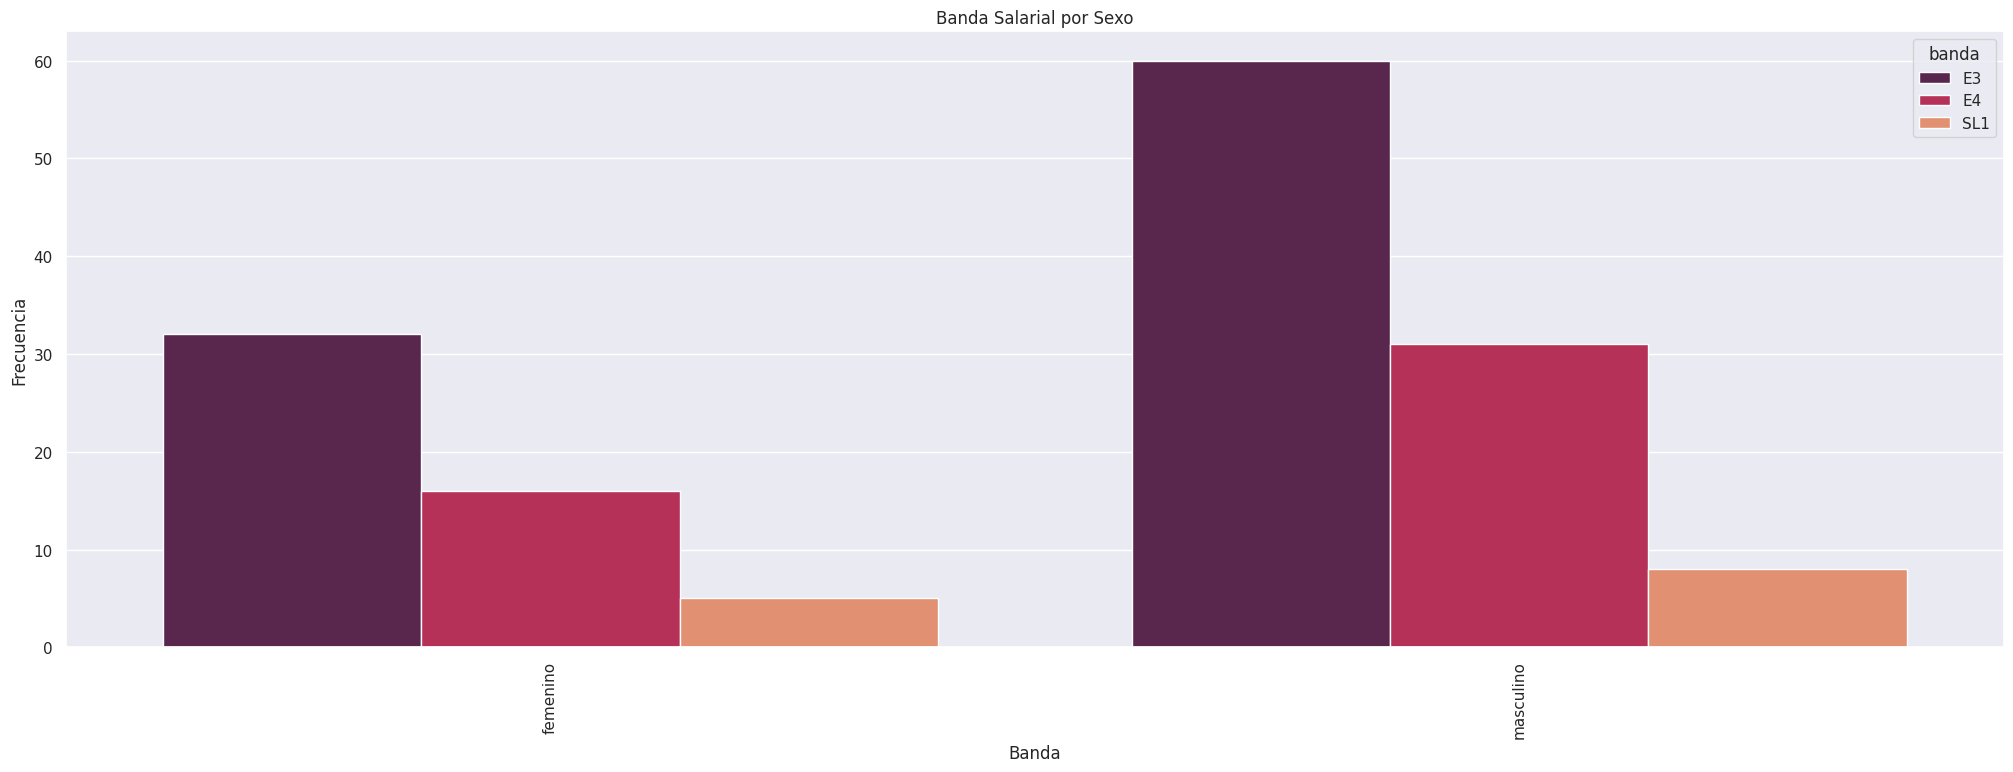

In [ ]:
sns.countplot(x='clave_de_sexo',hue='banda',data=cluster_3,palette='rocket')
plt.title('Banda Salarial por Sexo')
plt.xlabel('Banda')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Análisis perfil empleado 4


En el presente perfil se ubican 152 personas que representan un 11% del total. Estando compuesto este grupo por 99 hombres (65% del grupo, 7% del total) y 53 mujeres (35% del grupo, 4% del total).

Las tendencias salariales de este perfil se muestran equitativas, para ambos sexos (femenino y masculino) los porcentajes en su respectivo grupo se dividen de la siguiente manera: el 60% cae en la banda salarial "E3", el 30% en la banda "E4" y el 10% en la banda "SL1".
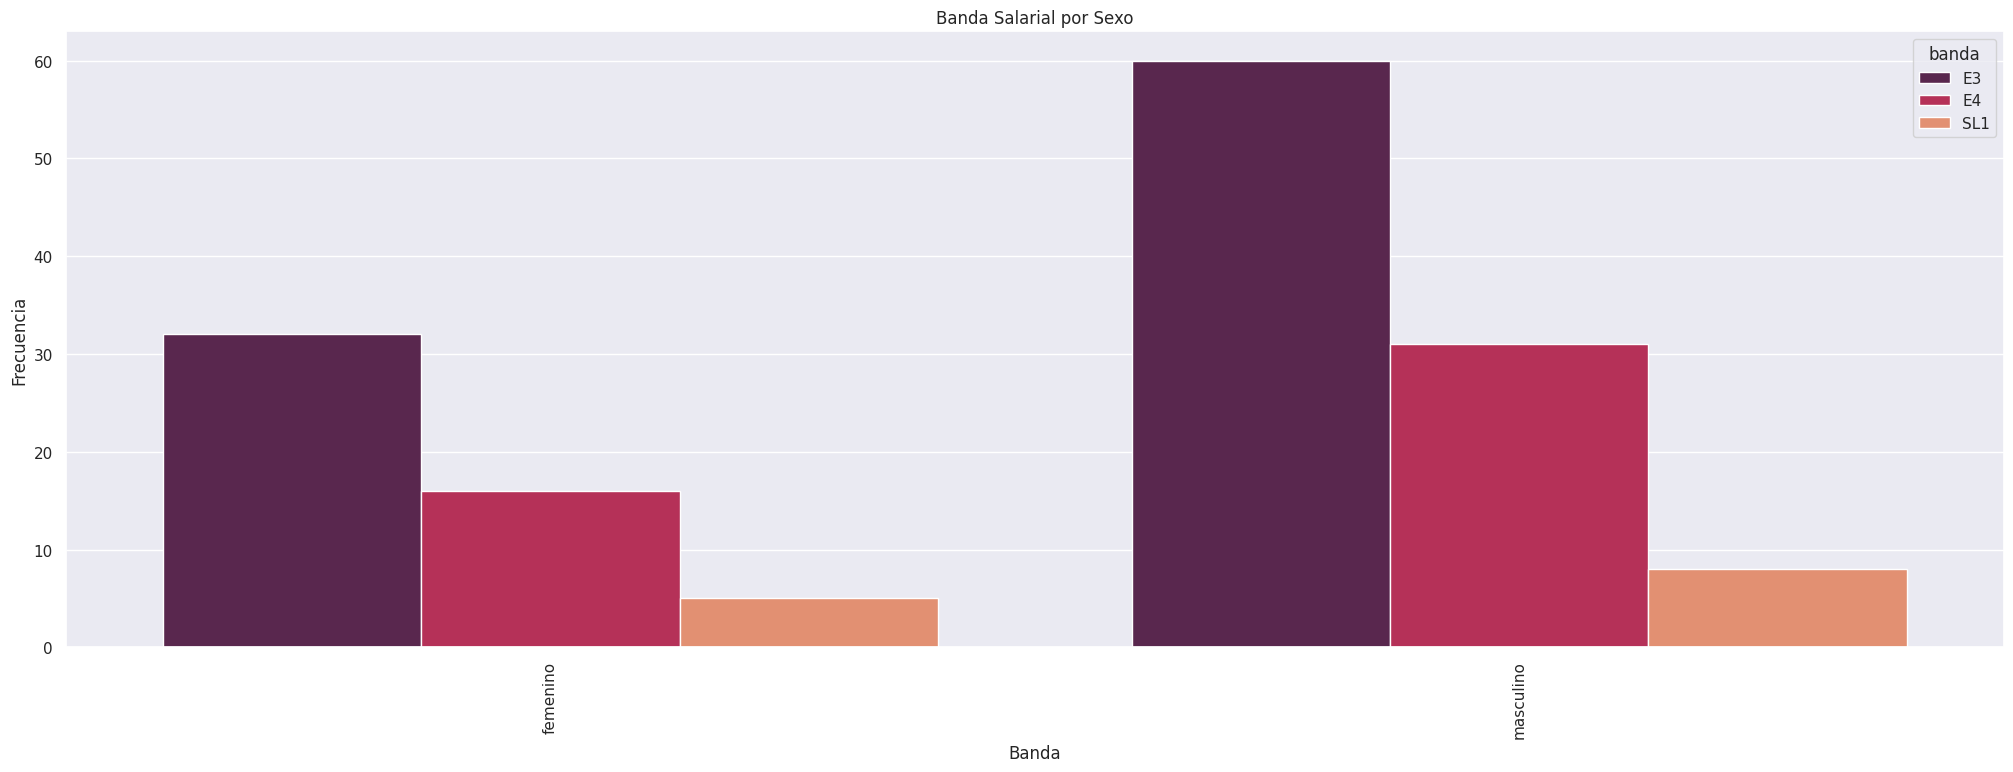

Se observó que el 90% (137 de 152) de este perfil pertenece a la categoría de "ADMINIST", de los cuales 123 pertenecen a su vez a la categoría de "Exempt". De ese 90% de "ADMINIST", 78 de ellos renunciaron por conseguir otro empleo (principal motivo de baja de este perfil). Dentro de este último subgrupo de "ADMINIST" que renunciaron por conseguir otro empleo, 49 de ellos (un tercio del total del cluster) se encontraban en la banda salarial "E3".
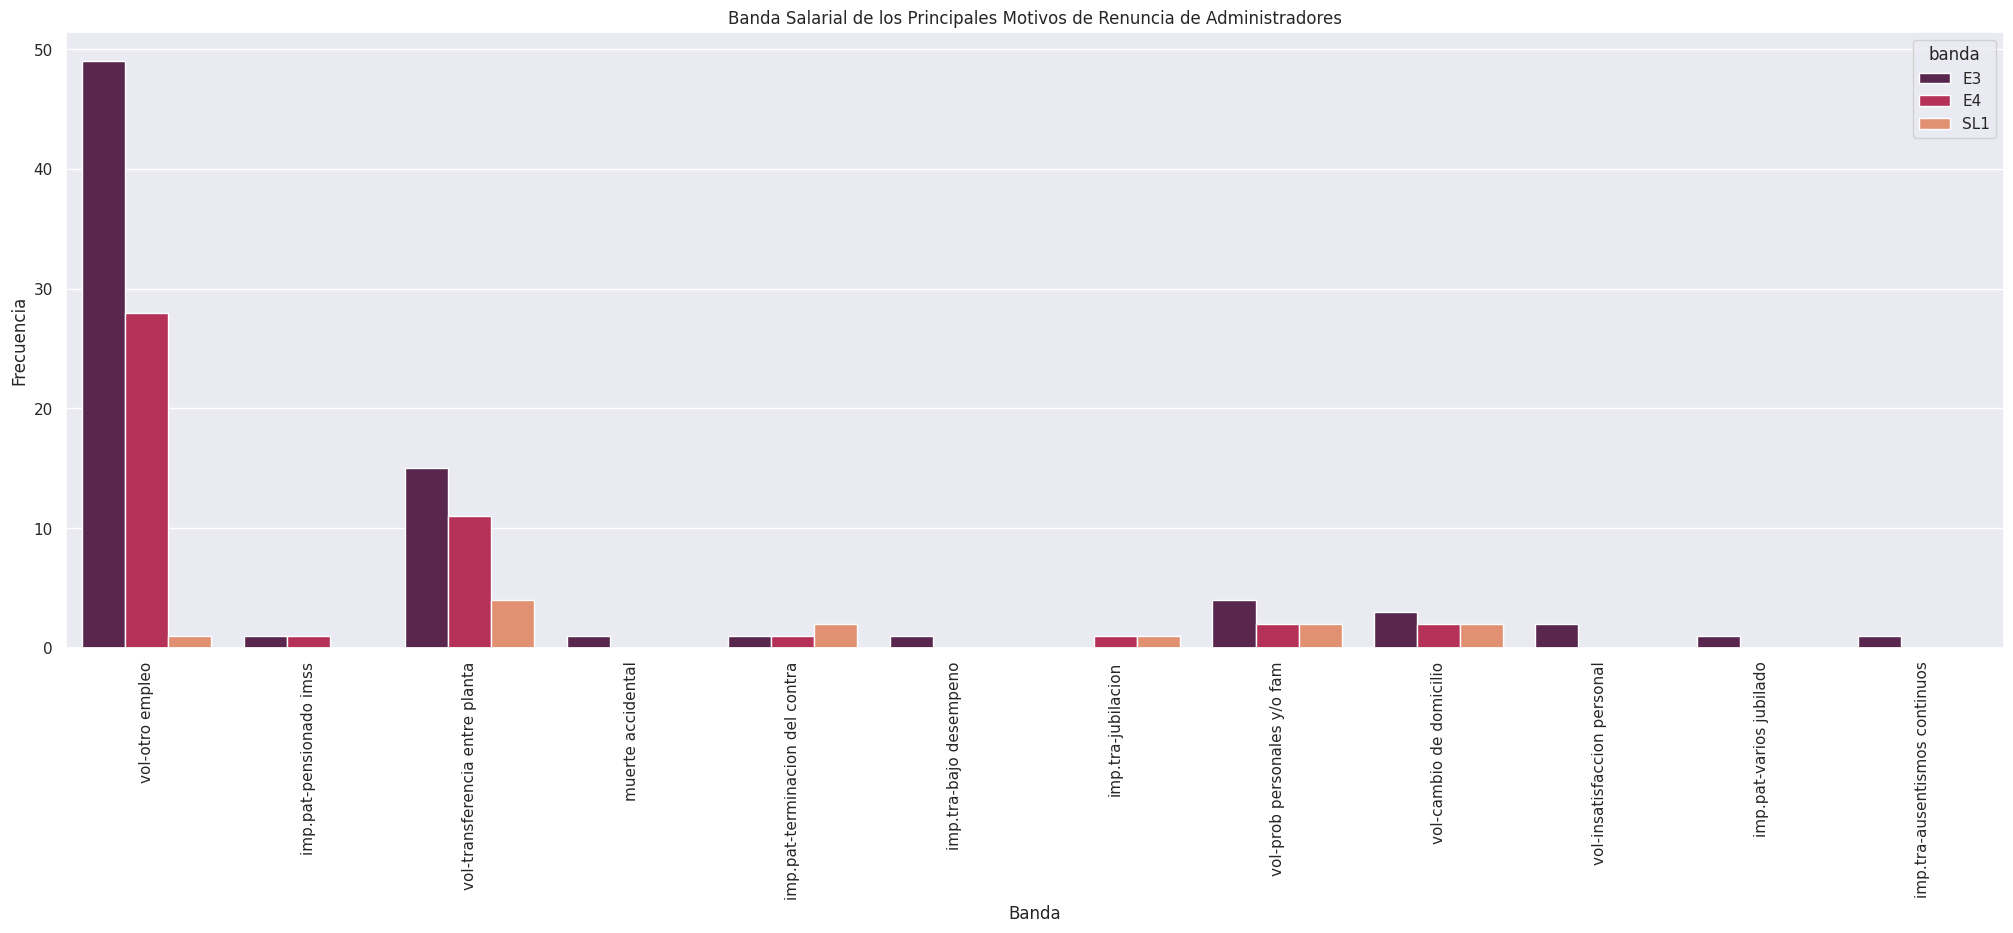

Con lo anterior en cuenta, y considerando el desconocimiento de los salarios, se propone como solución aumentar de banda salarial a los administradores en la medida de lo posible para así evitar la fuga de más del 30% de ellos.

Es destacable que este personal no deserta comúnmente; ya que un 70%, tiene 4 o más años de antiguedad; 61%, 6 o más años; y un 25%, 10 o más. Por lo que es poco probable que el motivo de partida sea por conflictos o insatisfacción con la empresa.
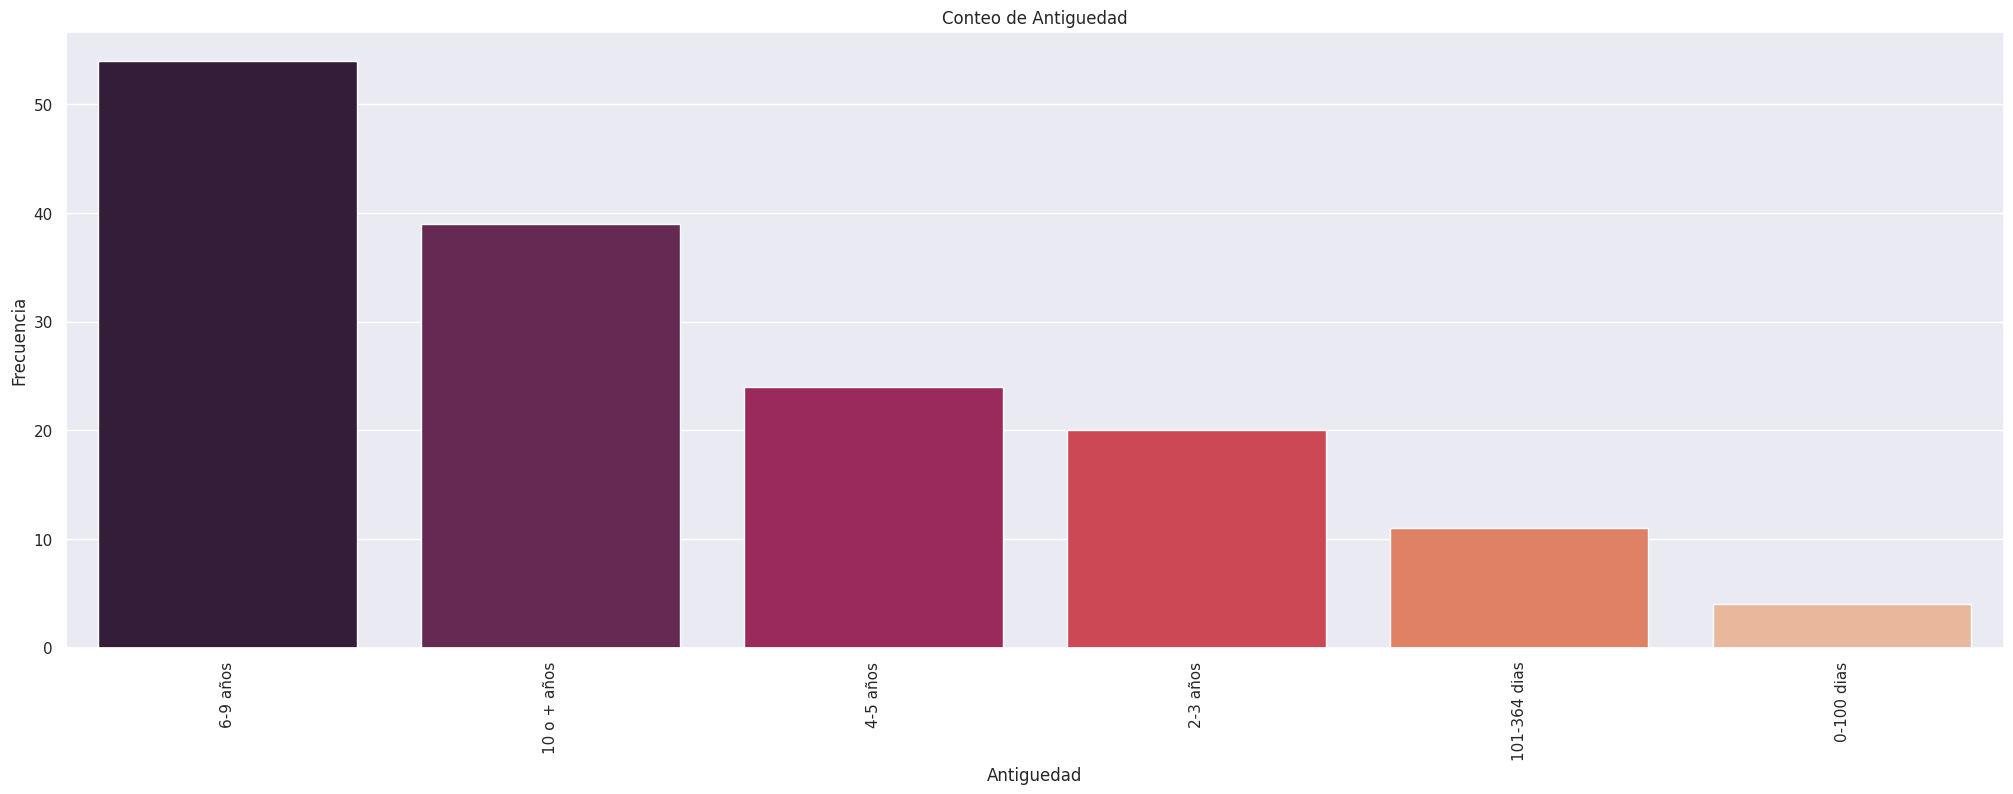

El segundo motivo por el cual la mayoría de personas bajo este perfil salen de la empresa es por transferencia entre plantas, sin embargo, no parece haber una correlación directa entre el lugar donde residen y su motivo de baja por la transferencia. De cualquier modo, evitar mover al personal a otra planta ayudaría a eliminar un 20% de las bajas de este perfil.

Las principales áreas de donde se da de baja el personal de este perfil son "TEF", "LOG" y "VS4" en ese orden. Por lo que es importante revisar esos departamentos.
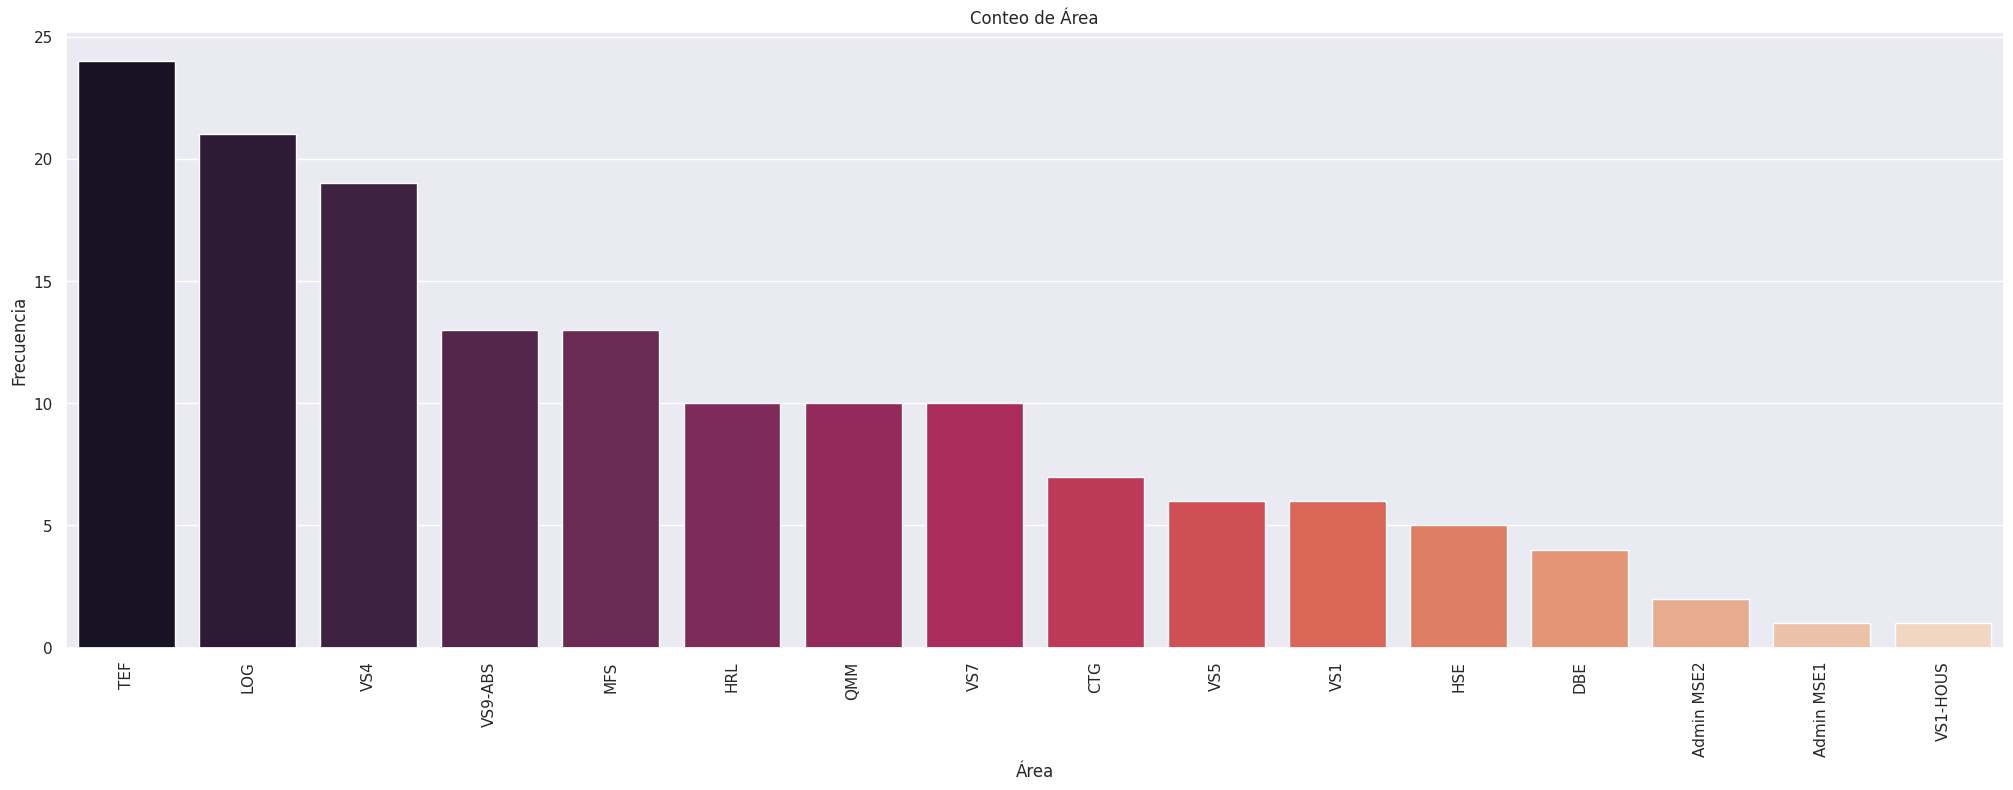!

# Conclusiones generales


### Conclusión General
1. **Perfil Demográfico y Razones de Abandono**: Los empleados en los clusters analizados varían en perfil demográfico, pero comparten razones comunes de abandono, como búsqueda de mejores salarios y oportunidades de crecimiento.
2. **Influencia de Factores Externos**: Aspectos como la ubicación geográfica y el tráfico también juegan un papel en la decisión de dejar la empresa.
3. **Retención de Talento**: La empresa enfrenta desafíos en retener a jóvenes profesionales, particularmente en ciertas bandas salariales y posiciones.

### Recomendaciones Estratégicas
1. **Estudio de Mercado Salarial**: Realizar un análisis comparativo de los salarios con empresas similares para asegurarse de que la compensación sea competitiva.
2. **Programas de Desarrollo y Capacitación**: Desarrollar programas que ofrezcan oportunidades de crecimiento y formación profesional, enfocándose en los grupos demográficos con alta rotación.
3. **Mejoras en el Entorno Laboral**: Investigar y mejorar las condiciones de trabajo en áreas críticas, y ofrecer beneficios adicionales como flexibilidad laboral y programas de bienestar.
4. **Encuestas de Satisfacción y Entrevistas de Salida**: Implementar encuestas regulares y entrevistas de salida detalladas para obtener retroalimentación directa y comprender mejor las razones detrás de la rotación del personal.
5. **Estrategias de Retención Personalizadas**: Adaptar estrategias de retención para abordar las necesidades específicas de diferentes grupos demográficos, como empleados más jóvenes, mujeres, y empleados con familia.


### Potenciales Áreas de Investigación Adicional
1. **Análisis de Turnos de Trabajo**: Estudiar las diferencias en la satisfacción y retención entre diferentes turnos de trabajo.
2. **Evaluación de Políticas de Transferencia**: Revisar las políticas de transferencia entre plantas para entender su impacto en la retención de empleados.
3. **Estudio de Impacto de la Ubicación Geográfica**: Analizar cómo la ubicación de la empresa y las condiciones de transporte afectan la decisión de los empleados de permanecer o dejar la empresa.

